In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# モジュールのインポート
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt
import sys
from sklearn import preprocessing

In [4]:
# 自作モジュール
sys.path.append("../")
import display
import dataloader
from dataloader import ThermalData
import clustering
import anomaly_detection
import module_extraction
from module_extraction import Filters, Modules
from anomaly_detection import AnoModels
import utils

分析対象の指定

In [5]:
input_img_path = "../images/ortho/1466.tif"
#input_img_path = "../images/ortho/1391.tif"
input_dir_path = "../outputs/"+input_img_path.split("/")[-1][:-4]
print(input_dir_path)

../outputs/1466


画像データの取得

In [6]:
img_org = cv2.imread(input_img_path, 0)

In [7]:
thermal_img_files = dataloader.get_img_files(dir_path=input_dir_path+"/modules",gray=False)

In [8]:
type(thermal_img_files), len(thermal_img_files)

(dict, 5154)

モジュール情報の取得

In [9]:
import pickle
with open(input_dir_path+'/module_contours.pkl', 'rb') as pkl:
    module_contours = pickle.load(pkl)
with open(input_dir_path+'/module_labels_split.pkl', 'rb') as pkl:
    module_labels = pickle.load(pkl)

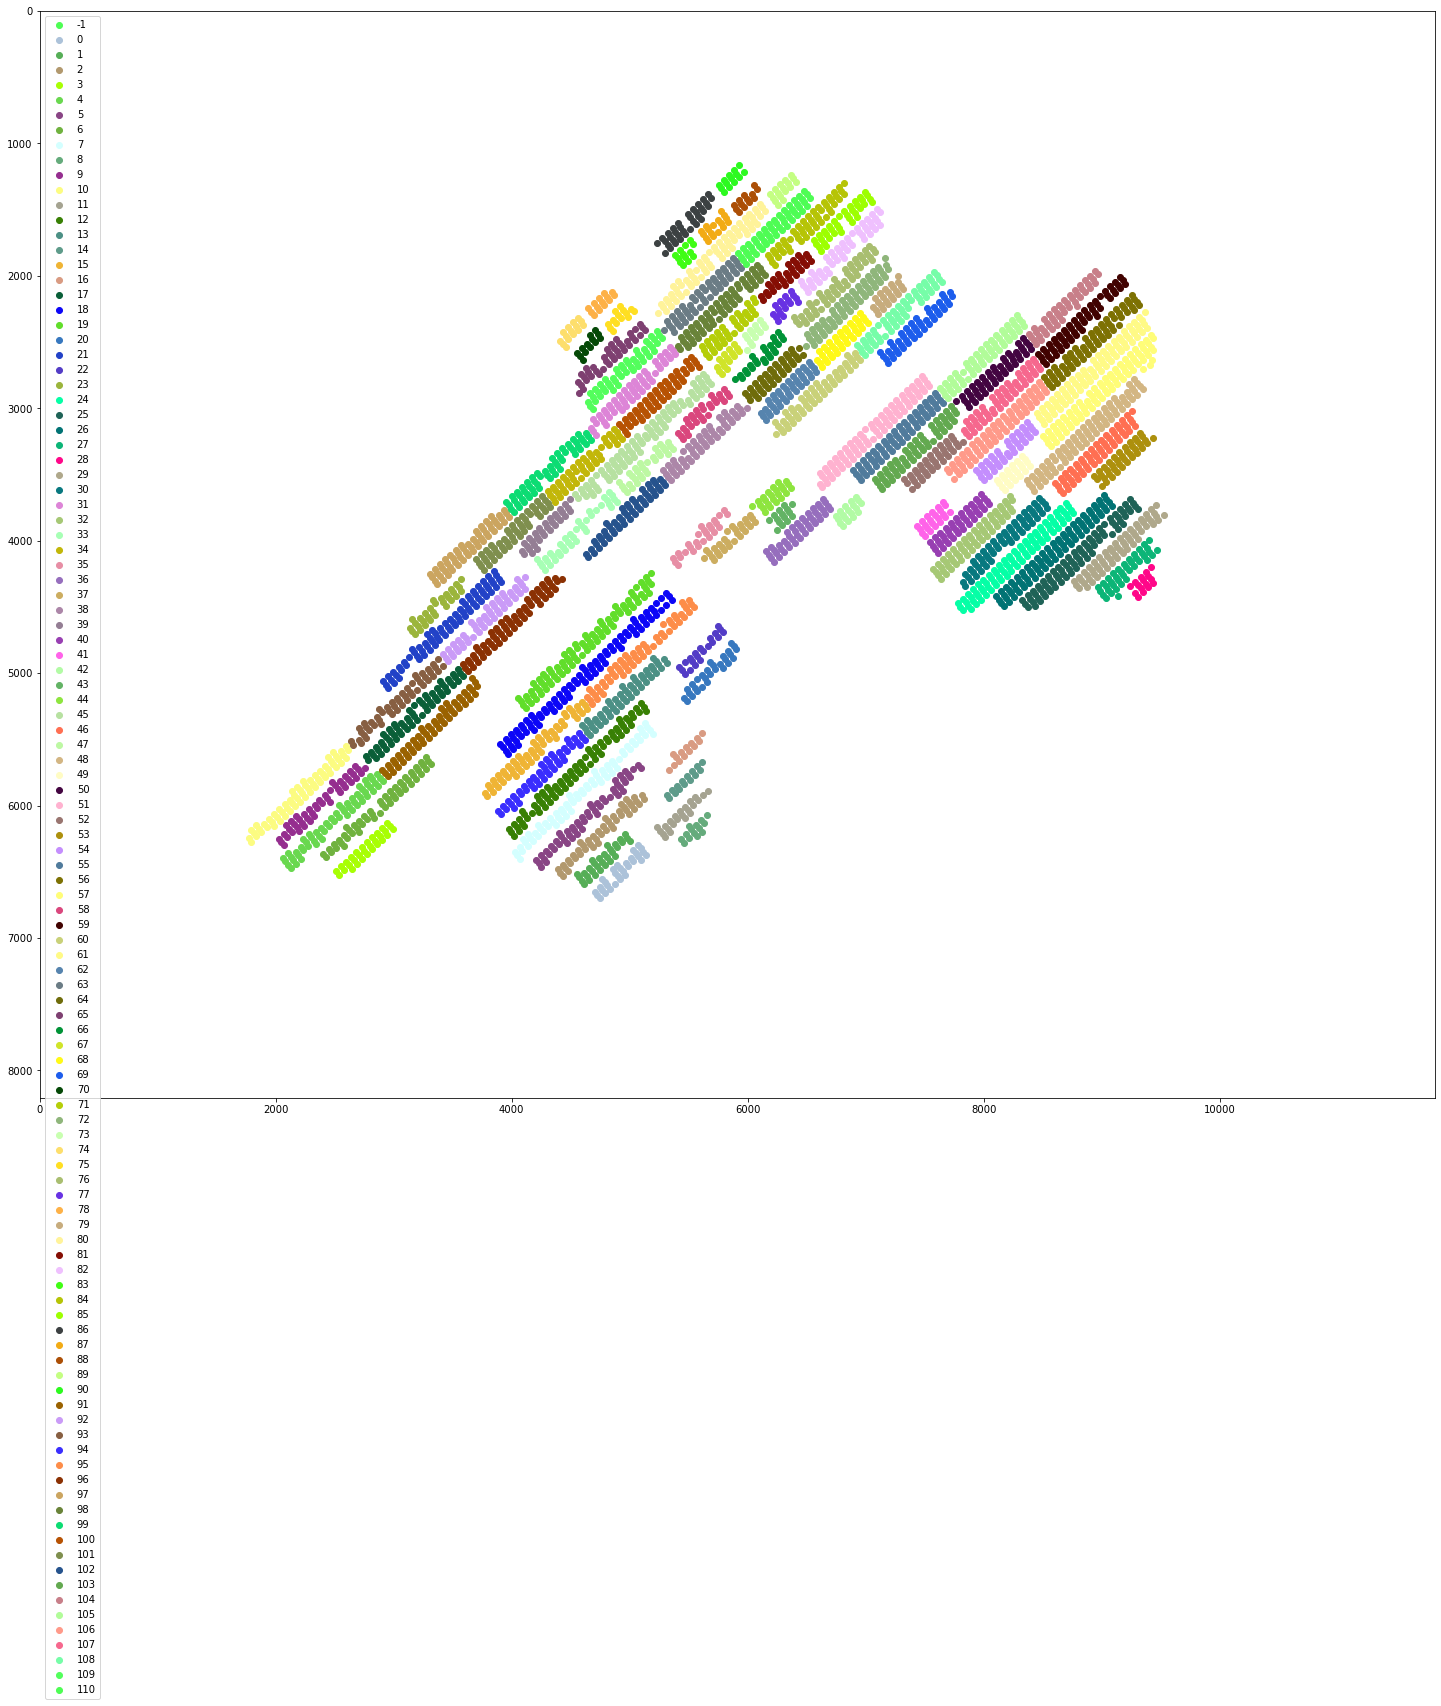

In [10]:
module_extraction.plot_module_map_with_labels(img_org, module_contours, module_labels)

温度データの取得

In [11]:
%%time
#thermal_data = ThermalData(thermal_img_files) # all
thermal_data = dataloader.get_thermal_data(thermal_img_files, module_labels) # group

100%|██████████| 111/111 [08:43<00:00,  4.72s/it]

CPU times: user 41min 16s, sys: 2min 12s, total: 43min 29s
Wall time: 8min 43s


ホットスポット検出モデルの学習

In [42]:
anomodels = AnoModels()

In [43]:
anomodels.fit(thermal_data,module_labels)

100%|██████████| 111/111 [00:13<00:00,  8.30it/s]


array offset: 0 152.4241988126751 [-1.81203188] [-0.68481275]


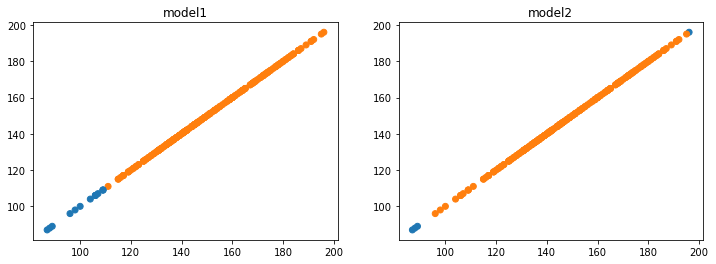

array offset: 1 149.94149044326963 [-1.81203188] [-0.68481275]


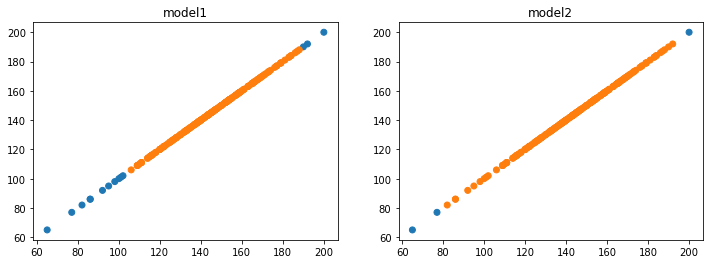

array offset: 2 150.21272456609265 [-1.81203188] [-0.68481275]


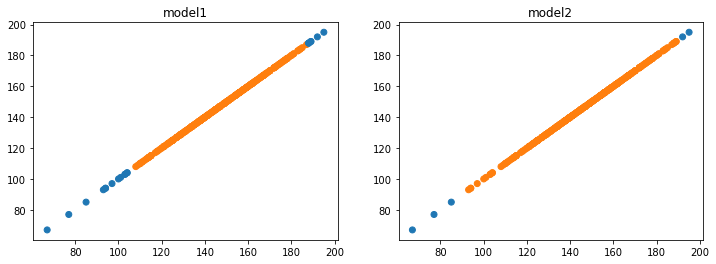

array offset: 3 150.01302672766676 [-1.78556933] [-0.67422773]


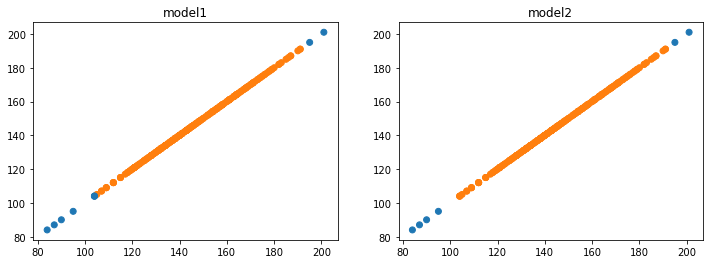

array offset: 4 150.31202836499867 [-1.78556933] [-0.67422773]


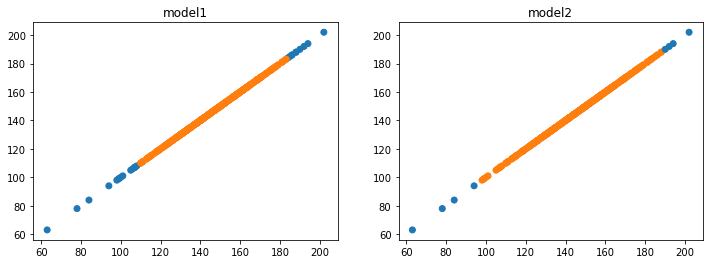

array offset: 5 152.71999770536942 [-1.78556933] [-0.67422773]


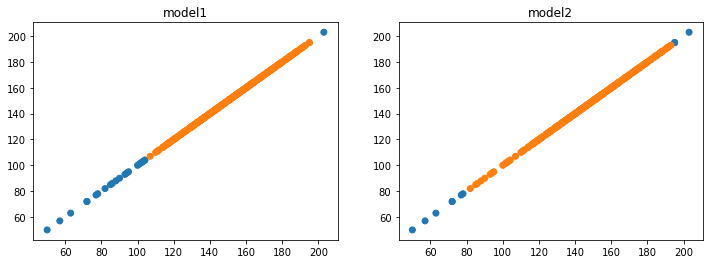

array offset: 6 147.59041547277937 [-1.78229778] [-0.67291911]


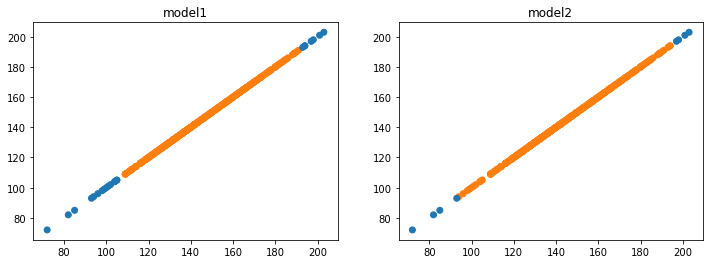

array offset: 7 155.26365710304216 [-1.78229778] [-0.67291911]


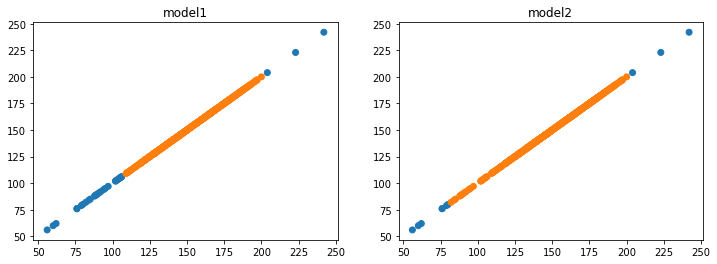

array offset: 8 151.86665175075512 [-1.78229778] [-0.67291911]


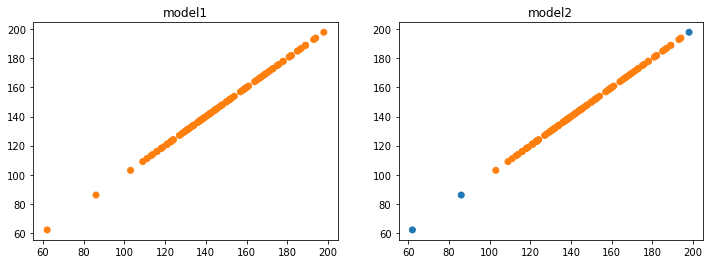

array offset: 9 153.20768397913318 [-1.76462601] [-0.6658504]


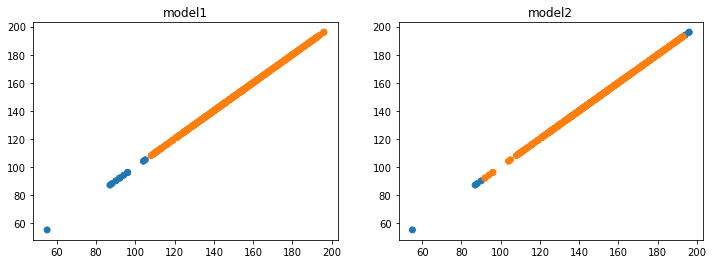

array offset: 10 154.49776289118506 [-1.76462601] [-0.6658504]


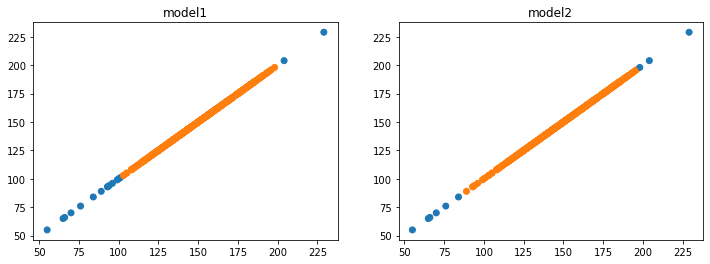

array offset: 11 150.42762893503013 [-1.76462601] [-0.6658504]


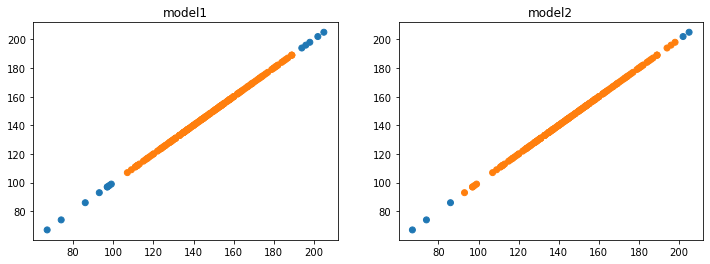

array offset: 12 153.13683556482002 [-1.79270085] [-0.67708034]


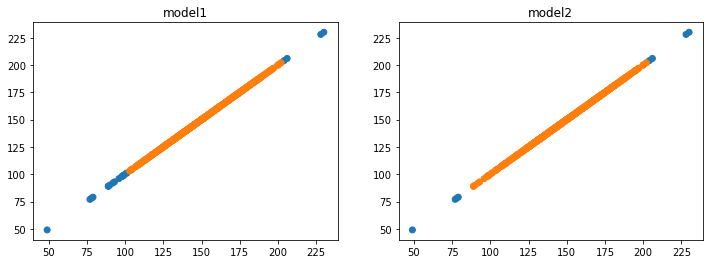

array offset: 13 151.71060996131112 [-1.79270085] [-0.67708034]


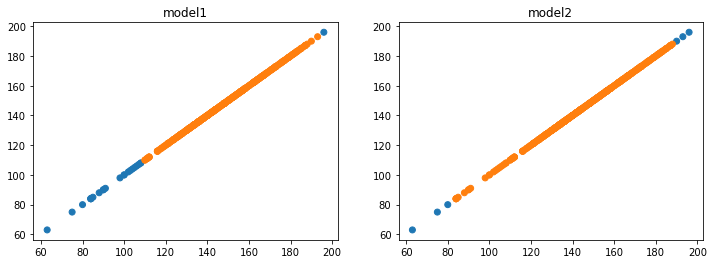

array offset: 14 152.99049603577964 [-1.79270085] [-0.67708034]


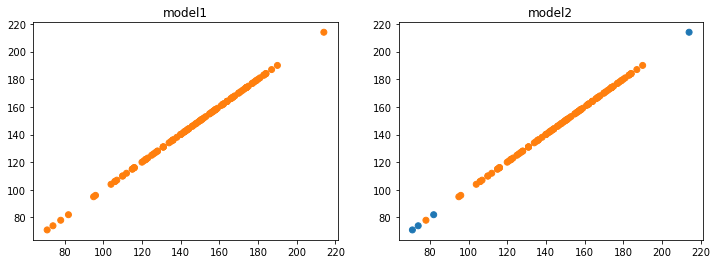

array offset: 15 149.09263636938246 [-1.84544637] [-0.69817855]


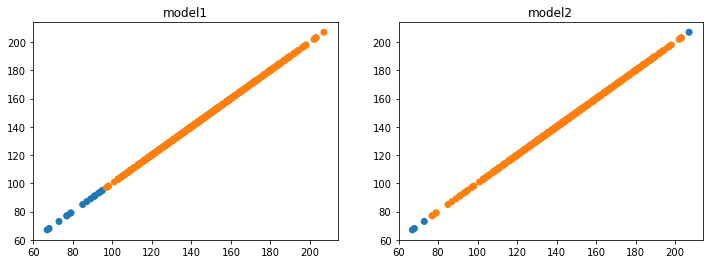

array offset: 16 147.1106633081444 [-1.84544637] [-0.69817855]


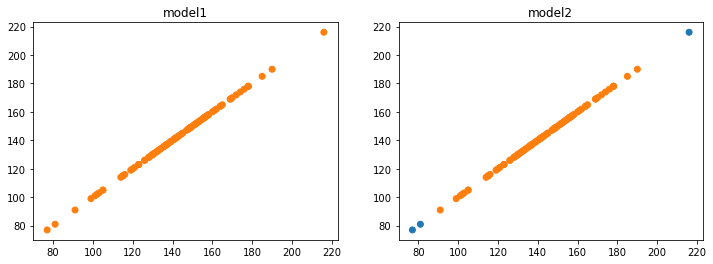

array offset: 17 150.94798296102843 [-1.84544637] [-0.69817855]


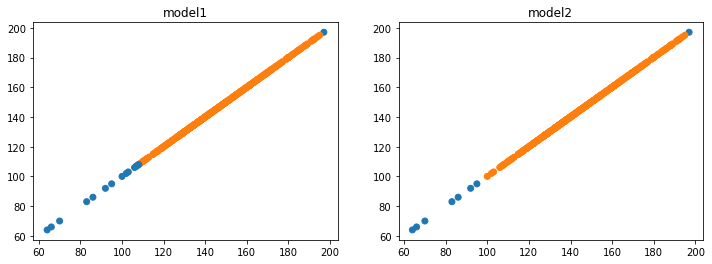

array offset: 18 153.09282057483776 [-1.69100393] [-0.63640157]


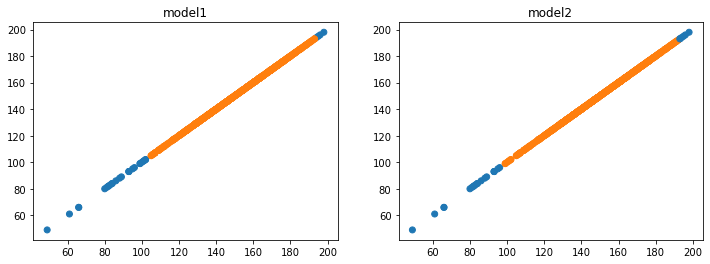

array offset: 19 148.23733702060517 [-1.69100393] [-0.63640157]


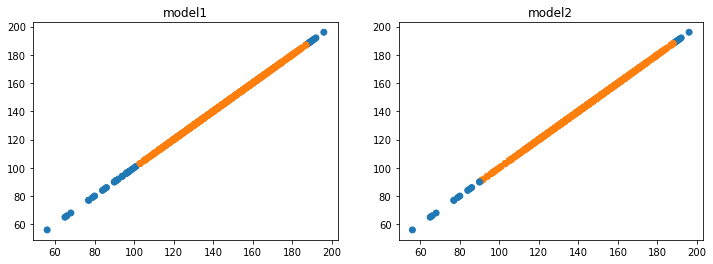

array offset: 20 155.72330928530647 [-1.69100393] [-0.63640157]


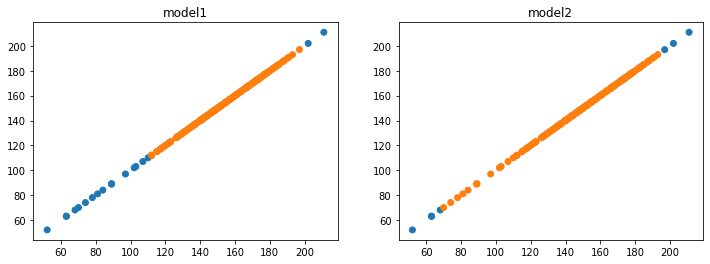

array offset: 21 150.85832054637905 [-1.91118773] [-0.72447509]


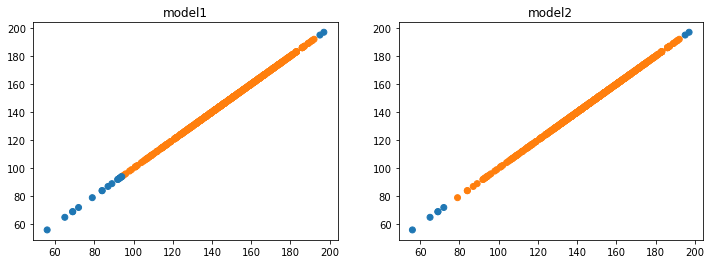

array offset: 22 154.07971391868904 [-1.91118773] [-0.72447509]


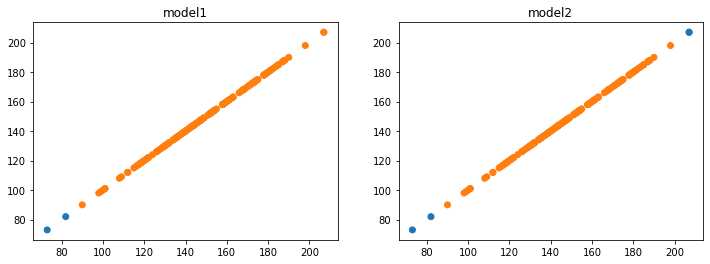

array offset: 23 153.4757998359311 [-1.91118773] [-0.72447509]


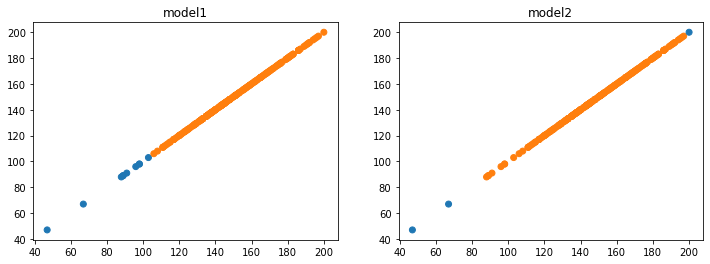

array offset: 24 152.1224739798372 [-1.81431168] [-0.68572467]


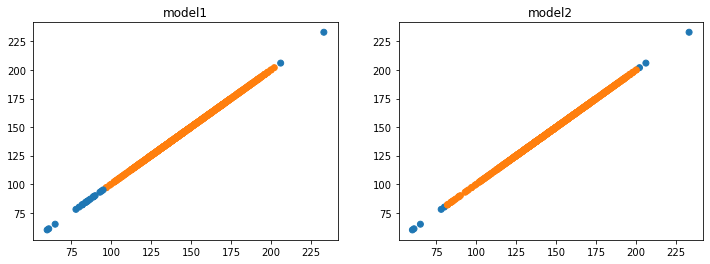

array offset: 25 150.8435317754457 [-1.81431168] [-0.68572467]


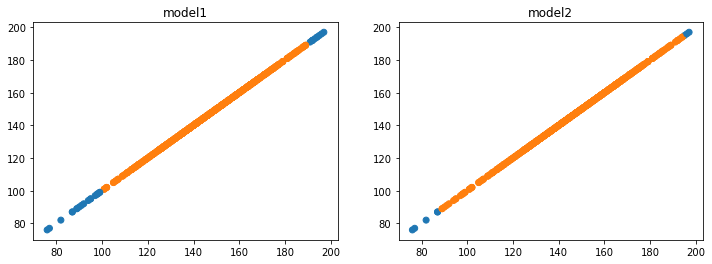

array offset: 26 151.37777289119535 [-1.81431168] [-0.68572467]


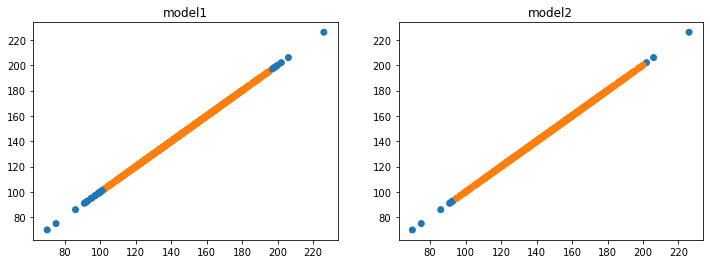

array offset: 27 152.82719925459295 [-1.83714507] [-0.69485803]


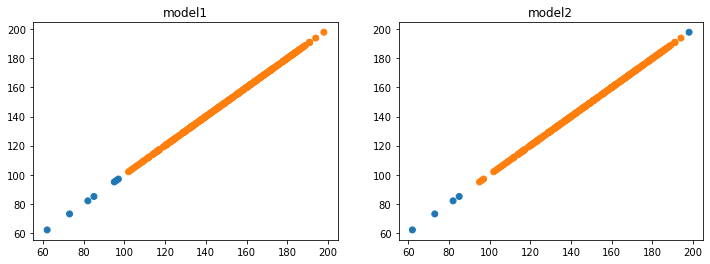

array offset: 28 144.94985321719042 [-1.83714507] [-0.69485803]


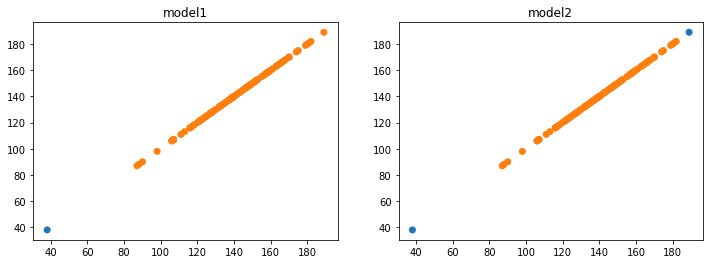

array offset: 29 151.67035525654694 [-1.83714507] [-0.69485803]


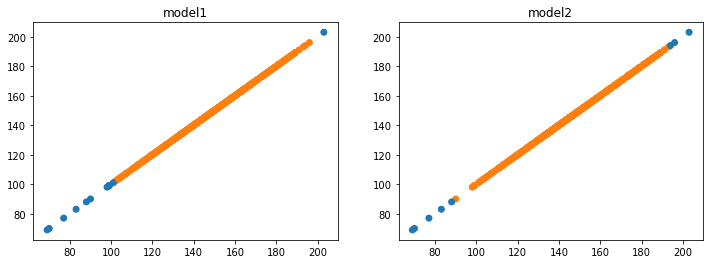

array offset: 30 148.9994226402022 [-1.9128832] [-0.72515328]


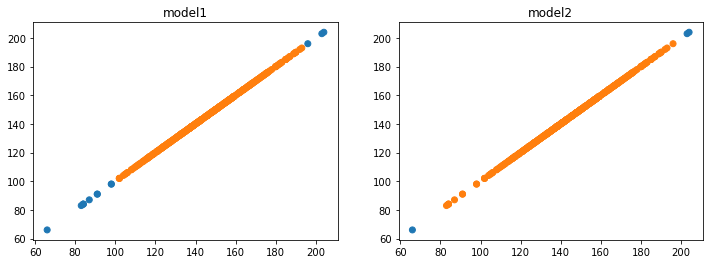

array offset: 31 153.2164565124926 [-1.9128832] [-0.72515328]


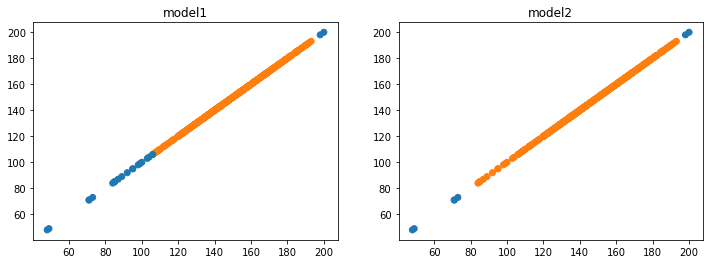

array offset: 32 154.4267253781008 [-1.9128832] [-0.72515328]


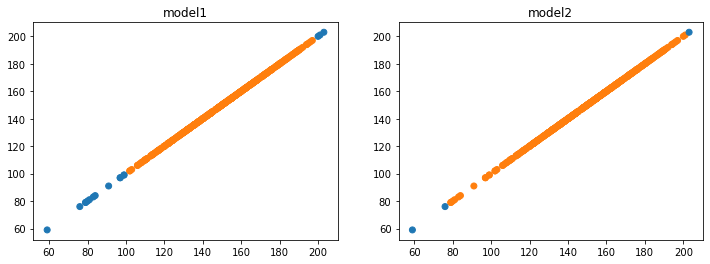

array offset: 33 149.0218229010682 [-1.76166564] [-0.66466626]


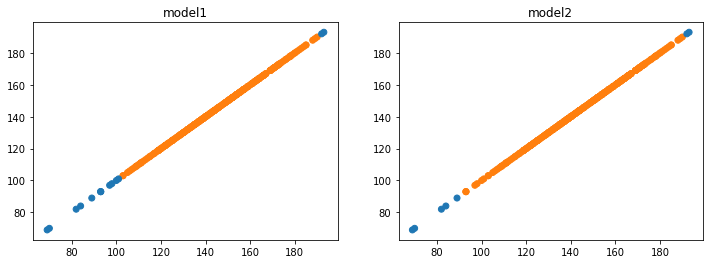

array offset: 34 154.206267038319 [-1.76166564] [-0.66466626]


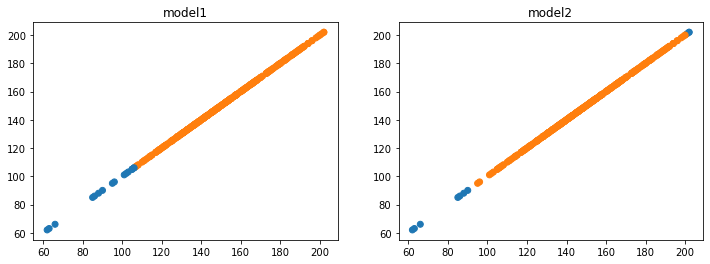

array offset: 35 147.67379080926727 [-1.76166564] [-0.66466626]


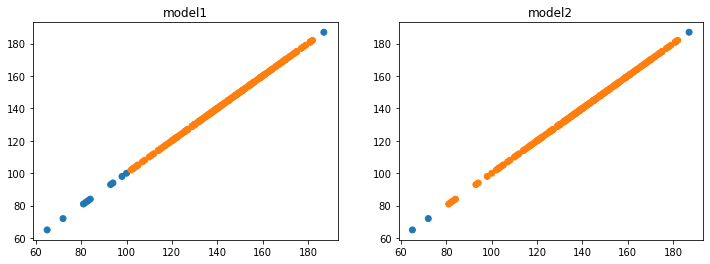

array offset: 36 152.5539917944579 [-1.83299977] [-0.69319991]


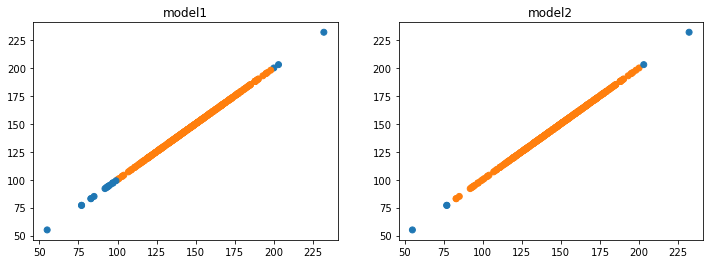

array offset: 37 151.53608553608552 [-1.83299977] [-0.69319991]


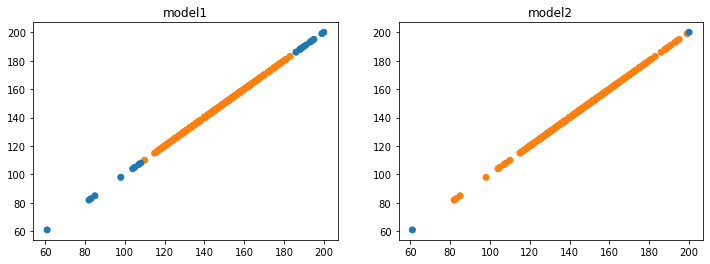

array offset: 38 154.85782523570825 [-1.83299977] [-0.69319991]


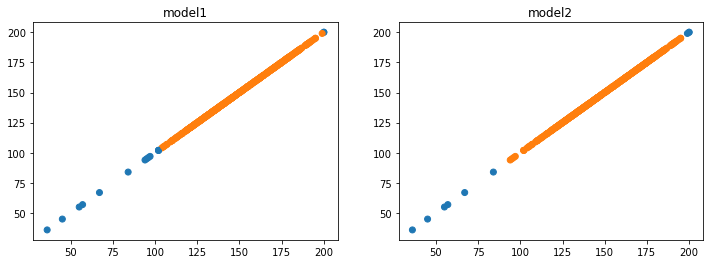

array offset: 39 157.53211169720757 [-1.82039509] [-0.68815803]


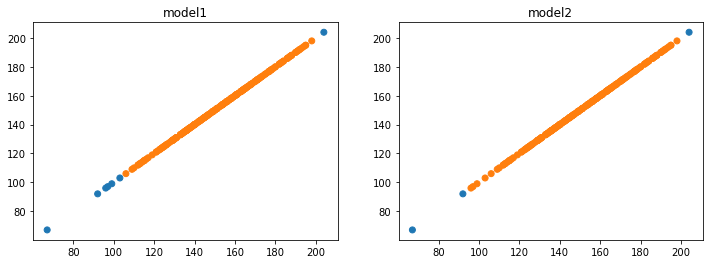

array offset: 40 155.70039363034533 [-1.82039509] [-0.68815803]


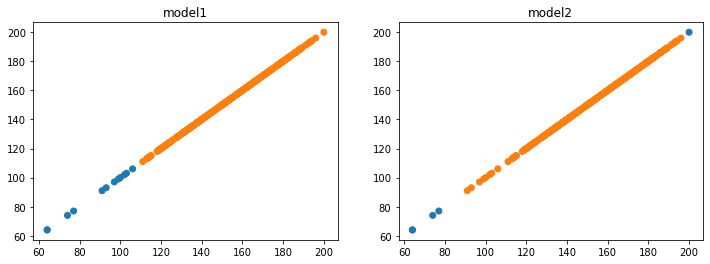

array offset: 41 155.94385593220338 [-1.82039509] [-0.68815803]


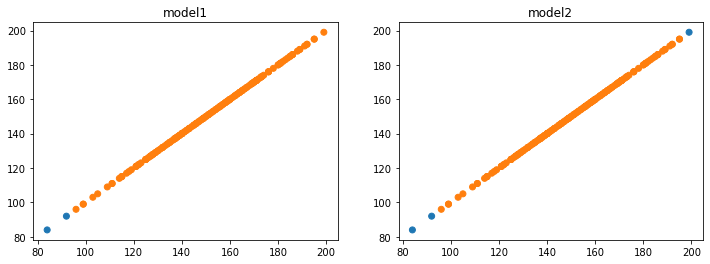

array offset: 42 155.47420109119253 [-1.92217542] [-0.72887017]


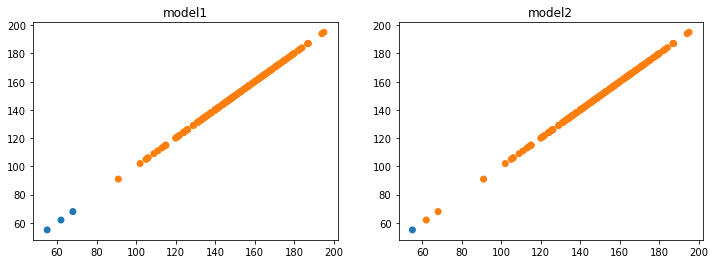

array offset: 43 161.16374361405173 [-1.92217542] [-0.72887017]


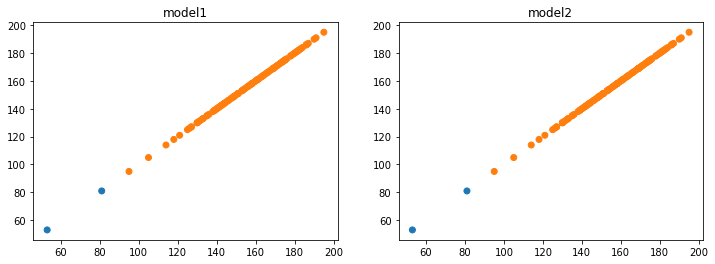

array offset: 44 148.21113429025127 [-1.92217542] [-0.72887017]


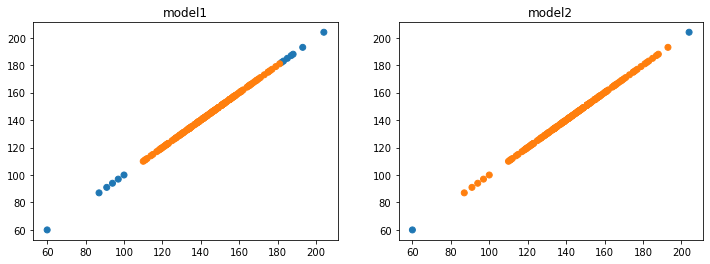

array offset: 45 151.0800962280423 [-1.72207615] [-0.64883046]


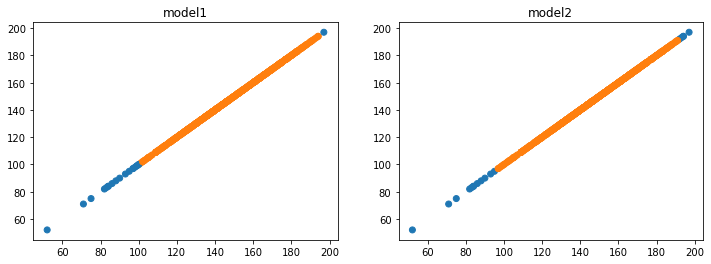

array offset: 46 149.17135589499915 [-1.72207615] [-0.64883046]


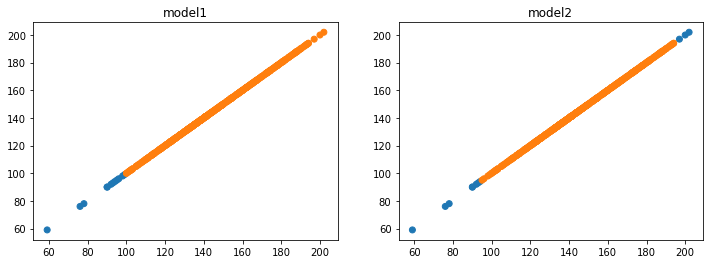

array offset: 47 149.7297173531432 [-1.72207615] [-0.64883046]


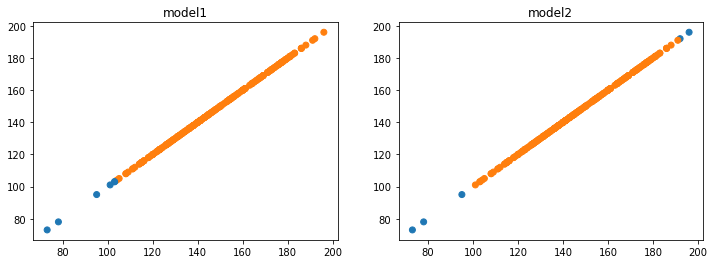

array offset: 48 148.98447883351614 [-1.69492094] [-0.63796838]


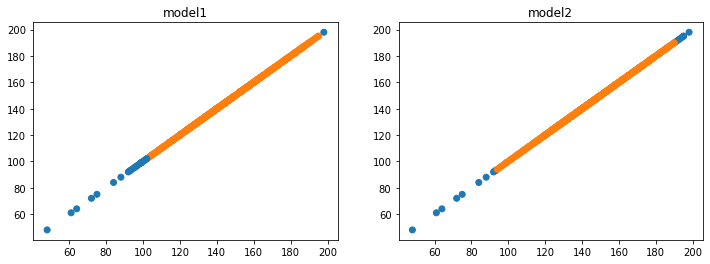

array offset: 49 153.06485469103902 [-1.69492094] [-0.63796838]


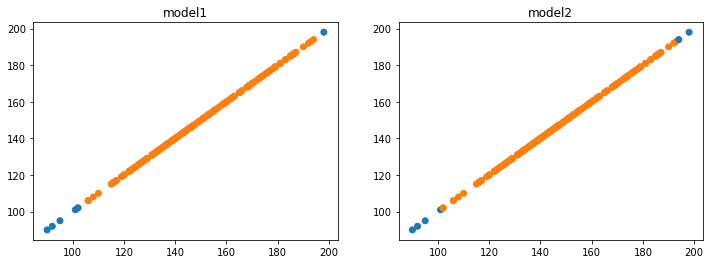

array offset: 50 150.68779991737375 [-1.69492094] [-0.63796838]


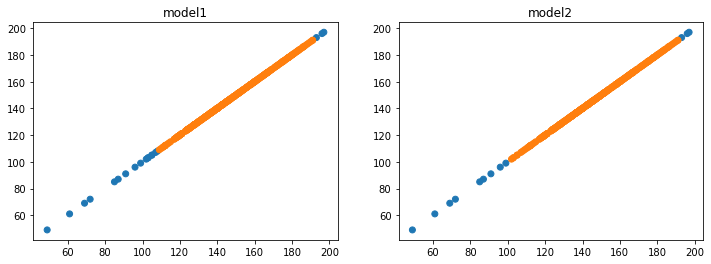

array offset: 51 151.32060802117414 [-1.75809585] [-0.66323834]


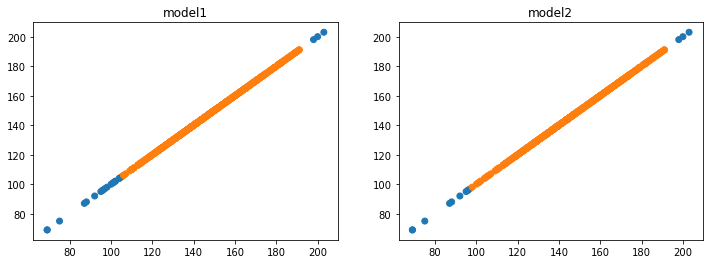

array offset: 52 149.17539738469972 [-1.75809585] [-0.66323834]


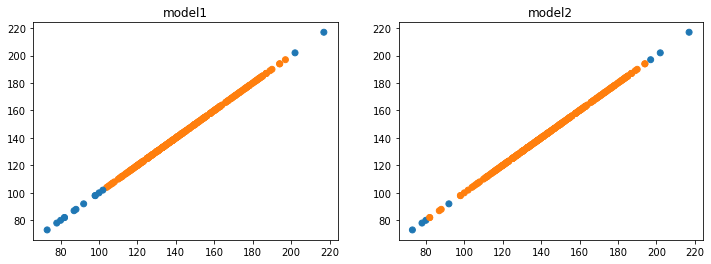

array offset: 53 146.704218740832 [-1.75809585] [-0.66323834]


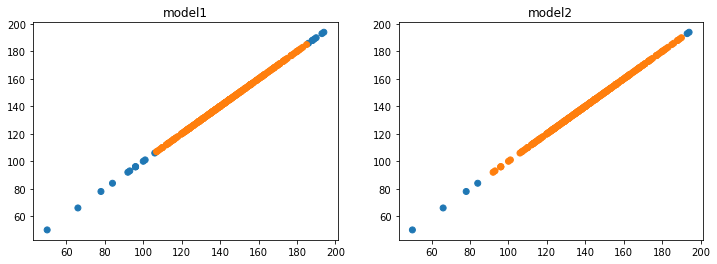

array offset: 54 152.9499303038751 [-1.85857924] [-0.7034317]


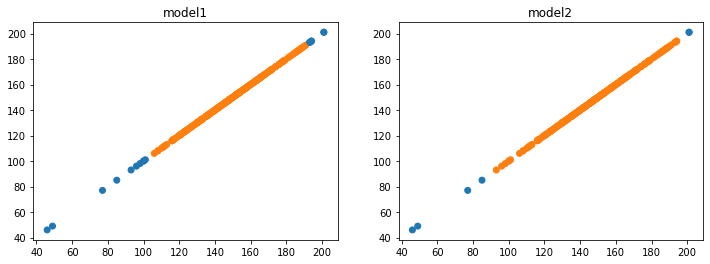

array offset: 55 150.1525112405765 [-1.85857924] [-0.7034317]


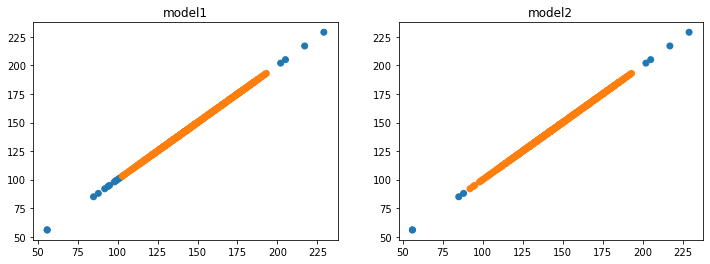

array offset: 56 152.4384048558135 [-1.85857924] [-0.7034317]


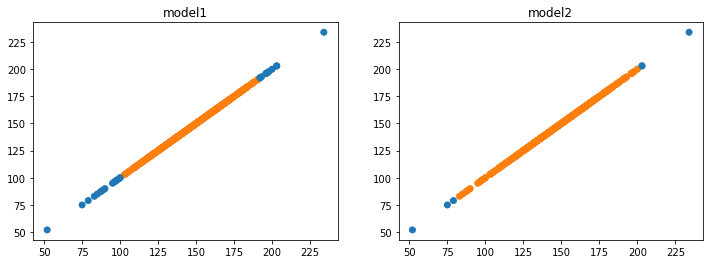

array offset: 57 150.9115126827036 [-1.72690247] [-0.65076099]


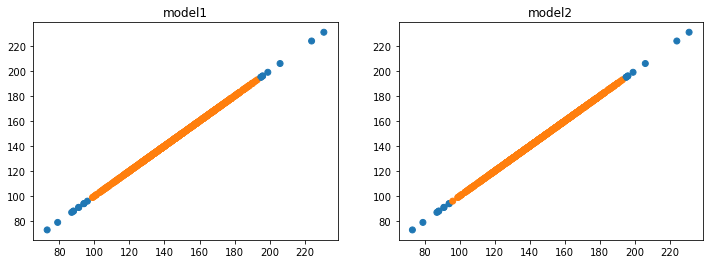

array offset: 58 155.06725313622402 [-1.72690247] [-0.65076099]


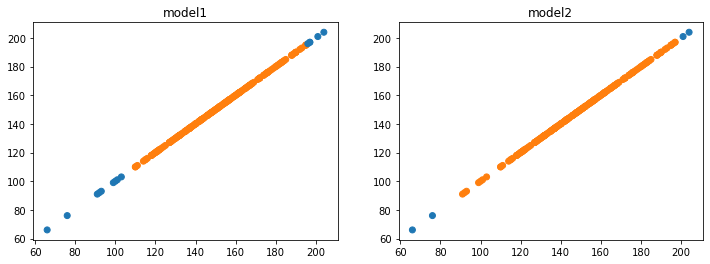

array offset: 59 149.2056451082308 [-1.72690247] [-0.65076099]


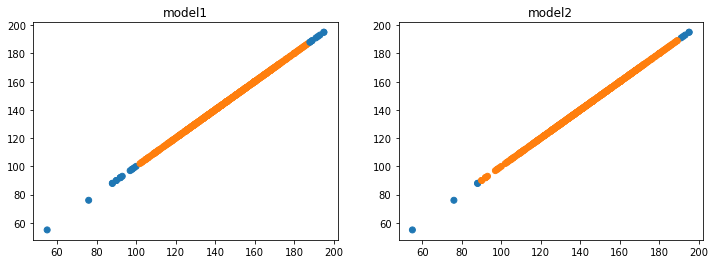

array offset: 60 153.58991638587295 [-1.94887669] [-0.73955068]


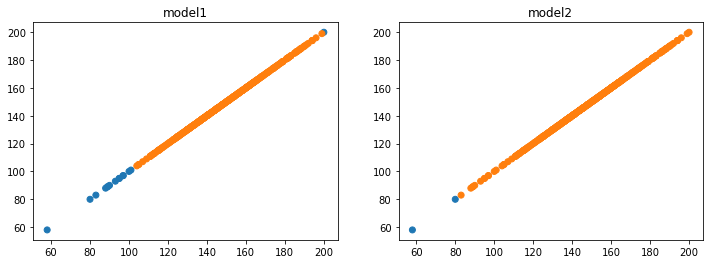

array offset: 61 150.1586028198106 [-1.94887669] [-0.73955068]


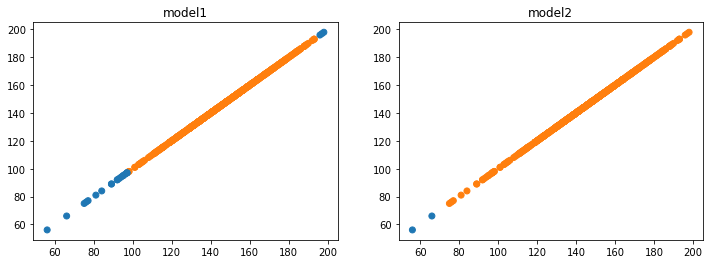

array offset: 62 146.51162703332207 [-1.94887669] [-0.73955068]


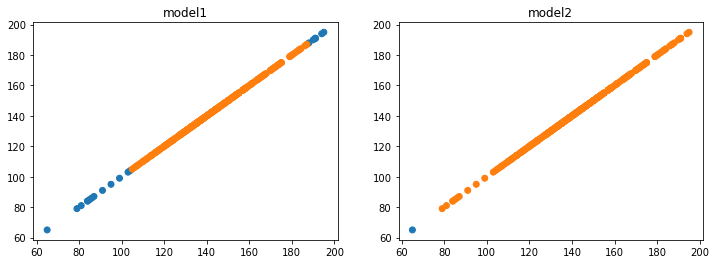

array offset: 63 152.44190892384273 [-1.82418808] [-0.68967523]


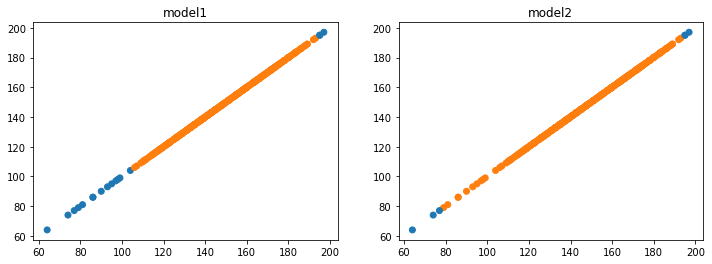

array offset: 64 155.76266671704386 [-1.82418808] [-0.68967523]


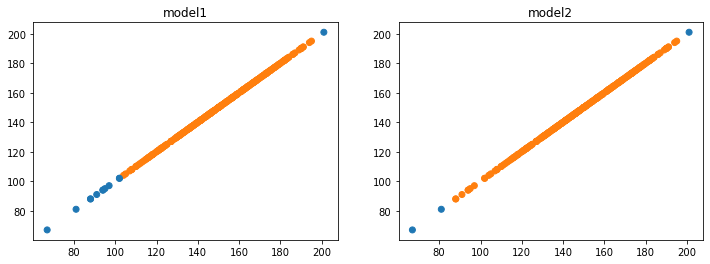

array offset: 65 152.07654421491807 [-1.82418808] [-0.68967523]


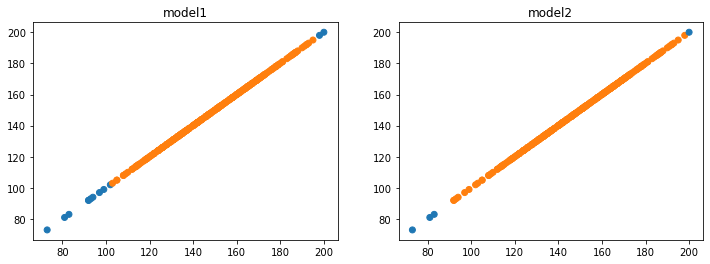

array offset: 66 146.5486251673777 [-1.88410943] [-0.71364377]


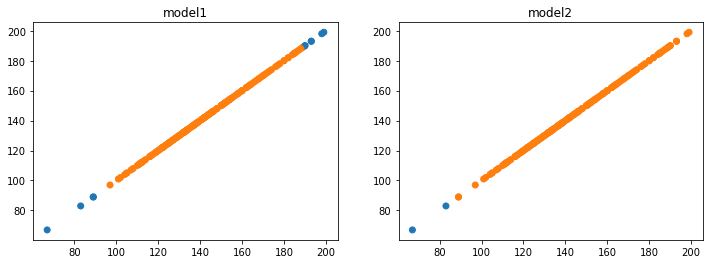

array offset: 67 149.29767602506539 [-1.88410943] [-0.71364377]


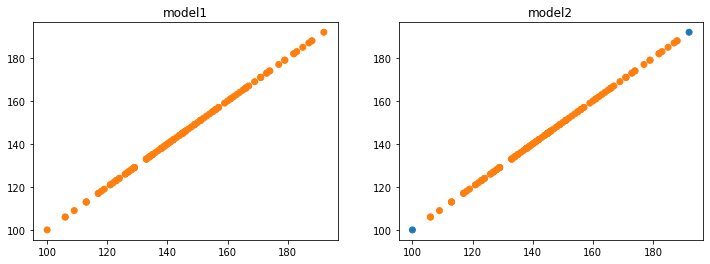

array offset: 68 152.98460341509357 [-1.88410943] [-0.71364377]


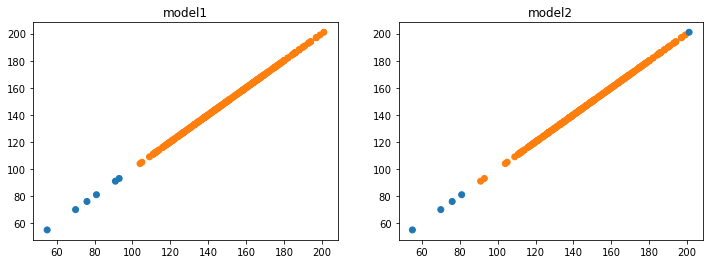

array offset: 69 150.97131786684673 [-1.84498598] [-0.69799439]


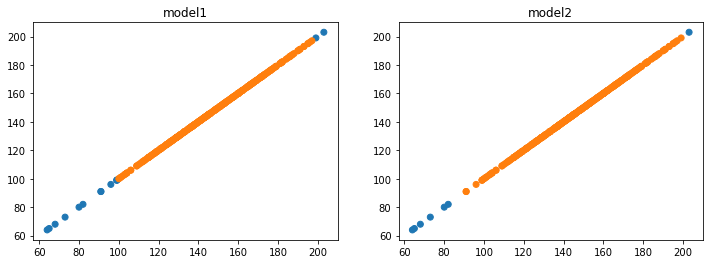

array offset: 70 154.75356754335445 [-1.84498598] [-0.69799439]


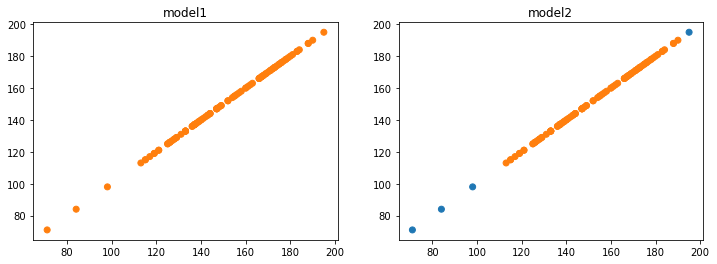

array offset: 71 151.7377248720911 [-1.84498598] [-0.69799439]


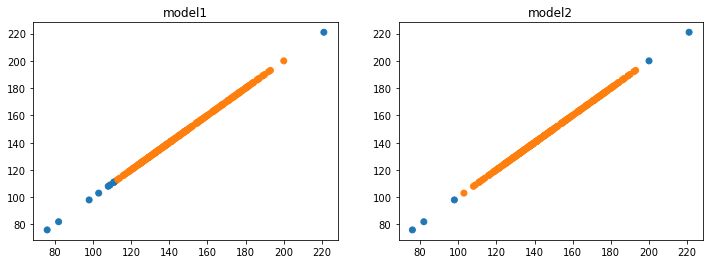

array offset: 72 153.33378595235155 [-1.81122329] [-0.68448931]


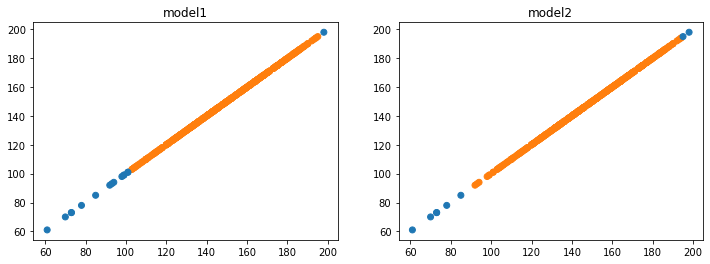

array offset: 73 146.94511158633549 [-1.81122329] [-0.68448931]


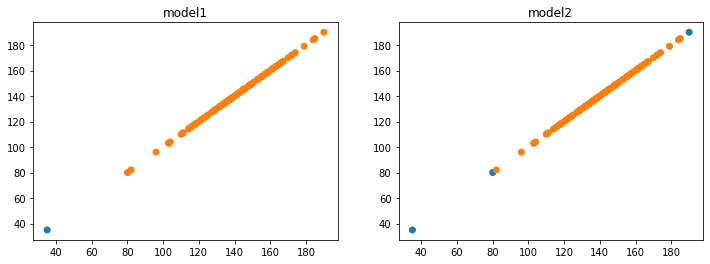

array offset: 74 145.34903685092127 [-1.81122329] [-0.68448931]


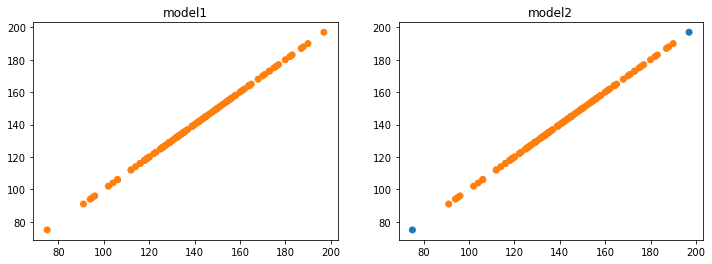

array offset: 75 154.44791666666666 [-1.80505583] [-0.68202233]


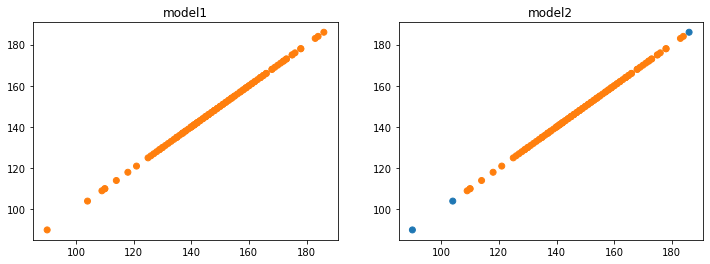

array offset: 76 151.57268336854816 [-1.80505583] [-0.68202233]


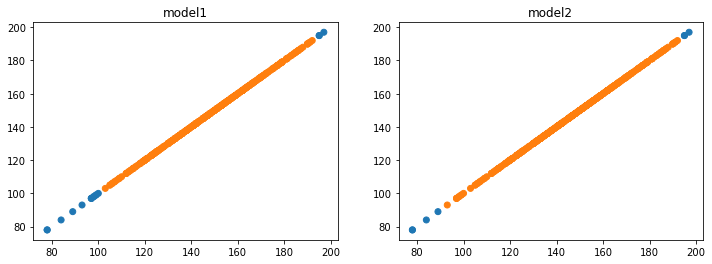

array offset: 77 148.04513191375386 [-1.80505583] [-0.68202233]


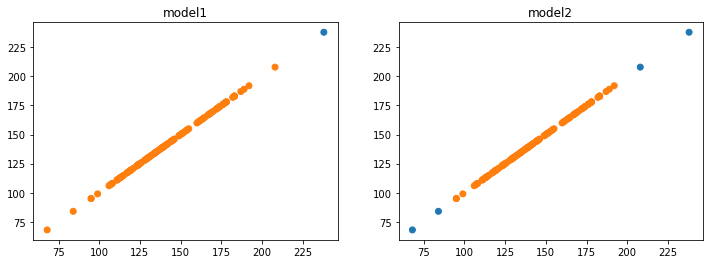

array offset: 78 152.57017114914424 [-1.80144609] [-0.68057844]


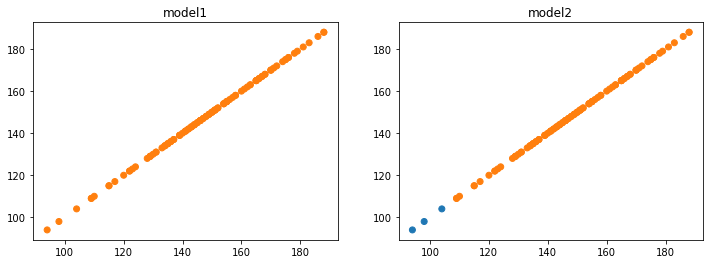

array offset: 79 149.11789232993712 [-1.80144609] [-0.68057844]


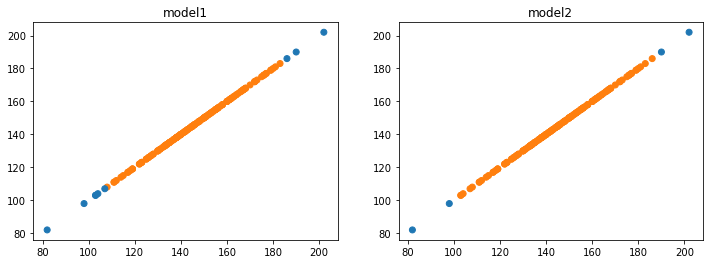

array offset: 80 152.74904018996472 [-1.80144609] [-0.68057844]


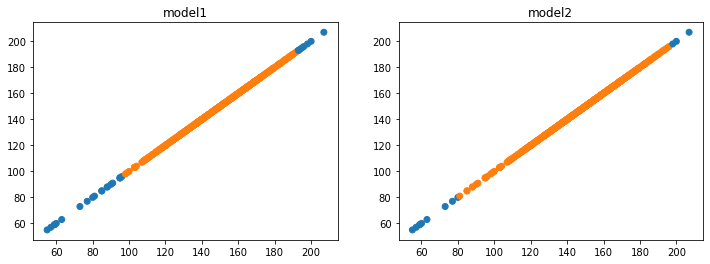

array offset: 81 150.98845934768073 [-1.87825281] [-0.71130113]


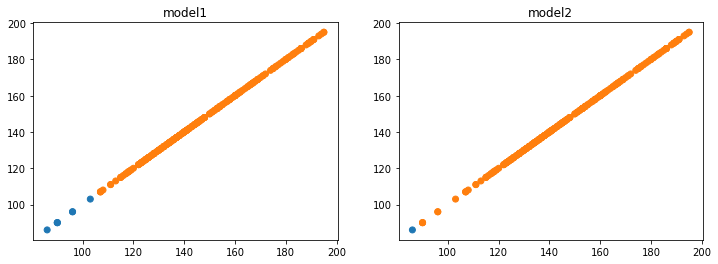

array offset: 82 148.91932177010221 [-1.87825281] [-0.71130113]


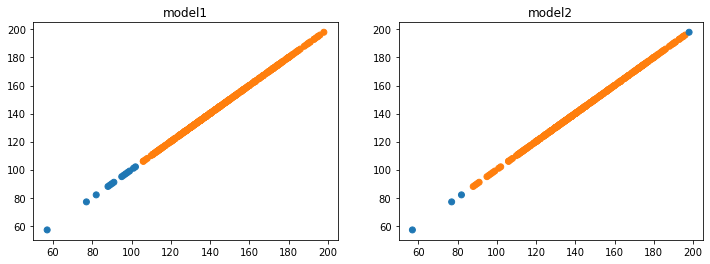

array offset: 83 141.67078514911748 [-1.87825281] [-0.71130113]


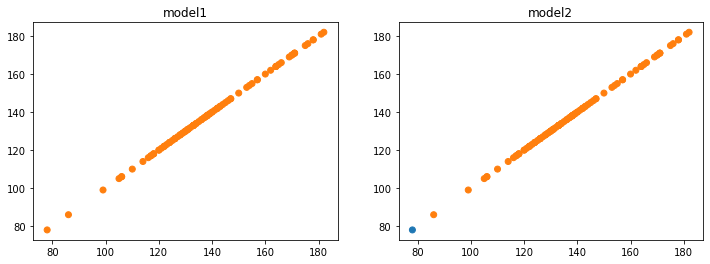

array offset: 84 146.994053490001 [-1.62631593] [-0.61052637]


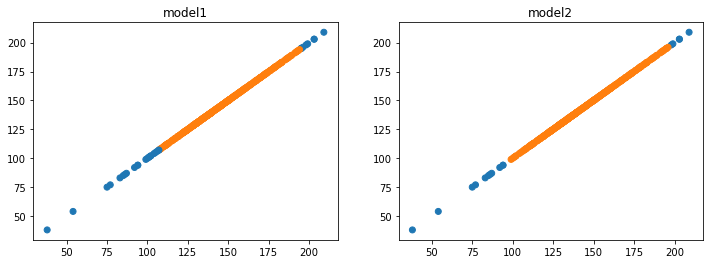

array offset: 85 151.52410062997347 [-1.62631593] [-0.61052637]


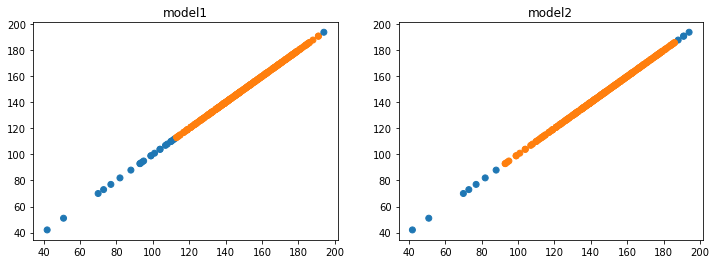

array offset: 86 148.1581752101496 [-1.62631593] [-0.61052637]


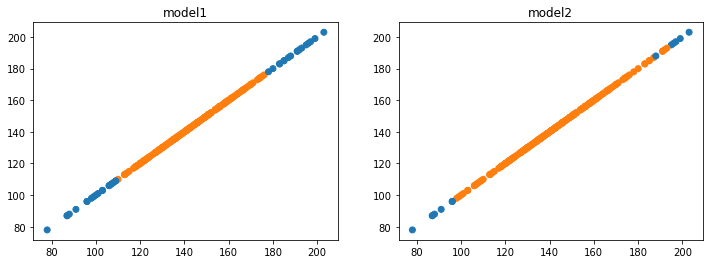

array offset: 87 153.15625902049456 [-1.79976106] [-0.67990442]


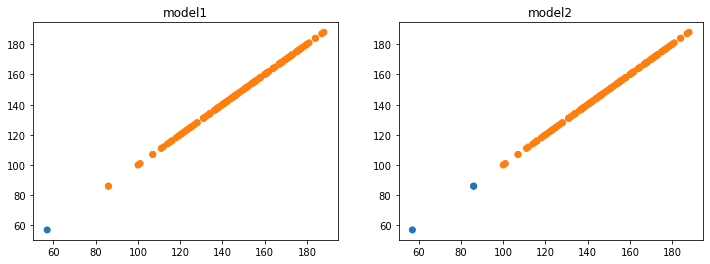

array offset: 88 159.74916252743444 [-1.79976106] [-0.67990442]


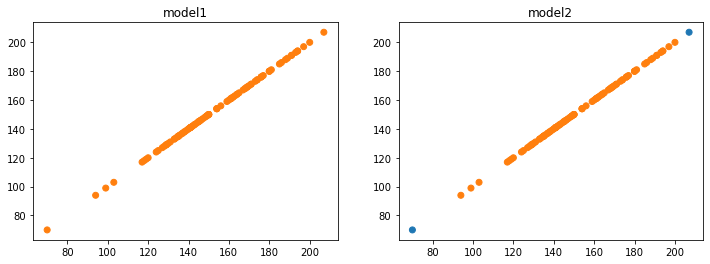

array offset: 89 150.32532043757922 [-1.79976106] [-0.67990442]


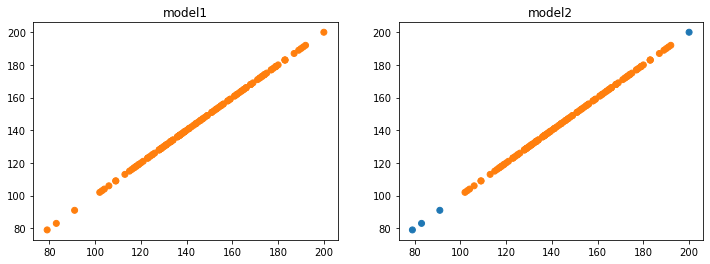

array offset: 90 157.71593909770212 [-1.73581688] [-0.65432675]


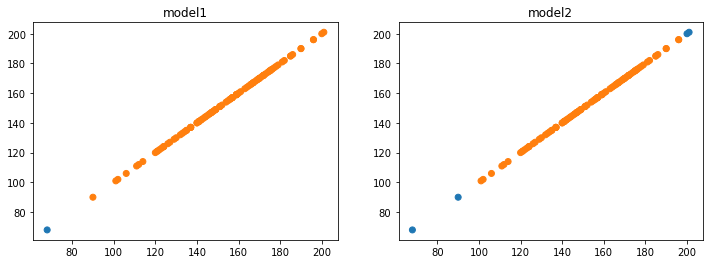

array offset: 91 152.7938564074636 [-1.73581688] [-0.65432675]


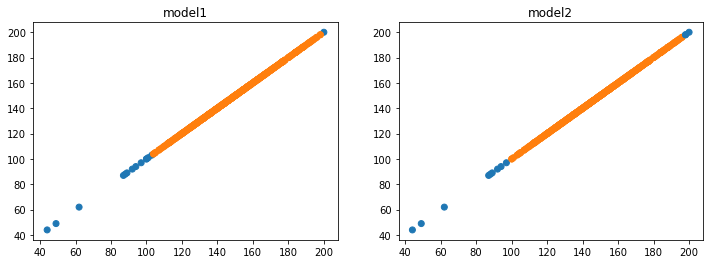

array offset: 92 152.4536980395584 [-1.73581688] [-0.65432675]


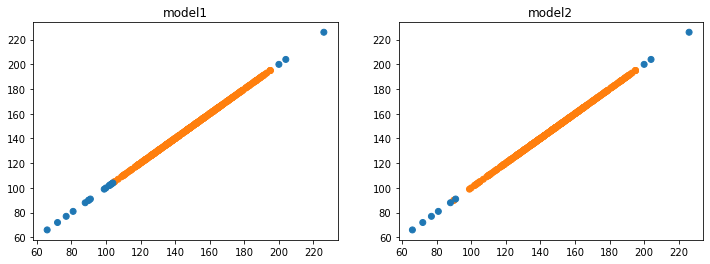

array offset: 93 152.65375973994932 [-1.85143439] [-0.70057376]


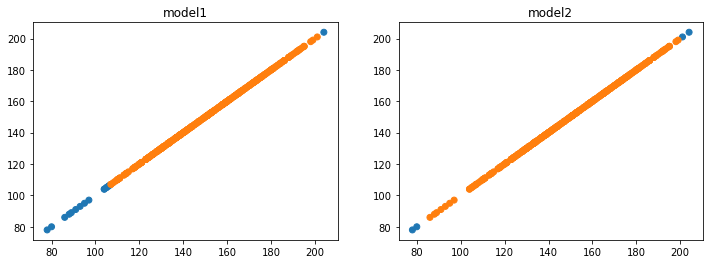

array offset: 94 148.51984753690093 [-1.85143439] [-0.70057376]


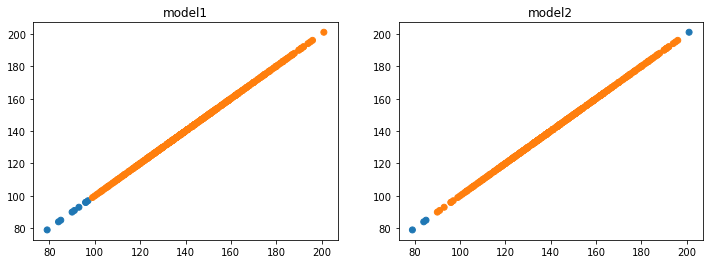

array offset: 95 151.21766703849 [-1.85143439] [-0.70057376]


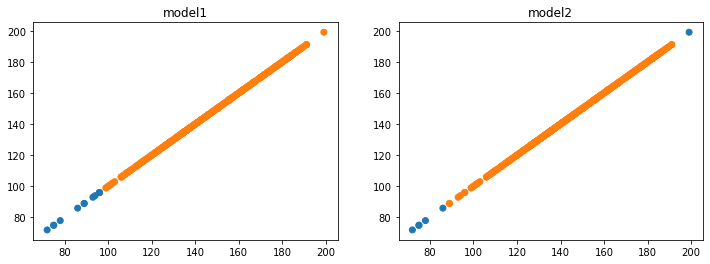

array offset: 96 151.77339367369066 [-1.88896714] [-0.71558686]


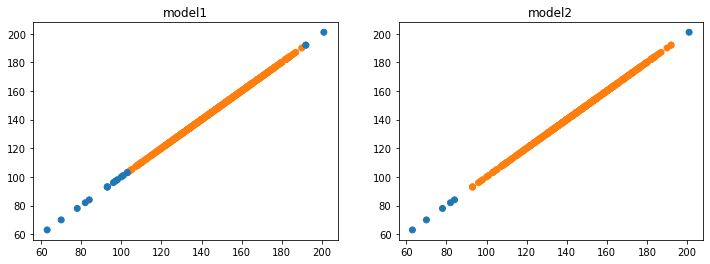

array offset: 97 152.4460193457471 [-1.88896714] [-0.71558686]


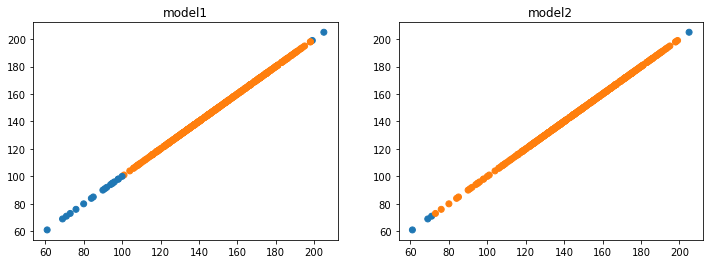

array offset: 98 149.4245503630153 [-1.88896714] [-0.71558686]


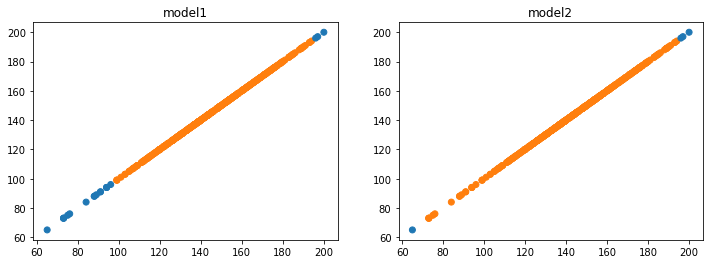

array offset: 99 149.7368621892717 [-1.78206358] [-0.67282543]


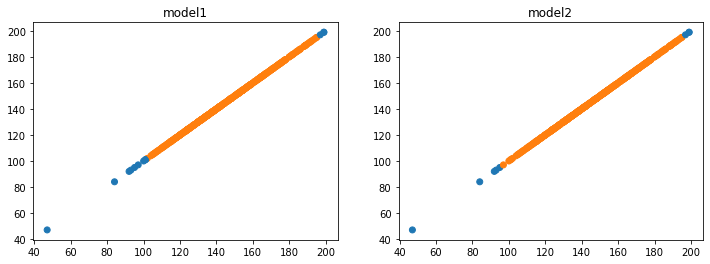

array offset: 100 150.71099811208953 [-1.78206358] [-0.67282543]


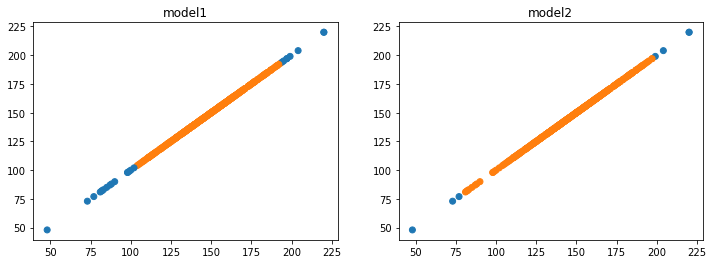

array offset: 101 154.53677661169417 [-1.78206358] [-0.67282543]


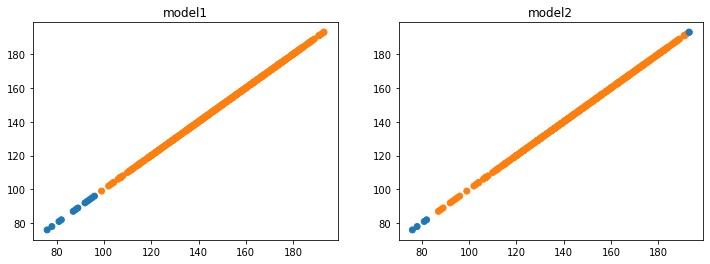

array offset: 102 149.22448348020868 [-1.86224249] [-0.704897]


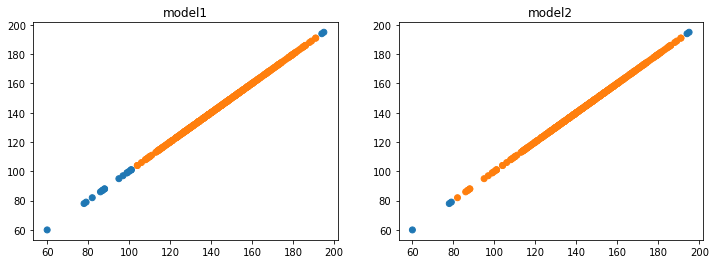

array offset: 103 150.0846693911768 [-1.86224249] [-0.704897]


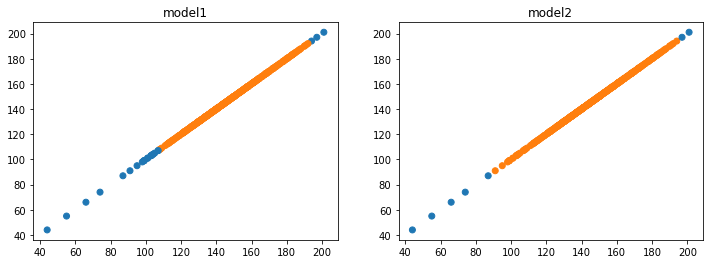

array offset: 104 148.59958585536796 [-1.86224249] [-0.704897]


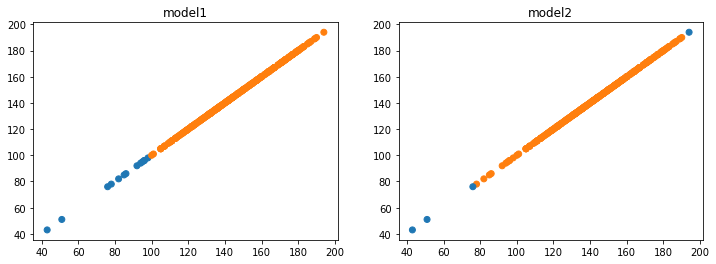

array offset: 105 151.72493389022068 [-1.70933596] [-0.64373438]


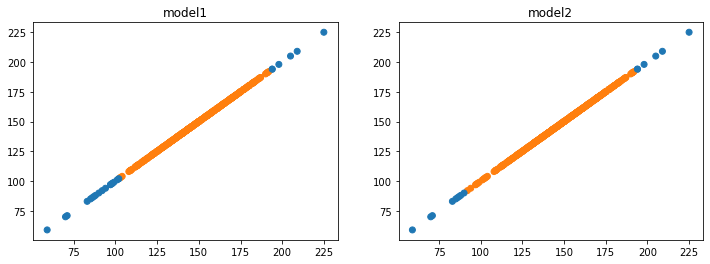

array offset: 106 154.45690181036176 [-1.70933596] [-0.64373438]


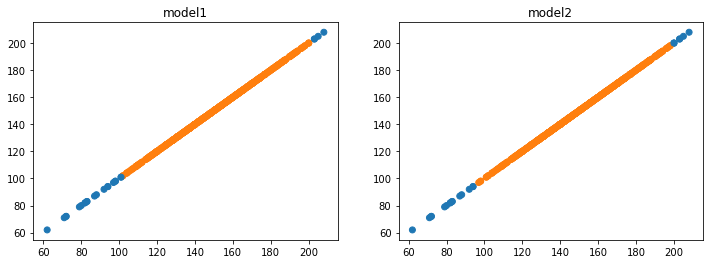

array offset: 107 148.18199506714168 [-1.70933596] [-0.64373438]


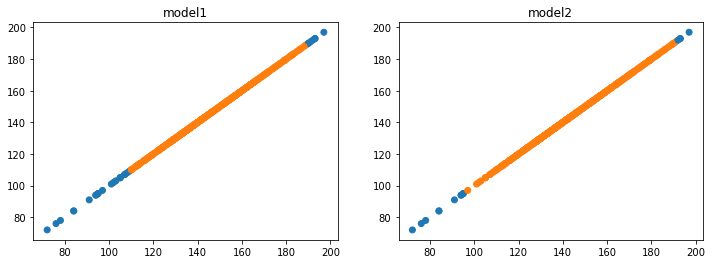

array offset: 108 156.16395331498828 [-1.84052542] [-0.69621017]


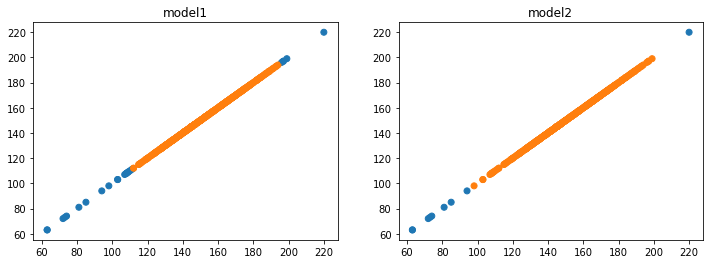

array offset: 109 156.08011049723757 [-1.84052542] [-0.69621017]


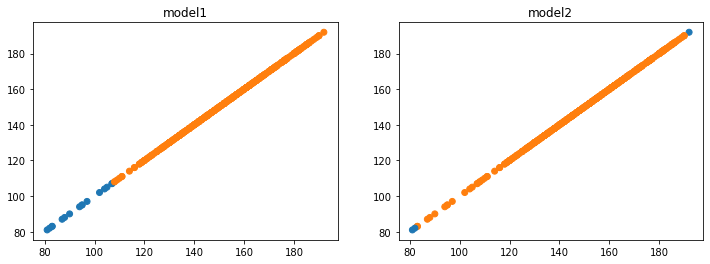

array offset: 110 156.4408038383979 [-1.84052542] [-0.69621017]


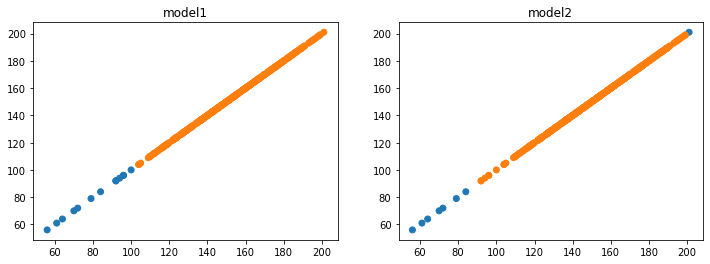

In [44]:
anomodels.check_pred_labels(
    thermal_data, module_labels, anomodels.lof, anomodels.isof)

異常タイプの確認テスト

[-0.96523491 -1.01419705 -0.96486733 -0.96692915 -0.97063911 -0.97926172
 -1.34129015 -0.98444069]
[-1.81203188]
[-0.43623937 -0.45696568 -0.44198007 -0.44325773 -0.43023538 -0.46654209
 -0.52728831 -0.45162149]
[-0.68481275]
0.0 0
63.jpg Normal
[-1.1221944  -1.07934321 -0.97267286 -1.10304971 -1.13788693 -1.02086312
 -1.0873063  -1.03516731]
[-1.81203188]
[-0.4801585  -0.51009107 -0.44135142 -0.48801747 -0.47402947 -0.45848144
 -0.46325117 -0.5000309 ]
[-0.68481275]
0.0 0
823.jpg Normal
[-1.18695939 -0.96692915 -1.18695939 -1.0873063  -1.33274361 -1.13258062
 -2.39110293 -1.23473327]
[-1.81203188]
[-0.49230292 -0.44325773 -0.49230292 -0.46325117 -0.53950587 -0.50598898
 -0.65408021 -0.52023008]
[-0.68481275]
0.0 0
4217.jpg Normal
[-1.30753778 -1.98551288 -1.37993516 -1.09650516 -1.49765464 -1.93750994
 -1.0223673  -0.96486733]
[-1.81203188]
[-0.52971092 -0.55754248 -0.54815444 -0.50335303 -0.53670325 -0.58719288
 -0.43784017 -0.44198007]
[-0.68481275]
0.0 0
3578.jpg Normal
[-1.9855128

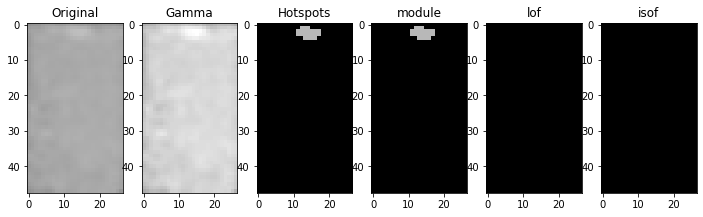

[-1.12274597 -1.2495087  -1.02086312 -1.17942203 -0.9805327  -1.17137131
 -1.0873063  -1.20715247]
[-1.81203188]
[-0.49756367 -0.53206196 -0.45848144 -0.48466598 -0.43652312 -0.4804071
 -0.46325117 -0.5386929 ]
[-0.68481275]
0.0 0
2100.jpg Normal
[-1.14676313 -1.07464581 -0.96845744 -1.09605617 -1.13258062 -2.95252861
 -1.1221944  -1.18695939]
[-1.81203188]
[-0.48805879 -0.50382551 -0.43283996 -0.46366669 -0.50598898 -0.69453438
 -0.4801585  -0.49230292]
[-0.68481275]
0.0 0
4571.jpg Normal
[-1.0223673  -0.97267286 -1.98551288 -1.49765464 -0.96523491 -0.97310212
 -0.96139285 -1.00219257]
[-1.81203188]
[-0.43784017 -0.44135142 -0.55754248 -0.53670325 -0.43623937 -0.4339977
 -0.42092088 -0.4679632 ]
[-0.68481275]
0.0 0
1409.jpg Normal
[-0.96258573 -1.21031577 -0.9839468  -0.96033242 -1.04716357 -2.55028253
 -0.96018016 -0.96873621]
[-1.81203188]
[-0.46248429 -0.45463373 -0.43246426 -0.41344064 -0.44755898 -0.62383441
 -0.4623969  -0.42042876]
[-0.68481275]
0.0 0
189.jpg Normal
[-0.9992804

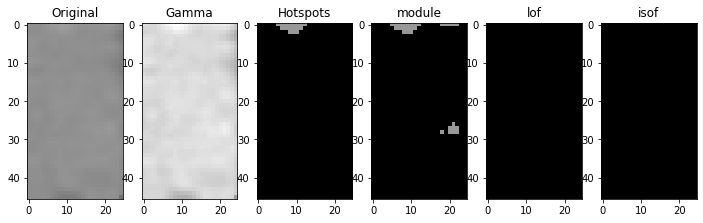

[-0.96845744 -1.02086312 -1.19259368 -1.09605617 -0.96523491 -0.9805327
 -1.00219257 -0.97310212]
[-1.81203188]
[-0.43283996 -0.45848144 -0.49938486 -0.46366669 -0.43623937 -0.43652312
 -0.4679632  -0.4339977 ]
[-0.68481275]
0.0 0
1421.jpg Normal
[-0.95548138 -1.06528845 -0.97396028 -0.96755021 -0.95471529 -0.96316502
 -1.78374429 -0.95950287]
[-1.78556933]
[-0.42660231 -0.48013639 -0.43601255 -0.43251836 -0.44283065 -0.43266343
 -0.61828406 -0.44776578]
[-0.67422773]
0.0 0
1347.jpg Normal
[-1.17489117 -0.99566327 -1.06118387 -1.2144909  -0.96141637 -1.12165179
 -1.15665931 -1.30385166]
[-1.81203188]
[-0.4638066  -0.44445565 -0.47482685 -0.47947572 -0.42560305 -0.44602626
 -0.47309147 -0.52783127]
[-0.68481275]
0.0 0
2896.jpg Normal
[-1.00372904 -0.9910891  -0.97024    -1.00151673 -0.98870533 -1.00220103
 -0.99606082 -1.06781516]
[-1.81203188]
[-0.44805115 -0.45146691 -0.43333769 -0.4703199  -0.47232923 -0.46158307
 -0.43560971 -0.46696778]
[-0.68481275]
0.0 0
3550.jpg Normal
[-1.17137

[-0.43601255 -0.5377891  -0.4827746  -0.44249646 -0.4806661  -0.44283065
 -0.50105583 -0.45677465]
[-0.67422773]
0.0 0
3746.jpg Normal
[-1.70395036 -1.91335437 -2.2896833  -0.9839468  -1.38505796 -1.82540469
 -1.59446198 -1.74283968]
[-1.81203188]
[-0.58535212 -0.67402874 -0.77626615 -0.43246426 -0.53851419 -0.63987857
 -0.54956435 -0.61081883]
[-0.68481275]
0.0 2.0 0.0 1.0
2.0 6.0 0.6981317007977318 1.0
1.0 4.828427076339722 0.5390120952601716 1.0
17.0 27.656854152679443 0.2792886112105262 0.9061861348498871
2.0 8.828427076339722 0.3224580264151723 0.951284485472469
5.0 9.656854152679443 0.6737651190752144 0.9815524263882321
436.5 290.69343161582947 0.06491180333442843 0.440445774392156
0.0 0
4029.jpg Normal
[-1.01426313 -0.96139285 -0.96123925 -1.0223673  -0.97267286 -1.04626083
 -1.0223673  -0.97267286]
[-1.81203188]
[-0.47738388 -0.42092088 -0.44559337 -0.43784017 -0.44135142 -0.47760913
 -0.43784017 -0.44135142]
[-0.68481275]
0.0 0
3752.jpg Normal
[-1.00000329 -0.98445434 -1.10186

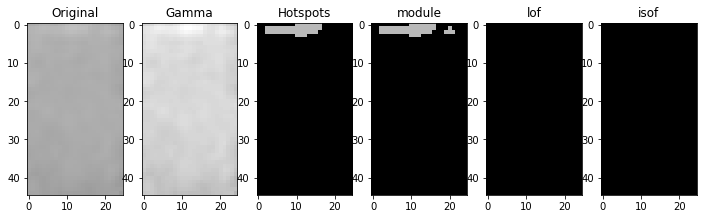

[-0.97936621 -0.98445434 -1.00000329 -0.9834752  -1.33332638 -1.02388871
 -0.99179586 -0.9834752 ]
[-1.78556933]
[-0.46837183 -0.45990431 -0.4655871  -0.42952223 -0.49703405 -0.46618601
 -0.4314495  -0.42952223]
[-0.67422773]
0.0 0
1810.jpg Normal
[-1.05849581 -1.00479225 -1.01883022 -0.98224536 -1.05138792 -1.02893962
 -1.05138792 -1.00815745]
[-1.78229778]
[-0.45336349 -0.45833998 -0.42276569 -0.42695062 -0.45051683 -0.42972812
 -0.45051683 -0.45444044]
[-0.67291911]
0.0 0
3961.jpg Normal
[-0.99371679 -1.01910606 -0.98360075 -1.00778517 -1.00954605 -0.97454062
 -1.01798433 -1.00068559]
[-1.78556933]
[-0.45430741 -0.45669949 -0.43726592 -0.46749744 -0.46786677 -0.42999867
 -0.44152156 -0.43675065]
[-0.67422773]
0.0 0
3975.jpg Normal
[-1.02309375 -1.38214375 -1.00936379 -0.96160946 -1.12231625 -0.97220085
 -1.26293069 -0.96873621]
[-1.81203188]
[-0.43295945 -0.47738399 -0.428797   -0.41990303 -0.46641775 -0.44062549
 -0.47708422 -0.42042876]
[-0.68481275]
0.0 0
1804.jpg Normal
[-0.9849

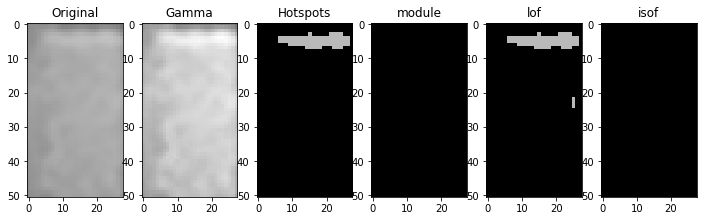

[-1.1221944  -1.06018635 -1.05645935 -0.96139285 -1.00219257 -1.0873063
 -1.00219257 -1.0873063 ]
[-1.81203188]
[-0.4801585  -0.48941351 -0.48942965 -0.42092088 -0.4679632  -0.46325117
 -0.4679632  -0.46325117]
[-0.68481275]
0.0 0
1025.jpg Normal
[-1.12675784 -0.99504296 -1.72643682 -1.05163776 -1.02888539 -1.47454245
 -1.33602783 -1.00594935]
[-1.78556933]
[-0.48457692 -0.44767033 -0.569091   -0.49158571 -0.46750397 -0.52824663
 -0.51873331 -0.44551959]
[-0.67422773]
0.0 0
3632.jpg Normal
[-1.02056407 -1.25440519 -0.99198915 -1.33116864 -1.00903476 -1.2195074
 -1.52714123 -1.09442669]
[-1.78229778]
[-0.47206004 -0.53407992 -0.47381293 -0.54688083 -0.45537644 -0.5265813
 -0.589894   -0.48983661]
[-0.67291911]
0.0 0
4149.jpg Normal
[-1.57552451 -1.86547814 -1.14574788 -1.71446063 -1.5442227  -2.83682948
 -1.32620833 -2.11589263]
[-1.78556933]
[-0.58289446 -0.70646055 -0.46332821 -0.6050647  -0.59044617 -0.76890248
 -0.51856185 -0.77257554]
[-0.67422773]
323.5 121.8406194448471 0.2738419

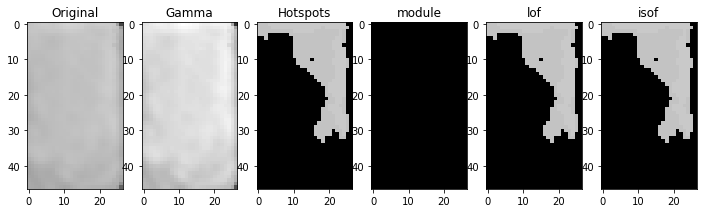

[-0.98209403 -0.99683859 -1.2119735  -0.98892657 -0.99472835 -4.32247486
 -1.05963689 -0.98985985]
[-1.78556933]
[-0.45677045 -0.46384385 -0.51982871 -0.44942784 -0.44939742 -0.77538434
 -0.47428352 -0.44642559]
[-0.67422773]
0.0 0
2538.jpg Normal
[-0.96391557 -1.23549109 -0.97024    -1.16358227 -0.99056494 -1.50474904
 -0.98389922 -1.05942585]
[-1.81203188]
[-0.44151464 -0.49064795 -0.43333769 -0.47280896 -0.4466603  -0.52328472
 -0.44701219 -0.45736321]
[-0.68481275]
0.0 0
1031.jpg Normal
[-1.62037194 -1.28004458 -1.16283215 -1.26477664 -1.43666412 -1.22094287
 -1.11573999 -1.10304971]
[-1.81203188]
[-0.70281785 -0.52911805 -0.50464411 -0.5233922  -0.62069788 -0.51611652
 -0.4959179  -0.48801747]
[-0.68481275]
0.0 0.0 0 0
2.0 6.828427076339722 0.5390120920947209 0.9739111912819676
88.5 76.52691125869751 0.18989991262402436 0.8953000888256432
0.0 0
1757.jpg Normal
[-1.03241264 -0.96922396 -1.01902874 -1.16544525 -1.01882328 -0.97896192
 -0.99635599 -1.05845581]
[-1.78229778]
[-0.47691

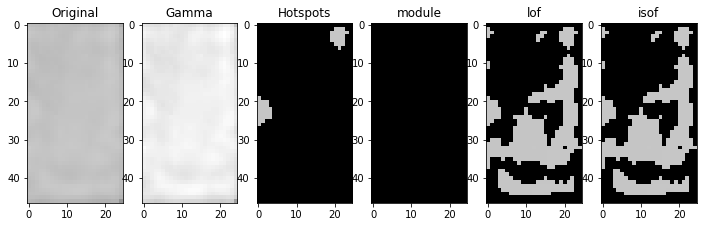

[-0.99259027 -1.03948117 -1.40024831 -0.9834752  -0.98445434 -0.98226169
 -0.98387547 -0.99401151]
[-1.78556933]
[-0.4532829  -0.46394064 -0.51262124 -0.42952223 -0.45990431 -0.4454477
 -0.45910527 -0.44957711]
[-0.67422773]
0.0 0
3829.jpg Normal
[-1.02893962 -1.01662503 -0.99124323 -1.44294481 -0.96167872 -1.03987918
 -0.96816555 -1.18222317]
[-1.78229778]
[-0.42972812 -0.46179912 -0.43442351 -0.55053294 -0.43381104 -0.44190398
 -0.42906864 -0.48451757]
[-0.67291911]
0.0 0
572.jpg Normal
[-0.97744902 -1.00954605 -1.02888539 -0.99559503 -1.29543694 -1.00352651
 -1.00594935 -1.00147853]
[-1.78556933]
[-0.45190831 -0.46786677 -0.46750397 -0.42598528 -0.51427016 -0.44525678
 -0.44551959 -0.44326993]
[-0.67422773]
0.0 0
566.jpg Normal
[-1.09282795 -0.97316175 -1.06908907 -1.26262988 -1.14574788 -1.20884195
 -1.0130862  -1.10286423]
[-1.78556933]
[-0.47058714 -0.44879832 -0.45289411 -0.51658014 -0.46332821 -0.50331168
 -0.46025839 -0.46196528]
[-0.67422773]
0.0 0
3183.jpg Normal
[-1.2816328

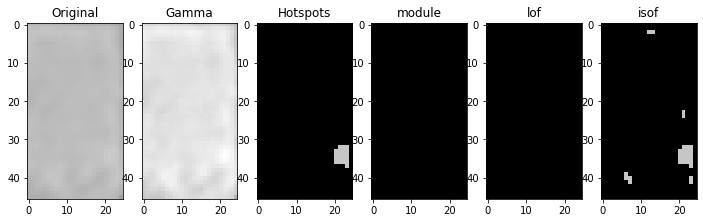

[-1.004723   -0.97727858 -1.01821105 -1.93507397 -0.99198915 -1.004723
 -1.02893962 -1.03987918]
[-1.78229778]
[-0.44796319 -0.41987043 -0.45369897 -0.58990391 -0.47381293 -0.44796319
 -0.42972812 -0.44190398]
[-0.67291911]
0.0 0
4377.jpg Normal
[-0.98386    -0.99461919 -0.96974941 -1.09795092 -1.00717865 -0.97905217
 -1.00463673 -0.96391557]
[-1.81203188]
[-0.44294847 -0.47719179 -0.46105896 -0.46803996 -0.47006426 -0.42854666
 -0.46667503 -0.44151464]
[-0.68481275]
0.0 0
943.jpg Normal
[-0.96891109 -1.01993486 -1.08626555 -1.70183767 -0.97670013 -0.98842928
 -1.0384905  -0.9658829 ]
[-1.78556933]
[-0.45903537 -0.4629986  -0.4806661  -0.58302432 -0.45906817 -0.4980345
 -0.44922725 -0.44195613]
[-0.67422773]
0.0 0
5041.jpg Normal
[-1.15845873 -1.47454245 -1.29543694 -1.06918362 -1.90123292 -1.56802651
 -1.01122746 -1.15845873]
[-1.78556933]
[-0.50684624 -0.52824663 -0.51427016 -0.47430295 -0.58352347 -0.54769645
 -0.45677916 -0.50684624]
[-0.67422773]
0.0 0
3430.jpg Normal
[-1.00200532

[-0.5031783  -0.48747613 -0.49788404 -0.5031783  -0.54834773 -0.49788404
 -0.50440843 -0.55857764]
[-0.67422773]
0.0 0
2920.jpg Normal
[-1.07903687 -1.02056407 -1.33116864 -0.97643863 -1.09442669 -1.00460992
 -1.05055114 -1.11297838]
[-1.78229778]
[-0.49028554 -0.47206004 -0.54688083 -0.45037607 -0.48983661 -0.46041676
 -0.47842618 -0.4891402 ]
[-0.67291911]
0.0 0
5083.jpg Normal
[-0.98646368 -1.05180829 -0.99420116 -1.11989124 -0.97757272 -0.98531363
 -0.99923963 -1.00709743]
[-1.76462601]
[-0.42429024 -0.45915963 -0.45365746 -0.49242194 -0.45124405 -0.4337335
 -0.44116621 -0.44843884]
[-0.6658504]
0.0 0
2934.jpg Normal
[-0.95958102 -0.96599654 -1.16170014 -0.97316175 -0.95950287 -1.0130862
 -0.98512745 -0.95958102]
[-1.78556933]
[-0.41868529 -0.45677465 -0.48593275 -0.44879832 -0.44776578 -0.46025839
 -0.46765208 -0.41868529]
[-0.67422773]
0.0 0
771.jpg Normal
[-1.15697795 -0.99225512 -1.30791599 -1.01582448 -1.06799636 -0.9946482
 -1.18324844 -1.71279447]
[-1.79270085]
[-0.51306286 

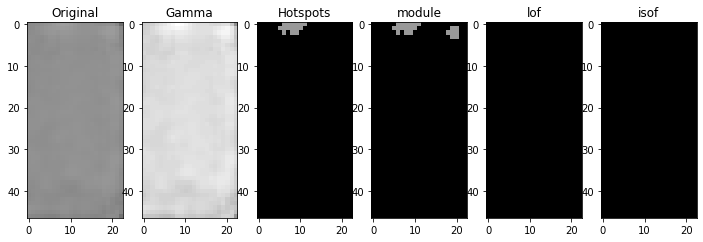

[-1.00463673 -0.9910891  -1.47002525 -1.00200532 -0.97905217 -0.97024
 -0.99675988 -1.13004517]
[-1.81203188]
[-0.46667503 -0.45146691 -0.5036528  -0.45897729 -0.42854666 -0.43333769
 -0.45010637 -0.50772596]
[-0.68481275]
0.0 0
3425.jpg Normal
[-1.00742315 -1.00461641 -0.99552689 -1.00951891 -1.11989124 -0.98896209
 -0.98970663 -1.00725383]
[-1.76462601]
[-0.4469098  -0.45137163 -0.45487578 -0.46182943 -0.49242194 -0.45324966
 -0.46342603 -0.4663687 ]
[-0.6658504]
0.0 0
5054.jpg Normal
[-0.96630884 -0.9924574  -1.2932164  -0.99531838 -0.96167872 -1.08704344
 -0.98005212 -1.01883022]
[-1.78229778]
[-0.42826475 -0.42410671 -0.50907987 -0.45155974 -0.43381104 -0.46541195
 -0.41484008 -0.42276569]
[-0.67291911]
0.0 0
1232.jpg Normal
[-0.95013022 -1.10525243 -0.94484139 -0.94509628 -0.9628642  -0.96570624
 -0.97072556 -1.01138201]
[-1.76462601]
[-0.44276435 -0.46422245 -0.46438458 -0.44742259 -0.43214334 -0.42347127
 -0.42252437 -0.44721978]
[-0.6658504]
0.0 0
1226.jpg Normal
[-1.50387716 

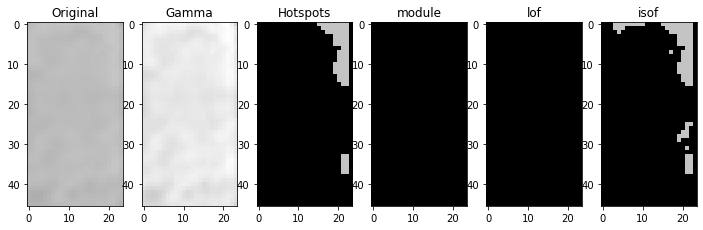

[-1.075669   -1.00817634 -1.06750881 -0.99046658 -1.07080084 -1.19694235
 -1.06750881 -1.10657718]
[-1.76462601]
[-0.49939538 -0.45722811 -0.47444387 -0.43452121 -0.49579717 -0.50708948
 -0.47444387 -0.49550933]
[-0.6658504]
0.0 0
5040.jpg Normal
[-0.97157898 -0.99598056 -1.04763655 -0.97039229 -0.99635599 -0.97997333
 -1.64665021 -0.96922396]
[-1.78229778]
[-0.44535246 -0.44546642 -0.46900107 -0.42152458 -0.44115959 -0.45253021
 -0.55294668 -0.44462532]
[-0.67291911]
0.0 0
2049.jpg Normal
[-1.09476316 -0.98576459 -1.66923847 -1.01122746 -0.99340787 -1.12675784
 -1.00594935 -1.00954605]
[-1.78556933]
[-0.49057525 -0.45926821 -0.55517081 -0.45677916 -0.44324524 -0.48457692
 -0.44551959 -0.46786677]
[-0.67422773]
0.0 0
3357.jpg Normal
[-0.99168148 -0.99168148 -0.99168148 -0.98999421 -0.98601699 -0.99168148
 -0.99168148 -0.98974568]
[-1.78229778]
[-0.46455059 -0.49666359 -0.48138507 -0.42328686 -0.46362091 -0.47365985
 -0.47203562 -0.4839806 ]
[-0.67291911]
0.0 0
4438.jpg Normal
[-0.97936

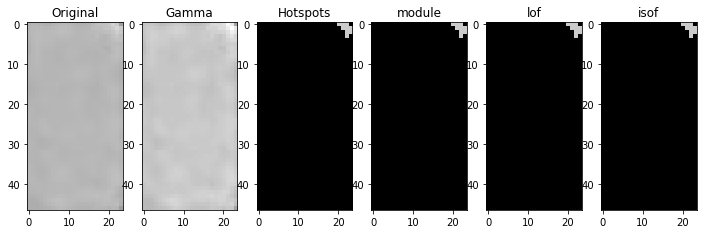

[-1.28401207 -1.16119797 -1.36243062 -1.09695726 -1.01163437 -1.24018658
 -1.22019551 -1.50387716]
[-1.78556933]
[-0.54463798 -0.51719863 -0.55003069 -0.49788404 -0.46150257 -0.55857764
 -0.56936677 -0.59571723]
[-0.67422773]
0.0 0
2288.jpg Normal
[-0.99606082 -1.4481419  -1.10663405 -0.98870533 -1.96106379 -1.13004517
 -1.03139249 -1.22210684]
[-1.81203188]
[-0.43560971 -0.5732443  -0.50558342 -0.47232923 -0.58538848 -0.50772596
 -0.50828115 -0.51664753]
[-0.68481275]
0.0 0
4821.jpg Normal
[-0.99168148 -0.98999421 -0.99168148 -0.9871418  -0.99168148 -0.99613666
 -0.99168148 -0.98682259]
[-1.78229778]
[-0.4791093  -0.40979758 -0.45882012 -0.47291948 -0.47732461 -0.51234824
 -0.46357374 -0.45097583]
[-0.67291911]
0.0 0
3196.jpg Normal
[-1.17632964 -1.04207374 -0.99140079 -0.9858334  -1.31813468 -1.05682336
 -1.10872748 -1.14977592]
[-1.76462601]
[-0.51087174 -0.4789667  -0.45461589 -0.45778584 -0.55771488 -0.46482807
 -0.47804019 -0.48808111]
[-0.6658504]
0.0 0
1959.jpg Normal
[-2.03186

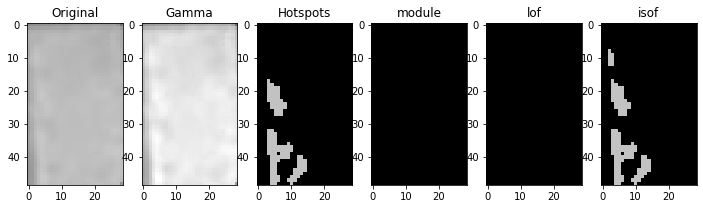

[-0.94710244 -1.13845804 -0.95788615 -0.95655704 -0.94359314 -0.99762711
 -1.01138201 -1.04814479]
[-1.76462601]
[-0.44973206 -0.49478409 -0.43537145 -0.43982546 -0.44188078 -0.45647656
 -0.44721978 -0.44179041]
[-0.6658504]
0.0 0
3141.jpg Normal
[-0.97731988 -1.07942823 -1.010509   -0.986724   -1.10019314 -1.02611586
 -1.26534817 -0.98687889]
[-1.76462601]
[-0.45165023 -0.48705946 -0.46908386 -0.44804662 -0.48287372 -0.47747843
 -0.51877827 -0.44365628]
[-0.6658504]
0.0 0
1756.jpg Normal
[-1.06476263 -1.00934415 -1.04098442 -1.03780981 -1.00392443 -1.07932704
 -1.14378107 -0.97730274]
[-1.78556933]
[-0.49906652 -0.46373971 -0.4888226  -0.47448335 -0.4782893  -0.50602207
 -0.51414158 -0.43318879]
[-0.67422773]
0.0 0
1742.jpg Normal
[-1.03616561 -0.96816555 -1.2932164  -0.98224536 -0.9924574  -3.40126074
 -1.03987918 -0.96167872]
[-1.78229778]
[-0.46679582 -0.42906864 -0.50907987 -0.42695062 -0.42410671 -0.70674258
 -0.44190398 -0.43381104]
[-0.67291911]
0.0 0
3155.jpg Normal
[-1.169111

[-0.46355472 -0.4387315  -0.45444044 -0.44796319 -0.46496325 -0.46041676
 -0.45258449 -0.45369897]
[-0.67291911]
0.0 0
4969.jpg Normal
[-1.50388921 -1.00695573 -1.11877742 -5.29303823 -1.46297001 -1.9675224
 -0.99340787 -1.00991706]
[-1.78556933]
[-0.56105536 -0.4439556  -0.48420412 -0.81299086 -0.54948265 -0.62060009
 -0.44324524 -0.48463121]
[-0.67422773]
1.5 5.414213538169861 0.6430287075658971 1.0
45.5 45.899494767189026 0.2713972548021491 0.9484063346290573
45.5 45.899494767189026 0.2713972548021491 0.9484063346290573
50.0 18
3960.jpg Single-Hotspot


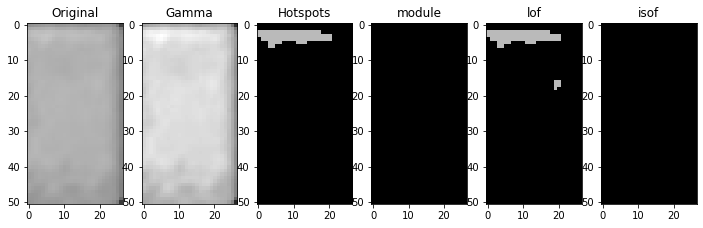

[-0.97905217 -1.00463673 -1.43233856 -1.05942585 -0.97905217 -0.98991931
 -0.97024    -1.00463673]
[-1.81203188]
[-0.42854666 -0.46667503 -0.50494459 -0.45736321 -0.42854666 -0.43774753
 -0.43333769 -0.46667503]
[-0.68481275]
0.0 0
1144.jpg Normal
[-1.52378764 -1.33504728 -1.63291713 -1.44730754 -1.55017551 -1.49739977
 -1.21762151 -1.42360318]
[-1.76462601]
[-0.53502208 -0.51436193 -0.54933523 -0.49983355 -0.54170025 -0.53876668
 -0.49556663 -0.49108304]
[-0.6658504]
0.0 0
3753.jpg Normal
[-1.07530332 -0.9796777  -0.99046658 -1.05267096 -1.2759841  -1.07080084
 -1.07011949 -1.04015618]
[-1.76462601]
[-0.4795705  -0.46509952 -0.43452121 -0.46279097 -0.51851192 -0.49579717
 -0.50040518 -0.47852851]
[-0.6658504]
0.0 0
4982.jpg Normal
[-1.03868259 -1.20020444 -1.09695726 -1.01510529 -1.13126926 -1.06476263
 -0.98099099 -1.39394462]
[-1.78556933]
[-0.48747613 -0.55100969 -0.49788404 -0.46327539 -0.50440843 -0.49906652
 -0.45352664 -0.54834773]
[-0.67422773]
0.0 0
3035.jpg Normal
[-0.996864

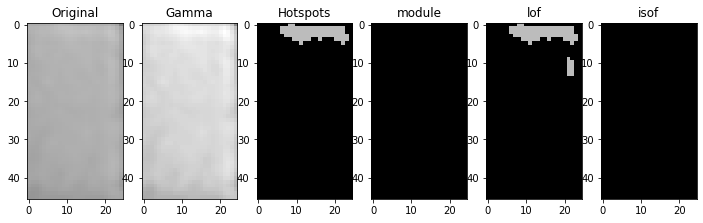

[-1.00068559 -1.12675784 -1.90123292 -1.01553577 -1.00695573 -1.00147853
 -0.97998047 -4.01708715]
[-1.78556933]
[-0.43675065 -0.48457692 -0.58352347 -0.46440967 -0.4439556  -0.44326993
 -0.42607652 -0.76186363]
[-0.67422773]
0.0 0
2854.jpg Normal
[-1.00530507 -0.97410275 -0.97450205 -2.64110246 -0.97473522 -1.15919833
 -0.97005215 -0.97450205]
[-1.76462601]
[-0.45044122 -0.43284898 -0.44345168 -0.67591453 -0.44964975 -0.47233746
 -0.44338692 -0.44345168]
[-0.6658504]
0.0 0
3586.jpg Normal
[-1.03402669 -1.04657012 -1.01510529 -1.07932704 -1.03780981 -1.02355364
 -0.98226169 -1.04657012]
[-1.78556933]
[-0.45577344 -0.49726413 -0.46327539 -0.50602207 -0.47448335 -0.46205173
 -0.4454477  -0.49726413]
[-0.67422773]
0.0 0
2840.jpg Normal
[-1.04039807 -1.48916728 -0.99162604 -0.97727858 -1.00460992 -0.9743225
 -0.99972856 -1.02735432]
[-1.78229778]
[-0.47934675 -0.5667509  -0.46896546 -0.41987043 -0.46041676 -0.45258449
 -0.46673659 -0.46496325]
[-0.67291911]
0.0 0
2698.jpg Normal
[-1.058455

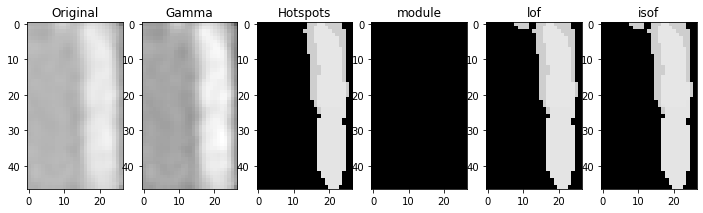

[-0.9834752  -1.05963689 -1.36517948 -0.98387547 -0.99472835 -0.97936621
 -2.25456621 -0.98985985]
[-1.78556933]
[-0.42952223 -0.47428352 -0.48778804 -0.45910527 -0.44939742 -0.46837183
 -0.61418964 -0.44642559]
[-0.67422773]
0.0 0
2129.jpg Normal
[-1.06725419 -1.11345761 -0.97157898 -1.00477705 -1.01691782 -1.04987448
 -1.00077684 -1.04987448]
[-1.78229778]
[-0.47049933 -0.50200386 -0.44535246 -0.50019103 -0.49868365 -0.47000023
 -0.45896935 -0.47000023]
[-0.67291911]
0.0 0
5120.jpg Normal
[-1.17381135 -1.52427983 -1.32579686 -0.99046658 -1.02646261 -1.21159879
 -1.07530332 -2.822362  ]
[-1.76462601]
[-0.53434163 -0.52691847 -0.59173787 -0.43452121 -0.46894729 -0.53010063
 -0.4795705  -0.70392189]
[-0.6658504]
0.0 0
3551.jpg Normal
[-1.24614924 -0.98334184 -1.15356576 -1.10071248 -1.84241241 -1.21133596
 -1.07957225 -1.1124255 ]
[-1.85143439]
[-0.51952241 -0.44290249 -0.51081543 -0.46189086 -0.74356523 -0.53539783
 -0.46811671 -0.51678332]
[-0.70057376]
14.5 16.242640614509583 0.69066

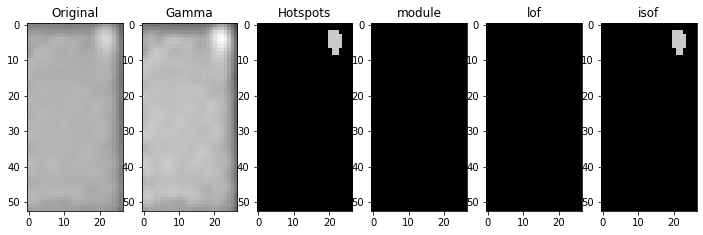

[-1.18525194 -1.52924942 -1.06167393 -1.48674756 -2.12770618 -1.2382046
 -1.01589898 -1.07942823]
[-1.76462601]
[-0.52654171 -0.56868166 -0.46886233 -0.55861288 -0.63826668 -0.50464727
 -0.47181984 -0.48705946]
[-0.6658504]
0.0 0
1346.jpg Normal
[-1.18745699 -0.99056494 -0.97960667 -1.43233856 -1.62921396 -0.97630443
 -0.98389922 -1.09795092]
[-1.81203188]
[-0.48497444 -0.4466603  -0.43952124 -0.50494459 -0.54169326 -0.46539584
 -0.44701219 -0.46803996]
[-0.68481275]
0.0 0
1352.jpg Normal
[-1.15003715 -1.25423397 -1.06798363 -1.27645727 -1.19910412 -0.98051118
 -1.37708897 -1.41937024]
[-1.76462601]
[-0.47709184 -0.48944831 -0.46917906 -0.48634707 -0.49486797 -0.43869697
 -0.51197087 -0.5131848 ]
[-0.6658504]
0.0 0
5134.jpg Normal
[-0.97643863 -1.02032783 -1.06144971 -0.98881264 -1.84289918 -0.9743225
 -1.00460992 -1.004723  ]
[-1.78229778]
[-0.45037607 -0.45569155 -0.48370442 -0.45628694 -0.58556995 -0.45258449
 -0.46041676 -0.44796319]
[-0.67291911]
0.0 0
3545.jpg Normal
[-0.99684942

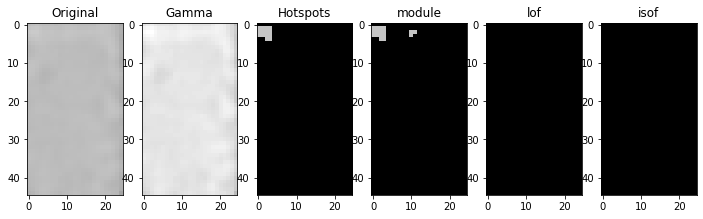

[-2.10334936 -1.42045915 -3.20472883 -2.54823186 -1.10257281 -1.65826195
 -2.39370409 -1.9675224 ]
[-1.78556933]
[-0.64707393 -0.54445608 -0.78012027 -0.72613065 -0.48498545 -0.57543781
 -0.710169   -0.62060009]
[-0.67422773]
0.0 0.0 0 0
0.0 0.0 0 0
1.0 4.828427076339722 0.5390120952601716 1.0
473.0 131.74011421203613 0.34247977816949926 0.8020609862107384
473.0 131.74011421203613 0.34247977816949926 0.8020609862107384
110.0 395
4566.jpg Single-Hotspot


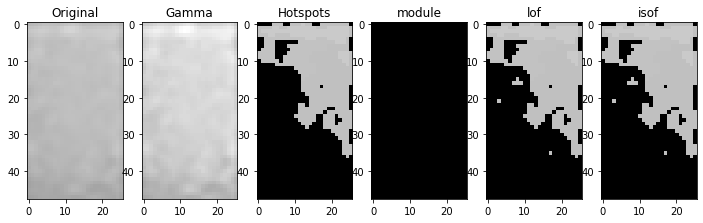

[-1.11800336 -1.22625523 -1.02083992 -1.16196547 -1.45953685 -1.19694235
 -1.09584445 -1.06871391]
[-1.76462601]
[-0.50681605 -0.53113498 -0.44765836 -0.5248836  -0.58900494 -0.50708948
 -0.49766991 -0.47254603]
[-0.6658504]
0.0 0
2103.jpg Normal
[-0.9966329  -0.99497064 -0.98970663 -0.99497458 -1.00709743 -0.98410457
 -1.0103736  -0.99212989]
[-1.76462601]
[-0.45571817 -0.44548099 -0.46342603 -0.44454075 -0.44843884 -0.42374103
 -0.4431056  -0.45726606]
[-0.6658504]
0.0 0
4572.jpg Normal
[-0.99700906 -0.98692978 -1.66929888 -0.97158714 -0.97158714 -1.11265052
 -0.97969043 -1.2945282 ]
[-1.85143439]
[-0.46243557 -0.44806214 -0.56623369 -0.42506854 -0.42506854 -0.46841309
 -0.43028308 -0.50495253]
[-0.70057376]
0.0 0
60.jpg Normal
[-1.00346039 -1.03566652 -1.00346039 -0.98693403 -1.06786431 -1.01969335
 -1.03085419 -1.14645818]
[-1.78229778]
[-0.49458553 -0.45758934 -0.49458553 -0.44775452 -0.49084281 -0.48497743
 -0.4719755  -0.5057652 ]
[-0.67291911]
0.0 0
820.jpg Normal
[-0.98209403 

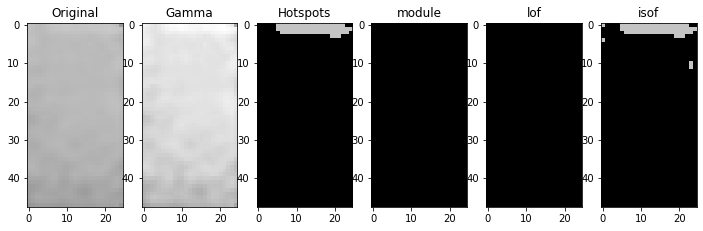

[-0.97896192 -1.54430756 -1.27454787 -0.97039229 -0.98693403 -1.01902874
 -2.15574596 -1.06868656]
[-1.78229778]
[-0.43166053 -0.54393616 -0.50927214 -0.42152458 -0.44775452 -0.43442747
 -0.61092438 -0.47136822]
[-0.67291911]
0.0 0
161.jpg Normal
[-1.00506988 -1.2382046  -1.06167393 -0.99923963 -1.16168794 -1.40782633
 -1.10019314 -1.02611586]
[-1.76462601]
[-0.45734224 -0.50464727 -0.46886233 -0.44116621 -0.51083626 -0.55705328
 -0.48287372 -0.47747843]
[-0.6658504]
0.0 0
1393.jpg Normal
[-1.04406429 -1.75528408 -0.9771325  -1.04406429 -0.96986241 -1.41495844
 -2.5810385  -1.19281113]
[-1.85143439]
[-0.46523373 -0.58714603 -0.45193226 -0.46523373 -0.42474915 -0.53794101
 -0.72711389 -0.50230718]
[-0.70057376]
0.0 0
607.jpg Normal
[-1.39394462 -1.00987773 -1.04098442 -0.99315117 -1.17962679 -1.16119797
 -1.07932704 -0.99401151]
[-1.78556933]
[-0.54834773 -0.47044093 -0.4888226  -0.4411127  -0.5031783  -0.51719863
 -0.50602207 -0.44957711]
[-0.67422773]
0.0 0
2842.jpg Normal
[-1.2932164

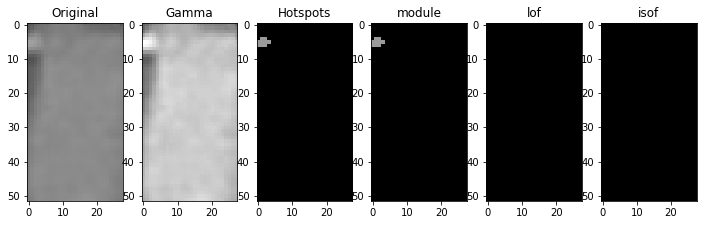

[-0.99675988 -1.00151673 -0.98118281 -0.9910891  -2.11432438 -0.98830801
 -1.00717865 -0.99607896]
[-1.81203188]
[-0.45010637 -0.4703199  -0.44182836 -0.45146691 -0.61210807 -0.45432549
 -0.47006426 -0.45519812]
[-0.68481275]
0.0 0
4770.jpg Normal
[-1.0021879  -1.00352651 -1.00594935 -1.06918362 -1.00068559 -0.97744902
 -0.99559503 -0.98913949]
[-1.78556933]
[-0.47110429 -0.44525678 -0.44551959 -0.47430295 -0.43675065 -0.45190831
 -0.42598528 -0.43370963]
[-0.67422773]
0.0 0
2301.jpg Normal
[-1.10075081 -0.98357977 -1.2059961  -1.53520433 -1.29241234 -1.98687126
 -1.04814479 -1.02623026]
[-1.76462601]
[-0.48329671 -0.42233948 -0.50507052 -0.6016383  -0.52328953 -0.6538356
 -0.44179041 -0.44074045]
[-0.6658504]
0.0 0
1620.jpg Normal
[-1.03388475 -1.0237252  -0.99710709 -1.0334089  -2.32805369 -1.02376768
 -1.01835318 -1.00193871]
[-1.79270085]
[-0.46351511 -0.46520912 -0.44207936 -0.46527625 -0.65133977 -0.46221432
 -0.46182867 -0.44963332]
[-0.67708034]
0.0 0
4758.jpg Normal
[-0.972742

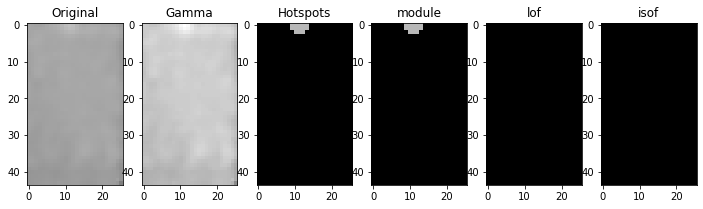

[-1.10657718 -1.07736666 -1.21159879 -1.24274372 -1.15277592 -1.56600763
 -1.37587302 -1.17381135]
[-1.76462601]
[-0.49550933 -0.48957971 -0.53010063 -0.53657563 -0.5117843  -0.52262139
 -0.57760574 -0.53434163]
[-0.6658504]
0.0 0
1634.jpg Normal
[-1.02432428 -0.99497064 -0.99385538 -0.99385538 -1.14977592 -1.05682336
 -0.99420116 -1.11989124]
[-1.76462601]
[-0.47429991 -0.44548099 -0.44862133 -0.44862133 -0.48808111 -0.46482807
 -0.45365746 -0.49242194]
[-0.6658504]
0.0 0
1807.jpg Normal
[-0.98118281 -1.00151673 -1.18745699 -0.98991931 -1.22210684 -0.98991931
 -1.06781516 -1.00713908]
[-1.81203188]
[-0.44182836 -0.4703199  -0.48497444 -0.43774753 -0.51664753 -0.43774753
 -0.46696778 -0.47076618]
[-0.68481275]
0.0 0
3976.jpg Normal
[-0.97730274 -1.16719989 -2.34827094 -0.98892657 -1.00000329 -1.62578965
 -3.44663408 -1.18824511]
[-1.78556933]
[-0.43318879 -0.51023333 -0.623258   -0.44942784 -0.4655871  -0.58271819
 -0.69959507 -0.51527595]
[-0.67422773]
0.0 0
439.jpg Normal
[-1.0108736

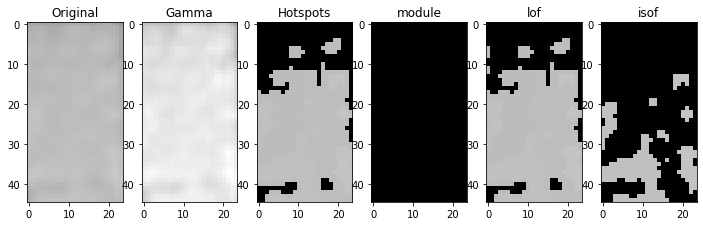

[-1.27168852 -0.99762711 -0.95300968 -0.97072556 -1.16712034 -0.94798841
 -1.02717327 -1.63291713]
[-1.76462601]
[-0.50254227 -0.45647656 -0.44811687 -0.42252437 -0.48661892 -0.44305023
 -0.4663345  -0.54933523]
[-0.6658504]
12.0 13.656854152679443 0.8085181381420814 0.9869555956409838
12.0 13.656854152679443 0.8085181381420814 0.9869555956409838
3.0 16
4943.jpg Single-Hotspot


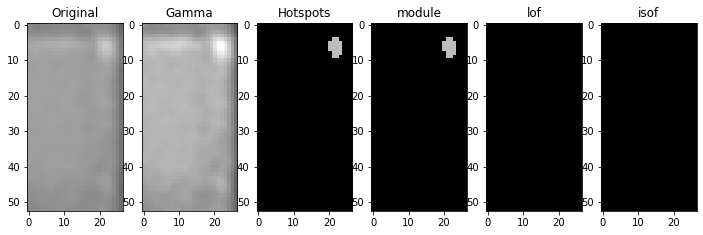

[-1.01241578 -0.99829983 -1.09716337 -0.97349214 -3.31544419 -0.97092786
 -1.01195073 -0.9936534 ]
[-1.79270085]
[-0.45641477 -0.44947001 -0.47217982 -0.44380363 -0.74599158 -0.4386617
 -0.45732799 -0.45534955]
[-0.67708034]
0.0 0
377.jpg Normal
[-0.97744902 -1.00345383 -1.00352651 -1.3827634  -0.99559503 -0.98360075
 -0.99660036 -0.99101085]
[-1.78556933]
[-0.45190831 -0.45651922 -0.44525678 -0.53686371 -0.42598528 -0.43726592
 -0.46000351 -0.44923001]
[-0.67422773]
0.0 0
1185.jpg Normal
[-1.14358605 -0.9865315  -2.90909199 -0.99179586 -1.26782935 -0.98892657
 -0.99472835 -1.92897095]
[-1.78556933]
[-0.50513437 -0.45971393 -0.66510879 -0.4314495  -0.51360191 -0.44942784
 -0.44939742 -0.5740018 ]
[-0.67422773]
0.0 0
411.jpg Normal
[-1.09962956 -1.04813709 -1.13261652 -1.26039033 -1.18696899 -1.04035396
 -1.09161469 -1.17312503]
[-1.84544637]
[-0.51310413 -0.51515131 -0.50930232 -0.53699824 -0.54086412 -0.45916672
 -0.52128641 -0.5122194 ]
[-0.69817855]
0.0 0
3792.jpg Normal
[-1.4714447

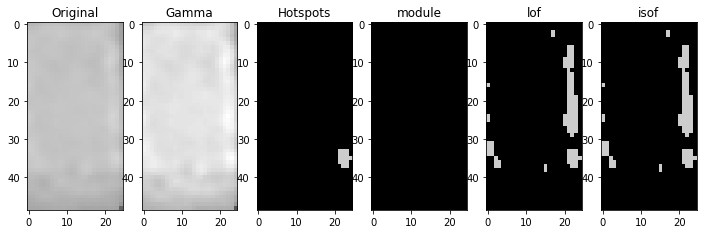

[-1.09276844 -1.00536866 -1.01577896 -0.99105644 -0.99237109 -1.04726044
 -1.21497072 -1.11497679]
[-1.79270085]
[-0.52817947 -0.4888119  -0.46428486 -0.47355503 -0.48244923 -0.50104222
 -0.54267887 -0.52262325]
[-0.67708034]
0.0 0
4176.jpg Normal
[-0.98551644 -0.9811138  -0.98551644 -0.97898378 -0.98551644 -0.97985165
 -1.26481267 -0.97621849]
[-1.79270085]
[-0.42929405 -0.43984244 -0.44789769 -0.4415752  -0.43647461 -0.43449869
 -0.63637913 -0.43860204]
[-0.67708034]
0.0 0
3619.jpg Normal
[-1.07141385 -0.98692978 -1.09685683 -1.2419734  -1.06352604 -0.96986241
 -0.9771325  -1.0595638 ]
[-1.85143439]
[-0.46231515 -0.44806214 -0.46905277 -0.51260112 -0.47392527 -0.42474915
 -0.45193226 -0.46552358]
[-0.70057376]
0.0 0
2507.jpg Normal
[-1.01589898 -0.99497064 -0.97757272 -1.05180829 -0.99923963 -0.98583323
 -1.3715401  -0.98226369]
[-1.76462601]
[-0.47181984 -0.44548099 -0.45124405 -0.45915963 -0.44116621 -0.43051356
 -0.55447756 -0.43505622]
[-0.6658504]
0.0 0
4162.jpg Normal
[-1.01902

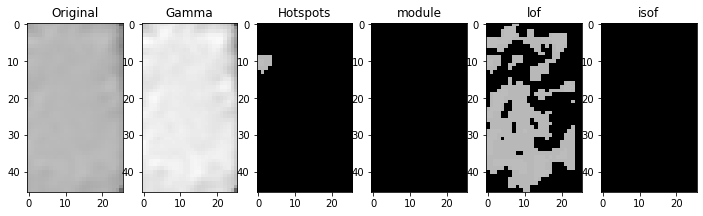

[-0.98373146 -1.01248293 -1.21497072 -1.00341638 -1.0017475  -0.9946482
 -1.00341638 -1.02257315]
[-1.79270085]
[-0.47728945 -0.47480081 -0.54267887 -0.46269394 -0.49721232 -0.50479658
 -0.46269394 -0.45928956]
[-0.67708034]
0.0 0
3143.jpg Normal
[-1.04872018 -0.97747292 -1.01780402 -1.07720721 -0.98609386 -0.98551644
 -1.0250914  -0.99174612]
[-1.79270085]
[-0.49972393 -0.45599102 -0.49880745 -0.58523564 -0.47244007 -0.44782538
 -0.51063466 -0.43985801]
[-0.67708034]
0.0 0
3625.jpg Normal
[-0.99635599 -1.64665021 -0.99635599 -0.96417536 -0.97157898 -0.97284058
 -1.12901365 -1.20289848]
[-1.78229778]
[-0.44115959 -0.55294668 -0.44115959 -0.42530119 -0.44535246 -0.44035228
 -0.46797927 -0.46876964]
[-0.67291911]
0.0 0
1032.jpg Normal
[-0.98005212 -1.21159422 -1.01173524 -0.96630884 -1.66634111 -0.98005212
 -1.02058503 -0.96630884]
[-1.78229778]
[-0.41484008 -0.49785213 -0.4445804  -0.42826475 -0.56233174 -0.41484008
 -0.46163947 -0.42826475]
[-0.67291911]
0.0 0
1026.jpg Normal
[-0.99569

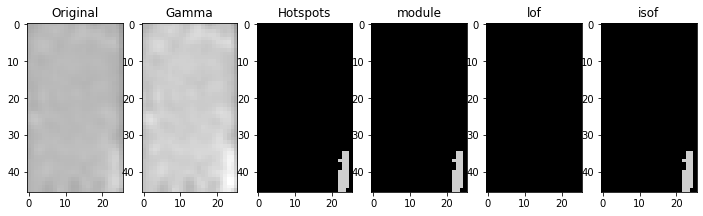

[-0.98373146 -1.15697795 -1.00341638 -1.03214525 -1.51190288 -1.02203366
 -1.00536866 -1.06799636]
[-1.79270085]
[-0.47728945 -0.51306286 -0.46269394 -0.50388971 -0.61669904 -0.47640009
 -0.4888119  -0.51878949]
[-0.67708034]
0.0 0
3157.jpg Normal
[-1.00780883 -1.06962305 -1.01798433 -1.00352651 -0.97998047 -1.00353299
 -1.02343952 -1.14555357]
[-1.78556933]
[-0.46340884 -0.47804259 -0.44152156 -0.44525678 -0.42607652 -0.45755548
 -0.46317858 -0.46164604]
[-0.67422773]
0.0 0
4638.jpg Normal
[-1.01510529 -1.33531393 -1.06476263 -1.17962679 -0.99384796 -1.26165846
 -1.09695726 -1.58742589]
[-1.78556933]
[-0.46327539 -0.56456832 -0.49906652 -0.5031783  -0.45037402 -0.55323131
 -0.49788404 -0.64967757]
[-0.67422773]
0.0 0
1998.jpg Normal
[-1.10258368 -1.64989377 -1.2034963  -1.83355542 -2.52706001 -1.48098546
 -1.2034963  -1.33781961]
[-1.76462601]
[-0.44948806 -0.53981299 -0.48154999 -0.63513357 -0.64821089 -0.52457672
 -0.48154999 -0.5361439 ]
[-0.6658504]
0.0 0
1740.jpg Normal
[-0.97194

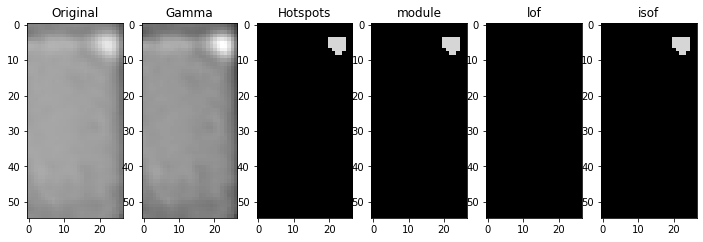

[-0.96538998 -1.09236274 -1.03019364 -1.20289848 -0.98693403 -1.04763655
 -1.39875731 -0.99635599]
[-1.78229778]
[-0.44169921 -0.478374   -0.47014816 -0.46876964 -0.44775452 -0.46900107
 -0.52066399 -0.44115959]
[-0.67291911]
0.0 0
940.jpg Normal
[-0.99559503 -1.01553577 -0.97998047 -1.00594935 -0.9993923  -1.29543694
 -1.00068559 -0.98913949]
[-1.78556933]
[-0.42598528 -0.46440967 -0.42607652 -0.44551959 -0.45461759 -0.51427016
 -0.43675065 -0.43370963]
[-0.67422773]
0.0 0
798.jpg Normal
[-0.99630175 -0.97410275 -1.02083992 -0.97473522 -1.06297202 -0.99046658
 -0.9699284  -0.9699284 ]
[-1.76462601]
[-0.44354724 -0.43355058 -0.44765836 -0.44964975 -0.46885435 -0.43452121
 -0.42540956 -0.42540956]
[-0.6658504]
0.0 0
4412.jpg Normal
[-1.03402669 -1.30819723 -0.97730274 -1.05316183 -1.13126926 -0.98226169
 -0.99315117 -1.13126926]
[-1.78556933]
[-0.45577344 -0.5527506  -0.43318879 -0.48522829 -0.50440843 -0.4454477
 -0.4411127  -0.50440843]
[-0.67422773]
0.0 0
2063.jpg Normal
[-1.02056407

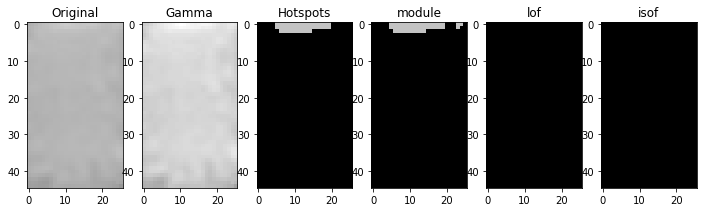

[-1.16615396 -1.3435568  -2.0700619  -1.21367356 -1.55835793 -1.28777227
 -1.10810949 -1.55835793]
[-1.84544637]
[-0.50878054 -0.53867113 -0.59851895 -0.53349254 -0.55902353 -0.53746272
 -0.47776402 -0.55902353]
[-0.69817855]
0.0 0
767.jpg Normal
[-1.04872018 -0.99115251 -0.9811138  -1.10746088 -1.04010782 -0.99174612
 -1.01139996 -0.98551644]
[-1.79270085]
[-0.49972393 -0.49003472 -0.43984244 -0.63868458 -0.49710032 -0.48156795
 -0.48117053 -0.45476115]
[-0.67708034]
0.0 0
1595.jpg Normal
[-1.04635508 -0.99340787 -1.33602783 -1.00780883 -0.98576459 -1.02343952
 -1.10257281 -1.01798433]
[-1.78556933]
[-0.47175802 -0.44324524 -0.51873331 -0.46340884 -0.45926821 -0.46317858
 -0.48498545 -0.44152156]
[-0.67422773]
0.0 0
3382.jpg Normal
[-1.45953685 -1.16196547 -1.37587302 -1.08514865 -1.35022426 -1.26045358
 -1.24274372 -1.58839136]
[-1.76462601]
[-0.58900494 -0.5248836  -0.57760574 -0.48758961 -0.58910953 -0.55223568
 -0.53657563 -0.69771792]
[-0.6658504]
3.0 6.828427076339722 0.80851813

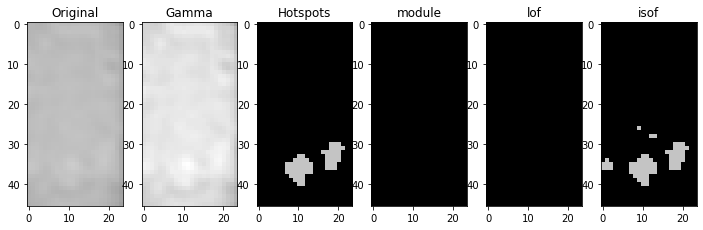

[-0.98345368 -0.98985985 -0.99472835 -0.9834752  -1.00934415 -0.99179586
 -1.03868259 -0.99315117]
[-1.78556933]
[-0.44914518 -0.44642559 -0.44939742 -0.42952223 -0.46373971 -0.4314495
 -0.48747613 -0.4411127 ]
[-0.67422773]
0.0 0
3396.jpg Normal
[-1.02058503 -0.98281445 -1.11361776 -1.01173524 -0.98224536 -2.93578395
 -0.98224536 -0.96816555]
[-1.78229778]
[-0.46163947 -0.43073691 -0.46229159 -0.4445804  -0.42695062 -0.65426363
 -0.42695062 -0.42906864]
[-0.67291911]
0.0 0
1581.jpg Normal
[-0.97041291 -1.19281113 -1.0595638  -0.9771325  -1.51439682 -0.96986241
 -1.00203335 -0.97837766]
[-1.85143439]
[-0.43011386 -0.50230718 -0.46552358 -0.45193226 -0.53899497 -0.42474915
 -0.46552176 -0.44623247]
[-0.70057376]
0.0 0
773.jpg Normal
[-1.43818047 -1.20537992 -1.37549948 -1.09626291 -1.34562896 -1.16911181
 -1.23172292 -1.61925888]
[-1.78229778]
[-0.56209781 -0.52217636 -0.55407273 -0.49119612 -0.55394084 -0.52236245
 -0.52774868 -0.58821724]
[-0.67291911]
0.0 0
2936.jpg Normal
[-1.034748

[-0.46963736 -0.41916491 -0.45324966 -0.4562902  -0.45137163 -0.45137163
 -0.46182943 -0.44454075]
[-0.6658504]
0.0 0
4361.jpg Normal
[-1.09405364 -1.01970416 -0.97041291 -1.06352604 -1.2182801  -0.96986241
 -1.03633406 -0.97837766]
[-1.85143439]
[-0.4816387  -0.47018076 -0.43011386 -0.47392527 -0.51164635 -0.42474915
 -0.46145432 -0.44623247]
[-0.70057376]
0.0 0
2710.jpg Normal
[-0.97484255 -1.00169423 -0.99232036 -1.03857126 -0.9832416  -0.97484255
 -0.97490354 -1.88723592]
[-1.84544637]
[-0.43326464 -0.44939973 -0.44689298 -0.4712352  -0.44260126 -0.43326464
 -0.44654687 -0.59835457]
[-0.69817855]
0.0 0
1219.jpg Normal
[-0.98693403 -1.12901365 -1.89250964 -1.30857539 -2.65697395 -0.98693403
 -1.39875731 -1.12901365]
[-1.78229778]
[-0.44775452 -0.46797927 -0.58879389 -0.51176767 -0.67248014 -0.44775452
 -0.52066399 -0.46797927]
[-0.67291911]
0.0 0
955.jpg Normal
[-0.99557514 -1.01835318 -0.99105644 -0.99237109 -1.01148963 -1.00341638
 -0.9946482  -1.04246353]
[-1.79270085]
[-0.474036

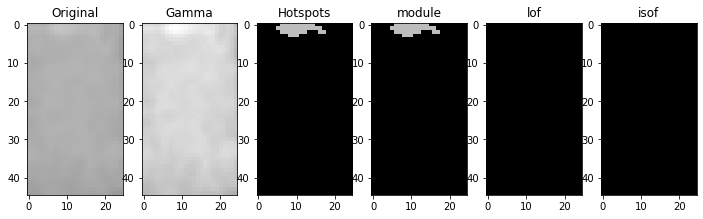

[-1.04098442 -1.01163437 -1.05963689 -1.01510529 -1.01163437 -1.11603263
 -1.03780981 -0.9834752 ]
[-1.78556933]
[-0.4888226  -0.46150257 -0.47428352 -0.46327539 -0.46150257 -0.51607234
 -0.47448335 -0.42952223]
[-0.67422773]
0.0 0
3181.jpg Normal
[-1.19603239 -1.07141385 -1.32425214 -1.09611346 -1.10085622 -1.13084232
 -1.24614924 -1.52708653]
[-1.85143439]
[-0.5125404  -0.46231515 -0.55421455 -0.50786634 -0.5120843  -0.5318387
 -0.51952241 -0.60210428]
[-0.70057376]
0.0 0
4188.jpg Normal
[-0.96417536 -1.9563245  -1.012947   -0.96922396 -1.30857539 -1.03569356
 -0.97157898 -1.00716947]
[-1.78229778]
[-0.42530119 -0.59223919 -0.46398841 -0.44462532 -0.51176767 -0.47826402
 -0.44535246 -0.44260848]
[-0.67291911]
0.0 0
564.jpg Normal
[-0.99559503 -1.66923847 -1.02888539 -0.99660036 -1.00352651 -1.00594935
 -1.18766591 -1.29543694]
[-1.78556933]
[-0.42598528 -0.55517081 -0.46750397 -0.46000351 -0.44525678 -0.44551959
 -0.49796718 -0.51427016]
[-0.67422773]
0.0 0
3817.jpg Normal
[-1.092402

[-0.99472835 -1.12206337 -1.02388871 -0.97936621 -1.16719989 -0.99179586
 -0.99384836 -1.33332638]
[-1.78556933]
[-0.44939742 -0.48185539 -0.46618601 -0.46837183 -0.51023333 -0.4314495
 -0.45599714 -0.49703405]
[-0.67422773]
0.0 0
362.jpg Normal
[-0.98671449 -0.98439767 -0.99174363 -0.98443855 -1.00179189 -0.98439767
 -0.98443855 -1.50957774]
[-1.84544637]
[-0.41411566 -0.45129673 -0.42295076 -0.40512369 -0.50700905 -0.4257011
 -0.40512369 -0.73714612]
[-0.69817855]
0.0 0
376.jpg Normal
[-1.01351411 -1.03673271 -1.00460992 -1.01351411 -1.05138792 -1.06144971
 -0.9743225  -0.98142666]
[-1.78229778]
[-0.47272372 -0.44534584 -0.46041676 -0.47272372 -0.45051683 -0.48370442
 -0.45258449 -0.46355472]
[-0.67291911]
0.0 0
4942.jpg Normal
[-0.97623298 -1.03857126 -1.00169423 -1.12566223 -1.01108094 -1.03234317
 -1.37338917 -0.96671397]
[-1.84544637]
[-0.43869179 -0.4712352  -0.44939973 -0.49366541 -0.45000922 -0.47445691
 -0.54840514 -0.44716589]
[-0.69817855]
0.0 0
3793.jpg Normal
[-0.98048068

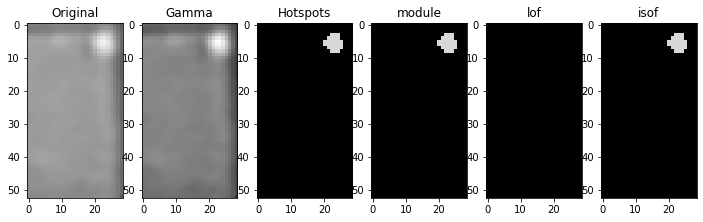

[-1.11297838 -0.98224536 -0.97632819 -1.19218461 -1.02874407 -1.37722672
 -1.05138792 -1.25410641]
[-1.78229778]
[-0.4891402  -0.42695062 -0.46625    -0.50579177 -0.47597588 -0.56403957
 -0.45051683 -0.50779105]
[-0.67291911]
0.0 0
4003.jpg Normal
[-1.07044893 -0.99302549 -1.84318707 -0.97092786 -1.29351459 -0.97371182
 -0.9693702  -1.02794343]
[-1.79270085]
[-0.45537966 -0.44030294 -0.58778844 -0.4386617  -0.51422559 -0.44195047
 -0.43682704 -0.45318739]
[-0.67708034]
0.0 0
2472.jpg Normal
[-0.98742787 -0.9967983  -0.99978444 -1.00488401 -0.97001811 -1.00072278
 -0.97819456 -1.00985367]
[-1.73581688]
[-0.44288384 -0.44829399 -0.47188794 -0.447957   -0.45019006 -0.44665879
 -0.44396071 -0.46126243]
[-0.65432675]
0.0 0
160.jpg Normal
[-0.98024133 -0.99472835 -1.00934415 -1.03948117 -0.97730274 -1.03402669
 -0.99179586 -0.99259027]
[-1.78556933]
[-0.46196254 -0.44939742 -0.46373971 -0.46394064 -0.43318879 -0.45577344
 -0.4314495  -0.4532829 ]
[-0.67422773]
0.0 0
3585.jpg Normal
[-0.99198

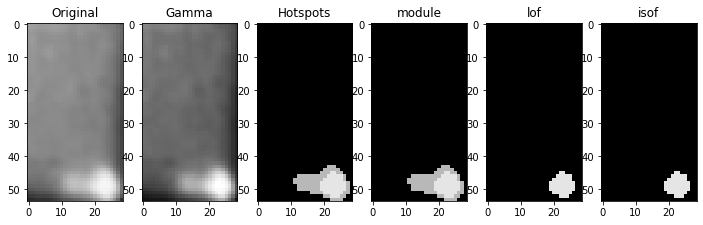

[-0.96671397 -1.55835793 -1.00730193 -2.27205512 -0.97194479 -1.01280718
 -1.16615396 -1.04646831]
[-1.84544637]
[-0.44716589 -0.55902353 -0.4453831  -0.64717655 -0.44745156 -0.46154631
 -0.50878054 -0.48273796]
[-0.69817855]
0.0 0
612.jpg Normal
[-1.24614924 -1.4699665  -1.15356576 -1.937632   -1.39244646 -1.39244646
 -1.59236656 -1.32425214]
[-1.85143439]
[-0.51952241 -0.59608041 -0.51081543 -0.6105902  -0.55956859 -0.55956859
 -0.65572274 -0.55421455]
[-0.70057376]
0.0 0
3591.jpg Normal
[-1.00776668 -0.95579938 -0.98861183 -1.00193871 -1.00326637 -0.98373146
 -1.0237252  -1.11497679]
[-1.79270085]
[-0.48031083 -0.44013098 -0.50019627 -0.44963332 -0.47798586 -0.47728945
 -0.46520912 -0.52262325]
[-0.67708034]
0.0 0
2857.jpg Normal
[-1.00488401 -1.03039137 -0.97819456 -1.00985367 -1.0288077  -1.26770061
 -1.01386627 -1.09068809]
[-1.73581688]
[-0.447957   -0.47127337 -0.44396071 -0.46126243 -0.47611398 -0.51708567
 -0.46793984 -0.48881787]
[-0.65432675]
0.0 0
4598.jpg Normal
[-3.06528

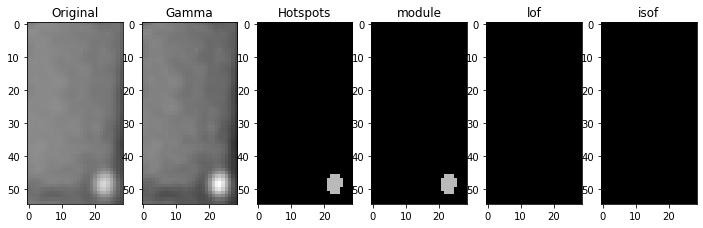

[-0.97158714 -1.04406429 -1.48070755 -0.9771325  -1.11265052 -1.38394628
 -1.07898971 -1.17546788]
[-1.85143439]
[-0.42506854 -0.46523373 -0.54573608 -0.45193226 -0.46841309 -0.53117725
 -0.48189401 -0.48997385]
[-0.70057376]
0.0 0
2664.jpg Normal
[-1.02203366 -0.99705075 -1.01241578 -1.02257315 -1.3957568  -2.51801038
 -1.01248293 -0.99105644]
[-1.79270085]
[-0.47640009 -0.45729871 -0.45641477 -0.45928956 -0.51818999 -0.67253644
 -0.47480081 -0.47355503]
[-0.67708034]
0.0 0
4215.jpg Normal
[-0.99008418 -1.01224637 -0.98742787 -0.99528147 -1.00488401 -0.98384034
 -2.61170175 -1.00389922]
[-1.73581688]
[-0.46126441 -0.46033807 -0.44288384 -0.45414879 -0.447957   -0.45108607
 -0.68926982 -0.45995436]
[-0.65432675]
0.0 0
821.jpg Normal
[-0.97194479 -1.01808938 -0.97484255 -1.01808938 -1.14320264 -0.99232036
 -1.01399782 -0.97243092]
[-1.84544637]
[-0.44745156 -0.46054168 -0.43326464 -0.46054168 -0.49989159 -0.44689298
 -0.45174623 -0.4425201 ]
[-0.69817855]
0.0 0
61.jpg Normal
[-1.0190027

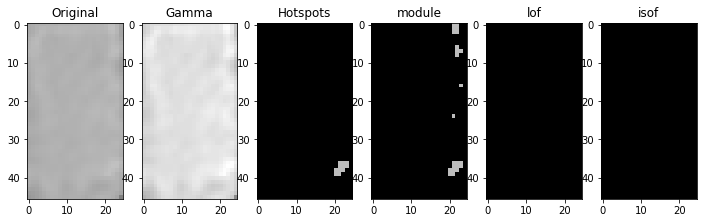

[-0.99105644 -1.01582448 -1.0237252  -0.99056267 -2.26820432 -0.99684942
 -0.97114821 -0.99105644]
[-1.79270085]
[-0.47355503 -0.48230338 -0.46520912 -0.50538509 -0.64657509 -0.4716516
 -0.45693626 -0.47355503]
[-0.67708034]
0.0 0
5127.jpg Normal
[-1.01224637 -0.99292462 -1.23213851 -0.99020492 -1.05166603 -0.98742787
 -1.64041401 -1.0004336 ]
[-1.73581688]
[-0.46033807 -0.46793517 -0.51154556 -0.45123686 -0.48423001 -0.44288384
 -0.59094093 -0.45429008]
[-0.65432675]
0.0 0
2648.jpg Normal
[-0.99564626 -0.96932713 -1.31625863 -1.13307601 -0.99564626 -0.97994655
 -1.40101896 -1.05474856]
[-1.84544637]
[-0.42940351 -0.43359498 -0.49580567 -0.50118148 -0.42940351 -0.43232707
 -0.50932396 -0.4412148 ]
[-0.69817855]
0.0 0
3542.jpg Normal
[-1.14510403 -1.04863486 -1.26039033 -1.17312503 -1.07127571 -1.10445848
 -1.09440275 -1.12163983]
[-1.84544637]
[-0.53772607 -0.50701958 -0.53699824 -0.5122194  -0.49008536 -0.5120674
 -0.51812118 -0.50384849]
[-0.69817855]
0.0 0
2884.jpg Normal
[-0.993855

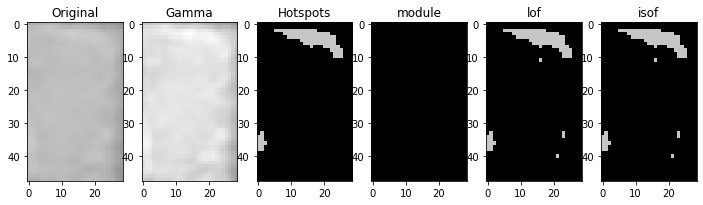

[-1.01285475 -1.05482533 -0.97994655 -1.02152822 -1.03494675 -1.16261865
 -1.04019809 -1.02001643]
[-1.84544637]
[-0.45701041 -0.50214088 -0.43232707 -0.48728838 -0.44433476 -0.54319041
 -0.48678572 -0.4593143 ]
[-0.69817855]
0.0 0
2853.jpg Normal
[-1.00389922 -1.00126893 -0.99156203 -1.33594688 -1.00072278 -0.98384034
 -0.99528147 -1.01203479]
[-1.73581688]
[-0.45995436 -0.46860824 -0.44749581 -0.52874913 -0.44665879 -0.45108607
 -0.45414879 -0.47333808]
[-0.65432675]
0.0 0
616.jpg Normal
[-1.0279705  -1.23926306 -0.97490354 -1.02910255 -0.9832416  -0.9832416
 -0.97490354 -1.02910255]
[-1.84544637]
[-0.47671052 -0.51949891 -0.44654687 -0.47438507 -0.44260126 -0.44260126
 -0.44654687 -0.47438507]
[-0.69817855]
0.0 0
1382.jpg Normal
[-1.05180829 -1.66564702 -1.11989124 -1.21190705 -2.82037545 -1.76262793
 -0.99923963 -1.01589898]
[-1.76462601]
[-0.45915963 -0.58936405 -0.49242194 -0.52375309 -0.70648709 -0.59130621
 -0.44116621 -0.47181984]
[-0.6658504]
0.0 0
1396.jpg Normal
[-1.0526987

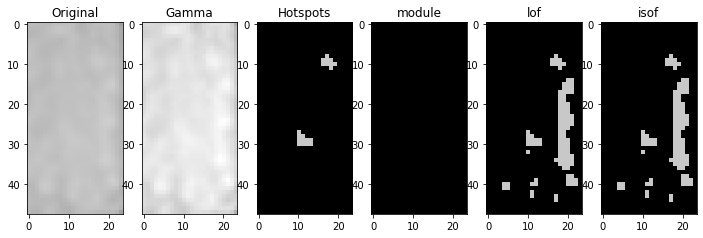

[-0.97114821 -1.04246353 -0.97349214 -0.9936534  -1.0060856  -0.99710709
 -1.01165456 -0.9693702 ]
[-1.79270085]
[-0.45693626 -0.44966128 -0.44380363 -0.45534955 -0.44357641 -0.44207936
 -0.46512872 -0.43682704]
[-0.67708034]
0.0 0
3032.jpg Normal
[-0.99153927 -0.9990099  -0.98474502 -0.99807882 -1.0364352  -1.00668352
 -1.00450591 -1.00668352]
[-1.69100393]
[-0.47641844 -0.44607937 -0.47372908 -0.45558042 -0.50087742 -0.45780829
 -0.48651429 -0.45780829]
[-0.63640157]
1.0 4.0 0.7853981633974483 1.0
13.0 14.828427076339722 0.7429559153356595 0.987986215468267
13.0 14.828427076339722 0.7429559153356595 0.987986215468267
21.0 0
4985.jpg Junction-Box-Error


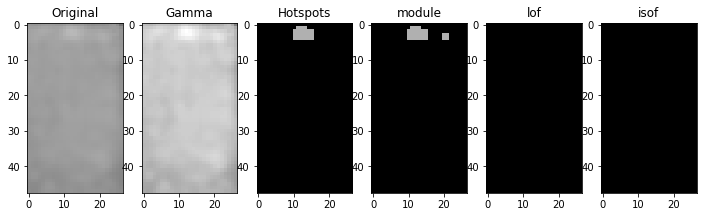

[-1.19075526 -1.01363434 -0.99564626 -1.10634556 -0.97742854 -0.99864523
 -1.35794556 -1.31625863]
[-1.84544637]
[-0.48180626 -0.43817103 -0.42940351 -0.49513602 -0.44452747 -0.44421049
 -0.5099076  -0.49580567]
[-0.69817855]
0.0 0
3026.jpg Normal
[-1.09227022 -1.26600762 -1.02815299 -2.24376897 -1.10301029 -0.97837766
 -1.07845318 -1.07957225]
[-1.85143439]
[-0.49395343 -0.51842963 -0.44985664 -0.67344586 -0.52357366 -0.44623247
 -0.47579482 -0.46811671]
[-0.70057376]
0.0 0
4749.jpg Normal
[-1.00179189 -0.98671449 -1.11800159 -1.43608544 -1.00179189 -0.98671449
 -0.99174363 -0.99174363]
[-1.84544637]
[-0.51808674 -0.40835281 -0.56704948 -0.70743058 -0.49468946 -0.41411566
 -0.47642294 -0.43774363]
[-0.69817855]
0.0 0
2338.jpg Normal
[-0.99773611 -0.97757272 -0.9966329  -1.01589898 -0.98679088 -1.00365491
 -0.98679088 -0.98970663]
[-1.76462601]
[-0.45895773 -0.45124405 -0.45571817 -0.47181984 -0.41916491 -0.45380772
 -0.41916491 -0.46342603]
[-0.6658504]
0.0 0
4991.jpg Normal
[-1.36795

[-0.66246398 -0.56480935 -0.60899882 -0.52276099 -0.50214088 -0.71510122
 -0.61074372 -0.55519446]
[-0.69817855]
0.0 2.0 0.0 1.0
4.0 8.828427076339722 0.6449160528303446 0.9798213740342159
0.0 2.0 0.0 1.0
10.5 21.071067690849304 0.297184447986625 0.9138429296182548
3.0 6.828427076339722 0.8085181381420814 1.0
18.5 41.899494767189026 0.13242318221701205 0.8831911244671888
4.0 8.828427076339722 0.6449160528303446 0.9798213740342159
10.5 21.071067690849304 0.297184447986625 0.9138429296182548
0.0 2.0 0.0 1.0
0.0 0.0 0 0
9.0 21
3967.jpg Multi-Hotspots


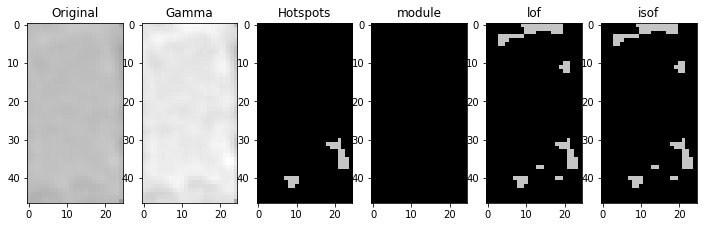

[-1.00050135 -1.00845557 -1.1398719  -1.02874407 -1.01821105 -3.04668614
 -0.97632819 -1.05055114]
[-1.78229778]
[-0.4703394  -0.45784367 -0.49725639 -0.47597588 -0.45369897 -0.66051678
 -0.46625    -0.47842618]
[-0.67291911]
0.0 0
3620.jpg Normal
[-0.97969043 -1.04406429 -0.96870602 -1.02892715 -1.16037491 -1.03620998
 -0.97041291 -0.97837766]
[-1.85143439]
[-0.43028308 -0.46523373 -0.44933135 -0.44369433 -0.48462889 -0.45788504
 -0.43011386 -0.44623247]
[-0.70057376]
0.0 0
1037.jpg Normal
[-1.05260017 -1.4329441  -1.24618927 -1.19972082 -1.54819057 -1.8231159
 -0.98118501 -1.36213   ]
[-1.85143439]
[-0.52215162 -0.57453223 -0.54638522 -0.53816019 -0.61483061 -0.71328754
 -0.49079351 -0.60516606]
[-0.70057376]
72.0 62.97056245803833 0.2281745567306683 0.942302068212154
0.0 0
1989.jpg Normal
[-0.9946482  -1.11497679 -1.66017907 -0.98373146 -1.01827234 -1.11497679
 -1.01582448 -1.27620374]
[-1.79270085]
[-0.50479658 -0.52262325 -0.65218519 -0.47728945 -0.50726244 -0.52262325
 -0.4823033

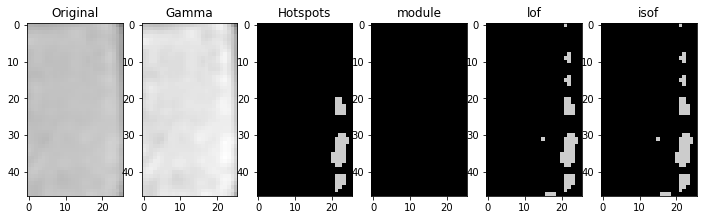

[-1.00279574 -0.98742787 -0.99528147 -1.00565037 -0.98384034 -0.99008418
 -1.17039456 -1.0340159 ]
[-1.73581688]
[-0.46128566 -0.44288384 -0.45414879 -0.46724833 -0.45108607 -0.46126441
 -0.50768518 -0.48254073]
[-0.65432675]
0.0 0
4615.jpg Normal
[-1.17312503 -0.99130316 -1.26039033 -1.05894793 -1.04081959 -1.32358871
 -1.08625876 -1.65746695]
[-1.84544637]
[-0.5122194  -0.44898783 -0.53699824 -0.47826272 -0.48765193 -0.58679091
 -0.51662863 -0.68729974]
[-0.69817855]
0.0 0
1779.jpg Normal
[-1.02065872 -1.04359481 -1.02001643 -1.10634556 -1.02152822 -1.01285475
 -1.03862915 -1.02768727]
[-1.84544637]
[-0.48125039 -0.44785325 -0.4593143  -0.49513602 -0.48728838 -0.45701041
 -0.49459358 -0.46447313]
[-0.69817855]
0.0 0
2270.jpg Normal
[-1.00845557 -1.579521   -0.99004357 -0.99972856 -3.50799388 -1.01173524
 -1.01821105 -5.14011188]
[-1.78229778]
[-0.45784367 -0.60665719 -0.43408287 -0.46673659 -0.76837859 -0.4445804
 -0.45369897 -0.79805012]
[-0.67291911]
0.5 3.414213538169861 0.5390120

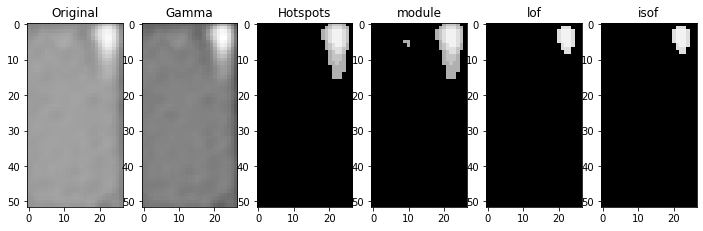

[-1.04406429 -1.02249588 -1.2182801  -0.99700906 -1.10071248 -1.04489253
 -1.16037491 -0.9700837 ]
[-1.85143439]
[-0.46523373 -0.46664214 -0.51164635 -0.46243557 -0.46189086 -0.44059637
 -0.48462889 -0.45587081]
[-0.70057376]
4.0 10.0 0.5026548245743669 1.0
4.0 10.0 0.5026548245743669 1.0
10.0 0
3608.jpg Junction-Box-Error


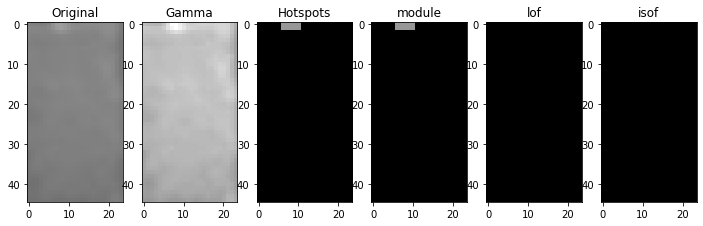

[-1.05894793 -1.28777227 -1.03857126 -1.47562037 -1.00169423 -1.23926306
 -1.16615396 -1.10810949]
[-1.84544637]
[-0.47826272 -0.53746272 -0.4712352  -0.56394293 -0.44939973 -0.51949891
 -0.50878054 -0.47776402]
[-0.69817855]
0.0 0
4167.jpg Normal
[-0.98177594 -1.01878575 -1.         -1.         -1.00223907 -1.06474751
 -0.99427306 -0.99807882]
[-1.69100393]
[-0.46524495 -0.45934489 -0.45507888 -0.4571473  -0.46491552 -0.49975153
 -0.4557533  -0.45558042]
[-0.63640157]
0.0 0
2516.jpg Normal
[-0.95579938 -1.94033387 -0.97349214 -1.13867991 -1.05555566 -1.00640873
 -1.01165456 -1.43102574]
[-1.79270085]
[-0.44013098 -0.59258576 -0.44380363 -0.47836381 -0.46137548 -0.4447092
 -0.46512872 -0.5236436 ]
[-0.67708034]
0.0 0
560.jpg Normal
[-0.99831091 -1.07105897 -1.00016574 -0.97314827 -1.01224637 -1.17039456
 -1.02082224 -1.00088075]
[-1.73581688]
[-0.44869726 -0.48938552 -0.45824357 -0.44446041 -0.46033807 -0.50768518
 -0.46949888 -0.46355419]
[-0.65432675]
0.0 0
3185.jpg Normal
[-0.960938

[-0.99412017 -1.0315961  -0.99322487 -1.02326003 -1.28440257 -0.99580122
 -0.98139558 -1.04129918]
[-1.69100393]
[-0.45164705 -0.5121131  -0.47794213 -0.48389581 -0.5656366  -0.49060859
 -0.46148311 -0.51220515]
[-0.63640157]
0.0 0
2700.jpg Normal
[-1.0288077  -0.99511398 -0.99008418 -1.02082224 -0.97314827 -0.97001811
 -1.00279574 -0.99810726]
[-1.73581688]
[-0.47611398 -0.45684867 -0.46126441 -0.46949888 -0.44446041 -0.45019006
 -0.46128566 -0.45513124]
[-0.65432675]
0.0 0
4371.jpg Normal
[-1.00342049 -1.02257315 -1.13867991 -1.02956213 -3.24542966 -0.97114821
 -1.0237252  -1.01161475]
[-1.79270085]
[-0.45490136 -0.45928956 -0.47836381 -0.47635103 -0.73995937 -0.45693626
 -0.46520912 -0.45424447]
[-0.67708034]
0.0 0
945.jpg Normal
[-1.01363434 -1.02873422 -1.02103694 -0.99564626 -1.01633003 -1.04096995
 -1.02768727 -0.99721597]
[-1.84544637]
[-0.43817103 -0.47709404 -0.45686907 -0.42940351 -0.48278608 -0.45168304
 -0.46447313 -0.43495418]
[-0.69817855]
0.0 0
1209.jpg Normal
[-1.     

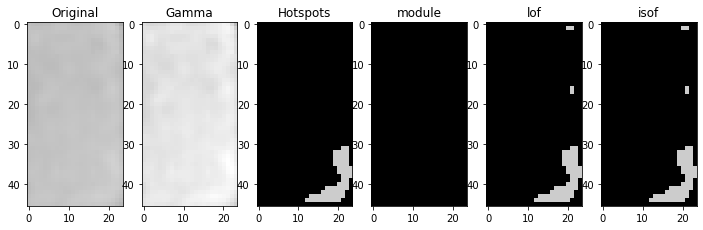

[-1.02203366 -0.9936534  -1.00326637 -1.02257315 -1.00341638 -1.01582448
 -1.01165456 -1.00536866]
[-1.79270085]
[-0.47640009 -0.45534955 -0.47798586 -0.45928956 -0.46269394 -0.48230338
 -0.46512872 -0.4888119 ]
[-0.67708034]
0.0 0
3387.jpg Normal
[-0.96932713 -1.02632394 -2.29178999 -0.97994655 -1.05878856 -1.01900278
 -0.97507499 -1.23295802]
[-1.84544637]
[-0.43359498 -0.45113853 -0.65914297 -0.43232707 -0.45846184 -0.44343586
 -0.42651695 -0.48952857]
[-0.69817855]
0.0 0
2927.jpg Normal
[-1.00985367 -0.97314827 -1.12186275 -0.99810726 -1.02144107 -0.99617767
 -1.01203479 -0.97607224]
[-1.73581688]
[-0.46126243 -0.44446041 -0.50038029 -0.45513124 -0.46440709 -0.4430679
 -0.47333808 -0.45235933]
[-0.65432675]
0.0 0
5090.jpg Normal
[-0.98606825 -1.0670951  -1.00247147 -1.00247147 -0.97867328 -3.19544868
 -1.01401991 -0.97477589]
[-1.79270085]
[-0.43845611 -0.45433981 -0.43827086 -0.43827086 -0.43349389 -0.63156042
 -0.45825628 -0.42992701]
[-0.67708034]
0.0 0
762.jpg Normal
[-1.008455

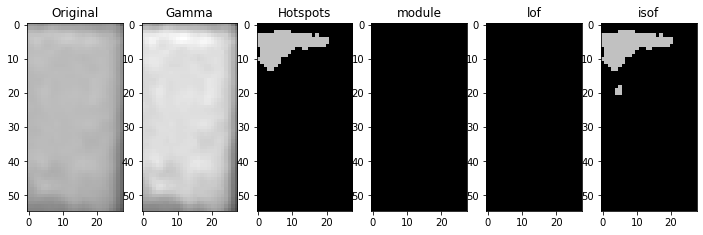

[-1.1407365  -1.0008625  -1.24618927 -0.99042985 -1.1407365  -1.18007116
 -1.05260017 -1.29895272]
[-1.85143439]
[-0.51172758 -0.48264592 -0.54638522 -0.45256204 -0.51172758 -0.5351174
 -0.52215162 -0.56333809]
[-0.70057376]
0.0 0
2067.jpg Normal
[-1.03473734 -0.99427306 -0.97888767 -0.96724017 -1.31899751 -0.99322487
 -1.00743616 -1.00933575]
[-1.69100393]
[-0.50868373 -0.4557533  -0.45457672 -0.47531272 -0.55295536 -0.47794213
 -0.49839307 -0.46555353]
[-0.63640157]
0.0 0
4416.jpg Normal
[-0.98892082 -1.09276844 -1.00536866 -1.0237252  -1.04726044 -0.99225512
 -1.21497072 -1.01195073]
[-1.79270085]
[-0.44371435 -0.52817947 -0.4888119  -0.46520912 -0.50104222 -0.47670298
 -0.54267887 -0.45732799]
[-0.67708034]
0.0 0
3379.jpg Normal
[-1.01108094 -0.97467728 -1.01808938 -0.96671397 -1.02910255 -3.369011
 -1.12566223 -0.97490354]
[-1.84544637]
[-0.45000922 -0.4479032  -0.46054168 -0.44716589 -0.47438507 -0.76227231
 -0.49366541 -0.44654687]
[-0.69817855]
0.0 0
1208.jpg Normal
[-0.9915620

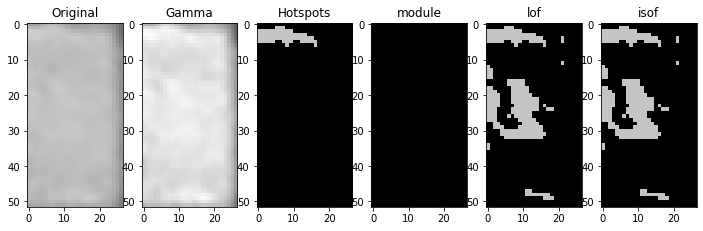

[-0.99008418 -0.99156203 -0.97819456 -1.00072278 -0.99617767 -1.00565037
 -0.99156203 -1.01224637]
[-1.73581688]
[-0.46126441 -0.44749581 -0.44396071 -0.44665879 -0.4430679  -0.46724833
 -0.44749581 -0.46033807]
[-0.65432675]
0.0 0
3345.jpg Normal
[-0.9936534  -0.99829983 -1.00193871 -0.99829983 -1.01195073 -0.97371182
 -0.99710709 -0.97114821]
[-1.79270085]
[-0.45534955 -0.44947001 -0.44963332 -0.44947001 -0.45732799 -0.44195047
 -0.44207936 -0.45693626]
[-0.67708034]
0.0 0
3423.jpg Normal
[-1.0279705  -0.97194479 -1.02413842 -1.00169423 -1.09164126 -1.04035396
 -1.04281893 -1.04863486]
[-1.84544637]
[-0.47671052 -0.44745156 -0.47441462 -0.44939973 -0.4780989  -0.45916672
 -0.44396586 -0.50701958]
[-0.69817855]
0.0 0
5052.jpg Normal
[-1.05474856 -0.97048248 -1.80845063 -1.02632394 -0.99721597 -1.15715779
 -0.97507499 -1.40101896]
[-1.84544637]
[-0.4412148  -0.44135247 -0.56729589 -0.45113853 -0.43495418 -0.48894022
 -0.42651695 -0.50932396]
[-0.69817855]
0.0 0
1234.jpg Normal
[-0.9860

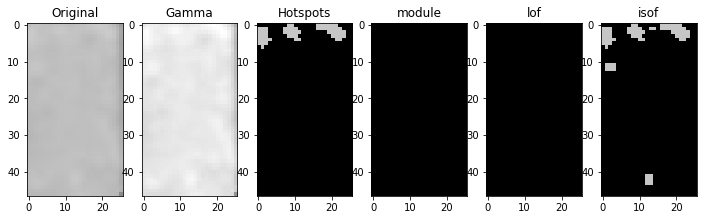

[-1.4227564  -1.23917276 -1.71181245 -1.01369236 -1.0847522  -1.35218168
 -1.49858669 -1.53837882]
[-1.84544637]
[-0.56480935 -0.52276099 -0.64116248 -0.46746296 -0.51259377 -0.55596447
 -0.55519446 -0.58625738]
[-0.69817855]
0.0 0
1977.jpg Normal
[-1.04281893 -0.97623298 -0.99232036 -1.0279705  -1.04281893 -1.03857126
 -0.97490354 -1.04081959]
[-1.84544637]
[-0.44396586 -0.43869179 -0.44689298 -0.47671052 -0.44396586 -0.4712352
 -0.44654687 -0.48765193]
[-0.69817855]
0.0 0
4827.jpg Normal
[-1.00247147 -1.01401991 -0.97477589 -1.02022529 -1.0150391  -1.02892276
 -0.97867328 -0.98567625]
[-1.79270085]
[-0.43827086 -0.45825628 -0.42992701 -0.51504233 -0.47908685 -0.4411845
 -0.43349389 -0.46786387]
[-0.67708034]
0.0 0
3190.jpg Normal
[-0.99831091 -1.498689   -1.10175061 -1.01224637 -1.00126893 -2.40996453
 -1.10175061 -5.53321567]
[-1.73581688]
[-0.44869726 -0.58285793 -0.4902783  -0.46033807 -0.46860824 -0.67981482
 -0.4902783  -0.8135411 ]
[-0.65432675]
0.0 0
1787.jpg Normal
[-0.981395

[-1.16615396 -1.55835793 -1.05894793 -1.28777227 -1.10810949 -1.00169423
 -1.3435568  -1.93220521]
[-1.84544637]
[-0.50878054 -0.55902353 -0.47826272 -0.53746272 -0.47776402 -0.44939973
 -0.53867113 -0.59793625]
[-0.69817855]
0.0 0
3966.jpg Normal
[-0.9967983  -1.14608016 -0.97314827 -0.99831091 -1.08191264 -1.00016574
 -0.98277305 -1.41189348]
[-1.73581688]
[-0.44829399 -0.51167442 -0.44446041 -0.44869726 -0.48270412 -0.45824357
 -0.46611817 -0.56872137]
[-0.65432675]
0.0 0
429.jpg Normal
[-1.33710448 -1.43079622 -1.02144107 -1.71477658 -1.54627672 -1.36325101
 -1.10286561 -1.26157007]
[-1.73581688]
[-0.53262376 -0.56963043 -0.46440709 -0.66751955 -0.59766722 -0.55195335
 -0.48672794 -0.53617753]
[-0.65432675]
0.0 2.0 0.0 1.0
3.0 12.485281229019165 0.24184352278519608 0.8546100110823472
0.0 2.0 0.0 1.0
0.0 0.0 0 0
21.5 21.071067690849304 0.6085205363535655 0.9637449739098485
0.0 0.0 0 0
1.5 5.414213538169861 0.6430287075658971 1.0
0.0 2.0 0.0 1.0
3.5 7.414213538169861 0.80010637036147

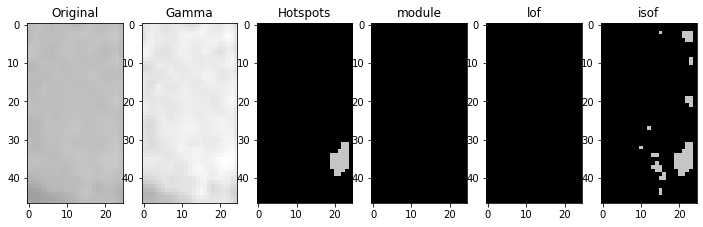

[-1.32499423 -1.0596294  -1.90771818 -1.16902978 -1.47086515 -1.60382042
 -1.35842298 -1.00705902]
[-1.79270085]
[-0.55282919 -0.50376911 -0.75304523 -0.53478622 -0.59350695 -0.67771564
 -0.57559377 -0.47491977]
[-0.67708034]
0.0 0.0 0 0
0.5 3.414213538169861 0.5390120920947209 1.0
270.5 140.32590079307556 0.1726241113675818 0.7075831931464024
0.0 0.0 0 0
0.0 0.0 0 0
0.0 6.0 0.0 1.0
0.0 6.0 0.0 1.0
0.0 0
1803.jpg Normal
[-1.00924073 -0.99955665 -0.98910559 -1.04129918 -1.02326003 -1.00924777
 -0.98474502 -1.00668352]
[-1.69100393]
[-0.48280781 -0.45614775 -0.45157445 -0.51220515 -0.48389581 -0.47021727
 -0.47372908 -0.45780829]
[-0.63640157]
0.0 0
4953.jpg Normal
[-1.         -1.6176582  -0.99430627 -1.02544949 -0.99779563 -0.99779563
 -2.6058274  -1.10189162]
[-1.69100393]
[-0.45175534 -0.60191845 -0.46246176 -0.47414348 -0.44071612 -0.44071612
 -0.6704795  -0.52165955]
[-0.63640157]
0.0 0
367.jpg Normal
[-1.01266967 -0.9698665  -1.05894793 -1.03857126 -1.00730193 -1.03234317
 -1.1661

[-0.97163092 -1.95021809 -0.97163092 -1.33584783 -1.02907466 -0.97163982
 -1.00420146 -1.128066  ]
[-1.85143439]
[-0.43345917 -0.59338357 -0.43345917 -0.50417389 -0.49078459 -0.44941096
 -0.45485041 -0.47601321]
[-0.70057376]
0.0 0
3033.jpg Normal
[-0.94580023 -1.08320808 -1.3292503  -1.02498849 -1.09496684 -1.16574956
 -0.98605353 -0.99777356]
[-1.69100393]
[-0.43430474 -0.44050177 -0.49465066 -0.4324538  -0.44060786 -0.45909123
 -0.41820283 -0.46409566]
[-0.63640157]
0.0 0
1624.jpg Normal
[-1.01117954 -1.29343244 -1.00523122 -0.98338173 -0.98144441 -1.
 -1.0258117  -0.9948849 ]
[-1.69100393]
[-0.4666599  -0.55597588 -0.47570779 -0.45087136 -0.46284514 -0.44515211
 -0.45126584 -0.46783662]
[-0.63640157]
0.0 0
159.jpg Normal
[-1.02819373 -0.97901957 -1.01799598 -1.0150391  -1.02777868 -1.00657491
 -1.17834548 -1.01720701]
[-1.79270085]
[-0.49071258 -0.44703469 -0.45598822 -0.47908685 -0.48231605 -0.46022583
 -0.46898583 -0.50340184]
[-0.67708034]
0.0 0
2846.jpg Normal
[-1.02082224 -0.9

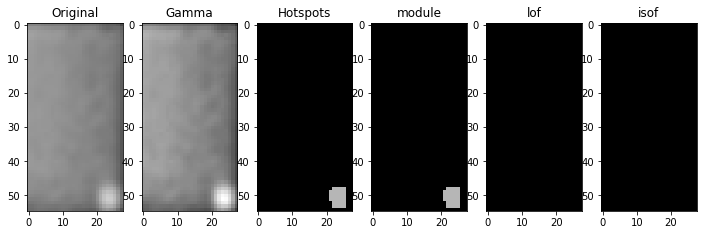

[-1.05474856 -1.26951532 -0.97507499 -0.97048248 -1.02632394 -0.97742854
 -0.97661183 -1.05878856]
[-1.84544637]
[-0.4412148  -0.49256653 -0.42651695 -0.44135247 -0.45113853 -0.44452747
 -0.42394878 -0.45846184]
[-0.69817855]
0.0 0
165.jpg Normal
[-1.00523122 -0.98277014 -0.9947705  -1.07211703 -1.0258117  -0.98254531
 -1.0005118  -1.0258117 ]
[-1.69100393]
[-0.47570779 -0.47464896 -0.44567373 -0.48318533 -0.45126584 -0.47345694
 -0.47223607 -0.45126584]
[-0.63640157]
0.0 0
4589.jpg Normal
[-0.97575357 -0.9756551  -0.97163982 -0.97127752 -0.97163092 -1.05648507
 -0.98583157 -0.97163092]
[-1.85143439]
[-0.43942484 -0.45656282 -0.44941096 -0.45161151 -0.43345917 -0.46909358
 -0.44238462 -0.43345917]
[-0.70057376]
0.0 0
171.jpg Normal
[-1.39185173 -1.0282744  -1.16902978 -1.00657491 -1.09082383 -1.16902978
 -1.0282744  -1.01817985]
[-1.79270085]
[-0.57427434 -0.47728796 -0.53478622 -0.46022583 -0.49504029 -0.53478622
 -0.47728796 -0.4579655 ]
[-0.67708034]
0.0 0
1383.jpg Normal
[-0.974392

[-0.47464896 -0.4666599  -0.47177494 -0.46246176 -0.52313124 -0.45975119
 -0.45175534 -0.48223283]
[-0.63640157]
0.0 0
2891.jpg Normal
[-0.97994655 -1.69233358 -1.04475772 -1.04055934 -1.02632394 -1.01374845
 -1.04531225 -0.97507499]
[-1.84544637]
[-0.43232707 -0.55255594 -0.46830725 -0.45128655 -0.45113853 -0.47722241
 -0.46208925 -0.42651695]
[-0.69817855]
0.0 0
4238.jpg Normal
[-1.07165539 -0.96383943 -1.10848842 -0.95694055 -1.05994424 -1.02498849
 -1.01401483 -1.35709693]
[-1.69100393]
[-0.44812415 -0.44745472 -0.43500116 -0.41367301 -0.45693453 -0.4324538
 -0.4380269  -0.48932196]
[-0.63640157]
0.0 0
3557.jpg Normal
[-1.         -1.18963986 -0.98377353 -0.98377353 -1.00878476 -1.26619527
 -0.98139558 -1.57437345]
[-1.69100393]
[-0.44508381 -0.53369205 -0.44182435 -0.44182435 -0.46121548 -0.5457266
 -0.46148311 -0.56299996]
[-0.63640157]
0.0 0
1340.jpg Normal
[-0.97575357 -1.3715559  -0.98583157 -0.97163982 -1.75514521 -1.03733476
 -0.96279187 -1.08974236]
[-1.85143439]
[-0.439424

[-0.48019978 -0.45825628 -0.49681273 -0.44703469 -0.47595811 -0.45660339
 -0.42423194 -0.48727077]
[-0.67708034]
0.0 0
4560.jpg Normal
[-0.99611304 -1.12698129 -1.01749041 -1.78878151 -0.97854026 -0.96802964
 -1.34088371 -1.06635405]
[-1.85143439]
[-0.4670212  -0.48123581 -0.46216416 -0.5973966  -0.442255   -0.42470161
 -0.5446965  -0.47466243]
[-0.70057376]
0.0 0
167.jpg Normal
[-1.00088075 -1.00016574 -0.98137623 -1.90816754 -1.12186275 -0.99020492
 -0.97314827 -1.01224637]
[-1.73581688]
[-0.46355419 -0.45824357 -0.46153829 -0.62060604 -0.50038029 -0.45123686
 -0.44446041 -0.46033807]
[-0.65432675]
0.0 0
1395.jpg Normal
[-1.03494675 -0.98173861 -1.26951532 -0.97661183 -0.99864523 -0.96932713
 -1.01363434 -1.02632394]
[-1.84544637]
[-0.44433476 -0.45068927 -0.49256653 -0.42394878 -0.44421049 -0.43359498
 -0.43817103 -0.45113853]
[-0.69817855]
0.0 0
601.jpg Normal
[-0.99210825 -0.99088064 -0.99210825 -0.9947705  -1.         -1.
 -0.97648473 -1.01812145]
[-1.69100393]
[-0.44514168 -0.46

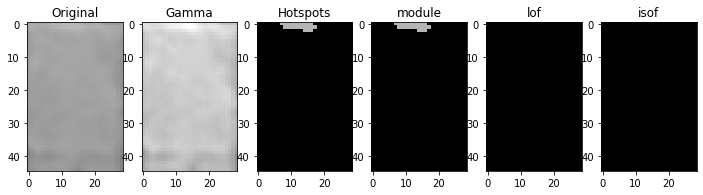

[-0.97562809 -1.35709693 -1.00531831 -1.06547796 -3.32431447 -1.06547796
 -1.98654682 -0.96700172]
[-1.69100393]
[-0.42150595 -0.48932196 -0.41232024 -0.43938289 -0.65071842 -0.43938289
 -0.59204029 -0.41261114]
[-0.63640157]
0.0 0
2313.jpg Normal
[-0.9947705  -0.99545912 -1.02670285 -0.9991067  -1.12439301 -1.0258117
 -1.03592312 -1.48043677]
[-1.69100393]
[-0.44567373 -0.45182592 -0.4822647  -0.46156089 -0.49626548 -0.45126584
 -0.48223283 -0.55282499]
[-0.63640157]
0.0 0
2475.jpg Normal
[-1.15404104 -0.99153927 -1.726647   -1.00924777 -1.36795001 -1.42142037
 -1.01772558 -1.12070395]
[-1.69100393]
[-0.55043065 -0.47641844 -0.67643514 -0.47021727 -0.57982336 -0.58885544
 -0.50055387 -0.54009953]
[-0.63640157]
0.0 2.0 0.0 1.0
4.5 15.899494767189026 0.2236947180771826 0.8799465001698337
3.0 6.828427076339722 0.8085181381420814 1.0
184.5 99.84061968326569 0.2325903534911005 0.7220022987262592
0.0 0.0 0 0
0.0 0
4004.jpg Normal
[-1.03494675 -1.03098131 -1.01363434 -1.02152822 -0.99721597 

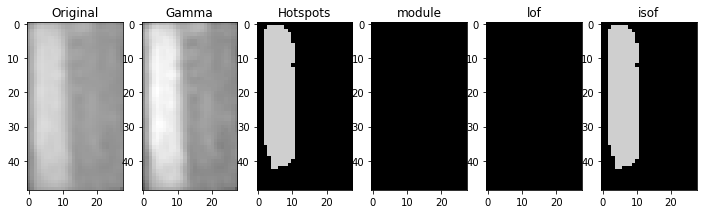

[-1.01999624 -0.94479567 -0.97975911 -1.68418114 -0.96565031 -0.97562809
 -1.19754736 -0.96196868]
[-1.69100393]
[-0.4434089  -0.44480065 -0.43265804 -0.53188821 -0.41092959 -0.42150595
 -0.48948985 -0.42778401]
[-0.63640157]
0.0 0
1034.jpg Normal
[-1.14833979 -1.06670503 -1.13150478 -1.0150391  -1.32499423 -1.21240941
 -1.0414487  -1.02777868]
[-1.79270085]
[-0.51231554 -0.50290162 -0.5270107  -0.47908685 -0.55282919 -0.54161209
 -0.48727077 -0.48231605]
[-0.67708034]
0.0 0
4164.jpg Normal
[-0.99430627 -1.154478   -1.         -1.01199301 -1.52256556 -0.9948849
 -1.         -0.99779563]
[-1.69100393]
[-0.46246176 -0.51679209 -0.45281452 -0.45910461 -0.57681418 -0.46783662
 -0.45890234 -0.44071612]
[-0.63640157]
0.0 0
2515.jpg Normal
[-0.97127752 -0.97575357 -0.96393632 -0.99042985 -1.16086476 -0.98583157
 -0.96279187 -1.03659189]
[-1.85143439]
[-0.45161151 -0.43942484 -0.45224213 -0.45256204 -0.48032174 -0.44238462
 -0.42215199 -0.49335506]
[-0.70057376]
0.0 0
588.jpg Normal
[-1.009247

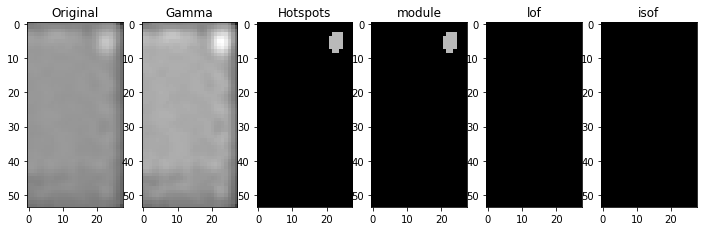

[-1.01772558 -1.00450591 -1.47489073 -0.9990099  -1.00924777 -1.06464724
 -1.01772558 -0.99153927]
[-1.69100393]
[-0.50055387 -0.48651429 -0.59734259 -0.44607937 -0.47021727 -0.52876897
 -0.50055387 -0.47641844]
[-0.63640157]
33.0 50.97056245803833 0.1596191345790189 0.9273514494403315
0.0 0
2298.jpg Normal
[-0.99054894 -1.081779   -0.98793661 -1.00089788 -0.99102261 -1.00525424
 -1.21419927 -0.99717495]
[-1.91118773]
[-0.4764915  -0.49821424 -0.43506724 -0.47557788 -0.44128635 -0.45713099
 -0.54318632 -0.49023977]
[-0.72447509]
0.0 0
1791.jpg Normal
[-0.97227492 -1.43277015 -1.26156113 -1.00517471 -1.14011715 -1.08592214
 -0.99989029 -1.66547918]
[-1.85143439]
[-0.43230396 -0.53523996 -0.54329665 -0.47168724 -0.49211184 -0.4690728
 -0.45846316 -0.57606041]
[-0.70057376]
0.0 0
205.jpg Normal
[-0.98063425 -1.35847279 -1.12446448 -0.94925868 -1.27767002 -1.60163979
 -1.31712301 -1.11217945]
[-1.91118773]
[-0.46225931 -0.53069628 -0.4626708  -0.4246456  -0.51680395 -0.71608572
 -0.5175855

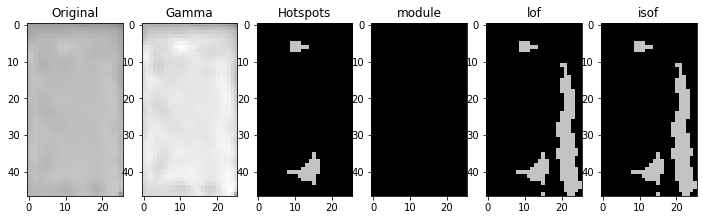

[-0.97376503 -2.11571532 -1.08906919 -0.98775958 -1.08906919 -3.13271295
 -0.97069927 -1.4988751 ]
[-1.79270085]
[-0.42677521 -0.59773445 -0.44925693 -0.44964081 -0.44925693 -0.65824858
 -0.437082   -0.53386056]
[-0.67708034]
0.0 0
952.jpg Normal
[-1.15404104 -0.96724017 -1.0364352  -1.24812134 -1.         -1.65758112
 -1.02326003 -1.06464724]
[-1.69100393]
[-0.55043065 -0.47531272 -0.50087742 -0.55909346 -0.4571473  -0.65807059
 -0.48389581 -0.52876897]
[-0.63640157]
0.0 2.0 0.0 1.0
1.5 10.242640614509583 0.17967069736490698 0.9191197751128568
54.0 50.485281229019165 0.2662404656299787 0.9416629185075763
54.0 50.485281229019165 0.2662404656299787 0.9416629185075763
50.0 29
2717.jpg Single-Hotspot


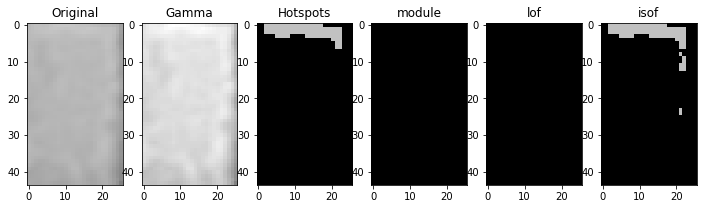

[-1.16574956 -1.02498849 -1.21858842 -0.96565031 -1.1195844  -1.10848842
 -1.08320808 -1.38103637]
[-1.69100393]
[-0.45909123 -0.4324538  -0.49770557 -0.41092959 -0.45489122 -0.43500116
 -0.44050177 -0.5332268 ]
[-0.63640157]
0.0 0.0 0 0
11.0 13.656854152679443 0.7411416266302412 0.9869555956409838
11.0 13.656854152679443 0.7411416266302412 0.9869555956409838
16.0 2
5078.jpg Junction-Box-Error


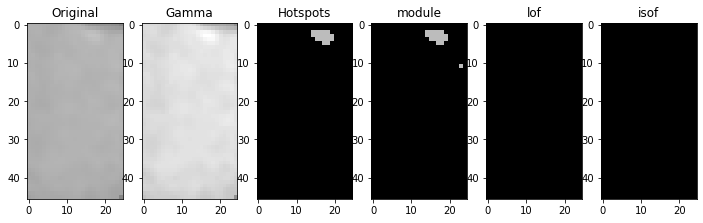

[-1.01506515 -1.00977833 -1.00803703 -1.01749041 -2.01805426 -1.00946338
 -1.00946338 -1.01032286]
[-1.85143439]
[-0.44965288 -0.48013182 -0.4424306  -0.46216416 -0.63862974 -0.45159308
 -0.45159308 -0.46964859]
[-0.70057376]
0.0 0
4366.jpg Normal
[-1.00773389 -0.99088064 -1.07462771 -0.98989917 -1.00338554 -1.
 -0.97648473 -1.43554944]
[-1.69100393]
[-0.4724245  -0.46541022 -0.50615194 -0.47874395 -0.46088332 -0.45890234
 -0.45465872 -0.56231785]
[-0.63640157]
0.0 0
3409.jpg Normal
[-0.94320569 -0.98652019 -0.94925868 -0.94162051 -0.94925868 -0.94263986
 -1.59091086 -1.02570712]
[-1.91118773]
[-0.43860442 -0.43730794 -0.4246456  -0.46065338 -0.4246456  -0.45928214
 -0.56776184 -0.45240875]
[-0.72447509]
0.0 0
2703.jpg Normal
[-1.04533675 -1.02531932 -1.00499709 -1.09208353 -1.00396891 -1.00869117
 -0.9966112  -0.99611304]
[-1.85143439]
[-0.51978003 -0.4966691  -0.50253148 -0.49963462 -0.47043532 -0.48455074
 -0.51220408 -0.4670212 ]
[-0.70057376]
0.0 0
4372.jpg Normal
[-0.9805931  -1.

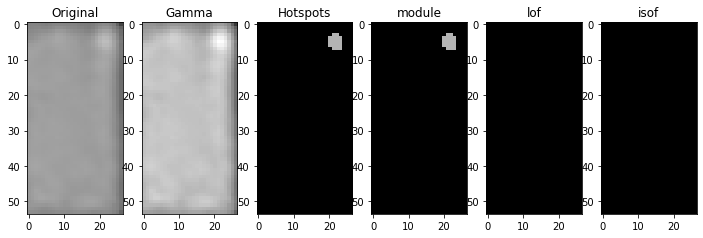

[-0.94479567 -1.04553357 -0.95824358 -0.96565031 -1.48366104 -0.97389599
 -0.94766065 -0.9994771 ]
[-1.69100393]
[-0.44480065 -0.44438505 -0.45829101 -0.41092959 -0.49998365 -0.4378392
 -0.41567663 -0.4189714 ]
[-0.63640157]
0.0 0
5087.jpg Normal
[-1.11217945 -1.22327766 -1.02167525 -1.00007117 -1.19497048 -1.06503653
 -0.94261536 -1.12446448]
[-1.91118773]
[-0.46976361 -0.51859965 -0.44000143 -0.46335103 -0.47780284 -0.48550176
 -0.42724181 -0.4626708 ]
[-0.72447509]
0.0 0
2924.jpg Normal
[-1.02134692 -1.06670503 -1.02131312 -0.99674085 -2.94613524 -1.0414487
 -1.01949215 -1.02777868]
[-1.79270085]
[-0.48019978 -0.50290162 -0.47595811 -0.46436233 -0.66406684 -0.48727077
 -0.4625988  -0.48231605]
[-0.67708034]
0.0 0
5093.jpg Normal
[-1.         -1.0005118  -0.98338173 -0.98996695 -0.9991067  -1.154478
 -1.03683992 -1.        ]
[-1.69100393]
[-0.45890234 -0.47223607 -0.45087136 -0.46864201 -0.46156089 -0.51679209
 -0.48576262 -0.44515211]
[-0.63640157]
0.0 0
761.jpg Normal
[-0.99696043 

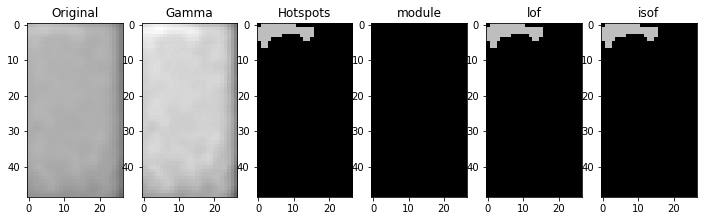

[-0.99006322 -0.95246529 -1.056933   -1.87293245 -0.94263986 -0.97261685
 -0.94162051 -1.00007117]
[-1.91118773]
[-0.46251081 -0.43285048 -0.45888587 -0.68510176 -0.45928214 -0.44932513
 -0.46065338 -0.46335103]
[-0.72447509]
0.0 0
4367.jpg Normal
[-1.00450591 -0.9990099  -1.00743616 -1.00924073 -0.97888767 -0.99153927
 -1.00223907 -1.        ]
[-1.69100393]
[-0.48651429 -0.44607937 -0.49839307 -0.48280781 -0.45457672 -0.47641844
 -0.46491552 -0.45507888]
[-0.63640157]
0.0 0
5079.jpg Normal
[-0.99511343 -1.00749396 -0.98671072 -1.06558744 -1.00119306 -0.98491213
 -0.99228138 -0.99535675]
[-1.73581688]
[-0.46515619 -0.47049776 -0.45428468 -0.48270402 -0.44245977 -0.44307091
 -0.47742149 -0.45612643]
[-0.65432675]
0.0 0
2716.jpg Normal
[-0.97562809 -1.13732891 -2.47684129 -1.03186451 -0.95065705 -0.96196868
 -0.98605353 -1.48366104]
[-1.69100393]
[-0.42150595 -0.46643998 -0.59121632 -0.42861373 -0.46675778 -0.42778401
 -0.41820283 -0.49998365]
[-0.63640157]
0.0 0
953.jpg Normal
[-1.02561

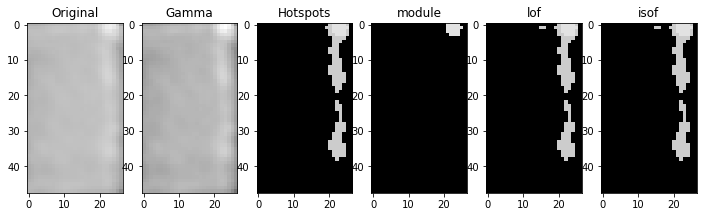

[-0.99210825 -1.02544949 -1.05170866 -0.97858522 -1.02496089 -0.99975309
 -1.72411814 -0.99210825]
[-1.69100393]
[-0.44514168 -0.47414348 -0.50307791 -0.45597758 -0.44966483 -0.46339116
 -0.60750515 -0.44514168]
[-0.63640157]
0.0 0
1223.jpg Normal
[-1.02046004 -0.99846058 -1.11784575 -1.06885152 -0.99543617 -0.99323434
 -1.0017348  -0.99212986]
[-1.88896714]
[-0.49420441 -0.43825885 -0.50977489 -0.48432818 -0.45457867 -0.47285846
 -0.45025069 -0.46499182]
[-0.71558686]
0.0 0
3434.jpg Normal
[-1.06158531 -0.98724714 -1.10971014 -1.03609459 -1.01419384 -1.00803703
 -1.01132951 -1.46903261]
[-1.85143439]
[-0.50724987 -0.5173956  -0.52407474 -0.50809072 -0.49107859 -0.4424306
 -0.52761713 -0.54919218]
[-0.70057376]
0.0 0
5045.jpg Normal
[-1.15058586 -1.0640773  -1.35847279 -1.29739652 -1.01720568 -1.42220454
 -1.24125187 -0.94320569]
[-1.91118773]
[-0.49245024 -0.50080201 -0.53069628 -0.52776051 -0.47894517 -0.61727979
 -0.49071367 -0.43860442]
[-0.72447509]
0.0 0
1974.jpg Normal
[-0.99210

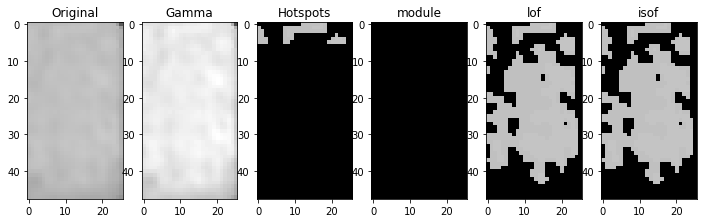

[-0.97522017 -0.9938725  -0.97981884 -0.97952132 -0.99511343 -0.99135462
 -1.08087667 -0.97912084]
[-1.73581688]
[-0.46190243 -0.45605455 -0.43564236 -0.43874678 -0.46515619 -0.45519388
 -0.48037118 -0.43828425]
[-0.65432675]
0.0 0
210.jpg Normal
[-0.99350627 -0.99268182 -1.07189458 -1.00317987 -0.98793661 -1.00089788
 -1.00525424 -0.97349168]
[-1.91118773]
[-0.44415385 -0.42953546 -0.49083178 -0.47703366 -0.43506724 -0.47557788
 -0.45713099 -0.44748766]
[-0.72447509]
0.0 0
3178.jpg Normal
[-1.05123614 -1.00326663 -1.02168876 -0.98062712 -1.0018577  -1.67943078
 -1.01823634 -0.97865847]
[-1.88896714]
[-0.45702658 -0.46084965 -0.44989842 -0.43924808 -0.44743478 -0.54844583
 -0.45742712 -0.41145483]
[-0.71558686]
0.0 0
4617.jpg Normal
[-1.20100196 -1.00977833 -1.01132951 -1.10971014 -1.2084961  -0.96566766
 -1.02531932 -1.09208353]
[-1.85143439]
[-0.57653927 -0.48013182 -0.52761713 -0.52407474 -0.50348078 -0.42887377
 -0.4966691  -0.49963462]
[-0.70057376]
0.0 0
2266.jpg Normal
[-0.98233

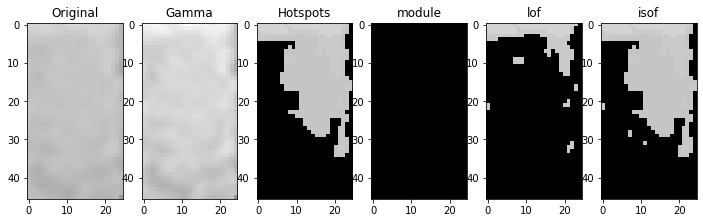

[-1.03683992 -1.         -1.10189162 -0.97858522 -0.99210825 -1.
 -1.00475144 -0.97648473]
[-1.69100393]
[-0.48576262 -0.45175534 -0.52165955 -0.45597758 -0.44514168 -0.45281452
 -0.45934003 -0.45465872]
[-0.63640157]
0.0 0
370.jpg Normal
[-1.00144165 -0.99007706 -1.05040876 -0.99368875 -0.99007706 -0.98835091
 -0.98947074 -0.97912084]
[-1.73581688]
[-0.45494388 -0.4327548  -0.45838785 -0.43571899 -0.4327548  -0.45172757
 -0.46088891 -0.43828425]
[-0.65432675]
0.0 0
4944.jpg Normal
[-0.99350627 -1.081779   -0.99137265 -1.00228168 -1.00248261 -0.99832053
 -1.06225271 -0.97585217]
[-1.91118773]
[-0.44415385 -0.49821424 -0.47346144 -0.44072105 -0.45493601 -0.49021928
 -0.49765257 -0.45437273]
[-0.72447509]
0.0 0
3795.jpg Normal
[-1.15819736 -0.9805931  -0.98665132 -0.97809605 -1.03319785 -0.99183988
 -1.51277919 -1.00778219]
[-1.88896714]
[-0.48872146 -0.43082549 -0.42290758 -0.43289042 -0.46040899 -0.4390347
 -0.53884119 -0.43154547]
[-0.71558686]
0.0 0
416.jpg Normal
[-1.01117954 -0.982

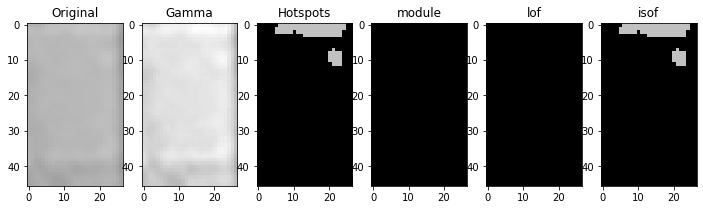

[-1.         -1.01199301 -0.97648473 -1.3854918  -0.99545912 -1.00475144
 -1.         -1.        ]
[-1.69100393]
[-0.45185083 -0.45910461 -0.45465872 -0.56246527 -0.45182592 -0.45934003
 -0.45185083 -0.44515211]
[-0.63640157]
0.0 0
4788.jpg Normal
[-1.01536084 -1.00869117 -1.09208353 -1.00803703 -1.01300787 -1.00499709
 -1.00946338 -1.01026731]
[-1.85143439]
[-0.47268971 -0.48455074 -0.49963462 -0.4424306  -0.45701371 -0.50253148
 -0.45159308 -0.48491624]
[-0.70057376]
0.0 2.0 0.0 1.0
11.0 16.82842707633972 0.48810752032162763 0.9788280239107875
11.0 16.82842707633972 0.48810752032162763 0.9788280239107875
20.0 0
4950.jpg Junction-Box-Error


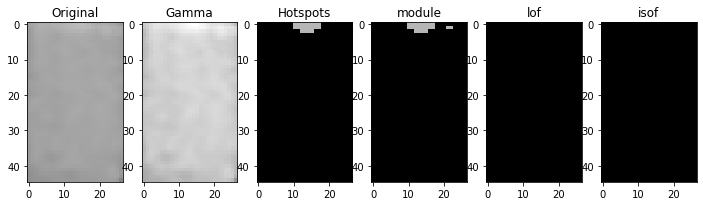

[-1.0017348  -1.00778219 -1.01871639 -0.98972908 -1.0079598  -1.00405339
 -0.99729943 -0.99846058]
[-1.88896714]
[-0.45025069 -0.43154547 -0.43313773 -0.43991361 -0.44236359 -0.44222391
 -0.4554005  -0.43825885]
[-0.71558686]
0.0 0
364.jpg Normal
[-1.38843261 -1.18728473 -1.06228727 -1.5493505  -1.00119306 -1.18728473
 -1.92046992 -1.36230064]
[-1.73581688]
[-0.52061122 -0.49869122 -0.50271183 -0.54739002 -0.44245977 -0.49869122
 -0.68712069 -0.53230583]
[-0.65432675]
0.0 0.0 0 0
35.5 43.55634891986847 0.2351447466833048 0.9186679734698343
0.0 0.0 0 0
0.0 0
1828.jpg Normal
[-1.00382684 -0.99501678 -0.99268182 -0.99350627 -1.03179191 -1.01052846
 -0.99054894 -0.99350627]
[-1.91118773]
[-0.43510918 -0.45672495 -0.42953546 -0.44415385 -0.46008847 -0.45059093
 -0.4764915  -0.44415385]
[-0.72447509]
0.0 0
2312.jpg Normal
[-1.01338575 -0.97439275 -0.99158175 -0.99427306 -1.06474751 -1.18963986
 -1.         -1.        ]
[-1.69100393]
[-0.4602041  -0.45901517 -0.44490261 -0.4557533  -0.4997515

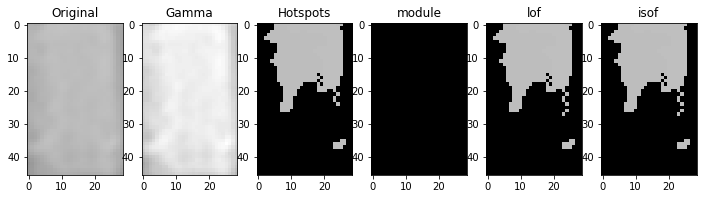

[-1.08592214 -0.98156259 -0.99611304 -1.05599494 -2.43876599 -0.97854026
 -0.96828994 -1.2084961 ]
[-1.85143439]
[-0.4690728  -0.45842572 -0.4670212  -0.45683162 -0.71395169 -0.442255
 -0.44846637 -0.50348078]
[-0.70057376]
0.0 0
4039.jpg Normal
[-1.00077331 -1.0018577  -0.97865847 -0.97604856 -0.97865847 -1.01239632
 -1.19163099 -0.97604856]
[-1.88896714]
[-0.44065512 -0.44743478 -0.41145483 -0.4317117  -0.41145483 -0.44901288
 -0.48131145 -0.4317117 ]
[-0.71558686]
0.0 0
2448.jpg Normal
[-1.00641916 -0.98671072 -0.98489841 -1.00119306 -0.99007706 -1.00989346
 -0.99007706 -1.03675633]
[-1.73581688]
[-0.4542901  -0.45428468 -0.45515325 -0.44245977 -0.4327548  -0.44727677
 -0.4327548  -0.45322675]
[-0.65432675]
0.0 0
3742.jpg Normal
[-1.         -1.00052792 -0.98377353 -1.1565691  -0.98139558 -0.99427306
 -0.98377353 -1.        ]
[-1.69100393]
[-0.4571473  -0.46186446 -0.44182435 -0.51839855 -0.46148311 -0.4557533
 -0.44182435 -0.44508381]
[-0.63640157]
0.0 0
1155.jpg Normal
[-1.0008978

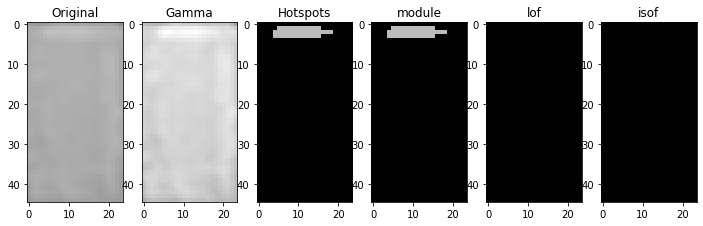

[-1.07159394 -0.97648473 -0.98254531 -1.00475144 -1.03592312 -1.03431132
 -1.1777491  -0.98254531]
[-1.69100393]
[-0.49271383 -0.45465872 -0.47345694 -0.45934003 -0.48223283 -0.48668183
 -0.52158005 -0.47345694]
[-0.63640157]
0.0 0
1380.jpg Normal
[-1.04190364 -0.97073413 -1.56386769 -1.13487841 -0.97073413 -0.99464052
 -1.30773027 -1.00108423]
[-1.91118773]
[-0.46197856 -0.42760362 -0.55392725 -0.47908224 -0.42760362 -0.42922339
 -0.53443273 -0.4382929 ]
[-0.72447509]
0.0 0
614.jpg Normal
[-0.98910559 -1.         -1.         -1.01878575 -1.         -1.
 -0.99955665 -0.98139558]
[-1.69100393]
[-0.45157445 -0.45507888 -0.44550484 -0.45934489 -0.4571473  -0.44508381
 -0.45614775 -0.46148311]
[-0.63640157]
0.0 0
2851.jpg Normal
[-1.00228168 -1.0025574  -1.29025234 -1.00382684 -0.97488102 -1.05804128
 -0.99268182 -0.98796571]
[-1.91118773]
[-0.44072105 -0.44513404 -0.50517854 -0.43510918 -0.42614807 -0.4731823
 -0.42953546 -0.46615232]
[-0.72447509]
0.0 0
3597.jpg Normal
[-1.00803703 -1.02

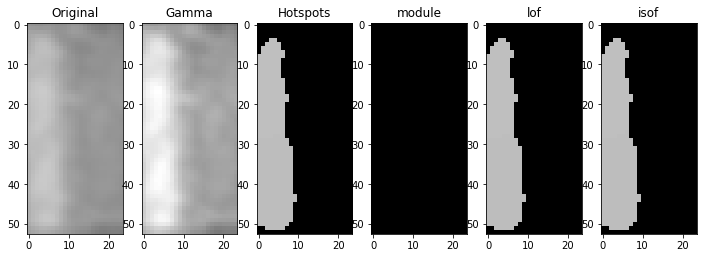

[-1.02168876 -1.0784147  -1.0017348  -0.99098761 -1.00393711 -1.00405339
 -0.9805931  -0.99729943]
[-1.88896714]
[-0.44989842 -0.48928071 -0.45025069 -0.43474164 -0.46789894 -0.44222391
 -0.43082549 -0.4554005 ]
[-0.71558686]
0.0 0
166.jpg Normal
[-1.11217945 -1.16385736 -0.95076521 -1.15058586 -0.97073413 -1.19497048
 -2.41843175 -1.04767181]
[-1.91118773]
[-0.46976361 -0.46802589 -0.49202274 -0.49245024 -0.42760362 -0.47780284
 -0.78116819 -0.49935622]
[-0.72447509]
0.0 0
2845.jpg Normal
[-1.01239632 -0.99183988 -1.0079598  -1.00220569 -0.98062712 -1.0784147
 -0.99846058 -0.97604856]
[-1.88896714]
[-0.44901288 -0.4390347  -0.44236359 -0.45111976 -0.43924808 -0.48928071
 -0.43825885 -0.4317117 ]
[-0.71558686]
0.0 0
3583.jpg Normal
[-0.99368875 -0.97886303 -1.09476512 -0.99135462 -0.98489841 -1.00055163
 -0.97835812 -0.97711536]
[-1.73581688]
[-0.43571899 -0.4393347  -0.46919688 -0.45519388 -0.45515325 -0.44968686
 -0.45467999 -0.44511642]
[-0.65432675]
0.0 0
98.jpg Normal
[-0.99955665

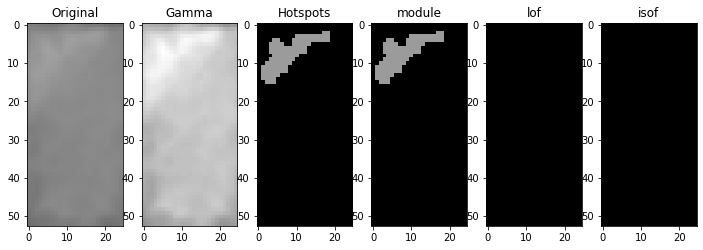

[-1.06327277 -0.95901898 -0.95980985 -0.9559141  -1.30483443 -0.96930095
 -0.97024965 -0.95798791]
[-1.91118773]
[-0.46638198 -0.42839742 -0.43442328 -0.42556613 -0.46712597 -0.43929222
 -0.42873848 -0.41910946]
[-0.72447509]
0.0 0
2676.jpg Normal
[-1.32770887 -1.01823634 -1.25270257 -1.02046004 -0.99212986 -1.15841132
 -1.06885152 -1.32770887]
[-1.88896714]
[-0.55278175 -0.45742712 -0.5638787  -0.49420441 -0.46499182 -0.52029546
 -0.48432818 -0.55278175]
[-0.71558686]
0.0 0
5119.jpg Normal
[-0.98796571 -1.0235937  -0.97349168 -0.99137265 -0.99054894 -1.00228168
 -0.98773835 -0.99501678]
[-1.91118773]
[-0.46615232 -0.48733457 -0.44748766 -0.47346144 -0.4764915  -0.44072105
 -0.45444699 -0.45672495]
[-0.72447509]
0.0 0
4207.jpg Normal
[-1.00924073 -1.06474751 -0.99580122 -1.         -1.65970264 -1.00924777
 -1.00801853 -1.00933575]
[-1.69100393]
[-0.48280781 -0.49975153 -0.49060859 -0.45239101 -0.58621407 -0.47021727
 -0.49120796 -0.46555353]
[-0.63640157]
0.0 0
3568.jpg Normal
[-1.0038

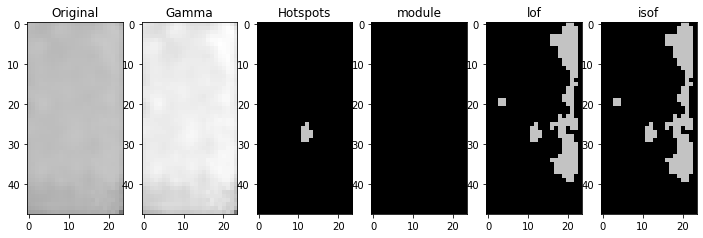

[-0.98947074 -0.99535675 -0.97711536 -0.98671072 -1.35407302 -1.00055163
 -1.00144165 -4.17717456]
[-1.73581688]
[-0.46088891 -0.45612643 -0.44511642 -0.45428468 -0.52944886 -0.44968686
 -0.45494388 -0.78012027]
[-0.65432675]
0.0 0
2662.jpg Normal
[-1.00382684 -1.01286935 -0.98793661 -1.0067788  -0.9904498  -0.99501678
 -0.99350627 -1.76813469]
[-1.91118773]
[-0.43510918 -0.46122126 -0.43506724 -0.43622612 -0.45059737 -0.45672495
 -0.44415385 -0.61071605]
[-0.72447509]
0.0 0
4213.jpg Normal
[-1.02544949 -1.03431132 -1.48043677 -1.01199301 -1.07462771 -1.154478
 -1.154478   -1.01199301]
[-1.69100393]
[-0.47414348 -0.48668183 -0.55282499 -0.45910461 -0.50615194 -0.51679209
 -0.51679209 -0.45910461]
[-0.63640157]
0.0 0
827.jpg Normal
[-1.00077331 -0.97604856 -1.12183783 -1.00088509 -0.98665132 -0.9805931
 -2.18051319 -1.03319785]
[-1.88896714]
[-0.44065512 -0.4317117  -0.48438938 -0.46612308 -0.42290758 -0.43082549
 -0.64153101 -0.46040899]
[-0.71558686]
0.0 0
67.jpg Normal
[-1.07747283 -

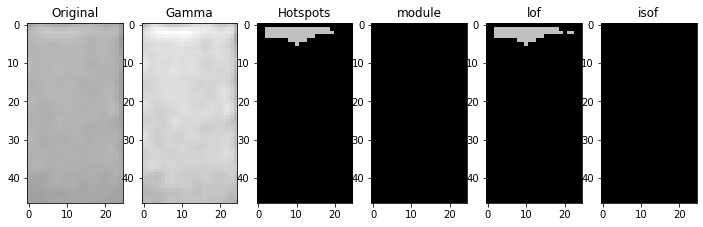

[-1.18631859 -0.9878517  -0.97835812 -0.97711536 -1.83711764 -0.99228138
 -0.99121116 -0.99535675]
[-1.73581688]
[-0.46792962 -0.42785606 -0.45467999 -0.44511642 -0.56708833 -0.47742149
 -0.43261728 -0.45612643]
[-0.65432675]
0.0 0
3554.jpg Normal
[-0.99412017 -1.         -1.00878476 -0.9990099  -0.98910559 -0.9998713
 -1.         -0.98377353]
[-1.69100393]
[-0.45164705 -0.44614842 -0.46121548 -0.44607937 -0.45157445 -0.46715235
 -0.4571473  -0.44182435]
[-0.63640157]
0.0 0
1343.jpg Normal
[-1.03179191 -3.8456918  -1.41620115 -0.97799049 -2.59607902 -1.87739553
 -1.05804128 -1.15013125]
[-1.91118773]
[-0.46008847 -0.78861125 -0.55094094 -0.45129158 -0.70484531 -0.59765531
 -0.4731823  -0.50174576]
[-0.72447509]
0.0 0
1425.jpg Normal
[-0.98526924 -0.96077088 -1.09992861 -0.96077088 -0.95504672 -0.97024965
 -0.95847665 -1.03000812]
[-1.91118773]
[-0.45912707 -0.42786752 -0.441626   -0.42786752 -0.4574884  -0.42873848
 -0.42291784 -0.4899514 ]
[-0.72447509]
0.0 0
3232.jpg Normal
[-1.01601

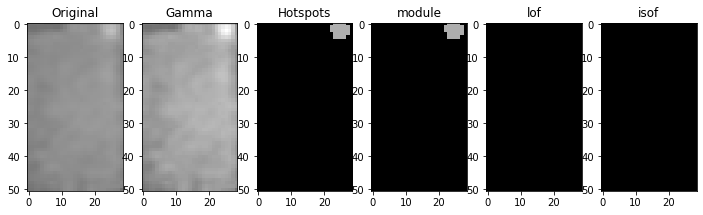

[-1.00543784 -1.03319785 -1.00220569 -0.99081438 -0.97604856 -1.0018577
 -1.03319785 -3.01507557]
[-1.88896714]
[-0.43200072 -0.46040899 -0.45111976 -0.43021546 -0.4317117  -0.44743478
 -0.46040899 -0.73085507]
[-0.71558686]
0.0 0
3540.jpg Normal
[-1.0258117  -1.03592312 -1.00475144 -0.99688648 -1.10364946 -1.
 -1.02670285 -0.99308187]
[-1.69100393]
[-0.45126584 -0.48223283 -0.45934003 -0.44796451 -0.50078461 -0.44515211
 -0.4822647  -0.47177494]
[-0.63640157]
0.0 0
2163.jpg Normal
[-1.03467968 -1.01026731 -1.01750474 -1.00480091 -1.17512485 -1.01749041
 -1.00396891 -1.01601836]
[-1.85143439]
[-0.44700107 -0.48491624 -0.47497927 -0.48740183 -0.54847613 -0.46216416
 -0.47043532 -0.45739185]
[-0.70057376]
0.0 0
4512.jpg Normal
[-1.12070395 -1.00924073 -1.65758112 -1.24812134 -1.00743616 -1.04129918
 -1.04739459 -1.00743616]
[-1.69100393]
[-0.54009953 -0.48280781 -0.65807059 -0.55909346 -0.49839307 -0.51220515
 -0.53101534 -0.49839307]
[-0.63640157]
50.0 46.14213538169861 0.29511038330746

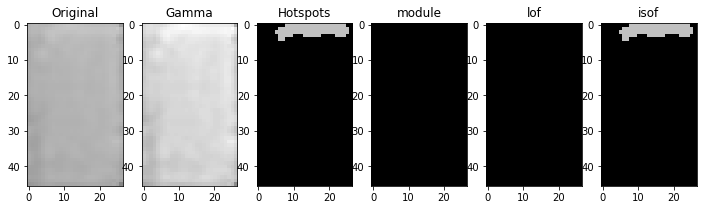

[-1.02485664 -0.97912084 -0.99007706 -1.00989346 -1.83711764 -1.1123094
 -0.9878517  -1.03233353]
[-1.73581688]
[-0.45966294 -0.43828425 -0.4327548  -0.44727677 -0.56708833 -0.48433392
 -0.42785606 -0.46313022]
[-0.65432675]
0.0 0
2605.jpg Normal
[-0.97585217 -1.05000315 -1.02561038 -1.01495657 -1.0025574  -1.00228168
 -0.99102261 -0.97488102]
[-1.91118773]
[-0.45437273 -0.47021544 -0.4552717  -0.44196107 -0.44513404 -0.44072105
 -0.44128635 -0.42614807]
[-0.72447509]
0.0 0
698.jpg Normal
[-0.97227492 -1.23351005 -0.96566766 -1.05599494 -0.98898003 -1.09681058
 -1.43277015 -1.70796188]
[-1.85143439]
[-0.43230396 -0.52102055 -0.42887377 -0.45683162 -0.44468504 -0.48356076
 -0.53523996 -0.57448231]
[-0.70057376]
0.0 0
840.jpg Normal
[-1.01004255 -0.99430627 -1.12241012 -0.98989917 -1.01199301 -0.97858522
 -1.00977971 -0.99779563]
[-1.69100393]
[-0.47967061 -0.46246176 -0.51622319 -0.47874395 -0.45910461 -0.45597758
 -0.46536378 -0.44071612]
[-0.63640157]
0.0 0
14.jpg Normal
[-0.9805931  

[-0.45713099 -0.44891048 -0.47021544 -0.46615232 -0.45493601 -0.43506724
 -0.45437273 -0.49215707]
[-0.72447509]
0.0 0
2836.jpg Normal
[-0.98910559 -0.98474502 -0.99807882 -1.00933575 -1.01338575 -0.99158175
 -0.99153927 -1.        ]
[-1.69100393]
[-0.45157445 -0.47372908 -0.45558042 -0.46555353 -0.4602041  -0.44490261
 -0.47641844 -0.44550484]
[-0.63640157]
0.0 0
3296.jpg Normal
[-1.54669623 -1.07747283 -1.60008269 -1.2046884  -0.95847665 -1.34876344
 -1.7486582  -1.4726603 ]
[-1.91118773]
[-0.56481459 -0.47715671 -0.55735749 -0.5000876  -0.42291784 -0.52242296
 -0.64013802 -0.58541215]
[-0.72447509]
0.0 0
2188.jpg Normal
[-1.00256644 -1.00517471 -1.08592214 -1.23351005 -0.96566766 -1.05599494
 -0.99611304 -0.96566766]
[-1.85143439]
[-0.44728545 -0.47168724 -0.4690728  -0.52102055 -0.42887377 -0.45683162
 -0.4670212  -0.42887377]
[-0.70057376]
0.0 0
115.jpg Normal
[-1.00778219 -0.97604856 -1.21371097 -1.00077331 -0.99081438 -1.0079598
 -0.97865847 -1.00077331]
[-1.88896714]
[-0.431545

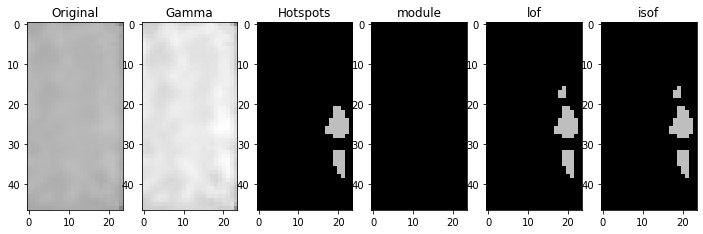

[-0.97981884 -0.97522017 -2.05620332 -1.03675633 -0.98671072 -0.99368875
 -1.18631859 -0.97886303]
[-1.73581688]
[-0.43564236 -0.46190243 -0.62691055 -0.45322675 -0.45428468 -0.43571899
 -0.46792962 -0.4393347 ]
[-0.65432675]
0.0 0
2413.jpg Normal
[-0.98793661 -1.0025574  -1.10918471 -0.99268182 -1.47254834 -0.99268182
 -1.00382684 -0.99137265]
[-1.91118773]
[-0.43506724 -0.44513404 -0.48364851 -0.42953546 -0.56926818 -0.42953546
 -0.43510918 -0.47346144]
[-0.72447509]
0.0 0
4062.jpg Normal
[-1.01506515 -1.02264095 -0.98156259 -1.00154489 -1.00256644 -1.00154489
 -1.03263722 -1.03059012]
[-1.85143439]
[-0.44965288 -0.46112081 -0.45842572 -0.47049904 -0.44728545 -0.47049904
 -0.46236181 -0.47664467]
[-0.70057376]
0.0 0
3725.jpg Normal
[-1.0079598  -1.05123614 -0.97865847 -1.30101966 -0.97865847 -1.72584677
 -0.99846058 -0.97809605]
[-1.88896714]
[-0.44236359 -0.45702658 -0.41145483 -0.50621489 -0.41145483 -0.55568549
 -0.43825885 -0.43289042]
[-0.71558686]
0.0 0
1132.jpg Normal
[-1.6574

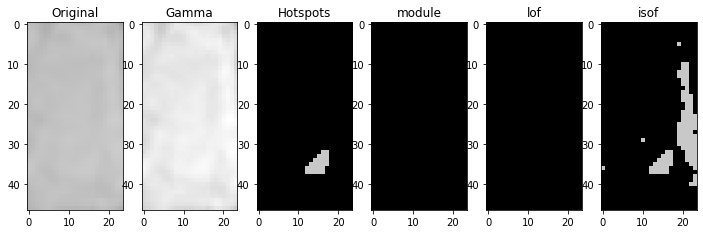

[-1.07462771 -1.19944729 -1.00977971 -1.48043677 -1.01350489 -1.34141015
 -1.05170866 -2.54477405]
[-1.69100393]
[-0.50615194 -0.53052436 -0.46536378 -0.55282499 -0.4783797  -0.55778162
 -0.50307791 -0.66821515]
[-0.63640157]
0.0 0
3043.jpg Normal
[-1.0387311  -0.99121116 -3.74765718 -1.00641916 -1.06558744 -1.03233353
 -0.98947074 -1.01654317]
[-1.73581688]
[-0.46075495 -0.43261728 -0.76186363 -0.4542901  -0.48270402 -0.46313022
 -0.46088891 -0.46083339]
[-0.65432675]
0.0 0
4738.jpg Normal
[-0.97799049 -1.07189458 -1.29025234 -0.9904498  -1.0025574  -0.97799049
 -0.97788014 -1.02561038]
[-1.91118773]
[-0.45129158 -0.49083178 -0.50517854 -0.45059737 -0.44513404 -0.45129158
 -0.44968021 -0.4552717 ]
[-0.72447509]
0.0 0
3057.jpg Normal
[-1.02535605 -0.98177594 -1.57437345 -1.23940446 -0.99158175 -4.08887921
 -0.97439275 -1.07941869]
[-1.69100393]
[-0.47785979 -0.46524495 -0.56299996 -0.53367721 -0.44490261 -0.76237927
 -0.45901517 -0.50081694]
[-0.63640157]
0.0 0
2349.jpg Normal
[-1.0715

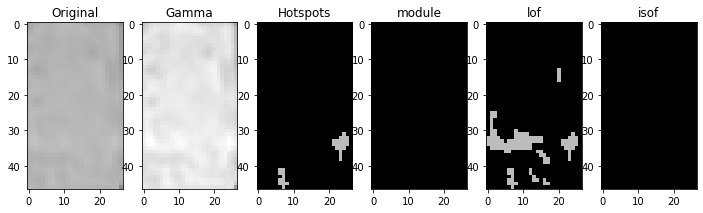

[-0.95798791 -0.95762171 -1.33867247 -0.96361748 -1.09992861 -0.95762171
 -0.9786243  -0.95798791]
[-1.91118773]
[-0.41910946 -0.42953381 -0.45781725 -0.44816453 -0.441626   -0.42953381
 -0.43194853 -0.41910946]
[-0.72447509]
0.0 0
317.jpg Normal
[-1.16680212 -1.0387311  -1.47920681 -1.1123094  -1.00119306 -1.22716885
 -1.08720132 -1.18728473]
[-1.73581688]
[-0.51065176 -0.46075495 -0.53557183 -0.48433392 -0.44245977 -0.50574221
 -0.48104347 -0.49869122]
[-0.65432675]
0.0 0
4923.jpg Normal
[-1.0235937  -1.00317987 -1.00382684 -1.32856521 -1.0235937  -1.01495657
 -1.00089788 -1.00089788]
[-1.91118773]
[-0.48733457 -0.47703366 -0.43510918 -0.55891411 -0.48733457 -0.44196107
 -0.47557788 -0.47557788]
[-0.72447509]
0.0 0
3094.jpg Normal
[-0.99158175 -1.00052792 -1.06474751 -1.00878476 -1.21794746 -0.98583067
 -1.23940446 -0.98177594]
[-1.69100393]
[-0.44490261 -0.46186446 -0.49975153 -0.46121548 -0.54061689 -0.45915966
 -0.53367721 -0.46524495]
[-0.63640157]
0.0 0
471.jpg Normal
[-1.042476

[-0.44001448 -0.51021384 -0.45601316 -0.45650459 -0.54804319 -0.45696891
 -0.46445093 -0.45601316]
[-0.68572467]
0.0 0
511.jpg Normal
[-0.98793661 -0.97349168 -0.98773835 -0.99268182 -0.99054894 -1.00344705
 -1.16413283 -1.00382684]
[-1.91118773]
[-0.43506724 -0.44748766 -0.45444699 -0.42953546 -0.4764915  -0.44891048
 -0.50382734 -0.43510918]
[-0.72447509]
0.0 0
1085.jpg Normal
[-0.97981884 -1.08087667 -0.97886303 -1.50355757 -1.16274131 -1.01654317
 -0.99368875 -0.97835812]
[-1.73581688]
[-0.43564236 -0.48037118 -0.4393347  -0.53147603 -0.49407895 -0.46083339
 -0.43571899 -0.45467999]
[-0.65432675]
0.0 0
3692.jpg Normal
[-1.0020385  -0.99504175 -1.05137882 -0.9948734  -1.03565498 -0.98833925
 -0.9848413  -1.01186264]
[-1.81431168]
[-0.46246031 -0.45826697 -0.50770817 -0.47328219 -0.46305407 -0.42477988
 -0.47663511 -0.48024001]
[-0.68572467]
0.0 2.0 0.0 1.0
17.0 34.485281229019165 0.1796351170676612 0.9492012067912369
0.0 0
4843.jpg Normal
[-0.98949103 -1.         -0.98050203 -1.    

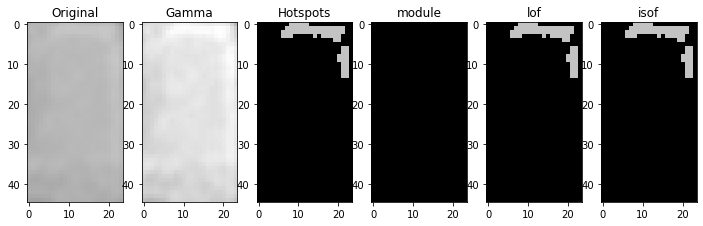

[-1.00924777 -1.00146151 -1.00924777 -1.03105547 -1.00924073 -1.00503954
 -1.00324924 -1.0315961 ]
[-1.69100393]
[-0.47021727 -0.46959506 -0.47021727 -0.51613052 -0.48280781 -0.50279851
 -0.49491915 -0.5121131 ]
[-0.63640157]
0.0 0
1522.jpg Normal
[-1.23593667 -0.97585217 -1.01577849 -1.01286935 -0.97585217 -1.04999787
 -1.08930672 -1.01495657]
[-1.91118773]
[-0.50504567 -0.45437273 -0.44479516 -0.46122126 -0.45437273 -0.47305055
 -0.49714761 -0.44196107]
[-0.72447509]
0.0 0
908.jpg Normal
[-1.03957367 -1.00293534 -1.03841427 -1.04204553 -0.97586991 -1.03957367
 -0.99281643 -1.40624831]
[-1.81431168]
[-0.46565983 -0.42971604 -0.45279556 -0.45362009 -0.42072248 -0.46565983
 -0.46065846 -0.55344834]
[-0.68572467]
0.0 0
1244.jpg Normal
[-1.1777491  -1.02670285 -1.34141015 -0.99688648 -1.12439301 -1.31194764
 -1.07159394 -1.1777491 ]
[-1.69100393]
[-0.52158005 -0.4822647  -0.55778162 -0.44796451 -0.49626548 -0.54884802
 -0.49271383 -0.52158005]
[-0.63640157]
0.0 0
5022.jpg Normal
[-1.02168

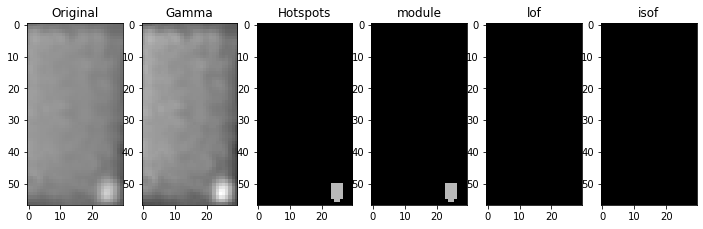

[-1.47810151 -0.99543617 -1.22445345 -0.98665132 -1.25270257 -1.06885152
 -1.13540385 -1.01871639]
[-1.88896714]
[-0.62491294 -0.45457867 -0.54849243 -0.42290758 -0.5638787  -0.48432818
 -0.47210512 -0.43313773]
[-0.71558686]
0.0 0
2957.jpg Normal
[-1.22987382 -0.96843418 -1.16630581 -0.96843418 -0.98829709 -1.22987382
 -1.01346174 -1.07281598]
[-1.83714507]
[-0.51602696 -0.44046161 -0.5272977  -0.44046161 -0.45353684 -0.51602696
 -0.45721672 -0.52938712]
[-0.69485803]
0.0 0
3491.jpg Normal
[-0.98793792 -1.00746623 -1.03781434 -0.99728706 -0.99314699 -0.99862081
 -0.9983734  -1.        ]
[-1.81431168]
[-0.45895353 -0.46662858 -0.47468345 -0.44139516 -0.47994632 -0.46519182
 -0.44322033 -0.43195469]
[-0.68572467]
0.0 0
1251.jpg Normal
[-1.08720132 -1.00369828 -1.31207707 -1.1274768  -1.03233353 -1.14442087
 -1.24799539 -1.04511699]
[-1.73581688]
[-0.48104347 -0.45601394 -0.52249806 -0.49855091 -0.46313022 -0.50011007
 -0.50400743 -0.45714234]
[-0.65432675]
0.0 0
2980.jpg Normal
[-1.1837

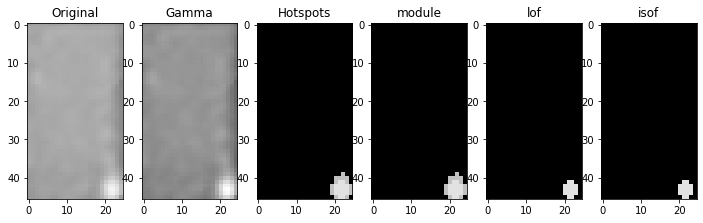

[-1.         -1.01226904 -0.98144441 -0.97858522 -1.10364946 -0.98233659
 -1.00523122 -0.99210825]
[-1.69100393]
[-0.44515211 -0.47037729 -0.46284514 -0.45597758 -0.50078461 -0.46109915
 -0.47570779 -0.44514168]
[-0.63640157]
0.0 0
3334.jpg Normal
[-0.99784958 -1.13540385 -0.97865847 -1.00220569 -0.99885683 -0.99784958
 -1.04112975 -0.99729943]
[-1.88896714]
[-0.45731745 -0.47210512 -0.41145483 -0.45111976 -0.47539094 -0.45731745
 -0.49743494 -0.4554005 ]
[-0.71558686]
0.0 0
2994.jpg Normal
[-1.14489288 -1.32087646 -1.07281598 -0.97202503 -1.46206436 -1.22987382
 -1.22987382 -0.96170218]
[-1.83714507]
[-0.53285401 -0.55319242 -0.52938712 -0.44240889 -0.61191976 -0.51602696
 -0.51602696 -0.47357993]
[-0.69485803]
0.0 0
3452.jpg Normal
[-1.05648064 -0.99121116 -1.00369828 -0.97981884 -1.00641916 -1.08720132
 -2.68723697 -1.0387311 ]
[-1.73581688]
[-0.48578074 -0.43261728 -0.45601394 -0.43564236 -0.4542901  -0.48104347
 -0.67490392 -0.46075495]
[-0.65432675]
0.0 0
5023.jpg Normal
[-0.9665

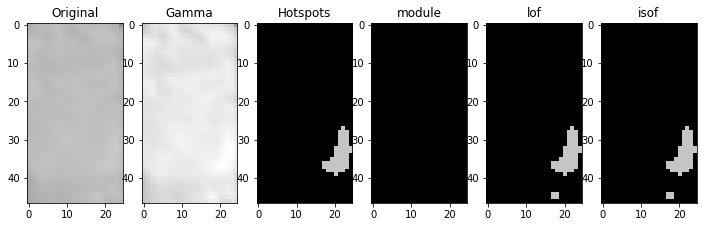

[-1.0973272  -1.22445345 -0.99729943 -1.22445345 -1.37975425 -1.06885152
 -0.99212986 -0.98665132]
[-1.88896714]
[-0.50869803 -0.54849243 -0.4554005  -0.54849243 -0.56700504 -0.48432818
 -0.46499182 -0.42290758]
[-0.71558686]
0.0 0
2764.jpg Normal
[-0.98318733 -1.00306345 -1.08748801 -0.99441402 -1.03145581 -1.00287587
 -1.026361   -0.99433323]
[-1.81431168]
[-0.44454984 -0.44453278 -0.4909926  -0.45072892 -0.4767271  -0.45601316
 -0.46445093 -0.46848831]
[-0.68572467]
0.0 0
921.jpg Normal
[-1.04204553 -1.00293534 -0.98689709 -0.98833925 -1.00293534 -0.97586991
 -0.98908597 -0.98833925]
[-1.81431168]
[-0.45362009 -0.42971604 -0.41618191 -0.42477988 -0.42971604 -0.42072248
 -0.432431   -0.42477988]
[-0.68572467]
0.0 0
2002.jpg Normal
[-0.98835091 -1.00641916 -0.97835812 -0.98947074 -1.00055163 -1.00641916
 -1.0387311  -0.9878517 ]
[-1.73581688]
[-0.45172757 -0.4542901  -0.45467999 -0.46088891 -0.44968686 -0.4542901
 -0.46075495 -0.42785606]
[-0.65432675]
0.0 0
4473.jpg Normal
[-1.      

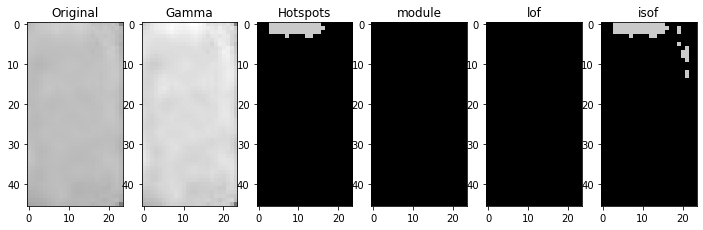

[-1.04112975 -0.99081438 -1.00393711 -1.00805416 -1.00220569 -1.05123614
 -1.13642249 -1.04112975]
[-1.88896714]
[-0.49743494 -0.43021546 -0.46789894 -0.45056952 -0.45111976 -0.45702658
 -0.49903908 -0.49743494]
[-0.71558686]
0.0 0
1735.jpg Normal
[-1.07137273 -0.99728706 -0.98949103 -1.38274996 -1.01127223 -0.98284496
 -1.12794498 -1.03858935]
[-1.81431168]
[-0.50296398 -0.44139516 -0.4520296  -0.56199995 -0.49495197 -0.45424384
 -0.48101785 -0.50888262]
[-0.68572467]
0.0 0
3122.jpg Normal
[-1.01995345 -1.0005118  -0.99688648 -0.98254531 -1.         -0.99688648
 -1.02496089 -0.98233659]
[-1.69100393]
[-0.45975119 -0.47223607 -0.44796451 -0.47345694 -0.44515211 -0.44796451
 -0.44966483 -0.46109915]
[-0.63640157]
0.0 0
4895.jpg Normal
[-1.09770537 -1.00989346 -1.20590498 -0.99368875 -1.1123094  -1.20590498
 -1.26913819 -1.04511699]
[-1.73581688]
[-0.49907209 -0.44727677 -0.49813556 -0.43571899 -0.48433392 -0.49813556
 -0.51835468 -0.45714234]
[-0.65432675]
0.0 0
3644.jpg Normal
[-1.6615

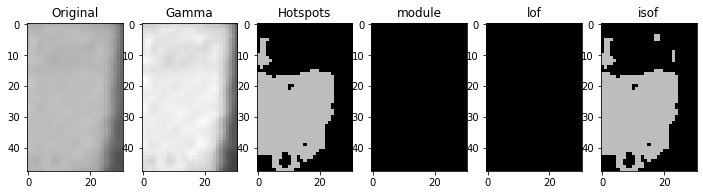

[-1.18954226 -1.00805416 -0.99846058 -1.00339119 -1.06885152 -1.00805416
 -1.01823634 -2.07269939]
[-1.88896714]
[-0.54341245 -0.45056952 -0.43825885 -0.49802977 -0.48432818 -0.45056952
 -0.45742712 -0.63300556]
[-0.71558686]
0.0 0
2566.jpg Normal
[-0.98491213 -0.99368875 -1.09476512 -0.99121116 -0.97912084 -0.99511343
 -0.98489841 -0.99121116]
[-1.73581688]
[-0.44307091 -0.43571899 -0.46919688 -0.43261728 -0.43828425 -0.46515619
 -0.45515325 -0.43261728]
[-0.65432675]
0.0 0
3678.jpg Normal
[-1.72728416 -1.00714844 -0.97935869 -3.25513824 -1.1438929  -1.05411846
 -1.00682043 -0.98982818]
[-1.83714507]
[-0.57087324 -0.46488639 -0.45628115 -0.76289526 -0.50270438 -0.46320129
 -0.43832277 -0.45168469]
[-0.69485803]
0.0 0
4117.jpg Normal
[-0.98144441 -1.         -1.00006916 -3.74814426 -1.00338554 -1.10364946
 -1.02496089 -1.02670285]
[-1.69100393]
[-0.46284514 -0.45185083 -0.46936063 -0.7578271  -0.46088332 -0.50078461
 -0.44966483 -0.4822647 ]
[-0.63640157]
0.0 0
2572.jpg Normal
[-0.9986

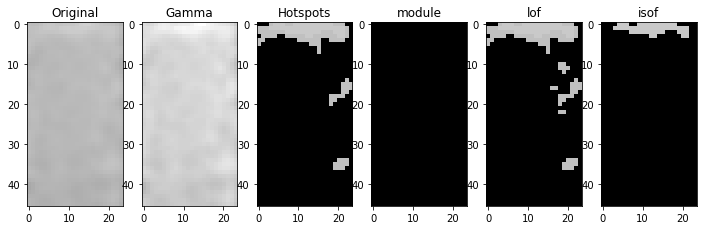

[-0.96196009 -0.96655844 -0.96356718 -0.97577918 -0.96196009 -1.60115111
 -0.98812934 -0.97101475]
[-1.83714507]
[-0.41136383 -0.43026345 -0.43962637 -0.42768478 -0.41136383 -0.65111962
 -0.42502638 -0.43090574]
[-0.69485803]
0.0 0
470.jpg Normal
[-1.01537309 -0.99099339 -1.00746623 -1.0278707  -1.01392463 -1.01127223
 -0.99187846 -0.99921569]
[-1.81431168]
[-0.47466807 -0.46755744 -0.46662858 -0.46780749 -0.47463356 -0.49495197
 -0.47813433 -0.44387598]
[-0.68572467]
0.0 0
4088.jpg Normal
[-0.99308187 -0.99430627 -2.30570144 -0.98338173 -1.01117954 -1.2440458
 -1.00977971 -0.98144441]
[-1.69100393]
[-0.47177494 -0.46246176 -0.63962724 -0.45087136 -0.4666599  -0.54404509
 -0.46536378 -0.46284514]
[-0.63640157]
0.0 0
464.jpg Normal
[-1.26623483 -1.36854198 -1.07387946 -1.7068143  -1.3991283  -1.02508071
 -1.18263079 -1.26623483]
[-1.9128832]
[-0.53291788 -0.559849   -0.48057132 -0.61863297 -0.57293765 -0.45812945
 -0.52095838 -0.53291788]
[-0.72515328]
0.0 0
1696.jpg Normal
[-1.03675633

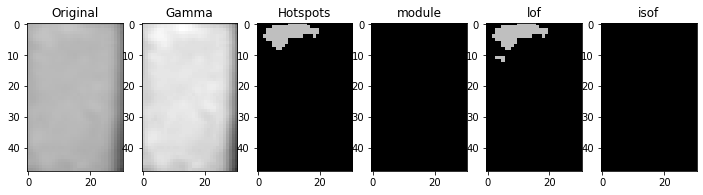

[-1.51277919 -0.99784958 -0.97865847 -0.99784958 -1.00088509 -1.01239632
 -1.00077331 -1.00220569]
[-1.88896714]
[-0.53884119 -0.45731745 -0.41145483 -0.45731745 -0.46612308 -0.44901288
 -0.44065512 -0.45111976]
[-0.71558686]
0.0 0
3042.jpg Normal
[-1.01407037 -1.81390529 -1.04792453 -3.4742485  -1.10396791 -1.18201314
 -2.49233038 -1.40624831]
[-1.81431168]
[-0.46948599 -0.6291777  -0.46739067 -0.76265073 -0.49959682 -0.50156307
 -0.66479862 -0.55344834]
[-0.68572467]
0.0 0
1655.jpg Normal
[-0.98166498 -0.99921569 -0.99021416 -0.99921569 -0.98050203 -0.99411597
 -1.64000192 -1.        ]
[-1.81431168]
[-0.43919203 -0.44387598 -0.43991407 -0.44387598 -0.45455196 -0.46272463
 -0.58941648 -0.43195469]
[-0.68572467]
0.0 0
2374.jpg Normal
[-0.98235658 -1.12210979 -1.06575242 -1.31794376 -1.00309814 -1.12210979
 -1.042139   -1.18539376]
[-1.83714507]
[-0.43544553 -0.52648108 -0.48390066 -0.58306291 -0.44793036 -0.52648108
 -0.48926582 -0.57803245]
[-0.69485803]
0.0 0
4705.jpg Normal
[-1.0134

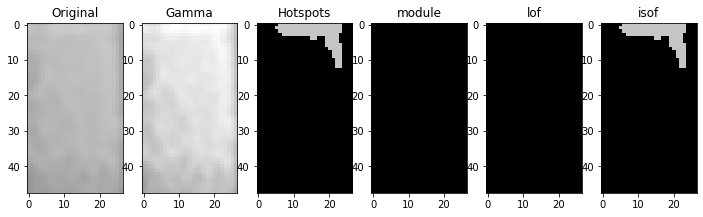

[-1.63356397 -1.10174951 -3.15014041 -1.43300938 -1.30101966 -2.4550506
 -2.02268306 -1.91926003]
[-1.88896714]
[-0.53803178 -0.48408478 -0.74091597 -0.53160368 -0.50621489 -0.66507633
 -0.62127815 -0.60426947]
[-0.71558686]
0.0 0
2412.jpg Normal
[-1.65177106 -1.02544949 -1.00006916 -0.99210825 -1.29174439 -1.31194764
 -1.33986142 -3.12079906]
[-1.69100393]
[-0.62257295 -0.47414348 -0.46936063 -0.44514168 -0.55756972 -0.54884802
 -0.56299893 -0.71692783]
[-0.63640157]
0.0 0
4077.jpg Normal
[-1.00938208 -1.22928004 -1.29641124 -1.01230928 -0.97753344 -0.97485927
 -1.12683972 -3.74274049]
[-1.83714507]
[-0.46089096 -0.49750695 -0.52591185 -0.46844031 -0.45208807 -0.43996062
 -0.48599496 -0.78435427]
[-0.69485803]
0.0 0
3718.jpg Normal
[-1.02147597 -1.00134462 -1.11407979 -1.0829014  -1.00165983 -1.01507813
 -0.98864744 -1.02147597]
[-1.9128832]
[-0.45623676 -0.44011017 -0.47487886 -0.48308795 -0.44136131 -0.4597035
 -0.42423507 -0.45623676]
[-0.72515328]
0.0 0
2406.jpg Normal
[-1.3623006

[-0.44958393 -0.47210512 -0.43313773 -0.53069535 -0.44065512 -0.43289042
 -0.43154547 -0.43825885]
[-0.71558686]
0.0 0
2610.jpg Normal
[-1.02805987 -0.99680367 -1.14825583 -0.99028681 -1.01714357 -1.26279855
 -1.04136793 -1.42584126]
[-1.81431168]
[-0.49582288 -0.46140768 -0.52916763 -0.4729134  -0.45324278 -0.52192105
 -0.493864   -0.58205774]
[-0.68572467]
0.0 0
4261.jpg Normal
[-1.06568733 -0.98590219 -1.07476093 -0.97586991 -1.62413357 -1.02404104
 -0.98833925 -1.12978777]
[-1.81431168]
[-0.46943918 -0.43667259 -0.4774898  -0.42072248 -0.58118876 -0.44899395
 -0.42477988 -0.50757903]
[-0.68572467]
0.0 0
855.jpg Normal
[-1.03862721 -1.23593667 -0.97488102 -1.47254834 -1.10918471 -1.11970254
 -1.57774228 -0.989417  ]
[-1.91118773]
[-0.46922618 -0.50504567 -0.42614807 -0.56926818 -0.48364851 -0.48617221
 -0.59734734 -0.46082778]
[-0.72447509]
0.0 0
1319.jpg Normal
[-0.97886303 -1.06551582 -0.99511343 -0.97912084 -0.99368875 -0.97981884
 -1.24799539 -0.97835812]
[-1.73581688]
[-0.43933

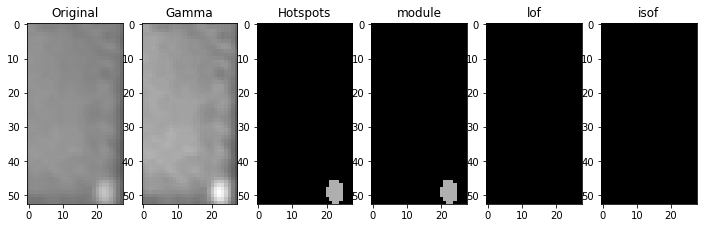

[-0.98504925 -1.01543707 -1.00318633 -0.98474594 -1.02863889 -1.001186
 -1.00318633 -1.02280439]
[-1.9128832]
[-0.43181208 -0.4536277  -0.43183068 -0.4162589  -0.46877726 -0.42898477
 -0.43183068 -0.45639222]
[-0.72515328]
0.0 0
843.jpg Normal
[-0.97101475 -0.98812934 -0.96275867 -1.04330637 -0.98812934 -0.97422513
 -0.96423365 -1.19726759]
[-1.83714507]
[-0.42392499 -0.43189409 -0.41276357 -0.47819406 -0.4488061  -0.41960175
 -0.42712876 -0.53239216]
[-0.69485803]
0.0 0
1469.jpg Normal
[-0.99281643 -1.02094291 -1.04204553 -0.9993336  -1.0020385  -1.59896404
 -1.03957367 -1.00293534]
[-1.81431168]
[-0.46065846 -0.45900358 -0.45362009 -0.47447575 -0.46246031 -0.57064852
 -0.46565983 -0.42971604]
[-0.68572467]
0.0 0
2160.jpg Normal
[-0.99832053 -1.01052846 -0.97799049 -1.00089788 -1.00525424 -1.081779
 -1.23593667 -0.99696043]
[-1.91118773]
[-0.49021928 -0.45059093 -0.45129158 -0.47557788 -0.45713099 -0.49821424
 -0.50504567 -0.47792431]
[-0.72447509]
0.0 0
4511.jpg Normal
[-0.98829709 -

[-1.21936838 -0.99314699 -1.04893755 -0.9765473  -1.11595955 -0.9983734
 -1.03338738 -1.07137273]
[-1.81431168]
[-0.54236936 -0.47994632 -0.49922801 -0.43344314 -0.51319183 -0.44322033
 -0.47019077 -0.50296398]
[-0.68572467]
0.0 0
3068.jpg Normal
[-1.00812515 -0.99305517 -1.00662336 -1.00515543 -0.98225913 -1.10595818
 -1.00164854 -0.97017076]
[-1.9128832]
[-0.45605717 -0.44473426 -0.46007743 -0.48621172 -0.44410294 -0.49794997
 -0.47597678 -0.44512715]
[-0.72515328]
0.0 0
2376.jpg Normal
[-0.96524658 -1.00773895 -0.99377682 -0.96138075 -0.9828411  -0.96170218
 -1.04959499 -0.96843418]
[-1.83714507]
[-0.47251276 -0.48400546 -0.48287381 -0.45854574 -0.43529149 -0.47357993
 -0.47213615 -0.44046161]
[-0.69485803]
0.0 0
4713.jpg Normal
[-1.04057337 -1.20859837 -1.03484795 -1.3760646  -0.99277474 -1.14831073
 -1.05411846 -1.09581006]
[-1.83714507]
[-0.47196408 -0.53304246 -0.47960505 -0.57290265 -0.44371037 -0.53294951
 -0.46320129 -0.52562632]
[-0.69485803]
0.0 0
2362.jpg Normal
[-0.986632

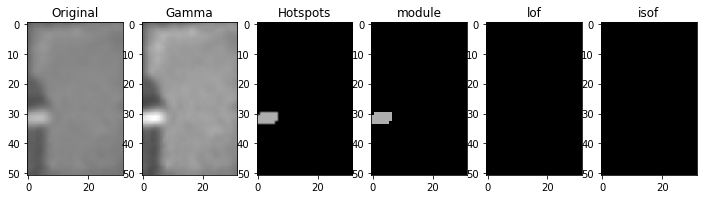

[-0.97677722 -1.01227891 -1.13648827 -0.98421136 -0.993455   -1.00050732
 -0.98839411 -1.03470969]
[-1.76166564]
[-0.47528421 -0.44725935 -0.48589735 -0.46721373 -0.48882653 -0.46410503
 -0.44308897 -0.45375638]
[-0.66466626]
0.0 0
4075.jpg Normal
[-1.02143662 -0.97866874 -1.01524626 -0.97728245 -1.02241447 -1.02784303
 -1.00410793 -0.98713693]
[-1.88896714]
[-0.46418728 -0.44293312 -0.4403334  -0.44406604 -0.45421274 -0.46996977
 -0.45385517 -0.43904983]
[-0.71558686]
0.0 0
1125.jpg Normal
[-1.22685364 -0.99092748 -1.03755754 -1.0020385  -1.11849495 -1.35226168
 -1.18109613 -1.18201314]
[-1.81431168]
[-0.54371041 -0.46706867 -0.51237259 -0.46246031 -0.51559619 -0.59375043
 -0.55495698 -0.50156307]
[-0.68572467]
0.0 0
3732.jpg Normal
[-1.31577351 -1.01392463 -1.14007168 -1.03858935 -1.14007168 -1.1084484
 -1.24623094 -1.19359527]
[-1.81431168]
[-0.55891686 -0.47463356 -0.52486559 -0.50888262 -0.52486559 -0.48804772
 -0.55987266 -0.53998472]
[-0.68572467]
0.0 0
3054.jpg Normal
[-1.13458

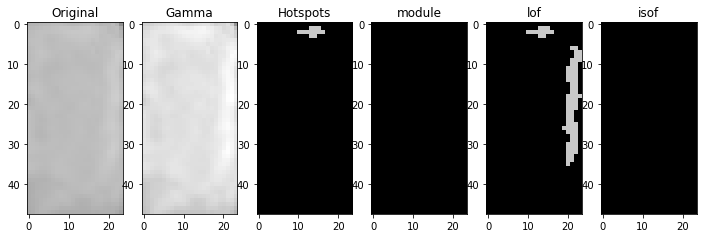

[-1.07555522 -1.04727358 -1.05990993 -0.98789845 -1.04379024 -1.05662214
 -1.04379024 -1.02947666]
[-1.83714507]
[-0.50842818 -0.47876951 -0.53085502 -0.44609392 -0.51426129 -0.48219744
 -0.51426129 -0.49032616]
[-0.69485803]
0.0 0
3040.jpg Normal
[-0.98663585 -1.05325367 -1.0209152  -1.17291625 -1.026361   -0.97469113
 -1.17291625 -1.02805987]
[-1.81431168]
[-0.46915315 -0.52816065 -0.45696891 -0.5146169  -0.46445093 -0.46603269
 -0.5146169  -0.49582288]
[-0.68572467]
0.0 0
2438.jpg Normal
[-0.99092748 -1.03385547 -0.97787413 -1.03841427 -1.0020385  -1.02161216
 -1.01109069 -0.99504175]
[-1.81431168]
[-0.46706867 -0.46780968 -0.44164094 -0.45279556 -0.46246031 -0.49936931
 -0.45236514 -0.45826697]
[-0.68572467]
0.0 0
3726.jpg Normal
[-1.36854198 -1.14353034 -1.7068143  -1.00318633 -1.4314782  -1.53981003
 -1.24787138 -1.03918361]
[-1.9128832]
[-0.559849   -0.49734138 -0.61863297 -0.43183068 -0.57262127 -0.58592635
 -0.51750446 -0.49478096]
[-0.72515328]
0.0 0
4049.jpg Normal
[-2.64492

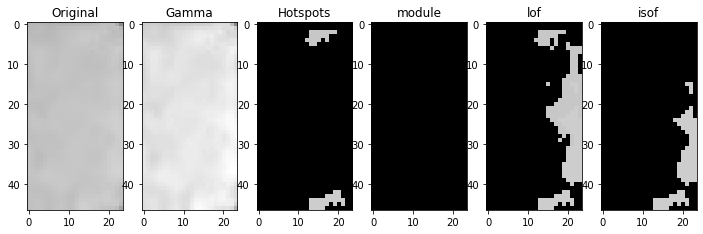

[-1.05452657 -1.16716387 -0.97859849 -0.98982818 -1.04091851 -0.99550243
 -1.05411846 -0.97935869]
[-1.83714507]
[-0.48471952 -0.52593621 -0.48028322 -0.45168469 -0.51280024 -0.45316379
 -0.46320129 -0.45628115]
[-0.69485803]
0.0 0
4908.jpg Normal
[-1.02106439 -0.97815562 -1.0963549  -1.001186   -1.00119406 -1.00318633
 -4.35061165 -0.97527423]
[-1.9128832]
[-0.44712423 -0.42715838 -0.49032787 -0.42898477 -0.44884084 -0.43183068
 -0.77773059 -0.41959936]
[-0.72515328]
0.0 0
3901.jpg Normal
[-1.00293534 -1.00774799 -1.53891741 -0.99959967 -0.989393   -0.989393
 -1.09095543 -1.07476093]
[-1.81431168]
[-0.42971604 -0.44419436 -0.56620236 -0.45359051 -0.4202842  -0.4202842
 -0.48740342 -0.4774898 ]
[-0.68572467]
0.0 0
3929.jpg Normal
[-0.97853013 -1.0209152  -1.44729002 -0.99441402 -0.97853013 -2.43636416
 -1.01426968 -1.04632169]
[-1.81431168]
[-0.44276479 -0.45696891 -0.57215089 -0.45072892 -0.44276479 -0.69231909
 -0.45598406 -0.46929689]
[-0.68572467]
0.0 0
472.jpg Normal
[-1.34996383 

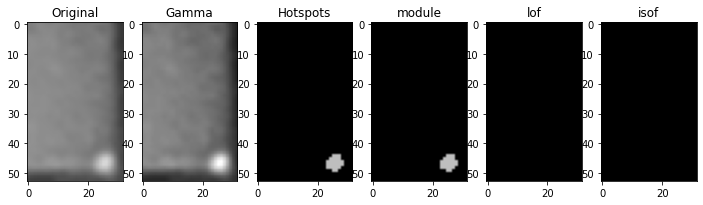

[-1.04893755 -1.01537309 -1.         -1.01103782 -1.01583145 -1.07137273
 -1.64000192 -1.0278707 ]
[-1.81431168]
[-0.49922801 -0.47466807 -0.43195469 -0.48774017 -0.49951362 -0.50296398
 -0.58941648 -0.46780749]
[-0.68572467]
0.0 0
1694.jpg Normal
[-1.07476093 -1.00120591 -1.53891741 -1.00120591 -1.03001276 -0.99336338
 -1.09095543 -1.23838485]
[-1.81431168]
[-0.4774898  -0.44480359 -0.56620236 -0.44480359 -0.46179925 -0.43681679
 -0.48740342 -0.5129461 ]
[-0.68572467]
0.0 0
466.jpg Normal
[-1.02863889 -1.11407979 -1.001186   -1.02527962 -0.98474594 -0.97758886
 -0.98504925 -1.11407979]
[-1.9128832]
[-0.46877726 -0.47487886 -0.42898477 -0.47680594 -0.4162589  -0.41634333
 -0.43181208 -0.47487886]
[-0.72515328]
0.0 0
4115.jpg Normal
[-0.98368267 -1.08561702 -0.96138075 -1.08561702 -1.25931585 -0.98741303
 -0.99645358 -1.01346174]
[-1.83714507]
[-0.47811525 -0.54431787 -0.45854574 -0.54431787 -0.53240215 -0.46016142
 -0.44927646 -0.45721672]
[-0.69485803]
0.0 0
2564.jpg Normal
[-0.995604

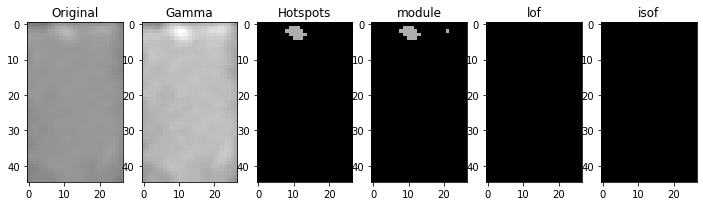

[-1.001186   -0.9974913  -0.98474594 -0.97694288 -0.98504925 -1.07560034
 -1.00318633 -1.84223182]
[-1.9128832]
[-0.42898477 -0.43789844 -0.4162589  -0.41819658 -0.43181208 -0.47059675
 -0.43183068 -0.62252056]
[-0.72515328]
0.0 0
3646.jpg Normal
[-0.99785357 -1.00021991 -1.13005553 -0.98225913 -0.99305517 -0.99511917
 -1.49507748 -0.99486389]
[-1.9128832]
[-0.45086239 -0.45370411 -0.48375538 -0.44410294 -0.44473426 -0.46205788
 -0.54789824 -0.4700637 ]
[-0.72515328]
0.0 0
2558.jpg Normal
[-0.97941515 -0.99441402 -1.01723848 -1.0209152  -1.01723848 -1.20035019
 -0.97941515 -1.01878621]
[-1.81431168]
[-0.46843108 -0.45072892 -0.48028211 -0.45696891 -0.48028211 -0.51847597
 -0.46843108 -0.46299826]
[-0.68572467]
0.0 0
4897.jpg Normal
[-0.97586991 -1.04792453 -0.98833925 -0.99959967 -0.99312844 -0.98689709
 -1.25357574 -0.99486978]
[-1.81431168]
[-0.42072248 -0.46739067 -0.42477988 -0.45359051 -0.4597912  -0.41618191
 -0.52803072 -0.43155382]
[-0.68572467]
0.0 0
3120.jpg Normal
[-1.062521

[-0.95008405 -0.99113601 -1.09419116 -0.95990555 -0.95251085 -1.25485814
 -0.97193172 -1.00888574]
[-1.83299977]
[-0.44855085 -0.44510247 -0.44920301 -0.43408703 -0.42206799 -0.47574747
 -0.43527138 -0.45475748]
[-0.69319991]
0.0 0
2766.jpg Normal
[-0.98839411 -1.04268944 -0.96999844 -0.99147106 -0.98421136 -0.99228664
 -1.46797044 -0.96846552]
[-1.76166564]
[-0.44308897 -0.47089812 -0.44523213 -0.45598168 -0.46721373 -0.46988407
 -0.54232102 -0.44106595]
[-0.66466626]
0.0 0
3478.jpg Normal
[-1.00043026 -1.02358311 -0.98343686 -1.02143662 -1.00548416 -0.9744996
 -1.02241447 -0.99004454]
[-1.88896714]
[-0.46635526 -0.45701334 -0.46231143 -0.46418728 -0.4555731  -0.45418398
 -0.45421274 -0.46955197]
[-0.71558686]
0.0 0
4317.jpg Normal
[-0.98561872 -0.99675924 -0.98284496 -1.01392463 -1.0278707  -1.03928549
 -0.99187846 -1.00746623]
[-1.81431168]
[-0.4668241  -0.47824912 -0.45424384 -0.47463356 -0.46780749 -0.49811871
 -0.47813433 -0.46662858]
[-0.68572467]
0.0 0
2772.jpg Normal
[-0.96852

[-1.18182695 -1.07880894 -1.56775287 -1.00590789 -1.11368453 -1.36750695
 -1.23076251 -1.3114139 ]
[-1.83299977]
[-0.46409985 -0.45544428 -0.5715369  -0.44601868 -0.46425253 -0.50348585
 -0.46462528 -0.4874392 ]
[-0.69319991]
0.0 0
1285.jpg Normal
[-0.9779877  -0.97701328 -1.01524626 -0.98550466 -2.384198   -0.97343064
 -1.00799448 -1.00996405]
[-1.88896714]
[-0.45817972 -0.46426366 -0.4403334  -0.47188477 -0.64028081 -0.48309895
 -0.45945527 -0.45967437]
[-0.71558686]
0.0 0
2954.jpg Normal
[-1.0883049  -1.01704007 -1.42225524 -1.19359527 -1.03338738 -0.98949103
 -1.07137273 -1.16440591]
[-1.81431168]
[-0.51425085 -0.48694879 -0.5642891  -0.53998472 -0.47019077 -0.4520296
 -0.50296398 -0.53020279]
[-0.68572467]
0.0 0
3492.jpg Normal
[-1.06138832 -0.97193172 -0.98324671 -1.22481286 -1.4738676  -1.11747403
 -0.95155322 -1.15527747]
[-1.83299977]
[-0.46655449 -0.43527138 -0.45980806 -0.48809632 -0.50745577 -0.47874616
 -0.41971043 -0.49152226]
[-0.69319991]
0.0 0
2798.jpg Normal
[-1.00453

[-0.44737745 -0.43500314 -0.42564278 -0.43689975 -0.43223297 -0.71540231
 -0.45544428 -0.44380815]
[-0.69319991]
0.0 0
4316.jpg Normal
[-0.9901206  -1.26198607 -0.94761293 -1.05489921 -1.09446581 -0.96149937
 -1.00607402 -1.54118612]
[-1.76166564]
[-0.41945084 -0.49356521 -0.43048781 -0.44685739 -0.4837111  -0.41529025
 -0.4109345  -0.55033722]
[-0.66466626]
0.0 0
3479.jpg Normal
[-0.99330893 -0.97866874 -0.98611908 -1.11980515 -1.01032611 -2.09065897
 -1.00002304 -0.98124689]
[-1.88896714]
[-0.44185467 -0.44293312 -0.44407001 -0.47500518 -0.45518909 -0.59804502
 -0.45453581 -0.44293555]
[-0.71558686]
0.0 0
2767.jpg Normal
[-1.02094911 -1.02947666 -1.05543535 -1.02947666 -1.04091851 -0.98089396
 -1.03850215 -1.04640332]
[-1.83714507]
[-0.46455096 -0.49032616 -0.48852962 -0.49032616 -0.51280024 -0.43622019
 -0.50838279 -0.48930543]
[-0.69485803]
0.0 0
5008.jpg Normal
[-1.19866522 -1.26564517 -1.12369878 -1.18222385 -1.36246205 -1.28868589
 -1.15658048 -1.10968313]
[-1.78206358]
[-0.5083

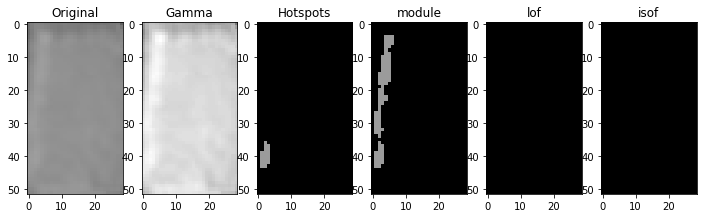

[-0.99441402 -1.0133736  -1.38644748 -1.0133736  -1.0281429  -0.97853013
 -0.98856719 -1.01878621]
[-1.81431168]
[-0.45072892 -0.448412   -0.55290857 -0.448412   -0.46846604 -0.44276479
 -0.45780642 -0.46299826]
[-0.68572467]
0.0 0
1093.jpg Normal
[-1.31787286 -1.0138337  -1.1077511  -1.09471873 -0.96416368 -1.22496426
 -0.97197284 -1.22496426]
[-1.82039509]
[-0.56451619 -0.47339498 -0.52086904 -0.50678423 -0.42798489 -0.50972073
 -0.46679369 -0.50972073]
[-0.68815803]
0.0 0
3684.jpg Normal
[-0.99451365 -0.99110608 -0.9881879  -1.18015164 -0.98359303 -0.98982818
 -0.97485927 -1.00682043]
[-1.83714507]
[-0.46857914 -0.44391019 -0.45565694 -0.49247384 -0.43678239 -0.45168469
 -0.43996062 -0.43832277]
[-0.69485803]
0.0 0
4855.jpg Normal
[-1.20592135 -0.96941457 -1.05188051 -0.97839623 -0.96941457 -0.97677229
 -0.99245897 -0.98322252]
[-1.83299977]
[-0.45096949 -0.43762954 -0.43971442 -0.42564278 -0.43762954 -0.43500314
 -0.42705442 -0.43961797]
[-0.69319991]
0.0 0
261.jpg Normal
[-0.97011

[-0.95747114 -1.00888574 -0.95990555 -1.13632483 -3.01838509 -1.1507771
 -0.95990555 -1.00128726]
[-1.83299977]
[-0.4280741  -0.45475748 -0.43408703 -0.47401028 -0.69002077 -0.46228215
 -0.43408703 -0.44908376]
[-0.69319991]
0.0 0
3082.jpg Normal
[-1.00957333 -1.00410793 -1.02241447 -0.97197798 -0.97866874 -1.01625166
 -0.99330893 -0.9779877 ]
[-1.88896714]
[-0.4592887  -0.45385517 -0.45421274 -0.43833753 -0.44293312 -0.45322694
 -0.44185467 -0.45817972]
[-0.71558686]
0.0 0
4935.jpg Normal
[-1.00164854 -0.99560466 -1.00910664 -0.98673542 -1.0044647  -1.3463073
 -1.00662336 -0.9952061 ]
[-1.9128832]
[-0.47597678 -0.43978916 -0.46596865 -0.4719678  -0.46868817 -0.52419552
 -0.46007743 -0.45782408]
[-0.72515328]
0.0 0
467.jpg Normal
[-0.97149334 -0.97509486 -1.02630965 -0.99448108 -1.0120754  -0.98138604
 -0.9984482  -1.688664  ]
[-1.82039509]
[-0.46349358 -0.45080654 -0.45185176 -0.47340998 -0.46573308 -0.44693361
 -0.46611012 -0.59829133]
[-0.68815803]
0.0 0
473.jpg Normal
[-1.00616676 

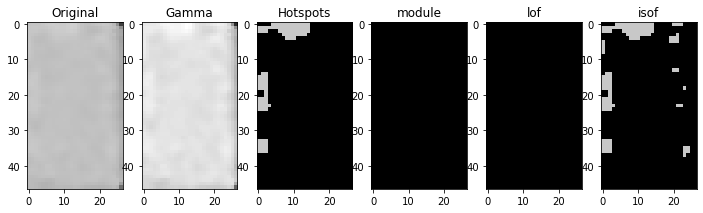

[-0.9701156  -1.00427906 -1.16934522 -1.02177085 -1.01369807 -0.96605711
 -0.99890199 -0.98703491]
[-1.86224249]
[-0.46348904 -0.44877157 -0.50044755 -0.48225103 -0.45427155 -0.45609835
 -0.44846937 -0.4340381 ]
[-0.704897]
15.5 17.071067690849304 0.6683749941974539 0.9698915231888942
15.5 17.071067690849304 0.6683749941974539 0.9698915231888942
24.0 0
3727.jpg Junction-Box-Error


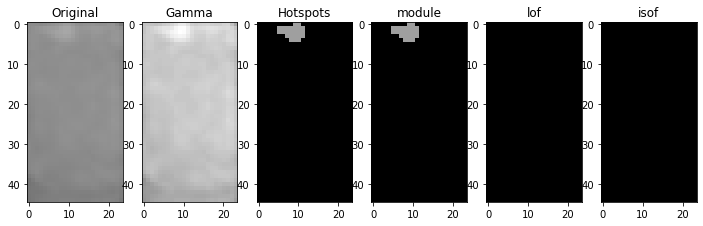

[-0.98726833 -1.02041157 -0.98359303 -0.99166482 -0.98089396 -1.68288943
 -0.97485927 -0.9881879 ]
[-1.83714507]
[-0.4710645  -0.45918912 -0.43678239 -0.46144174 -0.43622019 -0.56334184
 -0.43996062 -0.45565694]
[-0.69485803]
0.0 0
2439.jpg Normal
[-1.77462915 -0.97463748 -1.06443662 -2.8946968  -0.97020487 -1.13767981
 -1.28272876 -0.96995921]
[-1.83299977]
[-0.58097316 -0.43069336 -0.44505135 -0.71540231 -0.44745335 -0.47377958
 -0.47910658 -0.43599317]
[-0.69319991]
0.0 0
3733.jpg Normal
[-0.95053064 -1.04066788 -0.96149937 -1.31225749 -0.94894011 -0.9901206
 -1.14238524 -1.00607402]
[-1.76166564]
[-0.42377124 -0.44234303 -0.41529025 -0.52831605 -0.44874328 -0.41945084
 -0.4613801  -0.4109345 ]
[-0.66466626]
0.0 0
1124.jpg Normal
[-1.01483693 -0.98653243 -1.02358311 -0.97728245 -1.01422783 -0.99004454
 -1.00043026 -1.1049278 ]
[-1.88896714]
[-0.46460722 -0.46377585 -0.45701334 -0.44406604 -0.46829326 -0.46955197
 -0.46635526 -0.49413946]
[-0.71558686]
0.0 0
1642.jpg Normal
[-1.11595

[-0.44443161 -0.47245646 -0.45227432 -0.47282704 -0.43147581 -0.48422111
 -0.43532816 -0.47301135]
[-0.68815803]
0.0 0
1454.jpg Normal
[-0.99750452 -1.0057033  -0.96941457 -0.99245897 -0.97839623 -1.00496504
 -0.97677229 -0.9816063 ]
[-1.83299977]
[-0.45032066 -0.44483563 -0.43762954 -0.42705442 -0.42564278 -0.44949199
 -0.43500314 -0.43602516]
[-0.69319991]
0.0 0
3243.jpg Normal
[-1.04151347 -0.99921569 -0.99166158 -1.0029599  -0.99732181 -0.99862081
 -1.01215206 -2.40770816]
[-1.81431168]
[-0.47586226 -0.44387598 -0.47519506 -0.4563226  -0.46225005 -0.46519182
 -0.47385786 -0.70664342]
[-0.68572467]
0.0 0
4538.jpg Normal
[-1.00384698 -1.41207391 -0.99946369 -1.0344379  -2.79943089 -1.02583719
 -1.00231631 -0.96895277]
[-1.86224249]
[-0.46339846 -0.50843069 -0.44633559 -0.48082606 -0.64299582 -0.45576602
 -0.46606879 -0.43036143]
[-0.704897]
0.0 0
3257.jpg Normal
[-0.99387034 -0.97753344 -0.98359303 -1.3200098  -1.00682043 -0.99110608
 -0.97485927 -1.01049904]
[-1.83714507]
[-0.441298

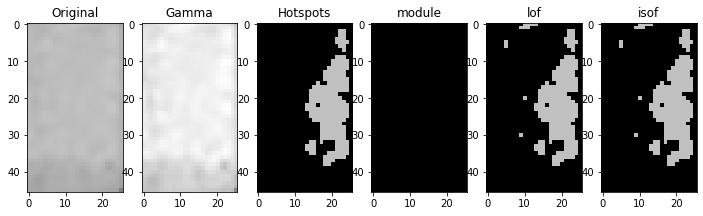

[-1.01223251 -0.98808132 -1.10968313 -1.03398064 -0.97121688 -0.99128726
 -0.98123257 -2.24992895]
[-1.78206358]
[-0.49159621 -0.46997075 -0.49926384 -0.47993628 -0.46603329 -0.49940523
 -0.47139412 -0.6670307 ]
[-0.67282543]
0.0 0
842.jpg Normal
[-1.03314967 -1.10708449 -0.99820206 -1.16443751 -2.24009454 -1.00859592
 -1.07322182 -1.05137882]
[-1.81431168]
[-0.50904658 -0.52165723 -0.44130374 -0.54845855 -0.65606303 -0.47315214
 -0.53102555 -0.50770817]
[-0.68572467]
0.0 0
2607.jpg Normal
[-1.01594916 -0.97694288 -1.00395865 -0.97694288 -0.99373108 -1.00355591
 -1.03367976 -1.001186  ]
[-1.9128832]
[-0.45878385 -0.41819658 -0.45060661 -0.41819658 -0.43517951 -0.43044329
 -0.44822975 -0.42898477]
[-0.72515328]
0.0 0
3519.jpg Normal
[-1.08021432 -0.95747114 -0.95990555 -1.05422257 -1.19863255 -0.9513804
 -0.99113601 -1.00128726]
[-1.83299977]
[-0.49749787 -0.4280741  -0.43408703 -0.43303392 -0.50985907 -0.45042314
 -0.44510247 -0.44908376]
[-0.69319991]
0.0 0
4276.jpg Normal
[-1.0002199

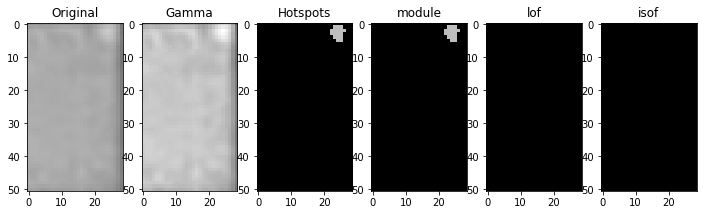

[-0.99732181 -0.98949103 -1.26564629 -1.00720324 -0.99021416 -0.99732181
 -1.0152799  -0.98166498]
[-1.81431168]
[-0.46225005 -0.4520296  -0.53181511 -0.47178917 -0.43991407 -0.46225005
 -0.47833174 -0.43919203]
[-0.68572467]
0.0 0
4266.jpg Normal
[-1.01777222 -1.00883762 -1.03755754 -1.0020385  -0.98590219 -1.0015066
 -0.99174785 -1.01409786]
[-1.81431168]
[-0.50690512 -0.48007419 -0.51237259 -0.46246031 -0.43667259 -0.46570741
 -0.45722093 -0.48158784]
[-0.68572467]
0.0 0
2617.jpg Normal
[-1.1931958  -1.00158428 -1.1522586  -1.32318333 -1.06758378 -1.04832171
 -1.00317338 -1.62851378]
[-1.86224249]
[-0.51128711 -0.47344985 -0.50475208 -0.52757044 -0.48542176 -0.48649619
 -0.46279838 -0.54845991]
[-0.704897]
0.0 0
2171.jpg Normal
[-1.01858417 -0.98138604 -1.02330628 -0.99100076 -1.02630965 -0.97178287
 -0.99100076 -1.01858417]
[-1.82039509]
[-0.46153123 -0.44693361 -0.44443161 -0.45121957 -0.45185176 -0.45981545
 -0.45121957 -0.46153123]
[-0.68815803]
0.0 0
4500.jpg Normal
[-0.9791177

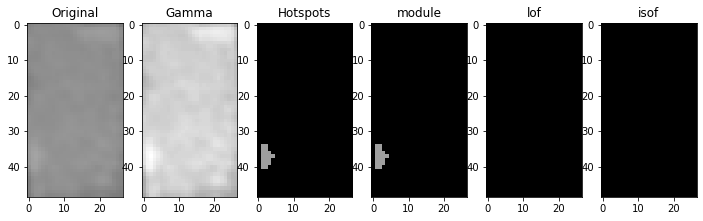

[-2.21300267 -2.03793505 -1.64896438 -2.12546886 -1.17449988 -1.91341512
 -2.39670038 -1.95471628]
[-1.83299977]
[-0.64523683 -0.60399473 -0.54054644 -0.61926441 -0.45797314 -0.55889546
 -0.68829875 -0.57993612]
[-0.69319991]
1.5 5.414213538169861 0.6430287075658971 1.0
0.0 0.0 0 0
8.0 10.828427076339722 0.8573716100878628 1.0
461.5 172.81118214130402 0.1941949299999429 0.6440984484573197
0.0 0
2165.jpg Normal
[-1.53635773 -1.28931918 -1.91593663 -1.11697473 -1.28931918 -1.1655017
 -1.00453197 -1.46071952]
[-1.76166564]
[-0.6056191  -0.51553433 -0.71037894 -0.48265231 -0.51553433 -0.49401389
 -0.45441405 -0.60535682]
[-0.66466626]
0.0 0.0 0 0
1.0 4.0 0.7853981633974483 1.0
62.5 49.55634891986847 0.31980943871489637 0.9383372593388903
62.5 49.55634891986847 0.31980943871489637 0.9383372593388903
61.0 25
4514.jpg Single-Hotspot


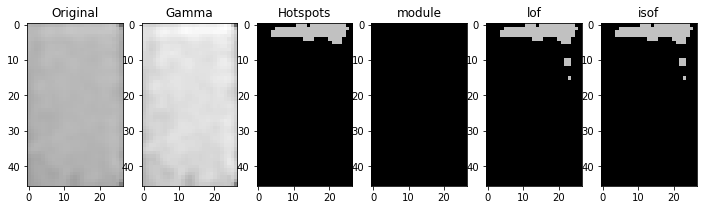

[-1.01230928 -0.98359303 -1.18015164 -0.99387034 -0.99166482 -1.05749122
 -0.97753344 -0.99550243]
[-1.83714507]
[-0.46844031 -0.43678239 -0.49247384 -0.44129846 -0.46144174 -0.47185299
 -0.45208807 -0.45316379]
[-0.69485803]
0.0 0
4272.jpg Normal
[-0.98098068 -1.12369878 -1.0212093  -0.97378506 -0.96647773 -1.1657301
 -0.98320649 -0.98098068]
[-1.78206358]
[-0.46613765 -0.50299683 -0.48377303 -0.47021347 -0.47627703 -0.51178583
 -0.46771011 -0.46613765]
[-0.67282543]
0.0 0
2603.jpg Normal
[-1.25704117 -1.08459576 -1.04108823 -1.11407979 -1.36789905 -1.14891835
 -1.84223182 -1.07517899]
[-1.9128832]
[-0.52468611 -0.47464178 -0.47205634 -0.47487886 -0.5433215  -0.4907996
 -0.62252056 -0.46308919]
[-0.72515328]
0.0 0
846.jpg Normal
[-0.99560466 -0.99603834 -0.97353801 -1.08593741 -0.99459182 -3.14707574
 -0.97407078 -0.99560466]
[-1.9128832]
[-0.43978916 -0.45833215 -0.45422206 -0.49444622 -0.47042234 -0.68580652
 -0.45201973 -0.43978916]
[-0.72515328]
0.0 0
675.jpg Normal
[-0.9948734  -

[-0.58810629 -0.48267281 -0.57547637 -0.51241908 -0.67348297 -0.60869509
 -0.559849   -0.49466067]
[-0.72515328]
0.0 0
2401.jpg Normal
[-1.00563265 -0.98429011 -1.01428185 -0.98225913 -0.99634894 -0.97407078
 -1.00563265 -1.0044647 ]
[-1.9128832]
[-0.46572561 -0.44835091 -0.48558002 -0.44410294 -0.45660162 -0.45201973
 -0.46572561 -0.46868817]
[-0.72515328]
0.0 0
4070.jpg Normal
[-0.97149334 -1.02110281 -0.98480485 -0.97027634 -1.02330628 -1.01789657
 -0.96162577 -0.99100076]
[-1.82039509]
[-0.46349358 -0.47282704 -0.45571895 -0.46285577 -0.44443161 -0.46300098
 -0.43147581 -0.45121957]
[-0.68815803]
0.0 0
3079.jpg Normal
[-0.97469113 -0.99953993 -1.01723848 -1.07722271 -1.00371134 -1.00287587
 -0.99953993 -1.02805987]
[-1.81431168]
[-0.46603269 -0.46143444 -0.48028211 -0.53755359 -0.45839622 -0.45601316
 -0.46143444 -0.49582288]
[-0.68572467]
0.0 0
4716.jpg Normal
[-1.00072106 -0.98386814 -1.41207391 -1.02583719 -0.99146001 -1.06428395
 -0.98703491 -1.00072106]
[-1.86224249]
[-0.46134

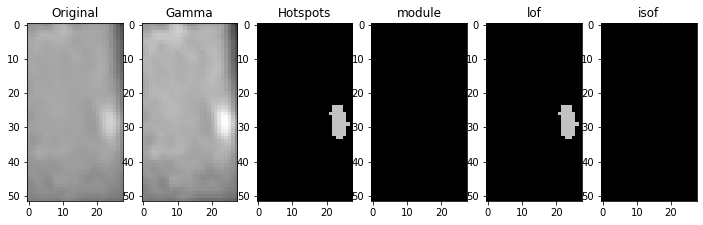

[-1.07387946 -1.23105814 -1.00165983 -1.16590268 -1.68856942 -1.02106439
 -1.24787138 -1.02527962]
[-1.9128832]
[-0.48057132 -0.51807376 -0.44136131 -0.50875385 -0.59146509 -0.44712423
 -0.51750446 -0.47680594]
[-0.72515328]
0.0 0
1861.jpg Normal
[-1.07322182 -1.16443751 -0.99486978 -1.02161216 -1.22685364 -1.13147
 -1.22685364 -1.35226168]
[-1.81431168]
[-0.53102555 -0.54845855 -0.43155382 -0.49936931 -0.54371041 -0.52723609
 -0.54371041 -0.59375043]
[-0.68572467]
0.0 0
3910.jpg Normal
[-1.00512102 -1.04832171 -0.98386814 -1.00208071 -1.10035698 -1.00971681
 -1.02000511 -0.98703491]
[-1.86224249]
[-0.45333587 -0.48649619 -0.43738982 -0.4469775  -0.50156114 -0.48652016
 -0.48085306 -0.4340381 ]
[-0.704897]
0.0 0
3904.jpg Normal
[-1.19923572 -1.04984523 -1.46295323 -1.06785824 -1.00862844 -1.14703585
 -1.31787286 -1.22496426]
[-1.82039509]
[-0.54359226 -0.48763155 -0.6177688  -0.49285268 -0.43532816 -0.52804142
 -0.56451619 -0.50972073]
[-0.68815803]
0.0 0
1875.jpg Normal
[-0.97740461 -

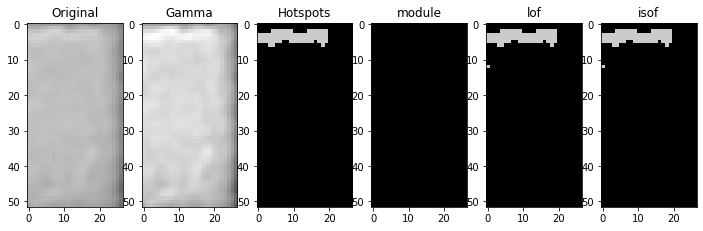

[-0.96458532 -1.01795594 -0.94894011 -0.98741931 -1.74988084 -0.96149937
 -0.95468955 -1.11563303]
[-1.76166564]
[-0.42302122 -0.43403171 -0.44874328 -0.44070058 -0.55863713 -0.41529025
 -0.42486949 -0.49145542]
[-0.66466626]
0.0 0
1054.jpg Normal
[-1.08322657 -1.40321346 -1.1896938  -0.98713693 -1.1049278  -1.360943
 -0.98343686 -1.85575602]
[-1.88896714]
[-0.48917926 -0.56074736 -0.48649353 -0.43904983 -0.49413946 -0.55102559
 -0.46231143 -0.66728081]
[-0.71558686]
0.0 0
3643.jpg Normal
[-1.23838485 -1.03385547 -0.98833925 -1.06568733 -1.03565498 -1.02404104
 -0.99959967 -1.59896404]
[-1.81431168]
[-0.5129461  -0.46780968 -0.42477988 -0.46943918 -0.46305407 -0.44899395
 -0.45359051 -0.57064852]
[-0.68572467]
0.0 0
3657.jpg Normal
[-1.0029599  -1.01392463 -0.99314699 -0.9765473  -1.01127223 -0.99166158
 -1.01215206 -0.99099339]
[-1.81431168]
[-0.4563226  -0.47463356 -0.47994632 -0.43344314 -0.49495197 -0.47519506
 -0.47385786 -0.46755744]
[-0.68572467]
0.0 0
4138.jpg Normal
[-0.992286

[-1.0278707  -1.01925544 -0.9983734  -0.99732181 -1.00746623 -1.9627584
 -0.99728706 -1.00746623]
[-1.81431168]
[-0.46780749 -0.46204154 -0.44322033 -0.46225005 -0.46662858 -0.624145
 -0.44139516 -0.46662858]
[-0.68572467]
0.0 0
3864.jpg Normal
[-0.93769931 -0.95116284 -0.99084429 -0.97724544 -0.93197385 -0.93490425
 -0.94673673 -1.05867389]
[-1.82039509]
[-0.4737862  -0.46062377 -0.44299117 -0.47366884 -0.48300351 -0.46039149
 -0.46481751 -0.45123725]
[-0.68815803]
0.0 0
3870.jpg Normal
[-1.0169303  -0.99094549 -1.01764197 -1.05859189 -1.06975848 -1.0169303
 -0.98322252 -1.12984847]
[-1.83299977]
[-0.4449821  -0.42654058 -0.44995761 -0.46766933 -0.45617093 -0.4449821
 -0.43961797 -0.46764623]
[-0.69319991]
0.0 0
1901.jpg Normal
[-1.16115222 -1.01989081 -1.01989081 -1.09545945 -0.99004475 -1.07960767
 -1.0459191  -0.97677722]
[-1.76166564]
[-0.47480407 -0.46629016 -0.46629016 -0.47885343 -0.46719277 -0.47512421
 -0.48460458 -0.47528421]
[-0.66466626]
0.0 0
4879.jpg Normal
[-1.00002304 

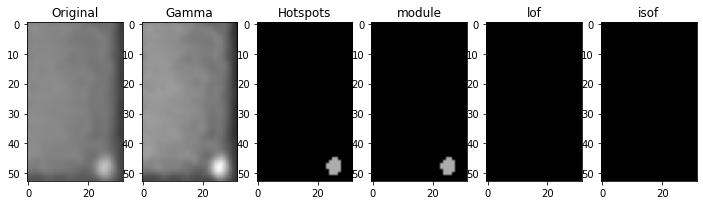

[-1.02147597 -0.97694288 -1.05876371 -1.01622368 -1.09730931 -1.00395865
 -0.99373108 -0.97815562]
[-1.9128832]
[-0.45623676 -0.41819658 -0.46559322 -0.46707659 -0.48060622 -0.45060661
 -0.43517951 -0.42715838]
[-0.72515328]
0.0 0
3333.jpg Normal
[-0.98037357 -0.97952783 -0.99659328 -0.99206492 -0.9863292  -0.97956022
 -0.9863292  -1.04258157]
[-1.92217542]
[-0.43102831 -0.41303476 -0.46448453 -0.44712896 -0.44317494 -0.43257876
 -0.43230233 -0.46632799]
[-0.72887017]
0.0 0
1524.jpg Normal
[-1.89537124 -1.06604496 -1.43086518 -0.983882   -1.53063741 -1.19471553
 -1.22454194 -1.06604496]
[-1.82039509]
[-0.61271454 -0.44780599 -0.49982982 -0.42874296 -0.51666315 -0.48237373
 -0.50803477 -0.44780599]
[-0.68815803]
0.0 0
1242.jpg Normal
[-0.97178287 -1.02105952 -0.98480485 -0.97305318 -1.02330628 -0.98392275
 -0.99100076 -1.0088096 ]
[-1.82039509]
[-0.45981545 -0.47106329 -0.45571895 -0.45936889 -0.44443161 -0.45769895
 -0.45121957 -0.47685451]
[-0.68815803]
0.0 0
5024.jpg Normal
[-1.09860

[-0.98789845 -1.22928004 -0.98789845 -0.99166482 -1.01049904 -0.97485927
 -1.04057337 -0.99110608]
[-1.83714507]
[-0.44609392 -0.49750695 -0.44609392 -0.46144174 -0.44688796 -0.43996062
 -0.47196408 -0.44391019]
[-0.69485803]
0.0 0
2789.jpg Normal
[-0.9975736  -0.98504925 -1.03367976 -1.00355591 -1.14891835 -0.98504925
 -0.98864744 -1.00395865]
[-1.9128832]
[-0.44383177 -0.43181208 -0.44822975 -0.43044329 -0.4907996  -0.43181208
 -0.42423507 -0.45060661]
[-0.72515328]
0.0 0
3497.jpg Normal
[-0.9952061  -0.99305517 -1.37887234 -1.00910664 -0.98429011 -0.97435034
 -0.99967877 -1.00971852]
[-1.9128832]
[-0.45782408 -0.44473426 -0.5440394  -0.46596865 -0.44835091 -0.45295422
 -0.47715555 -0.45876154]
[-0.72515328]
0.0 0
2951.jpg Normal
[-1.02630965 -0.9753175  -1.01471978 -1.02196431 -0.96821592 -1.16910367
 -0.98392275 -0.99100076]
[-1.82039509]
[-0.45185176 -0.44794098 -0.48272709 -0.45377079 -0.45227432 -0.47245646
 -0.45769895 -0.45121957]
[-0.68815803]
0.0 0
3483.jpg Normal
[-1.017641

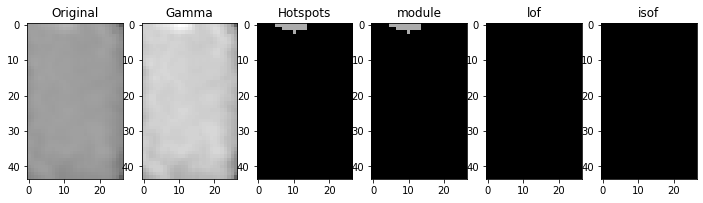

[-0.97297876 -0.98703491 -1.02000511 -0.98386814 -0.99155169 -0.99890199
 -1.00242948 -1.3391761 ]
[-1.86224249]
[-0.44651504 -0.4340381  -0.48085306 -0.43738982 -0.43900553 -0.44846937
 -0.44497263 -0.49811379]
[-0.704897]
0.0 0
1519.jpg Normal
[-0.96967035 -1.12198579 -0.99810796 -1.05392157 -2.79497714 -0.9480471
 -1.04599451 -0.99810796]
[-1.92217542]
[-0.4221186  -0.49248113 -0.44356039 -0.47800202 -0.71789802 -0.44780649
 -0.46076142 -0.44356039]
[-0.72887017]
0.0 0
933.jpg Normal
[-1.49091675 -0.99795192 -1.34216572 -1.26665471 -1.62660948 -1.49538854
 -1.39666992 -1.13363083]
[-1.82039509]
[-0.52895811 -0.46067752 -0.5308273  -0.51897577 -0.58301945 -0.50951492
 -0.52865192 -0.50923338]
[-0.68815803]
0.0 0
3468.jpg Normal
[-1.04151347 -0.98166498 -0.98793792 -1.14916691 -0.99166158 -0.99728706
 -0.98166498 -0.98050203]
[-1.81431168]
[-0.47586226 -0.43919203 -0.45895353 -0.49285469 -0.47519506 -0.44139516
 -0.43919203 -0.45455196]
[-0.68572467]
0.0 0
4307.jpg Normal
[-0.99474538

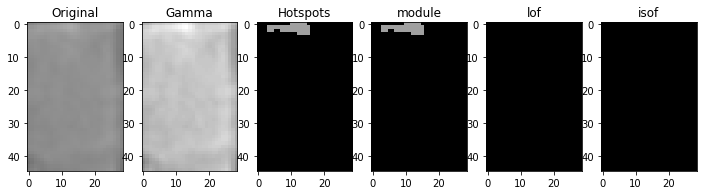

[-1.01539954 -1.0098468  -0.98689709 -1.03957367 -1.02404104 -0.9972523
 -1.00293534 -1.90196658]
[-1.81431168]
[-0.46958964 -0.44062827 -0.41618191 -0.46565983 -0.44899395 -0.46080286
 -0.42971604 -0.64268131]
[-0.68572467]
0.0 0
3454.jpg Normal
[-0.98318733 -1.29728818 -2.00964285 -1.05659372 -0.99433323 -1.01426968
 -1.00247908 -1.32742261]
[-1.81431168]
[-0.44454984 -0.52841798 -0.63535125 -0.46645102 -0.46848831 -0.45598406
 -0.45249266 -0.53500105]
[-0.68572467]
0.0 0
2992.jpg Normal
[-0.99206492 -0.98187547 -1.01208724 -0.98882344 -0.9787173  -0.99206492
 -0.9863292  -0.99206492]
[-1.92217542]
[-0.45428769 -0.42384556 -0.47954363 -0.43956733 -0.43314795 -0.45171007
 -0.42615398 -0.45479845]
[-0.72887017]
0.0 0
5025.jpg Normal
[-0.98611908 -1.00410793 -0.98866977 -1.27521956 -1.01483693 -0.98124689
 -0.97866874 -0.98866977]
[-1.88896714]
[-0.44407001 -0.45385517 -0.44355467 -0.50050532 -0.46460722 -0.44293555
 -0.44293312 -0.44355467]
[-0.71558686]
0.0 0
1243.jpg Normal
[-1.03671

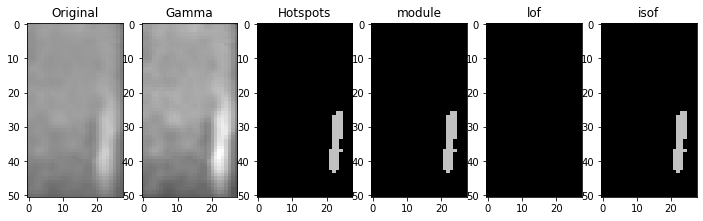

[-1.65122692 -1.05859189 -0.99094549 -1.39192704 -1.87373948 -1.21039686
 -1.65122692 -1.45839731]
[-1.83299977]
[-0.62693635 -0.46766933 -0.42654058 -0.52840248 -0.68594444 -0.50808779
 -0.62693635 -0.57778816]
[-0.69319991]
3.5 7.414213538169861 0.8001063703614795 1.0
8.0 11.656854152679443 0.7398388372977943 0.9847175296605464
18.5 21.071067690849304 0.5236106940716727 0.9666463538370974
1.5 10.242640614509583 0.17967069736490698 0.9367937339359904
0.5 3.414213538169861 0.5390120920947209 1.0
1.5 12.242640614509583 0.12576243030866918 0.9177814136775014
7.5 13.071067571640015 0.5516314364833987 0.9863710039854603
0.0 2.0 0.0 1.0
7.5 11.071067690849304 0.768939401168237 1.0
42.0 52.14213538169861 0.19412502676844817 0.8204080387446973
8.0 11.656854152679443 0.7398388372977943 0.9847175296605464
18.5 21.071067690849304 0.5236106940716727 0.9666463538370974
7.5 13.071067571640015 0.5516314364833987 0.9863710039854603
7.5 11.071067690849304 0.768939401168237 1.0
6.0 64
3871.jpg Multi-Ho

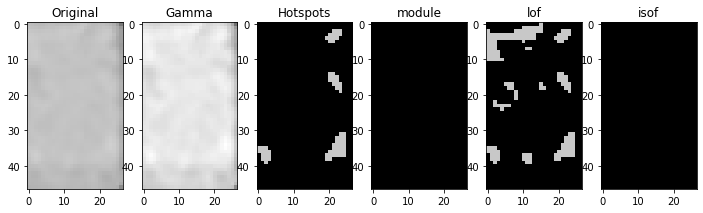

[-0.97708815 -2.56580942 -0.97677362 -0.99344709 -0.98936961 -0.97677722
 -1.50114333 -0.9949371 ]
[-1.76166564]
[-0.45601592 -0.70124861 -0.45114131 -0.47467109 -0.44206227 -0.47528421
 -0.53778896 -0.47105497]
[-0.66466626]
0.0 0
4878.jpg Normal
[-1.3747144  -0.94747224 -1.07516785 -1.18855949 -1.21979354 -1.2526934
 -0.93949004 -1.08837984]
[-1.82039509]
[-0.59828619 -0.45516614 -0.43802442 -0.5141202  -0.54236224 -0.51515947
 -0.47563173 -0.48585401]
[-0.68815803]
0.0 0
1900.jpg Normal
[-0.98949103 -1.00669198 -1.01238207 -0.98802525 -0.99021416 -1.59021252
 -0.99675924 -1.00746623]
[-1.81431168]
[-0.4520296  -0.45891579 -0.47989159 -0.48332097 -0.43991407 -0.58628233
 -0.47824912 -0.46662858]
[-0.68572467]
0.0 0
1914.jpg Normal
[-0.9881879  -1.3200098  -1.01230928 -0.99277474 -0.99451365 -0.97485927
 -0.9763053  -1.08218148]
[-1.83714507]
[-0.45565694 -0.53237096 -0.46844031 -0.44371037 -0.46857914 -0.43996062
 -0.46217138 -0.47179698]
[-0.69485803]
0.0 0
258.jpg Normal
[-1.016251

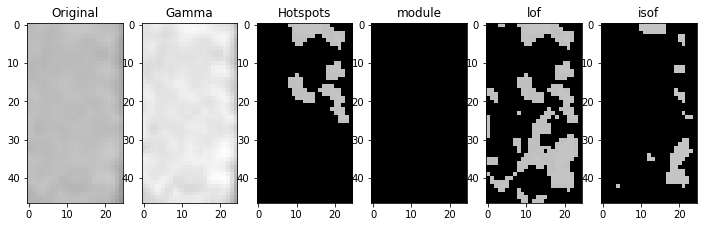

[-0.96380457 -0.98669887 -1.41207391 -0.96895277 -1.11953126 -1.00314099
 -3.31910514 -0.99946369]
[-1.86224249]
[-0.44433482 -0.45548055 -0.50843069 -0.43036143 -0.48260391 -0.45887433
 -0.72744504 -0.44633559]
[-0.704897]
0.0 0
264.jpg Normal
[-1.19573277 -0.96708201 -0.98527226 -1.60239356 -0.96708201 -3.94126564
 -1.06893798 -1.001901  ]
[-1.82039509]
[-0.47386767 -0.43474605 -0.43780003 -0.54524536 -0.43474605 -0.72972266
 -0.46537903 -0.4791461 ]
[-0.68815803]
0.0 0
502.jpg Normal
[-1.03484795 -0.99110608 -1.02094911 -3.81352146 -1.05749122 -1.00682043
 -1.04752587 -1.10994529]
[-1.83714507]
[-0.47960505 -0.44391019 -0.46455096 -0.79074839 -0.47185299 -0.43832277
 -0.47597932 -0.53437599]
[-0.69485803]
0.0 0
1096.jpg Normal
[-1.21039686 -1.0169303  -1.04746048 -1.00538682 -1.01764197 -1.11801395
 -1.12984847 -1.42483311]
[-1.83299977]
[-0.50808779 -0.4449821  -0.47330784 -0.44380815 -0.44995761 -0.4757692
 -0.46764623 -0.55404137]
[-0.69319991]
0.0 0
3681.jpg Normal
[-1.05867389 

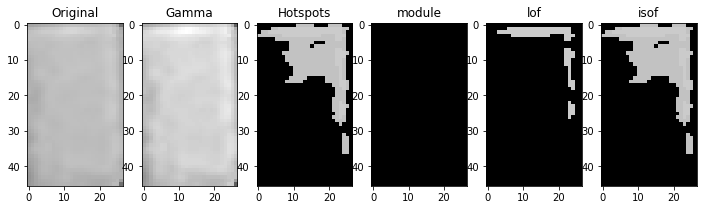

[-1.00145721 -0.98673542 -0.99535858 -3.14707574 -0.97435034 -0.98973197
 -0.99486389 -0.98225913]
[-1.9128832]
[-0.46632175 -0.4719678  -0.45499936 -0.68580652 -0.45295422 -0.43915355
 -0.4700637  -0.44410294]
[-0.72515328]
0.0 0
3939.jpg Normal
[-1.10259054 -0.93373102 -1.77564687 -0.96735091 -1.07988351 -0.93086056
 -1.29220312 -0.95962181]
[-1.82039509]
[-0.48187152 -0.47891419 -0.66639511 -0.44810727 -0.49047844 -0.48127249
 -0.52442725 -0.45936015]
[-0.68815803]
0.0 0
462.jpg Normal
[-1.51727225 -1.14597031 -1.08887071 -1.28460734 -1.03385547 -1.25573049
 -1.35226168 -1.01409786]
[-1.81431168]
[-0.67609706 -0.53157219 -0.52619771 -0.58141529 -0.46780968 -0.55763599
 -0.59375043 -0.48158784]
[-0.68572467]
0.0 0
1690.jpg Normal
[-1.0024092  -0.99441402 -1.00247908 -1.00371134 -0.98856719 -0.97853013
 -1.0133736  -1.0281429 ]
[-1.81431168]
[-0.45480776 -0.45072892 -0.45249266 -0.45839622 -0.45780642 -0.44276479
 -0.448412   -0.46846604]
[-0.68572467]
0.0 0
304.jpg Normal
[-1.0286388

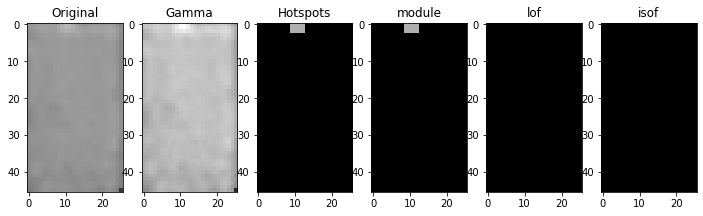

[-0.99720878 -1.05448457 -0.97975486 -1.0250104  -1.43086518 -0.96922753
 -1.13050296 -1.00885831]
[-1.82039509]
[-0.42262169 -0.45980918 -0.43452184 -0.4552876  -0.49982982 -0.45927341
 -0.46818678 -0.43427841]
[-0.68815803]
0.0 0
2399.jpg Normal
[-1.00050732 -0.96885923 -0.97556672 -1.10246318 -1.00453197 -0.9808015
 -0.9789682  -1.59859786]
[-1.76166564]
[-0.46410503 -0.45207864 -0.44445873 -0.48201244 -0.45441405 -0.47001945
 -0.46111029 -0.56567675]
[-0.66466626]
0.0 0
4930.jpg Normal
[-0.98852903 -0.98975245 -1.00996405 -0.97280652 -1.02143662 -0.97337608
 -1.21671856 -0.98852903]
[-1.88896714]
[-0.45910286 -0.45958929 -0.45967437 -0.47526051 -0.46418728 -0.44728535
 -0.48914575 -0.45910286]
[-0.71558686]
0.0 0
3093.jpg Normal
[-0.99875035 -1.00662336 -0.99535858 -1.01347626 -0.99179859 -3.33994127
 -1.00164854 -1.00563265]
[-1.9128832]
[-0.46863368 -0.46007743 -0.45499936 -0.4938234  -0.46012373 -0.72757694
 -0.47597678 -0.46572561]
[-0.72515328]
0.0 0
4924.jpg Normal
[-0.987034

[-1.0381616  -0.97193172 -0.95155322 -0.97908595 -2.31319691 -0.99113601
 -0.96248646 -0.95251085]
[-1.83299977]
[-0.44376879 -0.43527138 -0.41971043 -0.4301554  -0.68770637 -0.44510247
 -0.4655579  -0.42206799]
[-0.69319991]
0.0 0
1492.jpg Normal
[-0.97004025 -1.06604496 -1.76602817 -0.95947819 -1.00885831 -1.15070398
 -1.0250104  -0.983882  ]
[-1.82039509]
[-0.43251736 -0.44780599 -0.59978522 -0.47116296 -0.43427841 -0.47175286
 -0.4552876  -0.42874296]
[-0.68815803]
0.0 0
660.jpg Normal
[-0.99110608 -0.98982818 -0.9881879  -0.98726833 -1.04727358 -1.00682043
 -1.01049904 -1.038897  ]
[-1.83714507]
[-0.44391019 -0.45168469 -0.45565694 -0.4710645  -0.47876951 -0.43832277
 -0.44688796 -0.4916661 ]
[-0.69485803]
0.0 0
2825.jpg Normal
[-1.12984847 -2.11418446 -0.97677229 -1.16668309 -1.25503776 -1.01618589
 -1.20592135 -1.01185335]
[-1.83299977]
[-0.46764623 -0.58859232 -0.43500314 -0.48814678 -0.5328344  -0.45413142
 -0.45096949 -0.46077584]
[-0.69319991]
0.0 0
4298.jpg Normal
[-1.00118

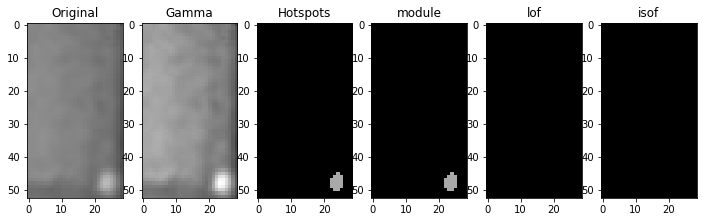

[-1.34216572 -1.08618247 -0.99358612 -1.26665471 -1.24564788 -1.55734373
 -1.15053989 -1.05351052]
[-1.82039509]
[-0.5308273  -0.4906713  -0.43911331 -0.51897577 -0.51649619 -0.5730767
 -0.47325117 -0.46088468]
[-0.68815803]
0.0 0
5151.jpg Normal
[-1.05514894 -0.99206492 -0.99206492 -0.9863292  -1.18241411 -1.05514894
 -0.99563053 -0.98622136]
[-1.92217542]
[-0.51700908 -0.45171007 -0.48027614 -0.43230233 -0.70363328 -0.51700908
 -0.47186479 -0.44441535]
[-0.72887017]
0.0 0
3520.jpg Normal
[-1.00208071 -1.30055468 -0.99155169 -0.99890199 -1.00317338 -1.04331523
 -0.96605711 -0.96380457]
[-1.86224249]
[-0.4469775  -0.51192851 -0.43900553 -0.44846937 -0.46279838 -0.44908013
 -0.45609835 -0.44433482]
[-0.704897]
0.0 0
1337.jpg Normal
[-1.07832977 -1.27521956 -1.4118471  -1.11980515 -1.01148372 -1.72516121
 -1.24628535 -1.52089318]
[-1.88896714]
[-0.45886137 -0.50050532 -0.53245827 -0.47500518 -0.46947042 -0.59780058
 -0.51147024 -0.54435533]
[-0.71558686]
0.0 0
1323.jpg Normal
[-0.9714933

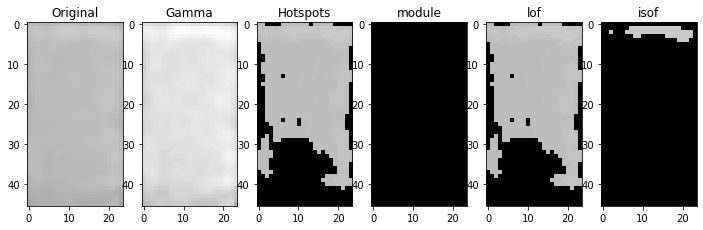

[-1.15976156 -0.97797303 -0.99865456 -1.00962411 -1.03314931 -1.02237182
 -0.96852579 -1.08837902]
[-1.78206358]
[-0.51833458 -0.49189768 -0.49837865 -0.47466769 -0.50366718 -0.50213839
 -0.44986912 -0.52816125]
[-0.67282543]
0.0 0
5147.jpg Normal
[-0.97859849 -0.98789845 -0.99166482 -0.99110608 -0.98359303 -1.08218148
 -1.01049904 -0.98726833]
[-1.83714507]
[-0.48028322 -0.44609392 -0.46144174 -0.44391019 -0.43678239 -0.47179698
 -0.44688796 -0.4710645 ]
[-0.69485803]
0.0 0
2628.jpg Normal
[-1.00926391 -0.99785357 -1.26405265 -0.98225913 -1.00990888 -1.00971852
 -0.98973197 -0.99486389]
[-1.9128832]
[-0.48801029 -0.45086239 -0.51707961 -0.44410294 -0.48000472 -0.45876154
 -0.43915355 -0.4700637 ]
[-0.72515328]
0.0 0
1321.jpg Normal
[-1.04832171 -1.00512102 -0.99946369 -1.00512102 -0.99443333 -0.99443333
 -1.02000511 -1.06598443]
[-1.86224249]
[-0.48649619 -0.45333587 -0.44633559 -0.45333587 -0.45751654 -0.45751654
 -0.48085306 -0.4731065 ]
[-0.704897]
0.0 0
4271.jpg Normal
[-0.9785984

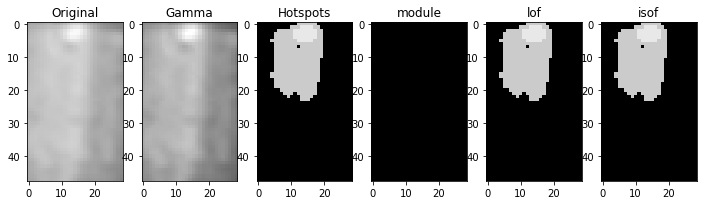

[-0.93643145 -1.06711179 -0.99084429 -1.31320451 -0.97708844 -0.94747224
 -1.13304606 -0.93085737]
[-1.82039509]
[-0.47630647 -0.49420184 -0.44299117 -0.56853457 -0.42124673 -0.45516614
 -0.47627109 -0.47813853]
[-0.68815803]
0.0 0
3278.jpg Normal
[-0.97853013 -0.99433323 -1.06730757 -1.0024092  -1.04632169 -0.97853013
 -2.3259093  -1.00306345]
[-1.81431168]
[-0.44276479 -0.46848831 -0.46613465 -0.45480776 -0.46929689 -0.44276479
 -0.67099572 -0.44453278]
[-0.68572467]
0.0 0
2172.jpg Normal
[-0.98949103 -0.99921569 -0.99166158 -0.98802525 -4.14227263 -1.00746623
 -1.04151347 -1.02352917]
[-1.81431168]
[-0.4520296  -0.44387598 -0.47519506 -0.48332097 -0.80206379 -0.46662858
 -0.47586226 -0.49318883]
[-0.68572467]
0.0 0
4503.jpg Normal
[-0.97197798 -0.98975245 -1.00226306 -0.98611908 -1.09780031 -0.98897137
 -0.97337608 -1.00410793]
[-1.88896714]
[-0.43833753 -0.45958929 -0.45753552 -0.44407001 -0.46864193 -0.45850188
 -0.44728535 -0.45385517]
[-0.71558686]
0.0 0
689.jpg Normal
[-0.96922

[-0.46140768 -0.44001448 -0.45480776 -0.52841798 -0.46299826 -0.45430985
 -0.45598406 -0.46447541]
[-0.68572467]
0.0 0
4715.jpg Normal
[-0.98629802 -1.01958482 -1.00944003 -0.94227059 -1.17916895 -0.95500246
 -0.95911297 -1.02398086]
[-1.92217542]
[-0.48169215 -0.45154628 -0.44340824 -0.44983427 -0.49444012 -0.44388303
 -0.43457985 -0.4945035 ]
[-0.72887017]
0.0 0
2364.jpg Normal
[-1.00862844 -1.02630965 -0.96162577 -1.00829914 -1.19573277 -1.001901
 -0.96821592 -0.96416368]
[-1.82039509]
[-0.43532816 -0.45185176 -0.43147581 -0.49442875 -0.47386767 -0.4791461
 -0.45227432 -0.42798489]
[-0.68815803]
0.0 0
2402.jpg Normal
[-1.01368815 -1.01368815 -1.04832171 -0.96534288 -1.00208071 -1.00384698
 -2.79943089 -1.00512102]
[-1.86224249]
[-0.48668066 -0.48668066 -0.48649619 -0.46064634 -0.4469775  -0.46339846
 -0.64299582 -0.45333587]
[-0.704897]
0.0 0
4073.jpg Normal
[-0.97946738 -1.28272876 -1.05188051 -0.96870215 -1.07880894 -0.99094549
 -0.99245897 -0.97650169]
[-1.83299977]
[-0.45664643 

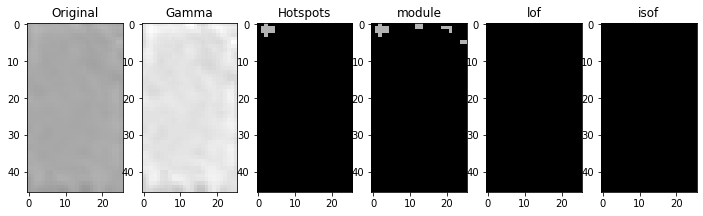

[-1.6073371  -1.42225524 -1.16440591 -1.31577351 -1.46538111 -1.04713552
 -1.02352917 -1.31577351]
[-1.81431168]
[-0.58865612 -0.5642891  -0.53020279 -0.55891686 -0.56622111 -0.47011302
 -0.49318883 -0.55891686]
[-0.68572467]
0.0 0
1679.jpg Normal
[-0.98973197 -1.00275065 -0.99967877 -0.99305517 -0.98429011 -0.98225913
 -1.00971852 -3.01849871]
[-1.9128832]
[-0.43915355 -0.46547292 -0.47715555 -0.44473426 -0.44835091 -0.44410294
 -0.45876154 -0.68543884]
[-0.72515328]
0.0 0
4701.jpg Normal
[-1.03066081 -1.06711179 -1.01782521 -0.98819411 -1.12442559 -0.94673673
 -1.07516785 -0.94442137]
[-1.82039509]
[-0.49333634 -0.49420184 -0.48093046 -0.47538775 -0.53015866 -0.46481751
 -0.43802442 -0.4638682 ]
[-0.68815803]
0.0 0
2370.jpg Normal
[-0.98417192 -0.99042157 -0.98408801 -1.1096228  -0.97956022 -1.43128752
 -0.97952783 -0.99042157]
[-1.92217542]
[-0.42685696 -0.43161859 -0.43562353 -0.53296238 -0.43257876 -0.66898267
 -0.41303476 -0.43091142]
[-0.72887017]
0.0 0
4932.jpg Normal
[-1.09545

[-1.05353527 -1.51146225 -0.96416368 -1.09799609 -0.96343368 -1.30013807
 -1.19573277 -0.98527226]
[-1.82039509]
[-0.46317499 -0.53513831 -0.42798489 -0.48743582 -0.44125115 -0.48408631
 -0.47386767 -0.43780003]
[-0.68815803]
0.0 0
1719.jpg Normal
[-0.96501965 -0.97975486 -1.13050296 -0.95356259 -0.97089526 -0.95897002
 -2.07396785 -0.95973379]
[-1.82039509]
[-0.4503533  -0.43452184 -0.46818678 -0.47020125 -0.45283226 -0.45456223
 -0.62288431 -0.44956537]
[-0.68815803]
0.0 0
3668.jpg Normal
[-1.34734139 -1.46538111 -1.14007168 -1.30232653 -1.65854907 -1.14007168
 -1.03338738 -1.34734139]
[-1.81431168]
[-0.55875291 -0.56622111 -0.52486559 -0.52793059 -0.60127087 -0.52486559
 -0.47019077 -0.55875291]
[-0.68572467]
0.0 0
4107.jpg Normal
[-0.97020487 -0.98322252 -1.01529119 -0.97677229 -0.98519534 -0.99094549
 -1.02963014 -1.3114139 ]
[-1.83299977]
[-0.44745335 -0.43961797 -0.45786751 -0.43500314 -0.43223297 -0.42654058
 -0.44102697 -0.4874392 ]
[-0.69319991]
0.0 0
2576.jpg Normal
[-1.0093

[-0.47386767 -0.46537903 -0.48408631 -0.44125115 -0.54524536 -0.48352943
 -0.72676634 -0.46719977]
[-0.68815803]
0.0 0
1527.jpg Normal
[-1.20035019 -1.02891836 -1.59286064 -1.08621369 -1.32664406 -1.01143298
 -1.17291625 -1.53891558]
[-1.81431168]
[-0.51847597 -0.45246322 -0.60264931 -0.51802871 -0.5720326  -0.46130116
 -0.5146169  -0.58195281]
[-0.68572467]
0.0 0
1533.jpg Normal
[-1.00276177 -0.99206492 -0.99206492 -0.9863292  -0.97952783 -1.01208724
 -1.05514894 -0.99206492]
[-1.92217542]
[-0.47550987 -0.42546712 -0.4749606  -0.43230233 -0.41303476 -0.47954363
 -0.51700908 -0.45428769]
[-0.72887017]
0.0 0
3324.jpg Normal
[-0.97261686 -0.99358612 -1.08866534 -0.95973379 -0.97740461 -0.97261686
 -0.96618454 -0.98482579]
[-1.82039509]
[-0.44459059 -0.43911331 -0.45400225 -0.44956537 -0.44540705 -0.44459059
 -0.46246826 -0.45237654]
[-0.68815803]
0.0 0
5033.jpg Normal
[-1.01238207 -0.99166158 -1.01392463 -1.03338738 -0.99675924 -0.99099339
 -1.00746623 -1.01103782]
[-1.81431168]
[-0.4798

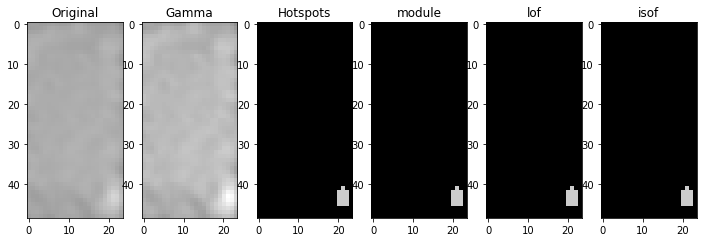

[-0.97929844 -0.96040247 -0.94572981 -0.97160491 -0.94239275 -0.95860687
 -0.94905598 -1.09249656]
[-1.92217542]
[-0.40988592 -0.41699903 -0.40431077 -0.4329378  -0.41469145 -0.41163871
 -0.42643607 -0.44832767]
[-0.72887017]
0.0 0
3481.jpg Normal
[-0.97678097 -1.12688717 -0.98138604 -1.0461038  -0.9854834  -1.12688717
 -0.97392945 -1.25355152]
[-1.82039509]
[-0.47450413 -0.5117169  -0.44693361 -0.49669277 -0.46908116 -0.5117169
 -0.45234397 -0.5563203 ]
[-0.68815803]
0.0 0
4489.jpg Normal
[-1.00512102 -4.65761091 -1.37506018 -1.06758378 -0.96534288 -1.02177085
 -1.00158428 -2.7361944 ]
[-1.86224249]
[-0.45333587 -0.79486418 -0.51000058 -0.48542176 -0.46064634 -0.48225103
 -0.47344985 -0.65100365]
[-0.704897]
0.0 0
3480.jpg Normal
[-1.00216152 -0.96852579 -0.98762794 -0.97385011 -1.00349444 -1.05878024
 -1.00818958 -0.97841093]
[-1.78206358]
[-0.47978629 -0.44986912 -0.47288407 -0.48725359 -0.47350036 -0.51899736
 -0.47999546 -0.45624394]
[-0.67282543]
0.0 0
2946.jpg Normal
[-0.9956046

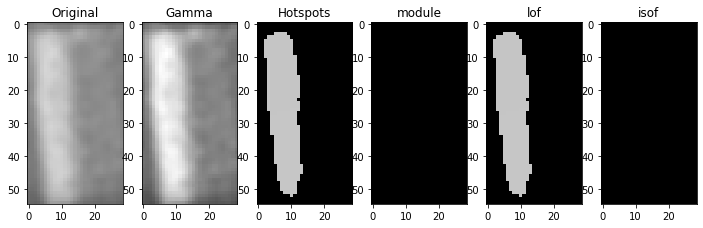

[-1.18199055 -1.39677852 -0.96190452 -1.04388377 -1.01985416 -0.97160491
 -1.30371695 -1.08422096]
[-1.92217542]
[-0.45867047 -0.47049525 -0.42067547 -0.42629554 -0.41384636 -0.4329378
 -0.47620148 -0.42713631]
[-0.72887017]
0.0 0
1283.jpg Normal
[-1.34410997 -0.96967035 -1.05828258 -1.18392517 -1.28680782 -1.51833942
 -1.34410997 -0.95911297]
[-1.92217542]
[-0.5748471  -0.41496043 -0.49600512 -0.49066987 -0.50681712 -0.69946363
 -0.5748471  -0.43457985]
[-0.72887017]
0.0 0
3494.jpg Normal
[-0.9820834  -0.9907767  -0.98834468 -0.98891257 -0.97957916 -1.09339109
 -0.98834468 -0.99574826]
[-1.78206358]
[-0.4398814  -0.47401397 -0.44640987 -0.43432901 -0.44099805 -0.47280624
 -0.44640987 -0.44854374]
[-0.67282543]
0.0 0
2952.jpg Normal
[-1.59585955 -1.19866522 -1.18221413 -0.98762794 -1.97178915 -1.54404592
 -1.11118147 -0.97385729]
[-1.78206358]
[-0.67171492 -0.50836823 -0.52524697 -0.47288407 -0.64490765 -0.64078114
 -0.51902059 -0.46959667]
[-0.67282543]
0.0 0
2007.jpg Normal
[-0.99179

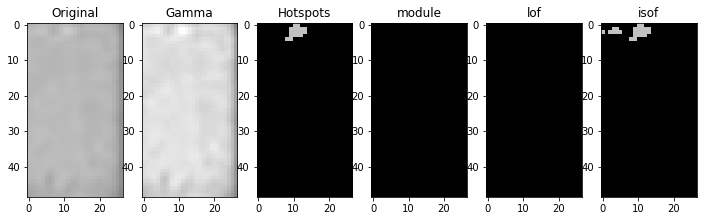

[-1.28931918 -1.13648827 -1.01227891 -1.23519275 -1.53635773 -1.07960767
 -0.97556672 -1.35246667]
[-1.76166564]
[-0.51553433 -0.48589735 -0.44725935 -0.53159954 -0.6056191  -0.47512421
 -0.44445873 -0.55551301]
[-0.66466626]
0.0 0
3866.jpg Normal
[-1.00349573 -2.09548029 -1.13005553 -1.00349573 -0.99967877 -1.04481346
 -1.3463073  -1.04481346]
[-1.9128832]
[-0.47792595 -0.6504827  -0.48375538 -0.47792595 -0.47715555 -0.5131143
 -0.52419552 -0.5131143 ]
[-0.72515328]
0.0 0
1917.jpg Normal
[-0.99219498 -1.         -1.00207627 -0.99021416 -1.04713552 -0.9983734
 -2.40770816 -1.12794498]
[-1.81431168]
[-0.45209186 -0.43195469 -0.45607426 -0.43991407 -0.47011302 -0.44322033
 -0.70664342 -0.48101785]
[-0.68572467]
0.0 0
1903.jpg Normal
[-1.18438114 -1.01985416 -0.94525277 -1.07253953 -0.98587036 -0.94572981
 -1.39677852 -0.96040247]
[-1.92217542]
[-0.48065758 -0.41384636 -0.44378475 -0.44566428 -0.45829314 -0.40431077
 -0.47049525 -0.41699903]
[-0.72887017]
0.0 0
529.jpg Normal
[-1.02230622

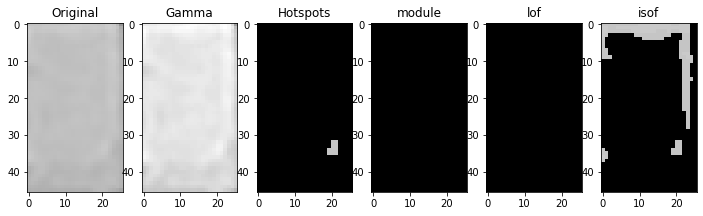

[-1.01271143 -0.99437017 -1.01969667 -1.02353396 -1.02228949 -0.9963544
 -1.00372693 -1.01215763]
[-1.72207615]
[-0.44956724 -0.4452962  -0.45600962 -0.45885812 -0.45934828 -0.44738682
 -0.47663653 -0.45933452]
[-0.64883046]
0.0 0
4890.jpg Normal
[-1.05437559 -0.96849472 -1.09122768 -1.1808867  -1.08403097 -1.08476374
 -1.31868257 -1.02639322]
[-1.75809585]
[-0.4236349  -0.4299403  -0.46379469 -0.5134723  -0.46095788 -0.48019254
 -0.50320914 -0.44189983]
[-0.66323834]
0.0 0
2239.jpg Normal
[-1.0167989  -1.02906194 -1.01692396 -0.99563059 -1.0035935  -0.98472537
 -0.97125431 -1.02726114]
[-1.86224249]
[-0.42437963 -0.44599739 -0.44017824 -0.41006538 -0.42509508 -0.42893518
 -0.42071786 -0.47070523]
[-0.704897]
0.0 0
3133.jpg Normal
[-1.10901103 -1.39954391 -1.26047812 -1.72425863 -1.13631864 -1.30371695
 -1.30371695 -0.97929844]
[-1.92217542]
[-0.45147041 -0.50793051 -0.46379432 -0.55824688 -0.47402596 -0.47620148
 -0.47620148 -0.40988592]
[-0.72887017]
0.0 0
4884.jpg Normal
[-1.7317978

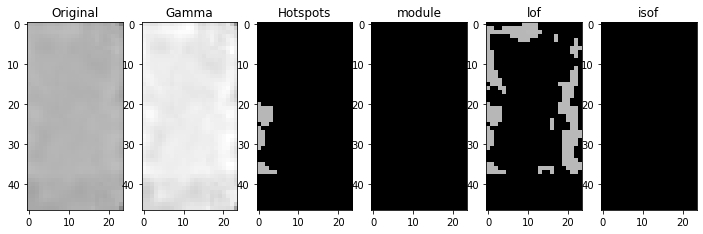

[-0.98756778 -1.00469654 -0.98532345 -1.01597256 -1.0020048  -1.0020048
 -1.02353396 -1.02125623]
[-1.72207615]
[-0.47350286 -0.47725489 -0.45154944 -0.43828012 -0.46502083 -0.46502083
 -0.45885812 -0.4613304 ]
[-0.64883046]
0.0 0
307.jpg Normal
[-1.2333906  -0.99361696 -1.34019616 -1.09635325 -0.95313099 -1.29149282
 -1.19667304 -1.34019616]
[-1.69492094]
[-0.52250243 -0.46562188 -0.49016363 -0.49420245 -0.44534366 -0.50239145
 -0.49420191 -0.49016363]
[-0.63796838]
0.0 0
3084.jpg Normal
[-1.13302293 -1.02177085 -1.07120527 -1.00317338 -1.34772804 -1.10035698
 -1.08703229 -1.02177085]
[-1.86224249]
[-0.49838122 -0.48225103 -0.51222771 -0.46279838 -0.51587269 -0.50156114
 -0.51822392 -0.48225103]
[-0.704897]
0.0 0
4933.jpg Normal
[-0.98988319 -1.17227227 -0.99970846 -1.01111486 -0.99072889 -0.97957916
 -0.97957916 -1.01253646]
[-1.78206358]
[-0.45090091 -0.49198414 -0.46900894 -0.45022794 -0.43340959 -0.44099805
 -0.44099805 -0.46896595]
[-0.67282543]
0.0 0
461.jpg Normal
[-1.04369592 

[-1.052707   -1.06965643 -1.00766715 -1.20527151 -1.00031568 -1.1073699
 -1.01811897 -1.052707  ]
[-1.72207615]
[-0.46940663 -0.5067072  -0.46215517 -0.52909121 -0.52863711 -0.47676045
 -0.48565858 -0.46940663]
[-0.64883046]
0.0 0
2826.jpg Normal
[-1.0706502  -1.02072384 -1.03850796 -1.03168879 -1.00371422 -1.00423374
 -1.00071021 -1.0706502 ]
[-1.69492094]
[-0.5218937  -0.45640818 -0.50691444 -0.44472222 -0.48722256 -0.45722575
 -0.46003612 -0.5218937 ]
[-0.63796838]
0.0 0
2198.jpg Normal
[-0.96686362 -1.26665393 -0.97811811 -1.23916352 -1.104398   -0.97465299
 -1.01830292 -1.57639871]
[-1.76166564]
[-0.43641593 -0.49525637 -0.44158102 -0.48410845 -0.48658334 -0.43123882
 -0.43861134 -0.54372197]
[-0.66466626]
0.0 0
3286.jpg Normal
[-0.95860687 -0.94846437 -0.97929844 -0.96040247 -0.97100303 -1.06311357
 -0.95860687 -0.9655832 ]
[-1.92217542]
[-0.41163871 -0.42423869 -0.40988592 -0.41699903 -0.43367047 -0.4687629
 -0.41163871 -0.42612363]
[-0.72887017]
0.0 0
105.jpg Normal
[-1.00252  

[-1.09352299 -0.96011525 -1.08151093 -1.00991437 -1.08151093 -1.09352299
 -0.9981452  -1.39565353]
[-1.75809585]
[-0.46065168 -0.43112302 -0.45910583 -0.44708523 -0.45910583 -0.46065168
 -0.43659352 -0.51333824]
[-0.66323834]
0.0 0
4533.jpg Normal
[-0.98917451 -1.09244506 -1.05665301 -1.26623189 -0.96713001 -1.00766715
 -1.05338952 -0.98480074]
[-1.72207615]
[-0.4442887  -0.49097447 -0.46955797 -0.52129297 -0.44404879 -0.46215517
 -0.4662643  -0.45296308]
[-0.64883046]
0.0 0
21.jpg Normal
[-0.97298747 -1.32091441 -0.99041412 -0.96686362 -0.97811811 -0.97465299
 -1.08092828 -0.97666005]
[-1.76166564]
[-0.44222643 -0.50991077 -0.44601122 -0.43641593 -0.44158102 -0.43123882
 -0.45945408 -0.44414453]
[-0.66466626]
0.0 0
861.jpg Normal
[-0.99851095 -0.97953694 -1.01862086 -0.97953694 -1.04262479 -4.82635257
 -1.10037258 -0.99561394]
[-1.86224249]
[-0.41758048 -0.42200674 -0.45659097 -0.42200674 -0.47366188 -0.76548046
 -0.47046122 -0.42676921]
[-0.704897]
0.0 0
4255.jpg Normal
[-1.24663449 

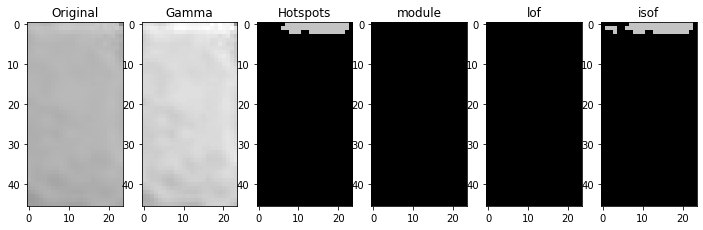

[-1.51519317 -1.0068124  -1.02928908 -1.00828414 -0.9895936  -1.29648455
 -1.22204001 -1.46414089]
[-1.75809585]
[-0.63310428 -0.43663936 -0.54917331 -0.453128   -0.49727674 -0.58107007
 -0.5599136  -0.60506147]
[-0.66323834]
0.0 0
4282.jpg Normal
[-0.9583552  -1.01696695 -0.96865727 -1.11285204 -1.04369592 -0.96868069
 -1.00341087 -0.99168267]
[-1.75809585]
[-0.42539641 -0.46687789 -0.4322325  -0.42712067 -0.45421641 -0.43930864
 -0.4502721  -0.42515062]
[-0.66323834]
0.0 0
2195.jpg Normal
[-0.97613248 -1.28194808 -1.03634207 -0.95812994 -0.97014141 -1.73541938
 -0.96022332 -0.95166107]
[-1.69492094]
[-0.45680757 -0.50217116 -0.47774019 -0.46396983 -0.44654335 -0.60239584
 -0.43427303 -0.44785799]
[-0.63796838]
0.0 0
108.jpg Normal
[-1.00752398 -0.96996054 -0.97946785 -0.98788663 -0.97327678 -0.9729008
 -1.00639489 -0.98086354]
[-1.85857924]
[-0.45227054 -0.40623631 -0.42369395 -0.42774712 -0.42731911 -0.41855007
 -0.42884266 -0.44913456]
[-0.7034317]
0.0 0
120.jpg Normal
[-1.46847661

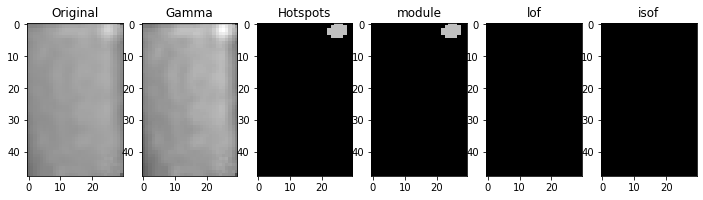

[-1.09253413 -1.14946126 -1.12133156 -1.11083522 -1.0615098  -1.09122768
 -1.12659127 -1.19207524]
[-1.75809585]
[-0.46516577 -0.51269965 -0.51943773 -0.50911968 -0.44433853 -0.46379469
 -0.51116182 -0.50436016]
[-0.66323834]
0.0 0
2368.jpg Normal
[-1.43695215 -0.99421585 -1.01086339 -0.99867778 -1.03633596 -1.0127606
 -1.01086339 -0.98692559]
[-1.78206358]
[-0.56221305 -0.4443432  -0.43958467 -0.455881   -0.4574834  -0.46816555
 -0.43958467 -0.43887711]
[-0.67282543]
0.0 0
3710.jpg Normal
[-0.95392833 -1.49242683 -1.04944981 -1.02410117 -1.01375782 -1.09273699
 -1.10659597 -0.95392833]
[-1.69492094]
[-0.42890208 -0.55899969 -0.45174337 -0.42515601 -0.45834269 -0.48557386
 -0.48197573 -0.42890208]
[-0.63796838]
0.0 0
493.jpg Normal
[-1.34293277 -0.99609067 -0.99102744 -1.06989317 -1.02464371 -0.97484059
 -0.98517819 -0.9981512 ]
[-1.75809585]
[-0.52813258 -0.42031803 -0.42029867 -0.48425675 -0.44160007 -0.41895284
 -0.43988767 -0.42386665]
[-0.66323834]
0.0 0
1107.jpg Normal
[-0.963182

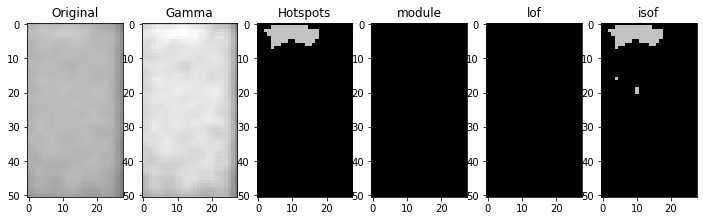

[-1.39646665 -1.72695838 -1.1464652  -1.1464652  -1.48191236 -1.61675612
 -1.20434164 -1.30214103]
[-1.85857924]
[-0.498123   -0.53238519 -0.47445287 -0.47445287 -0.5551315  -0.54613952
 -0.4637214  -0.52459748]
[-0.7034317]
0.0 0
3937.jpg Normal
[-1.18597724 -0.98068113 -1.02643665 -0.9981512  -1.38123325 -1.00828414
 -1.06989317 -0.97952768]
[-1.75809585]
[-0.49989524 -0.46002781 -0.46280648 -0.42386665 -0.54179666 -0.453128
 -0.48425675 -0.44585139]
[-0.66323834]
0.0 0
444.jpg Normal
[-1.01597256 -1.63041913 -1.00145524 -0.9963544  -1.00145524 -0.98532345
 -1.23083165 -1.13216901]
[-1.72207615]
[-0.43828012 -0.57981145 -0.44544297 -0.44738682 -0.44544297 -0.45154944
 -0.5320519  -0.49567931]
[-0.64883046]
0.0 0
322.jpg Normal
[-1.03595421 -1.97693372 -0.98045831 -1.02232804 -1.06879898 -1.07367715
 -1.01114435 -1.07367715]
[-1.85857924]
[-0.46421922 -0.62127532 -0.42386714 -0.43581053 -0.47106351 -0.47895652
 -0.47112759 -0.47895652]
[-0.7034317]
0.0 0
4916.jpg Normal
[-1.01179466 -

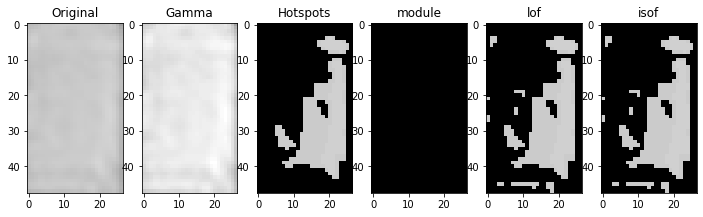

[-0.95830834 -0.99168267 -1.13069204 -0.97866865 -1.02418522 -0.95830834
 -1.58104539 -1.00760299]
[-1.75809585]
[-0.41072238 -0.42515062 -0.43400484 -0.44447856 -0.45441973 -0.41072238
 -0.52488749 -0.418096  ]
[-0.66323834]
0.0 0
4651.jpg Normal
[-1.11305393 -0.99260074 -1.59173522 -1.02231531 -1.30946207 -1.13124109
 -2.13182463 -1.01534985]
[-1.69492094]
[-0.49433493 -0.42978219 -0.58799485 -0.48090364 -0.56919972 -0.50376897
 -0.6991744  -0.47096936]
[-0.63796838]
0.0 0
1729.jpg Normal
[-1.68794267 -1.33368258 -1.0296084  -2.48108742 -1.34884392 -1.42377969
 -0.98502101 -1.39646665]
[-1.85857924]
[-0.54062489 -0.48863134 -0.4650525  -0.67175632 -0.51041447 -0.52990163
 -0.43438884 -0.498123  ]
[-0.7034317]
0.0 0
4137.jpg Normal
[-1.05406396 -1.01370132 -0.99692735 -0.98708909 -0.9963544  -1.04359251
 -1.37643879 -1.01969667]
[-1.72207615]
[-0.48542437 -0.46095429 -0.44676112 -0.45839338 -0.44738682 -0.46660869
 -0.54422984 -0.45600962]
[-0.64883046]
0.0 0
3658.jpg Normal
[-1.81891

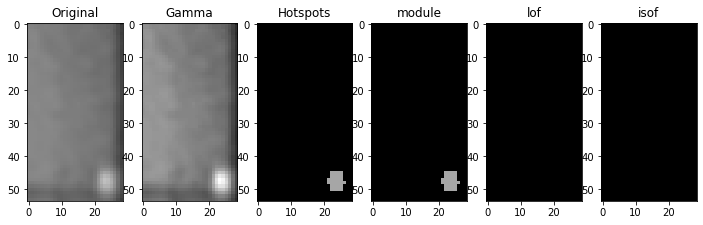

[-1.62953727 -1.10935934 -1.33522679 -1.01811897 -1.22501961 -1.1404938
 -1.04413337 -1.20527151]
[-1.72207615]
[-0.71514712 -0.51192159 -0.60282263 -0.48565858 -0.53138257 -0.54332154
 -0.51737772 -0.52909121]
[-0.64883046]
31.5 58.72792184352875 0.11477073201891193 0.8779189555800584
0.0 2.0 0.0 1.0
0.0 0.0 0 0
0.0 0
4692.jpg Normal
[-0.97840729 -0.99563059 -0.98150485 -1.01880658 -2.46374477 -0.99851095
 -0.99563059 -1.03772391]
[-1.86224249]
[-0.4174307  -0.41006538 -0.44030159 -0.45567437 -0.60648519 -0.41758048
 -0.41006538 -0.43924518]
[-0.704897]
0.0 0
2585.jpg Normal
[-2.21640467 -0.97014141 -0.96022332 -1.0040219  -1.20657556 -0.96134735
 -1.52345976 -1.09262728]
[-1.69492094]
[-0.73410038 -0.44654335 -0.43427303 -0.46427217 -0.56001192 -0.44715349
 -0.61708612 -0.49227196]
[-0.63796838]
0.0 0
3843.jpg Normal
[-0.96232664 -1.14715273 -1.51420288 -1.00261056 -0.97718079 -2.27993869
 -0.96428044 -0.97475637]
[-1.83299977]
[-0.43741253 -0.47271208 -0.53898962 -0.46392381 -0.4623

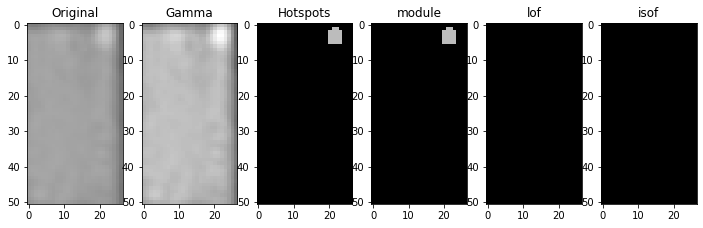

[-0.98071877 -1.26174483 -0.99581721 -1.39646665 -1.12842719 -2.29922379
 -1.01337983 -0.9729008 ]
[-1.85857924]
[-0.42209572 -0.50361741 -0.42384895 -0.498123   -0.45300101 -0.64321049
 -0.43145392 -0.41855007]
[-0.7034317]
0.0 0
2744.jpg Normal
[-0.9856569  -0.99609067 -1.14442047 -0.99437618 -0.99102744 -1.01211202
 -1.02488036 -0.99226273]
[-1.75809585]
[-0.42255878 -0.42031803 -0.50124614 -0.43353094 -0.42029867 -0.44185673
 -0.44345557 -0.46545267]
[-0.66323834]
0.0 0
4335.jpg Normal
[-0.96713495 -1.3988968  -1.00261056 -1.00640385 -0.96266374 -0.99196789
 -0.96232664 -1.1203552 ]
[-1.83299977]
[-0.43945124 -0.52165606 -0.46392381 -0.46262651 -0.43956975 -0.45097324
 -0.43741253 -0.46813396]
[-0.69319991]
0.0 0
901.jpg Normal
[-1.00629278 -1.00610861 -1.01271143 -1.00405142 -1.01597256 -0.97150534
 -1.00629278 -0.99204335]
[-1.72207615]
[-0.46191907 -0.47049523 -0.44956724 -0.47008558 -0.43828012 -0.45058639
 -0.46191907 -0.47180985]
[-0.64883046]
0.0 0
4453.jpg Normal
[-0.997777

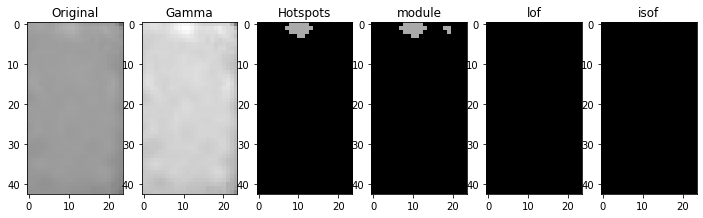

[-0.95392833 -1.00423374 -1.03909894 -0.99941982 -1.02196422 -1.00014758
 -1.03500386 -1.01666291]
[-1.69492094]
[-0.42890208 -0.45722575 -0.45363448 -0.45224754 -0.44975518 -0.42842403
 -0.46696083 -0.45139286]
[-0.63796838]
0.0 0
4485.jpg Normal
[-1.24531201 -1.01232032 -0.99323469 -1.03853131 -1.00915003 -1.05773489
 -1.00323772 -0.9925043 ]
[-1.70933596]
[-0.55507318 -0.48471653 -0.46189937 -0.47148683 -0.45598632 -0.49280026
 -0.44868101 -0.47942508]
[-0.64373438]
0.0 0
2792.jpg Normal
[-1.3610763  -1.47430776 -1.09170052 -1.31725576 -2.66410981 -1.3610763
 -0.96011525 -1.14946126]
[-1.75809585]
[-0.52603184 -0.54999532 -0.47563631 -0.50598371 -0.65422044 -0.52603184
 -0.43112302 -0.51269965]
[-0.66323834]
0.0 0
4308.jpg Normal
[-1.13261768 -1.00256491 -1.44652701 -1.08773729 -1.15301785 -0.99027796
 -1.25065987 -0.99664585]
[-1.85857924]
[-0.52960053 -0.46941028 -0.63883364 -0.50268826 -0.54032426 -0.48752667
 -0.57719437 -0.42899147]
[-0.7034317]
0.0 0
3467.jpg Normal
[-1.047248

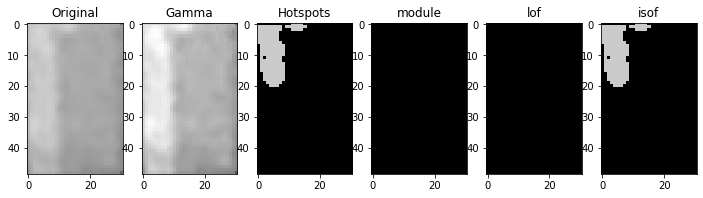

[-1.16598124 -1.07081474 -1.36535347 -1.29807083 -1.08268162 -1.09244506
 -1.63916045 -1.14279338]
[-1.72207615]
[-0.52915081 -0.4636933  -0.5508994  -0.534522   -0.48321265 -0.49097447
 -0.56141644 -0.52547156]
[-0.64883046]
0.0 0
1270.jpg Normal
[-0.96996054 -0.98799822 -1.13559552 -0.97292424 -1.01781475 -1.01781475
 -0.98502101 -0.98501621]
[-1.85857924]
[-0.40623631 -0.42454197 -0.46495694 -0.4319493  -0.43367932 -0.43367932
 -0.43438884 -0.43396048]
[-0.7034317]
0.0 0
1516.jpg Normal
[-1.00883359 -0.98766472 -1.02167208 -0.98532345 -0.97150534 -1.01271143
 -0.9963544  -1.00113373]
[-1.72207615]
[-0.45512366 -0.4495596  -0.46676367 -0.45154944 -0.45058639 -0.44956724
 -0.44738682 -0.46368212]
[-0.64883046]
0.0 0
3301.jpg Normal
[-0.99168267 -1.1100107  -0.99168267 -1.04369592 -1.04369592 -0.98117591
 -0.97109423 -1.05668005]
[-1.75809585]
[-0.42515062 -0.50310436 -0.42515062 -0.45421641 -0.45421641 -0.42269828
 -0.42575979 -0.45385924]
[-0.66323834]
0.0 0
3315.jpg Normal
[-0.97420

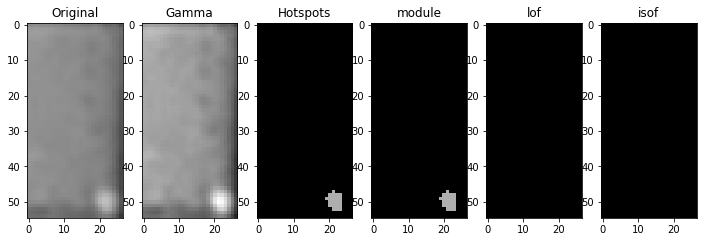

[-1.00597661 -0.9951813  -1.0068124  -0.99308099 -1.05174734 -0.9802569
 -1.00910206 -0.99308099]
[-1.75809585]
[-0.4854239  -0.4881097  -0.43663936 -0.50069298 -0.46346294 -0.41519957
 -0.47052859 -0.50069298]
[-0.66323834]
0.0 0
4334.jpg Normal
[-0.99807835 -1.07969769 -1.30898292 -1.02906194 -1.11869265 -1.01692396
 -1.16511065 -1.03607997]
[-1.86224249]
[-0.42531649 -0.491326   -0.53299782 -0.44599739 -0.48676011 -0.44017824
 -0.49990127 -0.46958235]
[-0.704897]
0.0 0
2745.jpg Normal
[-1.2716147  -1.47962211 -1.0868045  -1.12637342 -1.20915355 -1.66995183
 -1.37414526 -1.30638081]
[-1.76166564]
[-0.53334069 -0.61377295 -0.49866611 -0.53134416 -0.51741581 -0.69218198
 -0.55799517 -0.53263647]
[-0.66466626]
1.0 4.0 0.7853981633974483 1.0
0.0 0.0 0 0
22.0 40.14213538169861 0.17156614865899678 0.9300283089480748
0.0 4.0 0.0 1.0
3.0 7.656854152679443 0.6430287180776717 1.0
0.0 5.656854152679443 0.0 1.0
0.0 0
2023.jpg Normal
[-0.99748344 -0.98708909 -0.99204335 -0.99905533 -1.00829711 -0

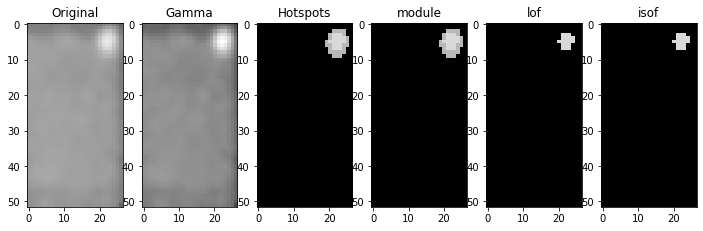

[-0.97298747 -1.1445962  -0.97465299 -1.01830292 -1.35467448 -0.9876738
 -0.97811811 -0.97277865]
[-1.76166564]
[-0.44222643 -0.46313475 -0.43123882 -0.43861134 -0.51604217 -0.44735376
 -0.44158102 -0.45474805]
[-0.66466626]
0.0 0
525.jpg Normal
[-0.99686946 -1.02990297 -1.00071021 -1.00014758 -1.04944981 -0.96219525
 -0.97451342 -1.01429448]
[-1.69492094]
[-0.4447497  -0.46435094 -0.46003612 -0.42842403 -0.45174337 -0.44044356
 -0.43451724 -0.45520374]
[-0.63796838]
0.0 0
531.jpg Normal
[-0.96215657 -1.10684067 -1.07644112 -2.97962156 -1.06706011 -1.03310364
 -1.19340154 -0.99980447]
[-1.72207615]
[-0.4570381  -0.49113849 -0.49896467 -0.77047451 -0.48439203 -0.45377157
 -0.47239532 -0.48260344]
[-0.64883046]
0.0 0
4863.jpg Normal
[-1.07594554 -1.20264898 -1.06257167 -0.99041763 -1.20264898 -0.99315447
 -1.00797363 -0.98472537]
[-1.86224249]
[-0.45902109 -0.46656013 -0.45751344 -0.44163898 -0.46656013 -0.42465881
 -0.43404653 -0.42893518]
[-0.704897]
0.0 0
257.jpg Normal
[-0.99308099 -

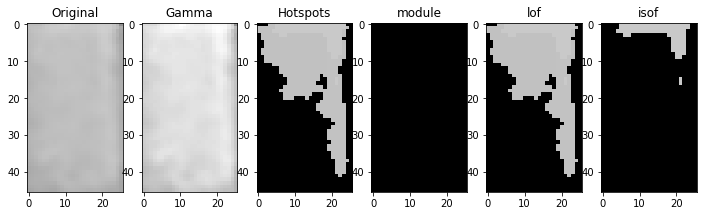

[-1.00610861 -1.01271143 -1.01969667 -1.00610861 -0.98708909 -1.00629278
 -1.01160995 -1.00113373]
[-1.72207615]
[-0.47049523 -0.44956724 -0.45600962 -0.47049523 -0.45839338 -0.46191907
 -0.47964588 -0.46368212]
[-0.64883046]
0.0 0
2590.jpg Normal
[-0.98932574 -1.29404104 -0.97310286 -0.99560812 -1.73366278 -1.05882211
 -0.99980957 -0.97666005]
[-1.76166564]
[-0.44932587 -0.50061794 -0.44879765 -0.44302158 -0.54723439 -0.46455759
 -0.44135551 -0.44414453]
[-0.66466626]
0.0 0
1099.jpg Normal
[-0.99801636 -1.09916139 -1.03595421 -1.02493303 -0.9835737  -1.05890225
 -1.11384952 -0.9891234 ]
[-1.85857924]
[-0.48992803 -0.52911586 -0.46421922 -0.4820635  -0.4977093  -0.49702106
 -0.5134175  -0.40625909]
[-0.7034317]
0.0 0
1927.jpg Normal
[-0.99401378 -1.11068663 -1.07081474 -1.08326105 -0.98917451 -1.05115476
 -1.1267706  -1.00766715]
[-1.72207615]
[-0.43670803 -0.48319532 -0.4636933  -0.47880578 -0.4442887  -0.47077361
 -0.46612766 -0.46215517]
[-0.64883046]
0.0 0
4687.jpg Normal
[-0.98364

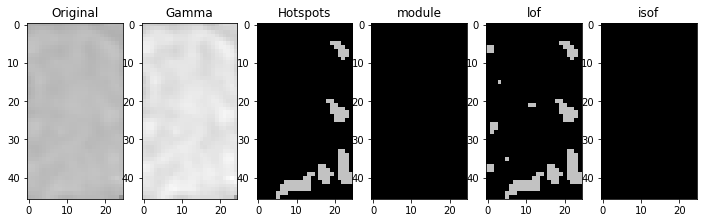

[-0.99752779 -1.01857655 -0.98321034 -4.92484735 -1.01225581 -0.97277435
 -1.08384231 -1.14715273]
[-1.83299977]
[-0.46792718 -0.45936684 -0.47791951 -0.75815751 -0.46636329 -0.47176483
 -0.52647375 -0.47271208]
[-0.69319991]
0.0 0
3671.jpg Normal
[-1.20553951 -0.983178   -2.43525003 -1.09339109 -1.56824267 -1.03633596
 -0.97552653 -1.39237164]
[-1.78206358]
[-0.49660354 -0.472134   -0.69835112 -0.47280624 -0.58042338 -0.4574834
 -0.43101514 -0.53624608]
[-0.67282543]
0.0 0
1066.jpg Normal
[-0.95110126 -1.04913448 -0.95110126 -0.96797459 -1.82491061 -1.32609789
 -1.01881996 -0.96797459]
[-1.72207615]
[-0.43618253 -0.45669916 -0.43618253 -0.44957531 -0.64859031 -0.52479972
 -0.4705075  -0.44957531]
[-0.64883046]
0.0 0
294.jpg Normal
[-1.07969769 -0.99561394 -1.04898103 -1.16511065 -1.07594554 -1.04073159
 -1.0167989  -1.43196539]
[-1.86224249]
[-0.491326   -0.42676921 -0.47872718 -0.49990127 -0.45902109 -0.45616526
 -0.42437963 -0.5565006 ]
[-0.704897]
0.0 0
1700.jpg Normal
[-0.99003885

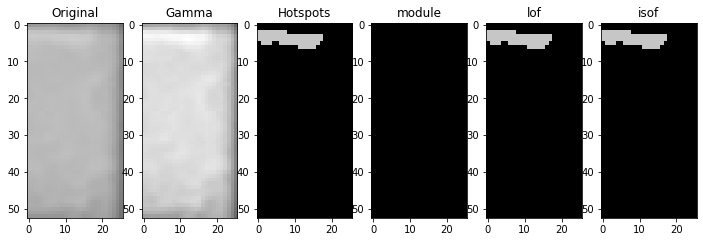

[-1.11569655 -1.33368258 -1.02740398 -1.20434164 -1.00192018 -1.13559552
 -1.07394886 -1.04753794]
[-1.85857924]
[-0.46759817 -0.48863134 -0.45109835 -0.4637214  -0.43041007 -0.46495694
 -0.47002063 -0.43817085]
[-0.7034317]
0.0 0
3895.jpg Normal
[-0.99961142 -1.02353396 -1.09886781 -1.00610861 -1.00145524 -1.00612806
 -0.99869313 -0.99812313]
[-1.72207615]
[-0.49698996 -0.45885812 -0.52972409 -0.47049523 -0.44544297 -0.47877297
 -0.46064285 -0.48956407]
[-0.64883046]
0.0 0
2553.jpg Normal
[-1.86363543 -1.2877095  -1.5916664  -1.52108396 -2.13560447 -1.3383483
 -1.5560514  -1.78139718]
[-1.75809585]
[-0.60045489 -0.52380344 -0.55875431 -0.56384164 -0.71540231 -0.4810039
 -0.54815323 -0.61335195]
[-0.66323834]
621.5 127.98275482654572 0.47681300122602915 0.8736756551464092
4.0 8.828427076339722 0.6449160528303446 0.9798213740342159
621.5 127.98275482654572 0.47681300122602915 0.8736756551464092
4.0 8.828427076339722 0.6449160528303446 0.9798213740342159
107.0 576
4122.jpg Module-Anomaly

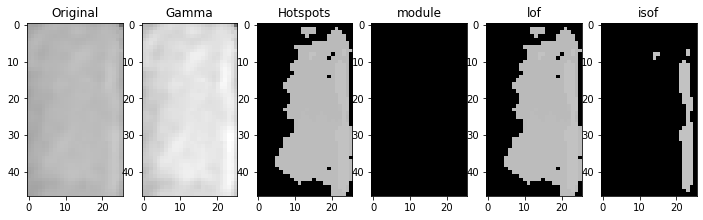

[-1.00256491 -0.97816288 -0.99906331 -1.02875719 -0.97621232 -0.99801636
 -1.08773729 -1.0114802 ]
[-1.85857924]
[-0.46941028 -0.50073177 -0.43733299 -0.47281901 -0.4878695  -0.48992803
 -0.50268826 -0.46727043]
[-0.7034317]
0.0 0
4644.jpg Normal
[-1.00800118 -0.98258348 -0.99483312 -0.99373265 -1.         -2.69335607
 -0.99589822 -0.98782805]
[-1.70933596]
[-0.44928049 -0.45718722 -0.47201136 -0.44275421 -0.47095595 -0.68554909
 -0.47385374 -0.45900784]
[-0.64373438]
0.0 0
2235.jpg Normal
[-1.09253413 -1.04896439 -0.96011525 -1.07559138 -1.08151093 -3.09586652
 -0.98364941 -1.081933  ]
[-1.75809585]
[-0.46516577 -0.43415481 -0.43112302 -0.45405633 -0.45910583 -0.68165713
 -0.42592926 -0.4729739 ]
[-0.66323834]
0.0 0
337.jpg Normal
[-1.02829084 -0.99041412 -0.99833423 -1.01933651 -1.01787384 -1.04860202
 -1.35467448 -0.96686362]
[-1.76166564]
[-0.49267208 -0.44601122 -0.44086153 -0.45665515 -0.47480416 -0.48585578
 -0.51604217 -0.43641593]
[-0.66466626]
0.0 0
4903.jpg Normal
[-1.123145

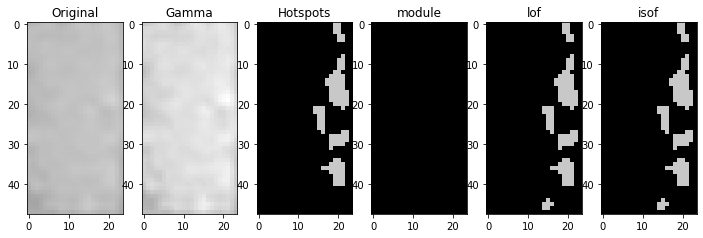

[-0.96835544 -0.97802017 -1.00145524 -1.01271143 -0.98766472 -0.99692735
 -1.04363077 -0.98532345]
[-1.72207615]
[-0.44964185 -0.44899524 -0.44544297 -0.44956724 -0.4495596  -0.44676112
 -0.48521573 -0.45154944]
[-0.64883046]
0.0 0
2355.jpg Normal
[-1.04788342 -0.99664585 -0.98045831 -1.08161354 -0.98045831 -0.97703707
 -0.99906331 -1.1607505 ]
[-1.85857924]
[-0.47131394 -0.42899147 -0.42386714 -0.47502943 -0.42386714 -0.41843275
 -0.43733299 -0.49347822]
[-0.7034317]
0.0 0
4724.jpg Normal
[-1.032814   -0.99417864 -1.1267706  -0.96713001 -1.07571758 -1.01487465
 -1.7838546  -1.00863662]
[-1.72207615]
[-0.46282673 -0.4417717  -0.46612766 -0.44404879 -0.46227482 -0.46738764
 -0.60490231 -0.45687127]
[-0.64883046]
0.0 0
4042.jpg Normal
[-0.96454946 -0.96225519 -1.02639322 -0.99900012 -0.98364941 -3.55066016
 -0.96150215 -0.98364941]
[-1.75809585]
[-0.43034745 -0.42097669 -0.44189983 -0.44173707 -0.42592926 -0.75621455
 -0.44048794 -0.42592926]
[-0.66323834]
0.0 0
2433.jpg Normal
[-1.11413

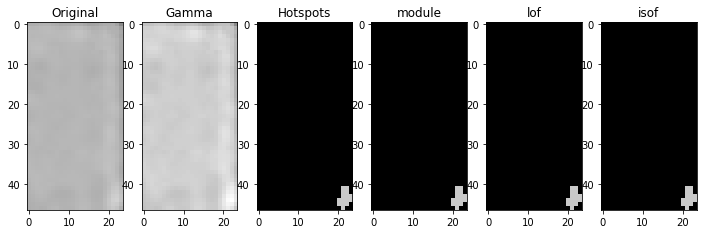

[-0.99397369 -0.99895654 -0.98032038 -1.06879898 -0.9891234  -0.97703707
 -0.98196995 -0.98032038]
[-1.85857924]
[-0.42389042 -0.44463743 -0.42315056 -0.47106351 -0.40625909 -0.41843275
 -0.43333507 -0.42315056]
[-0.7034317]
0.0 0
653.jpg Normal
[-1.00573842 -1.09976707 -1.01861026 -0.99037103 -1.01211202 -0.99003885
 -1.02488036 -1.50362375]
[-1.75809585]
[-0.47127779 -0.49224539 -0.49940515 -0.50158182 -0.44185673 -0.47717364
 -0.44345557 -0.56337002]
[-0.66323834]
0.0 0
2816.jpg Normal
[-0.96713001 -1.07571758 -0.99880619 -1.29807083 -1.00863662 -0.99031951
 -0.96713001 -1.05115476]
[-1.72207615]
[-0.44404879 -0.46227482 -0.4684558  -0.534522   -0.45687127 -0.4337021
 -0.44404879 -0.47077361]
[-0.64883046]
0.0 0
135.jpg Normal
[-1.01101074 -1.01589338 -1.19636251 -1.04944981 -0.97451342 -1.04567639
 -1.00726051 -1.02449368]
[-1.69492094]
[-0.45427689 -0.45256521 -0.51569458 -0.45174337 -0.43451724 -0.48030021
 -0.45184348 -0.44681529]
[-0.63796838]
0.0 0
121.jpg Normal
[-1.03203192 

[-0.53309447 -0.48620998 -0.5568138  -0.53134416 -0.54033931 -0.52584626
 -0.5041768  -0.53230178]
[-0.66466626]
0.0 0
4532.jpg Normal
[-1.92374931 -1.37541725 -1.14549892 -1.68451563 -1.47280441 -1.55043186
 -1.02381289 -1.3154324 ]
[-1.78206358]
[-0.73242608 -0.57164005 -0.50838831 -0.64761458 -0.56844983 -0.60181394
 -0.48008745 -0.56534896]
[-0.67282543]
7.5 15.071067690849304 0.41493788266882725 0.9570435830321561
0.0 2.0 0.0 1.0
46.5 36.72792184352875 0.43318170439652703 0.912711898671343
0.0 4.0 0.0 1.0
0.0 0.0 0 0
1.0 4.828427076339722 0.5390120952601716 1.0
7.5 15.071067690849304 0.41493788266882725 0.9570435830321561
46.5 36.72792184352875 0.43318170439652703 0.912711898671343
19.0 60
2143.jpg Multi-Hotspots


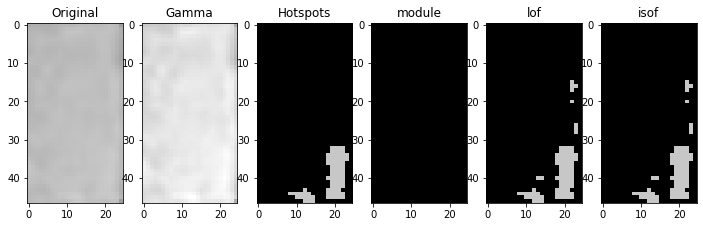

[-0.96996054 -0.98641641 -0.98279398 -1.15473725 -0.96759918 -0.98279398
 -1.01781475 -1.09800203]
[-1.85857924]
[-0.40623631 -0.43524005 -0.42499334 -0.45526518 -0.41180728 -0.42499334
 -0.43367932 -0.45005369]
[-0.7034317]
0.0 0
2625.jpg Normal
[-1.04121776 -0.99323469 -0.97299793 -0.99418033 -0.99418033 -0.96717215
 -0.99776021 -1.00323772]
[-1.70933596]
[-0.4774989  -0.46189937 -0.45213694 -0.45701078 -0.45701078 -0.44709956
 -0.46145299 -0.44868101]
[-0.64373438]
0.0 0
4254.jpg Normal
[-1.00391571 -0.97150534 -1.13216901 -0.98532345 -0.99869313 -1.02228949
 -1.46174705 -1.04209169]
[-1.72207615]
[-0.46266462 -0.45058639 -0.49567931 -0.45154944 -0.46064285 -0.45934828
 -0.56919274 -0.47731685]
[-0.64883046]
0.0 0
860.jpg Normal
[-0.99031951 -1.26623189 -1.68628735 -1.07571758 -0.96239948 -1.07571758
 -0.99777758 -0.99880619]
[-1.72207615]
[-0.4337021  -0.52129297 -0.57111903 -0.46227482 -0.43721897 -0.46227482
 -0.43419075 -0.4684558 ]
[-0.64883046]
0.0 0
20.jpg Normal
[-1.01375782

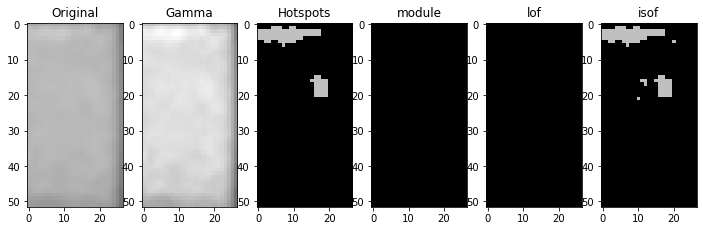

[-0.98692559 -0.97077032 -1.00836498 -0.99072889 -0.98692559 -1.89806252
 -1.01584002 -0.98429262]
[-1.78206358]
[-0.43887711 -0.44623307 -0.4653567  -0.43340959 -0.43887711 -0.64516678
 -0.44559722 -0.43618822]
[-0.67282543]
5.5 19.41421353816986 0.1833719693677908 0.9850054182402465
0.0 0
3539.jpg Normal
[-0.97451342 -1.03500386 -1.02196422 -1.03909894 -1.01059925 -1.97946772
 -1.01059925 -0.97451342]
[-1.69492094]
[-0.43451724 -0.46696083 -0.44975518 -0.45363448 -0.44217999 -0.59438147
 -0.44217999 -0.43451724]
[-0.63796838]
0.0 0
2627.jpg Normal
[-1.01963884 -1.02875719 -0.97816288 -0.99027796 -0.98376232 -1.00256491
 -1.06995907 -0.97621232]
[-1.85857924]
[-0.47903012 -0.47281901 -0.50073177 -0.48752667 -0.43842807 -0.46941028
 -0.46498958 -0.4878695 ]
[-0.7034317]
0.0 0
5148.jpg Normal
[-0.98988256 -1.38123325 -1.05943992 -1.14442047 -0.98517819 -1.70124695
 -1.02643665 -1.00828414]
[-1.75809585]
[-0.46532311 -0.54179666 -0.47219115 -0.50124614 -0.43988767 -0.6023706
 -0.46280648

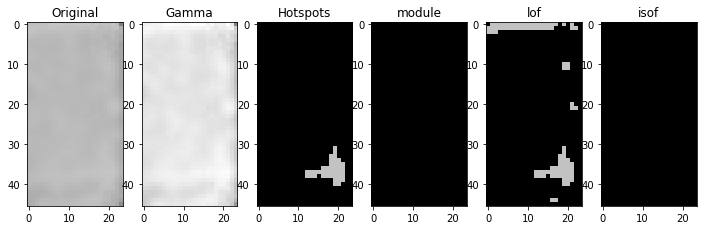

[-1.00323772 -1.09304432 -1.00800118 -0.99528958 -1.36229069 -0.99829418
 -0.99776021 -0.98951458]
[-1.70933596]
[-0.44868101 -0.49632443 -0.44928049 -0.44887988 -0.53207223 -0.46302194
 -0.46145299 -0.4482503 ]
[-0.64373438]
0.0 0
1448.jpg Normal
[-1.21260082 -1.08268162 -1.26623189 -1.08268162 -1.59717292 -1.10773246
 -1.10773246 -1.06660885]
[-1.72207615]
[-0.5221649  -0.48321265 -0.52129297 -0.48321265 -0.55161055 -0.49655529
 -0.49655529 -0.46602219]
[-0.64883046]
0.0 0
2169.jpg Normal
[-1.69658702 -1.12422898 -2.04062637 -1.35672927 -1.22796297 -2.04062637
 -1.43252892 -1.03642049]
[-1.75809585]
[-0.57141157 -0.45763537 -0.6143225  -0.51791987 -0.48626685 -0.6143225
 -0.52761844 -0.44351068]
[-0.66323834]
0.0 0
3277.jpg Normal
[-1.04050676 -1.47019806 -1.02906194 -0.99158722 -1.04262479 -0.98150485
 -0.99809525 -1.02726114]
[-1.86224249]
[-0.45805631 -0.53126778 -0.44599739 -0.4288293  -0.47366188 -0.44030159
 -0.41407345 -0.47070523]
[-0.704897]
0.0 0
4518.jpg Normal
[-0.9647457

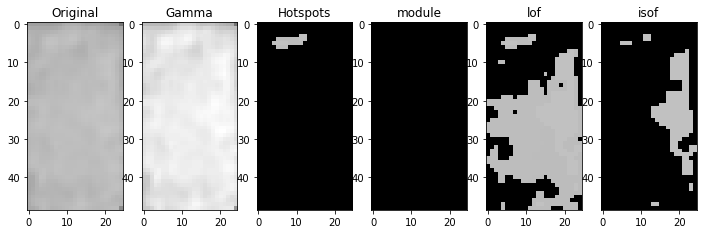

[-1.10922975 -1.69258807 -0.99560812 -1.03723308 -1.09695899 -2.59276959
 -1.02829084 -1.11329997]
[-1.76166564]
[-0.52192207 -0.55391697 -0.44302158 -0.44356092 -0.5041768  -0.68129168
 -0.49267208 -0.53301167]
[-0.66466626]
0.0 0
1886.jpg Normal
[-0.99483312 -1.19126195 -0.99776021 -1.33247534 -1.0775549  -1.01232032
 -1.02729514 -1.12774376]
[-1.70933596]
[-0.47201136 -0.53050395 -0.46145299 -0.56303703 -0.52100634 -0.48471653
 -0.43700684 -0.51874284]
[-0.64373438]
0.0 0
1892.jpg Normal
[-1.26249266 -0.98641641 -1.00639489 -1.11419012 -1.20434164 -0.99581721
 -1.08069039 -0.97703195]
[-1.85857924]
[-0.51794497 -0.43524005 -0.42884266 -0.45135292 -0.4637214  -0.42384895
 -0.43886522 -0.43497374]
[-0.7034317]
0.0 0
4732.jpg Normal
[-1.22501961 -0.96106738 -1.01061033 -1.05251372 -1.15621976 -2.96116706
 -1.12406911 -1.36516746]
[-1.72207615]
[-0.53138257 -0.44286314 -0.50067075 -0.47034171 -0.54362755 -0.75009967
 -0.53040869 -0.60964953]
[-0.64883046]
0.0 0
2343.jpg Normal
[-1.00071

[-0.97666005 -1.03723308 -0.97004681 -0.96917866 -1.91191153 -0.99041412
 -1.00145843 -1.32091441]
[-1.76166564]
[-0.44414453 -0.44356092 -0.44508678 -0.42653232 -0.59205967 -0.44601122
 -0.45069585 -0.50991077]
[-0.66466626]
0.0 0
321.jpg Normal
[-0.99851095 -1.02912403 -0.98472537 -1.06257167 -0.97840729 -1.0167989
 -1.10037258 -1.10933845]
[-1.86224249]
[-0.41758048 -0.4467005  -0.42893518 -0.45751344 -0.4174307  -0.42437963
 -0.47046122 -0.47362992]
[-0.704897]
0.0 0
4915.jpg Normal
[-1.02096342 -0.97077032 -1.00871297 -0.98891257 -1.20553951 -1.04838067
 -1.00904904 -0.99867778]
[-1.78206358]
[-0.47541278 -0.44623307 -0.47043875 -0.43432901 -0.49660354 -0.49504235
 -0.48967966 -0.455881  ]
[-0.67282543]
0.0 0
447.jpg Normal
[-0.99204335 -0.9963544  -1.02125623 -1.01969667 -1.00372693 -0.98766472
 -0.98708909 -1.18564855]
[-1.72207615]
[-0.47180985 -0.44738682 -0.4613304  -0.45600962 -0.47663653 -0.4495596
 -0.45839338 -0.52470643]
[-0.64883046]
0.0 0
4134.jpg Normal
[-1.01337983 -

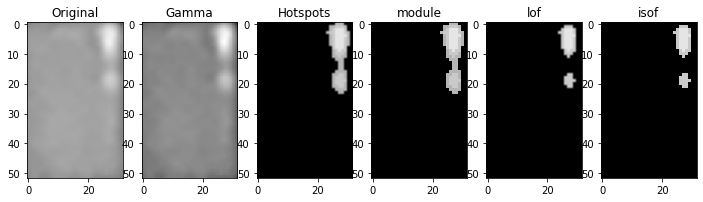

[-1.10348157 -1.54001107 -0.99097322 -1.27160071 -1.29728329 -1.15487959
 -0.95847535 -1.01881996]
[-1.72207615]
[-0.46100138 -0.5641151  -0.4801251  -0.51636736 -0.49749572 -0.51137391
 -0.43091735 -0.4705075 ]
[-0.64883046]
0.0 0
4120.jpg Normal
[-1.10548709 -1.14355914 -0.99168267 -1.37797644 -1.19228988 -1.07480772
 -1.02379857 -0.99168267]
[-1.75809585]
[-0.47792793 -0.47783809 -0.42515062 -0.54425429 -0.51397971 -0.4674841
 -0.43435791 -0.42515062]
[-0.66323834]
0.0 0
2551.jpg Normal
[-1.13261471 -1.2048646  -1.05840941 -1.16959407 -1.29719335 -1.09172719
 -1.33837409 -1.09122768]
[-1.75809585]
[-0.51639836 -0.49673073 -0.45125764 -0.51623378 -0.51692209 -0.47098085
 -0.51784731 -0.46379469]
[-0.66323834]
0.0 0
3897.jpg Normal
[-1.02708049 -0.96764133 -1.21825509 -0.97546107 -1.10348157 -0.95847535
 -0.95365315 -1.01057962]
[-1.72207615]
[-0.45056857 -0.46720708 -0.51905209 -0.45606743 -0.46100138 -0.43091735
 -0.43459657 -0.45617229]
[-0.64883046]
0.0 0
1058.jpg Normal
[-0.96887

[-0.4957565  -0.46684048 -0.45936684 -0.46792718 -0.45693356 -0.47623877
 -0.48313896 -0.46636329]
[-0.69319991]
0.0 0
533.jpg Normal
[-1.00760299 -1.09720311 -1.45053461 -0.97109423 -0.99635795 -0.99829563
 -1.00341087 -1.20525269]
[-1.75809585]
[-0.418096   -0.44324474 -0.48938709 -0.42575979 -0.45831568 -0.42222791
 -0.4502721  -0.47516742]
[-0.66323834]
0.0 0
1528.jpg Normal
[-0.97703707 -1.91895364 -0.98032038 -0.99397369 -1.30370047 -1.04714771
 -0.9891234  -1.00642819]
[-1.85857924]
[-0.41843275 -0.60872933 -0.42315056 -0.42389042 -0.50001594 -0.46831436
 -0.40625909 -0.43183014]
[-0.7034317]
0.0 0
4450.jpg Normal
[-1.01811897 -1.03968142 -1.00199519 -1.0172308  -1.0153343  -1.09894893
 -1.11068663 -1.01811897]
[-1.72207615]
[-0.48565858 -0.48617817 -0.51615556 -0.49339674 -0.49902099 -0.51869339
 -0.48319532 -0.48565858]
[-0.64883046]
0.0 0
2021.jpg Normal
[-0.98876829 -1.00752649 -1.08920849 -1.01433857 -0.97359937 -1.01183686
 -0.99225917 -0.96745319]
[-1.72690247]
[-0.478347

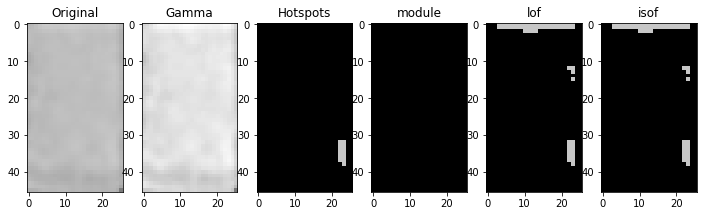

[-1.24268817 -1.08164385 -1.00216836 -1.17147862 -1.03677552 -1.02246972
 -1.29840652 -1.17147862]
[-1.69492094]
[-0.5712218  -0.52274836 -0.479692   -0.536863   -0.49893379 -0.46523376
 -0.58541266 -0.536863  ]
[-0.63796838]
0.0 0
2009.jpg Normal
[-1.0068124  -0.98517819 -1.02643665 -0.9802569  -1.21825867 -0.98517819
 -0.97484059 -0.9802569 ]
[-1.75809585]
[-0.43663936 -0.43988767 -0.46280648 -0.41519957 -0.51826186 -0.43988767
 -0.41895284 -0.41519957]
[-0.66323834]
0.0 0
4493.jpg Normal
[-0.96127494 -0.96868069 -0.97866865 -0.96127494 -1.11285204 -1.09720311
 -0.97115309 -1.01726095]
[-1.75809585]
[-0.41799759 -0.43930864 -0.44447856 -0.41799759 -0.42712067 -0.44324474
 -0.45037354 -0.48375748]
[-0.66323834]
11.0 15.656854152679443 0.5638888888359976 0.9464948442054
11.0 15.656854152679443 0.5638888888359976 0.9464948442054
3.0 16
719.jpg Single-Hotspot


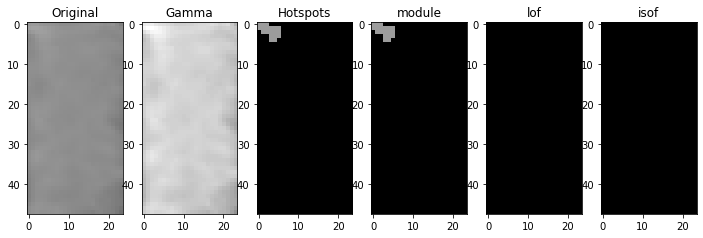

[-0.98071877 -0.99581721 -1.00639489 -1.15473725 -5.29587971 -1.04464237
 -0.97292424 -0.96996054]
[-1.85857924]
[-0.42209572 -0.42384895 -0.42884266 -0.45526518 -0.82295245 -0.46628908
 -0.4319493  -0.40623631]
[-0.7034317]
0.0 0
2784.jpg Normal
[-1.02096505 -0.98248277 -1.09304432 -1.         -1.69352508 -1.22735984
 -0.98951458 -0.99776021]
[-1.70933596]
[-0.48521719 -0.43626497 -0.49632443 -0.44968345 -0.60139712 -0.51567266
 -0.4482503  -0.46145299]
[-0.64373438]
0.0 0
2948.jpg Normal
[-0.99752779 -1.00216699 -0.98321034 -0.96655355 -1.06409387 -0.99752779
 -1.02736416 -0.96655355]
[-1.83299977]
[-0.46792718 -0.46684048 -0.47791951 -0.48780032 -0.51638832 -0.46792718
 -0.48217756 -0.48780032]
[-0.69319991]
0.0 0
2790.jpg Normal
[-0.99692735 -1.07969424 -1.00145524 -1.01815916 -0.96835544 -1.07969424
 -1.2823888  -1.01815916]
[-1.72207615]
[-0.44676112 -0.48972644 -0.44544297 -0.45663224 -0.44964185 -0.48972644
 -0.54838292 -0.45663224]
[-0.64883046]
0.0 0
1299.jpg Normal
[-1.02829

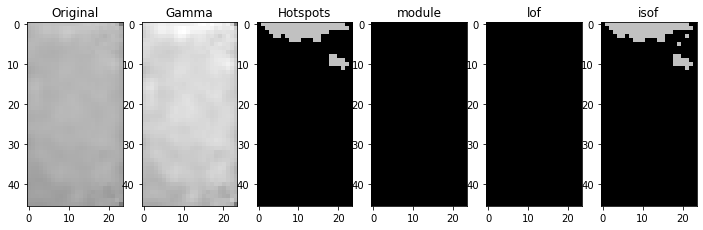

[-0.97840729 -2.11940136 -1.39807579 -1.81155966 -1.15021653 -1.54383769
 -1.04073159 -1.66882605]
[-1.86224249]
[-0.4174307  -0.73050573 -0.54947171 -0.64371644 -0.50624732 -0.57181661
 -0.45616526 -0.62001571]
[-0.704897]
0.0 2.0 0.0 1.0
124.0 93.4558435678482 0.1784097666924015 0.7672025115088225
0.0 0.0 0 0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 0
1515.jpg Normal
[-1.11384952 -0.99050286 -1.05890225 -1.01114435 -1.18113009 -1.05890225
 -1.18113009 -1.11384952]
[-1.85857924]
[-0.5134175  -0.50267645 -0.49702106 -0.47112759 -0.53354244 -0.49702106
 -0.53354244 -0.5134175 ]
[-0.7034317]
0.0 0
3302.jpg Normal
[-1.05115476 -1.0798105  -0.96106738 -0.96239948 -0.99401378 -0.99417864
 -1.02806785 -1.55389362]
[-1.72207615]
[-0.47077361 -0.48858128 -0.44286314 -0.43721897 -0.43670803 -0.4417717
 -0.46361614 -0.54797948]
[-0.64883046]
0.0 0
3464.jpg Normal
[-1.02810491 -1.00511144 -1.00449046 -1.00267492 -1.00102835 -0.99204975
 -1.01694205 -1.02471804]
[-1.72690247]
[-0.47388908 -0.44666911 -0.465384

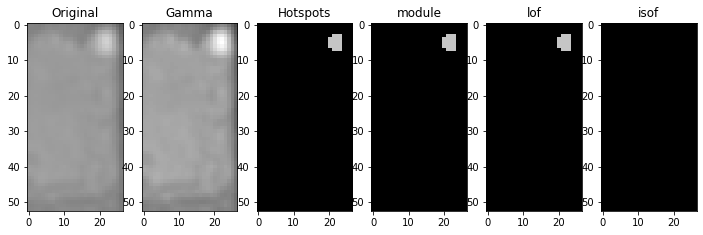

[-0.98117591 -1.72747153 -1.18006319 -1.49291964 -1.20525269 -1.092024
 -1.3383483  -1.092024  ]
[-1.75809585]
[-0.42269828 -0.55599862 -0.46272877 -0.51050511 -0.47516742 -0.44701233
 -0.4810039  -0.44701233]
[-0.66323834]
0.0 0
1924.jpg Normal
[-1.03253917 -0.98150485 -0.99809525 -2.08848183 -0.99851095 -0.99315447
 -1.01862086 -1.20264898]
[-1.86224249]
[-0.44613237 -0.44030159 -0.41407345 -0.56327998 -0.41758048 -0.42465881
 -0.45659097 -0.46656013]
[-0.704897]
0.0 0
268.jpg Normal
[-1.00800118 -1.03853131 -0.98355784 -1.01232032 -0.99323469 -1.00725822
 -1.15149574 -1.00018009]
[-1.70933596]
[-0.44928049 -0.47148683 -0.45561657 -0.48471653 -0.46189937 -0.46843734
 -0.53120052 -0.4531157 ]
[-0.64373438]
0.0 0
4684.jpg Normal
[-1.04397717 -1.02410117 -0.99482223 -1.03797556 -1.02196422 -1.04420823
 -1.02072384 -1.43520863]
[-1.69492094]
[-0.45312498 -0.42515601 -0.43382908 -0.511391   -0.44975518 -0.46104498
 -0.45640818 -0.5495612 ]
[-0.63796838]
0.0 0
3855.jpg Normal
[-1.00829711 

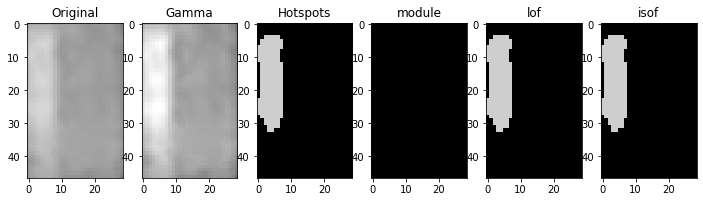

[-1.00307989 -1.02403842 -0.97475637 -1.1513773  -0.97750717 -0.99409246
 -1.02736416 -1.08384231]
[-1.83299977]
[-0.47088484 -0.45994727 -0.4556835  -0.51636967 -0.47623877 -0.4706823
 -0.48217756 -0.52647375]
[-0.69319991]
0.0 0
3841.jpg Normal
[-1.01933651 -0.99846718 -1.12637342 -1.07993319 -1.07342661 -0.96686362
 -0.99980957 -1.03523052]
[-1.76166564]
[-0.45665515 -0.44685982 -0.53134416 -0.47181817 -0.49635184 -0.43641593
 -0.44135551 -0.47991206]
[-0.66466626]
0.0 0
2587.jpg Normal
[-1.06530817 -1.10291424 -0.99718724 -1.00766715 -1.02266161 -1.03968142
 -0.99401378 -1.0962272 ]
[-1.72207615]
[-0.47987523 -0.48900734 -0.52727056 -0.46215517 -0.48994786 -0.48617817
 -0.43670803 -0.4586302 ]
[-0.64883046]
0.0 0
4848.jpg Normal
[-1.01951016 -0.99581721 -0.98501621 -0.98279398 -1.00639489 -1.15473725
 -0.98071877 -0.96996054]
[-1.85857924]
[-0.45834029 -0.42384895 -0.43396048 -0.42499334 -0.42884266 -0.45526518
 -0.42209572 -0.40623631]
[-0.7034317]
0.0 0
4690.jpg Normal
[-0.981969

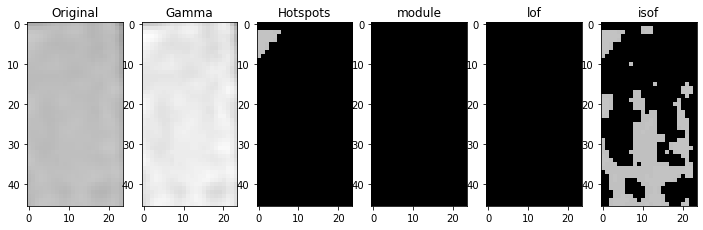

[-1.158211   -1.00018009 -2.14643522 -0.98248277 -0.99829418 -1.39754738
 -1.04121776 -0.99373265]
[-1.70933596]
[-0.48773535 -0.4531157  -0.66728489 -0.43626497 -0.46302194 -0.53715655
 -0.4774989  -0.44275421]
[-0.64373438]
0.0 0
283.jpg Normal
[-1.08069039 -1.24038144 -1.17294968 -0.98650585 -1.34884392 -1.05824722
 -1.17294968 -0.98086354]
[-1.85857924]
[-0.43886522 -0.49773279 -0.47702966 -0.45045669 -0.51041447 -0.45521412
 -0.47702966 -0.44913456]
[-0.7034317]
0.0 0
4647.jpg Normal
[-1.02125623 -1.00469654 -1.01597256 -0.99706784 -1.00250905 -1.0020048
 -1.00883359 -1.00415337]
[-1.72207615]
[-0.4613304  -0.47725489 -0.43828012 -0.48558482 -0.48206475 -0.46502083
 -0.45512366 -0.4860497 ]
[-0.64883046]
0.0 0
3128.jpg Normal
[-1.10935934 -1.01061033 -1.0172308  -1.05251372 -1.04413337 -0.99401378
 -1.09894893 -1.27725654]
[-1.72207615]
[-0.51192159 -0.50067075 -0.49339674 -0.47034171 -0.51737772 -0.43670803
 -0.51869339 -0.56884655]
[-0.64883046]
0.0 0
2236.jpg Normal
[-1.0136910

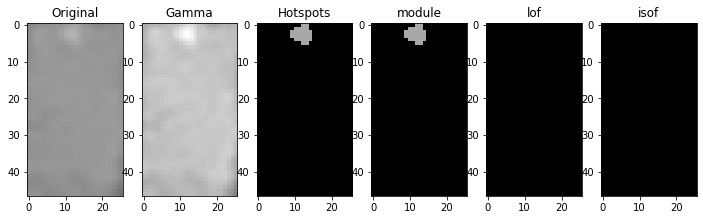

[-0.9856569  -1.01211202 -1.00691019 -1.0068124  -1.00318    -0.98761432
 -1.04144568 -1.01012487]
[-1.75809585]
[-0.42255878 -0.44185673 -0.44255585 -0.43663936 -0.48937093 -0.43366705
 -0.47148208 -0.42765895]
[-0.66323834]
0.0 0
2395.jpg Normal
[-0.97831407 -1.17633215 -1.04075787 -1.49139559 -1.00319266 -0.98753204
 -1.25884009 -0.98825079]
[-1.78206358]
[-0.43445278 -0.47349119 -0.46741586 -0.50875401 -0.43224166 -0.43218914
 -0.48904228 -0.43981388]
[-0.67282543]
0.0 0
308.jpg Normal
[-1.00725822 -0.99852157 -0.98258348 -0.99589822 -1.09586331 -0.98248277
 -1.         -1.        ]
[-1.70933596]
[-0.46843734 -0.45961083 -0.45718722 -0.47385374 -0.51711364 -0.43626497
 -0.44968345 -0.44968345]
[-0.64373438]
0.0 0
1844.jpg Normal
[-1.06976705 -1.01093647 -1.22942277 -1.0158984  -1.00348322 -1.0272508
 -1.0158984  -1.12231974]
[-1.72690247]
[-0.47918906 -0.45287164 -0.53083612 -0.4611371  -0.46490597 -0.48591448
 -0.4611371  -0.51126991]
[-0.65076099]
0.0 0
1677.jpg Normal
[-1.168413

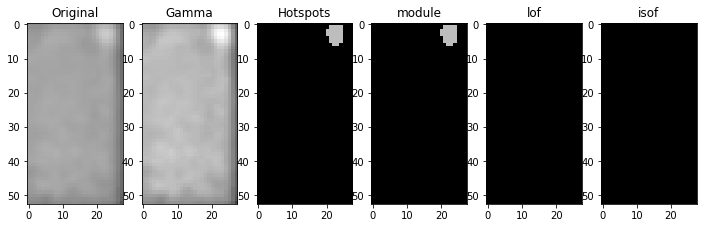

[-1.03500386 -0.99941982 -1.00726051 -0.95392833 -1.29817218 -1.04944981
 -1.03909894 -5.40238604]
[-1.69492094]
[-0.46696083 -0.45224754 -0.45184348 -0.42890208 -0.51615442 -0.45174337
 -0.45363448 -0.81134236]
[-0.63796838]
0.0 0
1893.jpg Normal
[-1.02906194 -0.97928974 -0.99851095 -1.00797363 -1.05860791 -1.01880658
 -0.99563059 -1.02726114]
[-1.86224249]
[-0.44599739 -0.41592163 -0.41758048 -0.43404653 -0.48082647 -0.45567437
 -0.41006538 -0.47070523]
[-0.704897]
0.0 0
4055.jpg Normal
[-0.99906331 -0.98376232 -0.9891234  -1.11346173 -1.02232804 -0.97703707
 -0.98668519 -0.99694659]
[-1.85857924]
[-0.43733299 -0.43842807 -0.40625909 -0.48106653 -0.43581053 -0.41843275
 -0.42679504 -0.42982643]
[-0.7034317]
0.0 0
2424.jpg Normal
[-0.97955942 -1.00273768 -1.31309036 -0.99877811 -0.98546311 -0.98245077
 -1.00684129 -1.00691605]
[-1.94887669]
[-0.43712503 -0.45768259 -0.51747494 -0.45222883 -0.44996938 -0.44119616
 -0.46969653 -0.47003514]
[-0.73955068]
0.0 0
4041.jpg Normal
[-0.9978364

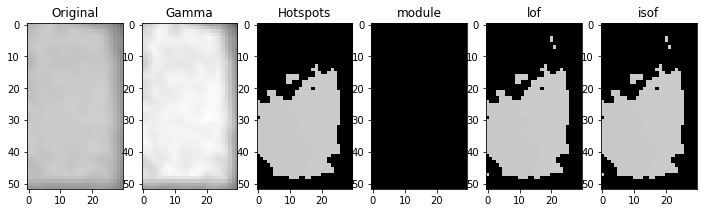

[-0.98766472 -1.00391571 -1.00391571 -0.96835544 -1.02228949 -1.00538284
 -0.97802017 -0.98532345]
[-1.72207615]
[-0.4495596  -0.46266462 -0.46266462 -0.44964185 -0.45934828 -0.4519578
 -0.44899524 -0.45154944]
[-0.64883046]
0.0 0
2197.jpg Normal
[-0.994298   -1.01433857 -1.01792681 -0.96745319 -0.99225917 -1.08920849
 -1.01694205 -1.19754146]
[-1.72690247]
[-0.46024451 -0.46407476 -0.48876605 -0.45450053 -0.46933987 -0.48576516
 -0.45878616 -0.52239433]
[-0.65076099]
0.0 0
3289.jpg Normal
[-0.98355784 -1.01286749 -1.03897951 -0.99498902 -0.98403772 -0.98328102
 -1.0057186  -1.        ]
[-1.70933596]
[-0.45561657 -0.44370486 -0.4983854  -0.48369838 -0.46122898 -0.46531819
 -0.44405057 -0.45826592]
[-0.64373438]
0.0 0
2829.jpg Normal
[-1.34280488 -1.32044843 -1.41948945 -1.15774386 -1.53896448 -1.27843818
 -1.44779874 -1.25765419]
[-1.78206358]
[-0.53001742 -0.5220622  -0.50413609 -0.49870129 -0.55408613 -0.49685895
 -0.51191092 -0.49565729]
[-0.67282543]
0.0 0
4280.jpg Normal
[-0.96428

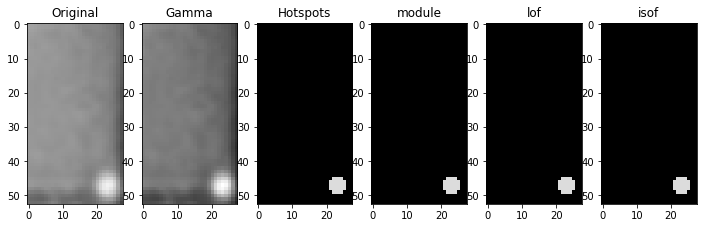

[-0.97851667 -1.54768653 -1.07340395 -2.03796623 -0.98636396 -1.18054563
 -0.96654767 -3.04176264]
[-1.9128832]
[-0.41607823 -0.56247784 -0.45175152 -0.61156357 -0.42352272 -0.47442959
 -0.42780803 -0.63867357]
[-0.72515328]
0.0 0
37.jpg Normal
[-1.03653559 -1.2182706  -0.98497288 -1.06150528 -0.98464062 -0.98464062
 -0.99719826 -1.02629888]
[-1.85857924]
[-0.46072799 -0.49681556 -0.43772346 -0.45602201 -0.4309891  -0.4309891
 -0.41873154 -0.47258577]
[-0.7034317]
0.0 0
2632.jpg Normal
[-1.14442047 -0.99904453 -0.99904453 -1.02464371 -1.38033809 -0.9802569
 -0.99609814 -1.04476961]
[-1.75809585]
[-0.50124614 -0.48286763 -0.48286763 -0.44160007 -0.59780279 -0.41519957
 -0.50761551 -0.46342508]
[-0.66323834]
0.0 0
4243.jpg Normal
[-1.03500386 -2.1947084  -0.99482223 -1.09273699 -1.53245361 -1.02410117
 -1.36217873 -1.03909894]
[-1.69492094]
[-0.46696083 -0.64683465 -0.43382908 -0.48557386 -0.56653344 -0.42515601
 -0.53703665 -0.45363448]
[-0.63796838]
0.0 0
1303.jpg Normal
[-0.97879293 -

[-0.45997613 -0.53005323 -0.44709956 -0.46471    -0.44405057 -0.45701078
 -0.4435552  -0.47710777]
[-0.64373438]
0.0 0
640.jpg Normal
[-0.99430859 -0.99063964 -0.98032038 -1.0942165  -0.99397369 -0.98547977
 -0.98045831 -1.50956299]
[-1.85857924]
[-0.41335986 -0.43556635 -0.42315056 -0.46795277 -0.42389042 -0.4303702
 -0.42386714 -0.56260202]
[-0.7034317]
0.0 0
2805.jpg Normal
[-1.01809859 -0.99543824 -1.05804029 -0.99021938 -1.01932847 -1.03374322
 -1.03212312 -1.02069235]
[-1.94887669]
[-0.46341189 -0.42984876 -0.49959682 -0.45467117 -0.48351198 -0.4918203
 -0.47359168 -0.44634631]
[-0.73955068]
0.0 0
668.jpg Normal
[-1.02782958 -1.00163699 -1.04397717 -1.08164385 -1.03677552 -1.0277289
 -1.02410117 -1.00371422]
[-1.69492094]
[-0.50731799 -0.4771209  -0.45312498 -0.52274836 -0.49893379 -0.50953213
 -0.42515601 -0.48722256]
[-0.63796838]
0.0 0
4284.jpg Normal
[-1.2301364  -1.2301364  -0.99730009 -1.69768383 -1.03564319 -1.35910306
 -2.66283706 -1.08903477]
[-1.9128832]
[-0.49934486 -0

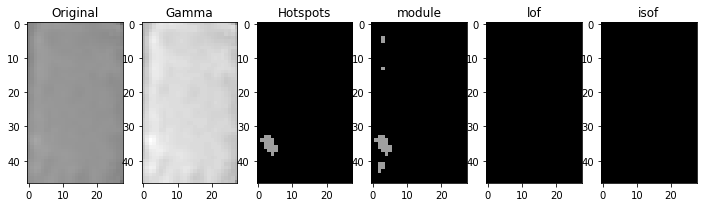

[-0.99502443 -0.96094098 -0.97856194 -1.06980604 -1.05340558 -0.96139687
 -1.25060503 -0.98047933]
[-1.94887669]
[-0.45287113 -0.42722117 -0.44249282 -0.47363361 -0.45317527 -0.42882066
 -0.47690748 -0.43864397]
[-0.73955068]
0.0 0
3702.jpg Normal
[-1.00203764 -1.00572215 -1.01549897 -1.00175225 -1.00612239 -0.9983729
 -1.0149789  -0.99730009]
[-1.9128832]
[-0.44921623 -0.46008685 -0.48087554 -0.43765942 -0.46228466 -0.44937685
 -0.431445   -0.46603361]
[-0.72515328]
0.0 0
3064.jpg Normal
[-1.0269537  -0.99437618 -1.38033809 -0.99003885 -1.1097332  -0.99609067
 -1.00573842 -0.99904453]
[-1.75809585]
[-0.49571043 -0.43353094 -0.59780279 -0.47717364 -0.54279346 -0.42031803
 -0.47127779 -0.48286763]
[-0.66323834]
0.0 0
1673.jpg Normal
[-0.99941976 -1.02293595 -0.99204975 -0.99941976 -0.96745319 -1.04934637
 -0.99160386 -0.97359937]
[-1.72690247]
[-0.47119906 -0.44955007 -0.48499266 -0.47119906 -0.45450053 -0.48432266
 -0.4422106  -0.45831969]
[-0.65076099]
0.0 0
4723.jpg Normal
[-1.014187

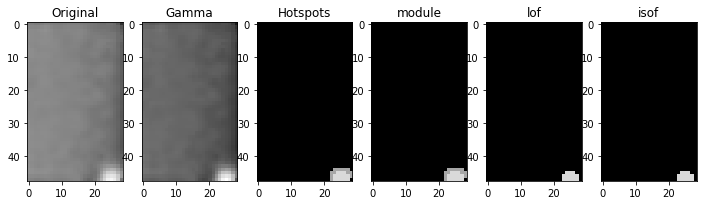

[-1.06486376 -1.03411614 -1.9227324  -1.29266709 -1.00379493 -1.10072874
 -0.96802288 -0.96802288]
[-1.83299977]
[-0.46681628 -0.46309163 -0.59082456 -0.51374715 -0.45353951 -0.46159185
 -0.44549712 -0.44549712]
[-0.69319991]
0.0 0
4051.jpg Normal
[-1.01409628 -0.99422959 -1.04121776 -0.99422959 -1.566465   -1.20031336
 -1.0057186  -0.97299793]
[-1.70933596]
[-0.45803283 -0.4435552  -0.4774989  -0.4435552  -0.57856377 -0.49340061
 -0.44405057 -0.45213694]
[-0.64373438]
0.0 0
1129.jpg Normal
[-0.99560883 -1.50012035 -1.00273768 -1.00125279 -1.00691605 -0.98448701
 -0.99834263 -1.0001627 ]
[-1.94887669]
[-0.44677708 -0.53995208 -0.45768259 -0.46087997 -0.47003514 -0.42973107
 -0.45522458 -0.44131806]
[-0.73955068]
0.0 0
1897.jpg Normal
[-1.02230622 -0.99204335 -1.00415337 -1.04695506 -1.22910933 -0.99812313
 -0.99437017 -1.02125623]
[-1.72207615]
[-0.49317208 -0.47180985 -0.4860497  -0.50174959 -0.5688047  -0.48956407
 -0.4452962  -0.4613304 ]
[-0.64883046]
0.0 0
3058.jpg Normal
[-0.9727

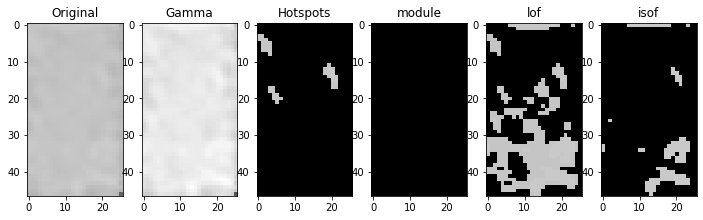

[-1.21208057 -1.46899898 -1.36688615 -1.04050676 -1.39807579 -1.11869265
 -1.58164281 -1.28337825]
[-1.86224249]
[-0.53795421 -0.5411134  -0.53991371 -0.45805631 -0.54947171 -0.48676011
 -0.58536457 -0.53862311]
[-0.704897]
0.0 0
4092.jpg Normal
[-1.01815916 -0.97150534 -1.15635088 -1.02167208 -1.10278122 -0.99692735
 -0.96835544 -1.01815916]
[-1.72207615]
[-0.45663224 -0.45058639 -0.50548907 -0.46676367 -0.49412812 -0.44676112
 -0.44964185 -0.45663224]
[-0.64883046]
0.0 0
3925.jpg Normal
[-1.03434471 -0.99196789 -0.99506057 -0.96570828 -1.01450241 -1.29266709
 -0.99506057 -1.03411614]
[-1.83299977]
[-0.46322045 -0.45097324 -0.45921072 -0.4356875  -0.47428314 -0.51374715
 -0.45921072 -0.46309163]
[-0.69319991]
0.0 0
2385.jpg Normal
[-0.99783648 -1.01232032 -1.         -1.00800118 -1.05773489 -0.98328102
 -0.9925043  -0.97591666]
[-1.70933596]
[-0.46590732 -0.48471653 -0.47095595 -0.44928049 -0.49280026 -0.46531819
 -0.47942508 -0.4469257 ]
[-0.64373438]
0.0 0
1854.jpg Normal
[-0.986324

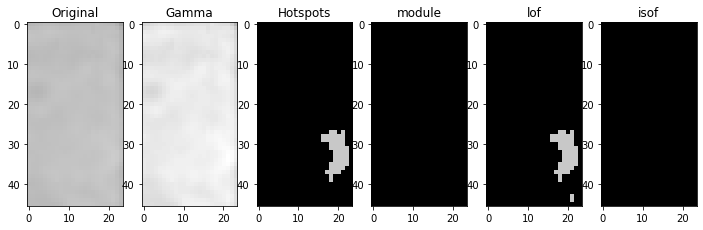

[-0.99021938 -1.02664113 -0.98423824 -0.9962377  -0.99963824 -0.99021938
 -1.00278864 -1.12332038]
[-1.94887669]
[-0.45467117 -0.46827135 -0.43691144 -0.47082276 -0.43300462 -0.45467117
 -0.45443974 -0.48034936]
[-0.73955068]
0.0 0
4657.jpg Normal
[-1.05773489 -0.98040925 -1.03853131 -1.01286749 -1.0775549  -0.98403772
 -1.17049828 -1.01581727]
[-1.70933596]
[-0.49280026 -0.45999014 -0.47148683 -0.44370486 -0.52100634 -0.46122898
 -0.54344458 -0.48192737]
[-0.64373438]
0.0 0
3138.jpg Normal
[-1.0001627  -1.13015846 -0.98131862 -0.99544894 -0.99877811 -0.98651976
 -0.97955942 -0.99933226]
[-1.94887669]
[-0.44131806 -0.47108059 -0.43638786 -0.46935773 -0.45222883 -0.43869935
 -0.43712503 -0.46182033]
[-0.73955068]
0.0 0
1049.jpg Normal
[-1.02736416 -0.98688293 -0.96474573 -1.06409387 -1.10072874 -0.98004228
 -1.3657972  -1.18548838]
[-1.83299977]
[-0.48217756 -0.4831101  -0.47532381 -0.51638832 -0.46159185 -0.47692895
 -0.5873979  -0.54773998]
[-0.69319991]
0.0 0
4131.jpg Normal
[-0.9539

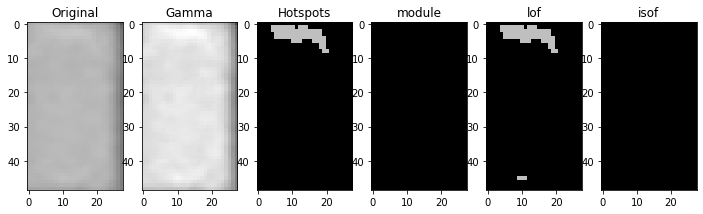

[-0.97816288 -0.98045831 -2.38466461 -1.02887367 -1.00256491 -1.26942817
 -1.06150528 -0.97621232]
[-1.85857924]
[-0.50073177 -0.42386714 -0.67193453 -0.48103972 -0.46941028 -0.51455125
 -0.45602201 -0.4878695 ]
[-0.7034317]
0.0 0
3892.jpg Normal
[-1.01418774 -1.02167208 -0.97150534 -1.37643879 -0.97802017 -1.00612806
 -1.10278122 -1.00538284]
[-1.72207615]
[-0.45589248 -0.46676367 -0.45058639 -0.54422984 -0.44899524 -0.47877297
 -0.49412812 -0.4519578 ]
[-0.64883046]
11.5 14.242640614509583 0.7124045305189995 0.9749841995369628
11.5 14.242640614509583 0.7124045305189995 0.9749841995369628
0.0 19
2554.jpg Single-Hotspot


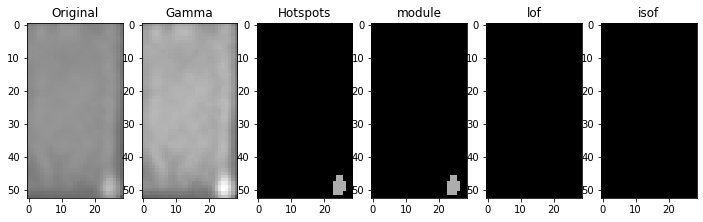

[-2.29954436 -1.82774129 -1.53236878 -1.94734403 -2.11650591 -1.79073713
 -1.9896345  -1.79073713]
[-1.94887669]
[-0.71807873 -0.59673675 -0.5565567  -0.59766072 -0.6275263  -0.5922314
 -0.62347063 -0.5922314 ]
[-0.73955068]
436.5 142.81118202209473 0.2689488456364228 0.6444723419641981
5.5 9.41421353816986 0.7798381254407765 1.0
16.5 24.727921724319458 0.3390928040392462 0.9048557074679621
15.0 15.656854152679443 0.7689393938672696 0.9772437647943251
11.5 23.071067690849304 0.27150155264286613 0.898883010012347
0.0 2.0 0.0 1.0
16.0 21.313708186149597 0.4426004140648526 0.9347462491724268
15.0 15.656854152679443 0.7689393938672696 0.9772437647943251
11.5 23.071067690849304 0.27150155264286613 0.898883010012347
48.0 24
2232.jpg Multi-Hotspots


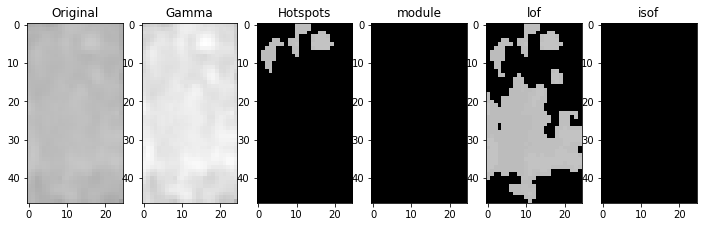

[-0.99966298 -1.01355833 -1.00064842 -0.99257219 -1.07180294 -1.00067448
 -0.99961321 -1.00280977]
[-1.9128832]
[-0.4526244  -0.44886949 -0.44256444 -0.42707211 -0.49637879 -0.46215307
 -0.45618981 -0.4433513 ]
[-0.72515328]
0.0 0
4643.jpg Normal
[-0.99678784 -1.00752649 -0.97957668 -0.97814075 -1.01694205 -1.00511144
 -0.97879293 -0.99678784]
[-1.72690247]
[-0.45747061 -0.44092927 -0.43936877 -0.44977831 -0.45878616 -0.44666911
 -0.44870323 -0.45747061]
[-0.65076099]
0.0 0
4870.jpg Normal
[-0.99437618 -1.00828414 -1.09976707 -1.02488036 -1.80863132 -1.00691019
 -1.27018585 -0.97484059]
[-1.75809585]
[-0.43353094 -0.453128   -0.49224539 -0.44345557 -0.60509607 -0.44255585
 -0.53424792 -0.41895284]
[-0.66323834]
0.0 0
244.jpg Normal
[-1.04944981 -0.97451342 -1.06504083 -0.96219525 -1.03168879 -1.01059925
 -0.99482223 -1.01497024]
[-1.69492094]
[-0.45174337 -0.43451724 -0.493687   -0.44044356 -0.44472222 -0.44217999
 -0.43382908 -0.46831024]
[-0.63796838]
0.0 0
1908.jpg Normal
[-0.989174

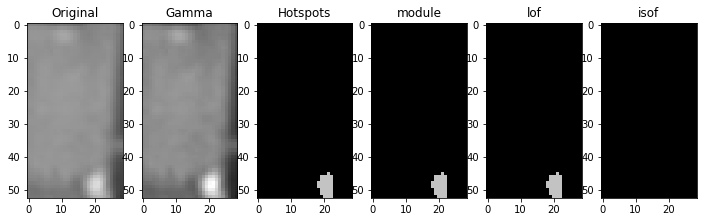

[-0.97333854 -1.13218157 -0.98202017 -0.96011125 -1.00300741 -1.5984627
 -0.99683381 -0.97724276]
[-1.70933596]
[-0.43520912 -0.48032203 -0.43165985 -0.42945905 -0.42958408 -0.5223632
 -0.42667238 -0.43781905]
[-0.64373438]
0.0 0
536.jpg Normal
[-0.99196789 -1.10072874 -1.26074938 -1.04307562 -1.02445503 -1.75626935
 -1.14715273 -0.97718079]
[-1.83299977]
[-0.45097324 -0.46159185 -0.51323042 -0.46033678 -0.4438938  -0.56941008
 -0.47271208 -0.46230752]
[-0.69319991]
0.0 0
250.jpg Normal
[-1.02629888 -1.2182706  -1.06995907 -2.81408007 -0.98668519 -1.00642819
 -1.01621176 -1.02887367]
[-1.85857924]
[-0.47258577 -0.49681556 -0.46498958 -0.70910916 -0.42679504 -0.43183014
 -0.43552665 -0.48103972]
[-0.7034317]
0.0 0
4864.jpg Normal
[-1.01288881 -0.98651976 -0.99904727 -1.22051041 -1.00132809 -0.99933226
 -1.01288881 -1.04768828]
[-1.94887669]
[-0.47196255 -0.43869935 -0.45385061 -0.51226549 -0.49530611 -0.46182033
 -0.47196255 -0.49348154]
[-0.73955068]
0.0 0
278.jpg Normal
[-1.00725822 -

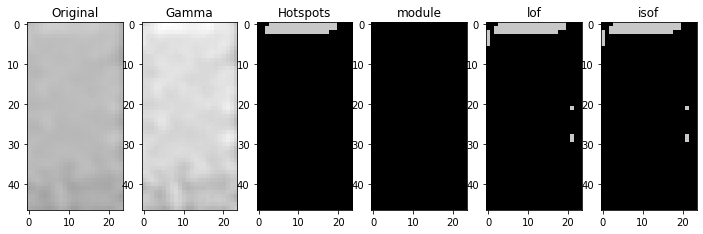

[-1.08326105 -1.06660885 -0.99031951 -1.1267706  -1.09336185 -0.9733081
 -1.18700071 -0.99880619]
[-1.72207615]
[-0.47880578 -0.46602219 -0.4337021  -0.46612766 -0.47735182 -0.43551025
 -0.51607048 -0.4684558 ]
[-0.64883046]
0.0 0
1277.jpg Normal
[-1.12716174 -1.03850796 -1.0706502  -1.00371422 -1.19106002 -1.46049629
 -1.0706502  -1.11129696]
[-1.69492094]
[-0.548952   -0.50691444 -0.5218937  -0.48722256 -0.55530145 -0.65524299
 -0.5218937  -0.55080577]
[-0.63796838]
15.5 25.41421353816986 0.3015700533554364 0.9864978812900941
7.0 10.828427076339722 0.75020015882688 1.0
15.5 25.41421353816986 0.3015700533554364 0.9864978812900941
7.0 10.828427076339722 0.75020015882688 1.0
31.0 11
5011.jpg Junction-Box-Error


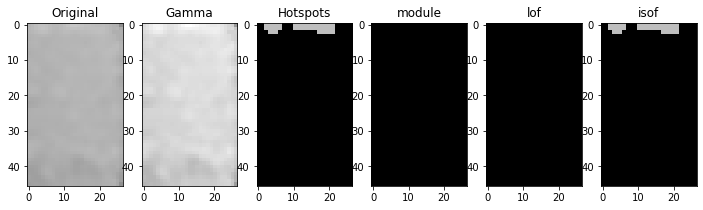

[-0.98951458 -0.99373265 -1.11791768 -1.02729514 -0.99373265 -0.98248277
 -1.60552831 -1.0057186 ]
[-1.70933596]
[-0.4482503  -0.44275421 -0.47710777 -0.43700684 -0.44275421 -0.43626497
 -0.57473002 -0.44405057]
[-0.64373438]
0.0 0
3460.jpg Normal
[-0.99102744 -1.05943992 -2.05051795 -0.9802569  -0.9981512  -0.98068113
 -0.99437618 -1.34293277]
[-1.75809585]
[-0.42029867 -0.47219115 -0.63215053 -0.41519957 -0.42386665 -0.46002781
 -0.43353094 -0.52813258]
[-0.66323834]
0.0 0
3306.jpg Normal
[-1.13743759 -0.98419085 -0.991556   -0.98753204 -1.03816201 -0.98549778
 -1.27956505 -1.01703183]
[-1.78206358]
[-0.48939983 -0.43101944 -0.42016663 -0.43218914 -0.45069238 -0.42022317
 -0.50060874 -0.44489134]
[-0.67282543]
0.0 0
4469.jpg Normal
[-0.97953694 -1.00797363 -0.97928974 -1.20264898 -0.99041763 -0.99809525
 -0.98011396 -0.99041763]
[-1.86224249]
[-0.42200674 -0.43404653 -0.41592163 -0.46656013 -0.44163898 -0.41407345
 -0.41866847 -0.44163898]
[-0.704897]
0.0 0
2018.jpg Normal
[-1.002673

[-0.43579918 -0.45580554 -0.4470668  -0.42722117 -0.47690748 -0.43579918
 -0.44249282 -0.46148784]
[-0.73955068]
0.0 0
708.jpg Normal
[-1.00175225 -1.00412253 -0.9994006  -1.00064842 -1.00797404 -1.01649314
 -1.82982283 -1.00280977]
[-1.9128832]
[-0.43765942 -0.44469701 -0.41368554 -0.44256444 -0.46376505 -0.42968269
 -0.56909432 -0.4433513 ]
[-0.72515328]
0.0 0
4483.jpg Normal
[-1.20638888 -0.95944491 -1.0604631  -1.43347871 -1.20638888 -1.00776621
 -1.14104361 -1.06839362]
[-1.72690247]
[-0.46446149 -0.44481928 -0.44041441 -0.54797895 -0.46446149 -0.43554545
 -0.4872585  -0.45196343]
[-0.65076099]
0.0 0
709.jpg Normal
[-1.09976707 -1.02951086 -0.99609814 -0.9856569  -1.08458855 -1.02951086
 -1.05151368 -1.05174734]
[-1.75809585]
[-0.49224539 -0.5083295  -0.50761551 -0.42255878 -0.5609996  -0.5083295
 -0.4600557  -0.46346294]
[-0.66323834]
0.0 0
2794.jpg Normal
[-1.00415337 -1.08187792 -1.00405142 -0.99430529 -1.04695506 -1.01370132
 -1.01225861 -1.14213537]
[-1.72207615]
[-0.4860497 

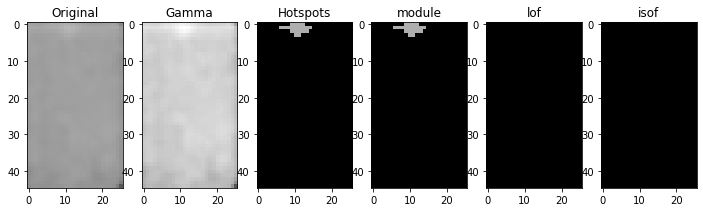

[-1.1513773  -1.01179466 -0.97277435 -1.32029871 -1.10835618 -1.0116644
 -0.99502955 -1.04262439]
[-1.83299977]
[-0.51636967 -0.45328816 -0.47176483 -0.5741553  -0.52609057 -0.45804761
 -0.45693356 -0.49631477]
[-0.69319991]
0.0 0
3449.jpg Normal
[-0.99906331 -0.98668519 -1.00642819 -0.99397369 -1.03586737 -0.99430859
 -1.01568539 -1.42566129]
[-1.85857924]
[-0.43733299 -0.42679504 -0.43183014 -0.42389042 -0.45514632 -0.41335986
 -0.44131955 -0.53664552]
[-0.7034317]
0.0 0
4326.jpg Normal
[-1.02994885 -0.99387677 -1.33893437 -1.33231137 -1.01792681 -1.08920849
 -0.97908968 -1.01601879]
[-1.72690247]
[-0.48403898 -0.46918443 -0.5385454  -0.53178712 -0.48876605 -0.48576516
 -0.46800849 -0.48750002]
[-0.65076099]
16.0 20.485281229019165 0.4791218596397519 0.9399838145278125
16.0 20.485281229019165 0.4791218596397519 0.9399838145278125
26.0 0
5038.jpg Junction-Box-Error


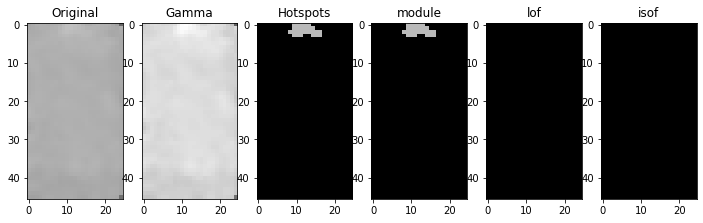

[-1.02819099 -1.55176015 -1.16456984 -1.43070505 -1.19007023 -0.96610174
 -2.9538793  -1.97218258]
[-1.94887669]
[-0.44641419 -0.53003676 -0.4703674  -0.50460098 -0.47733275 -0.43392728
 -0.64671197 -0.59275181]
[-0.73955068]
0.0 0
2757.jpg Normal
[-1.03888362 -0.97846002 -1.01932847 -1.0703373  -1.03488038 -1.09111243
 -1.01444629 -1.03888362]
[-1.94887669]
[-0.47148628 -0.46261604 -0.48351198 -0.51558186 -0.47758787 -0.52716782
 -0.46662073 -0.47148628]
[-0.73955068]
0.0 0
912.jpg Normal
[-0.97591666 -1.1391765  -0.99829418 -0.99528958 -1.00018009 -1.02589629
 -0.96717215 -1.91685568]
[-1.70933596]
[-0.4469257  -0.47794214 -0.46302194 -0.44887988 -0.4531157  -0.47178165
 -0.44709956 -0.63746163]
[-0.64373438]
0.0 0
906.jpg Normal
[-0.97489714 -0.99582446 -1.0553593  -0.98873625 -1.01117063 -0.97462723
 -1.14169999 -0.98167754]
[-1.84052542]
[-0.43884813 -0.45885896 -0.48298011 -0.46303098 -0.45958276 -0.45519416
 -0.48900092 -0.4570446 ]
[-0.69621017]
0.0 0
4332.jpg Normal
[-1.012112

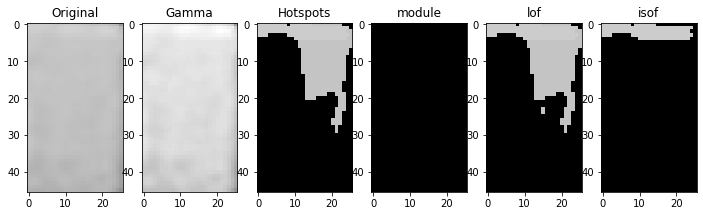

[-0.98157686 -1.00336819 -1.05204228 -1.00336819 -1.42124076 -0.99855328
 -0.98549778 -0.98753204]
[-1.78206358]
[-0.42395129 -0.43871225 -0.45857199 -0.43871225 -0.51572158 -0.43943624
 -0.42022317 -0.43218914]
[-0.67282543]
0.0 0
5004.jpg Normal
[-1.00067448 -0.98636396 -1.00280977 -1.15324115 -0.99966298 -1.00981207
 -1.01549897 -1.04173152]
[-1.9128832]
[-0.46215307 -0.42352272 -0.4433513  -0.49585449 -0.4526244  -0.43296827
 -0.48087554 -0.47956412]
[-0.72515328]
0.0 0
3461.jpg Normal
[-0.98355784 -1.00323772 -1.47814027 -0.98782805 -0.97778525 -1.02589629
 -0.98248277 -0.99783648]
[-1.70933596]
[-0.45561657 -0.44868101 -0.57370624 -0.45900784 -0.45997613 -0.47178165
 -0.43626497 -0.46590732]
[-0.64373438]
0.0 0
5010.jpg Normal
[-0.99003885 -0.97484059 -1.0269537  -1.00910206 -1.03158859 -0.98068113
 -1.01409611 -1.01211202]
[-1.75809585]
[-0.47717364 -0.41895284 -0.49571043 -0.47052859 -0.46109439 -0.46002781
 -0.46993257 -0.44185673]
[-0.66323834]
0.0 0
1276.jpg Normal
[-1.23430

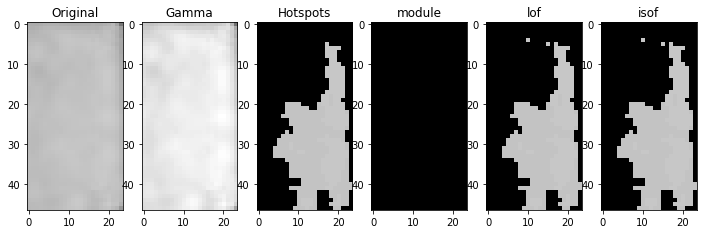

[-1.04698981 -1.13261768 -1.01114435 -1.40237663 -1.08773729 -0.98178936
 -2.1772564  -1.02493303]
[-1.85857924]
[-0.49173235 -0.52960053 -0.47112759 -0.6220951  -0.50268826 -0.49296597
 -0.75559705 -0.4820635 ]
[-0.7034317]
6.0 9.656854152679443 0.8085181428902574 1.0
6.0 9.656854152679443 0.8085181428902574 1.0
0.0 11
2019.jpg Single-Hotspot


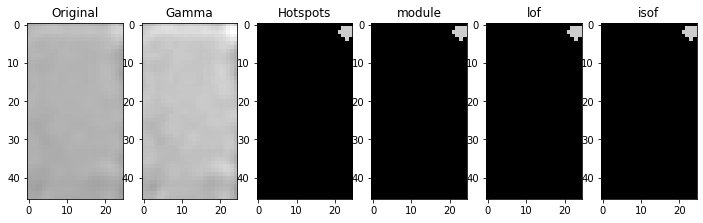

[-1.04547774 -0.99683381 -0.97043736 -1.0169401  -1.02963267 -1.16578298
 -1.04956007 -1.03234087]
[-1.70933596]
[-0.46566897 -0.42667238 -0.43766852 -0.47422991 -0.45642108 -0.4820311
 -0.47165717 -0.45611431]
[-0.64373438]
0.0 0
4468.jpg Normal
[-0.97846002 -1.00789082 -0.98640214 -0.99263824 -1.12332038 -0.99263824
 -0.98318753 -1.66529549]
[-1.94887669]
[-0.46261604 -0.44625058 -0.43277676 -0.43006309 -0.48034936 -0.43006309
 -0.45872176 -0.59574867]
[-0.73955068]
0.0 0
3307.jpg Normal
[-1.09753173 -1.33217523 -1.04429418 -1.27054735 -1.6538221  -1.11129696
 -1.19106002 -1.04200283]
[-1.69492094]
[-0.5415282  -0.60384031 -0.5235716  -0.57227266 -0.7086817  -0.55080577
 -0.55530145 -0.50859452]
[-0.63796838]
0.0 6.0 0.0 1.0
33.0 48.14213538169861 0.17892585625962415 0.8614945450104332
0.0 0
3688.jpg Normal
[-0.9994006  -0.97739019 -1.1474047  -0.96122638 -1.02018269 -1.8766342
 -1.2175514  -1.00981207]
[-1.9128832]
[-0.41368554 -0.42561801 -0.45660202 -0.43104098 -0.44296327 -0.5782

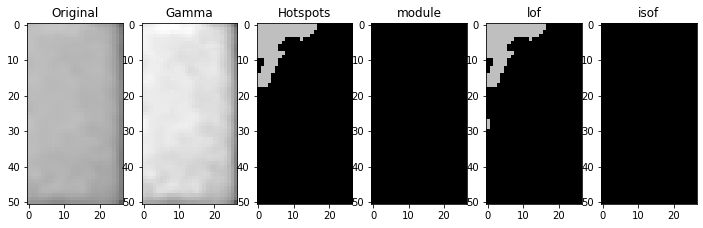

[-1.09798442 -1.17859219 -0.96452914 -1.03275048 -1.16341771 -0.97469919
 -1.10979438 -1.36173539]
[-1.72690247]
[-0.45726342 -0.49207706 -0.46291568 -0.44530345 -0.5101726  -0.44720415
 -0.47776946 -0.50857321]
[-0.65076099]
0.0 0
4859.jpg Normal
[-1.01932847 -1.00724863 -1.01809859 -1.11138189 -0.99263824 -1.03888362
 -1.02664113 -2.00409987]
[-1.94887669]
[-0.48351198 -0.46516601 -0.46341189 -0.53140207 -0.43006309 -0.47148628
 -0.46827135 -0.6041273 ]
[-0.73955068]
0.0 0
4681.jpg Normal
[-0.99904727 -1.01564358 -1.00691605 -1.19246332 -1.00273768 -1.00273768
 -1.0001627  -1.04768828]
[-1.94887669]
[-0.45385061 -0.49758906 -0.47003514 -0.53947729 -0.45768259 -0.45768259
 -0.44131806 -0.49348154]
[-0.73955068]
0.0 0
4695.jpg Normal
[-0.96878088 -1.08238626 -1.51340592 -1.2330906  -1.08238626 -5.96538816
 -0.99820526 -1.0184921 ]
[-1.69492094]
[-0.42676819 -0.45313193 -0.5184448  -0.47955924 -0.45313193 -0.80696268
 -0.44574283 -0.4497961 ]
[-0.63796838]
0.0 0
1935.jpg Normal
[-0.9985

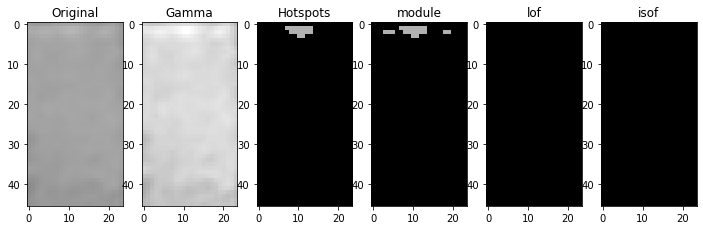

[-1.12313515 -0.99812313 -1.01225861 -1.30682339 -1.04695506 -1.00372693
 -1.06226605 -1.16841337]
[-1.72207615]
[-0.54189648 -0.48956407 -0.4890113  -0.59813045 -0.50174959 -0.47663653
 -0.50922081 -0.53318802]
[-0.64883046]
0.0 0
2227.jpg Normal
[-0.98549778 -0.97215445 -0.97215445 -0.991556   -0.99205548 -1.09857683
 -1.00336819 -1.00602154]
[-1.78206358]
[-0.42022317 -0.42431348 -0.42431348 -0.42016663 -0.43039942 -0.46522503
 -0.43871225 -0.44111821]
[-0.67282543]
0.0 0
2541.jpg Normal
[-1.12774376 -1.24531201 -1.03853131 -1.60308448 -1.30259922 -1.05773489
 -0.98328102 -1.15149574]
[-1.70933596]
[-0.51874284 -0.55507318 -0.47148683 -0.62691709 -0.56678357 -0.49280026
 -0.46531819 -0.53120052]
[-0.64373438]
0.0 0
3887.jpg Normal
[-1.07565145 -0.98651976 -2.48767317 -1.41591523 -0.98478597 -0.9944529
 -0.98143004 -0.99904727]
[-1.94887669]
[-0.48315636 -0.43869935 -0.64665108 -0.50360161 -0.4481392  -0.45393414
 -0.44410988 -0.45385061]
[-0.73955068]
0.0 0
4130.jpg Normal
[-0.96878

[-0.99961321 -1.00797404 -0.9994006  -1.00175225 -1.05329922 -1.00612239
 -1.00412253 -2.49791089]
[-1.9128832]
[-0.45618981 -0.46376505 -0.41368554 -0.43765942 -0.49183661 -0.46228466
 -0.44469701 -0.63208061]
[-0.72515328]
0.0 0
331.jpg Normal
[-0.9790412  -0.97955942 -0.98382208 -1.11060454 -0.99904727 -1.0001627
 -0.97998994 -1.07565145]
[-1.94887669]
[-0.44820475 -0.43712503 -0.44342068 -0.4668393  -0.45385061 -0.44131806
 -0.45025271 -0.48315636]
[-0.73955068]
0.0 0
4905.jpg Normal
[-1.05715674 -1.02481646 -1.24139654 -1.05132336 -1.03685438 -1.05715674
 -1.11058241 -1.02879473]
[-1.69492094]
[-0.46797784 -0.45965536 -0.52006418 -0.47325458 -0.45754083 -0.46797784
 -0.51306655 -0.44565895]
[-0.63796838]
0.0 0
457.jpg Normal
[-0.99609067 -1.06989317 -1.02488036 -0.97484059 -1.21825867 -1.04144568
 -0.98988256 -0.97952768]
[-1.75809585]
[-0.42031803 -0.48425675 -0.44345557 -0.41895284 -0.51826186 -0.47148208
 -0.46532311 -0.44585139]
[-0.66323834]
0.0 0
1128.jpg Normal
[-1.11138189

[-0.43842807 -0.40625909 -0.42899147 -0.42315056 -0.49620084 -0.42386714
 -0.42899147 -0.41335986]
[-0.7034317]
0.0 0
669.jpg Normal
[-1.06894141 -0.9532622  -0.97065805 -0.97613798 -1.09798442 -1.16022557
 -1.02145465 -1.01218146]
[-1.72690247]
[-0.45048541 -0.43630311 -0.45337801 -0.44283714 -0.45726342 -0.47973096
 -0.45594449 -0.46809404]
[-0.65076099]
0.0 0
2192.jpg Normal
[-0.98012088 -1.08235594 -0.96691506 -1.05700629 -0.96151256 -3.15161498
 -0.98047933 -0.97856194]
[-1.94887669]
[-0.45458156 -0.48348355 -0.43579918 -0.44787957 -0.43943542 -0.6217145
 -0.43864397 -0.44249282]
[-0.73955068]
0.0 0
127.jpg Normal
[-0.98522296 -0.98873625 -0.98933195 -1.09685229 -0.99239802 -0.98522296
 -0.97462723 -0.98668428]
[-1.84052542]
[-0.44612252 -0.46303098 -0.44565505 -0.46801243 -0.46728504 -0.44612252
 -0.45519416 -0.45319073]
[-0.69621017]
0.0 0
2804.jpg Normal
[-1.02990297 -1.02246972 -1.10659597 -1.23605978 -1.03909894 -1.10659597
 -1.02246972 -1.04567639]
[-1.69492094]
[-0.46435094

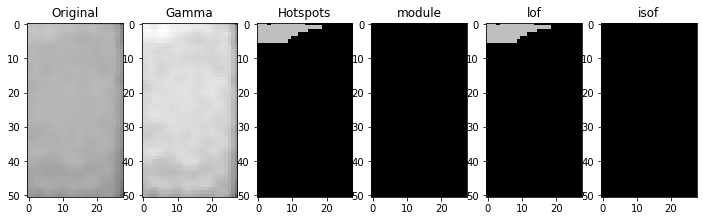

[-0.99961142 -0.99204335 -0.98708909 -1.01160995 -0.99437017 -1.00612806
 -1.00610861 -0.99961142]
[-1.72207615]
[-0.49698996 -0.47180985 -0.45839338 -0.47964588 -0.4452962  -0.47877297
 -0.47049523 -0.49698996]
[-0.64883046]
0.0 0
4252.jpg Normal
[-1.04121776 -1.22735984 -1.11791768 -1.02096505 -1.07322392 -1.20031336
 -1.00915003 -2.69335607]
[-1.70933596]
[-0.4774989  -0.51567266 -0.47710777 -0.48521719 -0.4986345  -0.49340061
 -0.45598632 -0.68554909]
[-0.64373438]
0.0 0
866.jpg Normal
[-1.00828414 -1.01012487 -0.98761432 -0.9802569  -0.9802569  -0.98517819
 -0.97484059 -1.02464371]
[-1.75809585]
[-0.453128   -0.42765895 -0.43366705 -0.41519957 -0.41519957 -0.43988767
 -0.41895284 -0.44160007]
[-0.66323834]
0.0 0
26.jpg Normal
[-1.26256115 -1.43237312 -1.17640585 -1.6164434  -1.19766066 -1.28754862
 -3.58117108 -1.3715446 ]
[-1.82418808]
[-0.49074443 -0.53406862 -0.49104565 -0.54399103 -0.48425953 -0.50060296
 -0.81244099 -0.49371646]
[-0.68967523]
0.0 0
872.jpg Normal
[-0.96510112

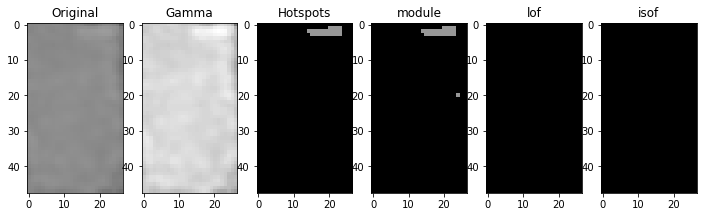

[-1.00059818 -0.98357535 -0.98936625 -1.00334336 -0.99030211 -1.04636839
 -0.97973429 -0.98346639]
[-1.82418808]
[-0.44882626 -0.45621254 -0.47150881 -0.46231637 -0.47633798 -0.4735914
 -0.4499235  -0.45507522]
[-0.68967523]
0.0 0
3273.jpg Normal
[-0.9868019  -0.98419085 -1.8171014  -0.98404279 -2.84131308 -1.20079369
 -0.98498166 -0.98989489]
[-1.78206358]
[-0.42953597 -0.43101944 -0.59454912 -0.41699304 -0.66626243 -0.48871854
 -0.43678846 -0.43572864]
[-0.67282543]
0.0 0
3503.jpg Normal
[-0.98915524 -0.98270879 -1.13328356 -1.00070394 -1.00511144 -1.02141023
 -0.99160386 -0.99678784]
[-1.72690247]
[-0.4367827  -0.45349949 -0.50448156 -0.43902283 -0.44666911 -0.47560334
 -0.4422106  -0.45747061]
[-0.65076099]
0.0 0
680.jpg Normal
[-0.97043736 -1.04075228 -0.98548074 -1.06822127 -1.02422516 -1.02963267
 -0.99683381 -1.03234087]
[-1.70933596]
[-0.43766852 -0.45989026 -0.44047542 -0.48456344 -0.46283204 -0.45642108
 -0.42667238 -0.45611431]
[-0.64373438]
0.0 0
1314.jpg Normal
[-0.974744

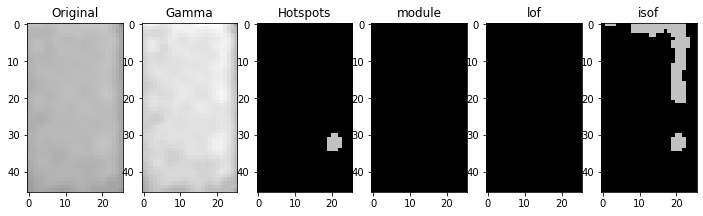

[-2.06083542 -1.0015778  -1.00507616 -3.82468531 -1.13980533 -1.03212312
 -0.98737736 -0.98423824]
[-1.94887669]
[-0.60662415 -0.460411   -0.46603366 -0.76589107 -0.49124594 -0.47359168
 -0.43463258 -0.43691144]
[-0.73955068]
0.0 0
2635.jpg Normal
[-0.96013343 -1.50003731 -1.01567889 -1.03726194 -1.06822127 -1.02964155
 -2.11262506 -0.97043736]
[-1.70933596]
[-0.42148734 -0.51741923 -0.44909243 -0.46477493 -0.48456344 -0.46186281
 -0.61401407 -0.43766852]
[-0.64373438]
0.0 0
30.jpg Normal
[-0.9978485  -1.00969902 -1.01173518 -1.04934044 -0.97677165 -1.00258501
 -1.00995191 -1.00325329]
[-1.70933596]
[-0.49112845 -0.44085861 -0.44734432 -0.47223306 -0.44475227 -0.44385944
 -0.46115639 -0.45317273]
[-0.64373438]
0.0 0
870.jpg Normal
[-1.89443776 -1.06534935 -1.20079369 -1.33339705 -1.21925289 -1.03347686
 -1.60367264 -1.38788594]
[-1.78206358]
[-0.60366034 -0.44843267 -0.48871854 -0.5133082  -0.49362836 -0.44920358
 -0.53966009 -0.50137641]
[-0.67282543]
0.0 0
643.jpg Normal
[-1.        

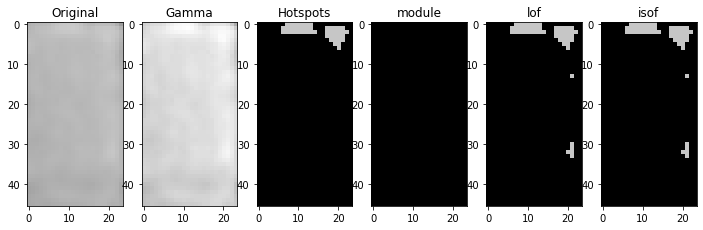

[-1.03965568 -1.70797708 -0.97938803 -1.35950151 -0.98798553 -1.26780172
 -1.03965568 -1.14169999]
[-1.84052542]
[-0.48081814 -0.5863214  -0.43236682 -0.52559999 -0.48404499 -0.53099992
 -0.48081814 -0.48900092]
[-0.69621017]
0.0 0
496.jpg Normal
[-0.99903103 -1.16359265 -1.03108273 -3.01952107 -1.05700629 -1.05700629
 -0.96691506 -1.11220963]
[-1.94887669]
[-0.44730843 -0.48403507 -0.46214719 -0.63405896 -0.44787957 -0.44787957
 -0.43579918 -0.46709733]
[-0.73955068]
0.0 0
1102.jpg Normal
[-1.6491213  -0.95094097 -1.38439665 -1.02145465 -1.50954857 -1.21532545
 -1.56465663 -1.08007574]
[-1.72690247]
[-0.58028173 -0.45030174 -0.51043225 -0.45594449 -0.53943621 -0.49573375
 -0.52289241 -0.4572526 ]
[-0.65076099]
0.0 0
1664.jpg Normal
[-1.01083462 -1.00597661 -1.38123325 -1.00573842 -1.02295926 -0.99904453
 -0.99876504 -0.97952768]
[-1.75809585]
[-0.44526474 -0.4854239  -0.54179666 -0.47127779 -0.51317476 -0.48286763
 -0.49145339 -0.44585139]
[-0.66323834]
0.0 0
3073.jpg Normal
[-1.09750

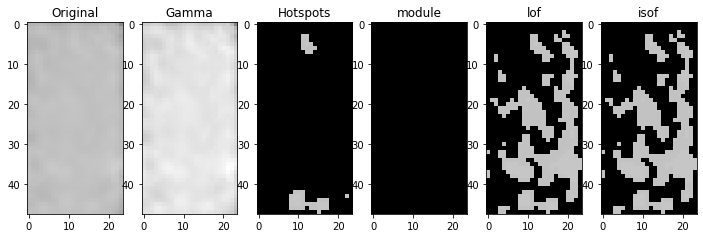

[-0.9827549  -1.05907013 -1.00126163 -0.96279622 -1.00126163 -1.07378414
 -1.01032465 -1.18407143]
[-1.82418808]
[-0.44753572 -0.47165061 -0.46453636 -0.44822848 -0.46453636 -0.48162177
 -0.48994225 -0.52425858]
[-0.68967523]
0.0 0
1880.jpg Normal
[-1.20901678 -1.06527274 -0.97438006 -1.54469706 -1.09193502 -1.02551868
 -1.37185351 -1.13044876]
[-1.82418808]
[-0.49600269 -0.46902603 -0.44389167 -0.56470312 -0.46987535 -0.47367702
 -0.49161705 -0.47828378]
[-0.68967523]
0.0 0
327.jpg Normal
[-0.99683381 -1.04999909 -1.00300741 -1.03042338 -0.99258526 -1.02874924
 -1.02964155 -0.96011125]
[-1.70933596]
[-0.42667238 -0.45585752 -0.42958408 -0.45887883 -0.45262969 -0.46163854
 -0.46186281 -0.42945905]
[-0.64373438]
0.0 0
4913.jpg Normal
[-0.96094098 -0.99502443 -1.19007023 -1.05340558 -3.35502341 -0.97119072
 -1.43070505 -1.01637428]
[-1.94887669]
[-0.42722117 -0.45287113 -0.47733275 -0.45317527 -0.67455588 -0.44404573
 -0.50460098 -0.4484783 ]
[-0.73955068]
0.0 0
441.jpg Normal
[-1.007838

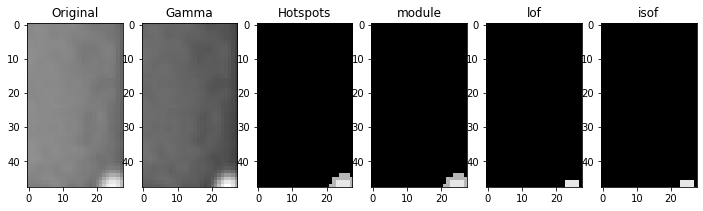

[-1.01861026 -1.00573842 -1.00597661 -1.18735112 -0.99308099 -1.02295926
 -1.00318    -1.01083462]
[-1.75809585]
[-0.49940515 -0.47127779 -0.4854239  -0.52555634 -0.50069298 -0.51317476
 -0.48937093 -0.44526474]
[-0.66323834]
0.0 0
3098.jpg Normal
[-1.11989128 -1.48579788 -2.46067422 -2.01663798 -0.9827549  -1.34581132
 -1.48579788 -1.66112757]
[-1.82418808]
[-0.49713046 -0.56685121 -0.6726027  -0.75264151 -0.44753572 -0.57495491
 -0.56685121 -0.66738426]
[-0.68967523]
27.5 28.727921843528748 0.41873005741404734 0.9543160401311646
1.0 4.828427076339722 0.5390120952601716 1.0
0.0 2.0 0.0 1.0
13.5 19.899494647979736 0.4284099386328506 0.948084276039175
27.5 28.727921843528748 0.41873005741404734 0.9543160401311646
0.0 0.0 0 0
13.5 19.899494647979736 0.4284099386328506 0.948084276039175
7.0 57
1857.jpg Multi-Hotspots


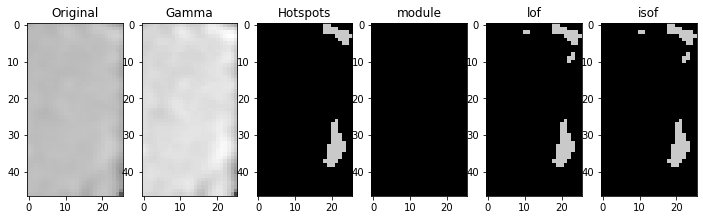

[-1.00797404 -0.99257219 -1.01355833 -1.00508932 -1.31409663 -1.00981207
 -0.96654767 -0.99961321]
[-1.9128832]
[-0.46376505 -0.42707211 -0.44886949 -0.45071122 -0.49659737 -0.43296827
 -0.42780803 -0.45618981]
[-0.72515328]
0.0 0
4091.jpg Normal
[-1.05508393 -0.98997558 -1.2397613  -0.98729332 -1.53626248 -1.13560791
 -1.13560791 -1.05508393]
[-1.84052542]
[-0.48471584 -0.4595748  -0.56202648 -0.48202372 -0.71798812 -0.50291273
 -0.50291273 -0.48471584]
[-0.69621017]
0.0 2.8284270763397217 0.0 1.0
43.0 44.485281229019165 0.2730521740122509 0.9635068786125566
43.0 44.485281229019165 0.2730521740122509 0.9635068786125566
47.0 18
3926.jpg Single-Hotspot


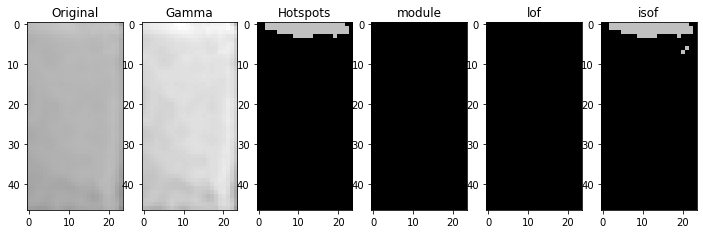

[-1.03816201 -0.97811876 -1.08407025 -1.01216328 -0.98404279 -0.98549778
 -2.45254638 -1.00267213]
[-1.78206358]
[-0.45069238 -0.43178886 -0.46122471 -0.44969929 -0.41699304 -0.42022317
 -0.63833094 -0.43530794]
[-0.67282543]
0.0 0
4085.jpg Normal
[-1.043407   -1.02661341 -0.99391609 -1.03775764 -1.08238626 -1.0263397
 -1.02604475 -1.05673443]
[-1.69492094]
[-0.47252792 -0.45866894 -0.43551189 -0.44432697 -0.45313193 -0.44808083
 -0.4428223  -0.47968605]
[-0.63796838]
0.0 0
3932.jpg Normal
[-1.04934044 -1.30042969 -1.16818941 -0.97401935 -1.09047283 -1.52674346
 -0.97487159 -0.98622201]
[-1.70933596]
[-0.47223306 -0.49353492 -0.45735333 -0.42751923 -0.4674356  -0.55865796
 -0.43003384 -0.4471175 ]
[-0.64373438]
0.0 0
469.jpg Normal
[-1.05399355 -1.18715164 -1.00520271 -0.99967213 -0.99967213 -1.31180617
 -1.72266016 -1.41855507]
[-1.85857924]
[-0.46613097 -0.51314387 -0.44981091 -0.43569595 -0.43569595 -0.51015421
 -0.57873645 -0.51019214]
[-0.7034317]
0.0 0
1843.jpg Normal
[-1.9481207

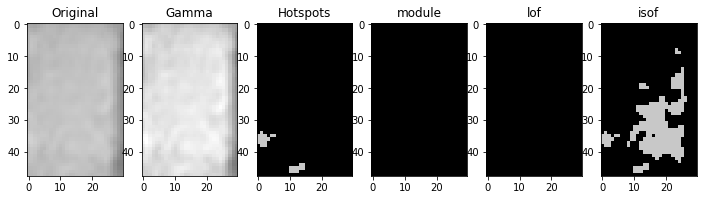

[-1.00064842 -0.96510112 -1.01649314 -1.34983657 -1.00476685 -1.00981207
 -0.9793047  -1.00067448]
[-1.9128832]
[-0.44256444 -0.42481355 -0.42968269 -0.51940333 -0.43404517 -0.43296827
 -0.42135499 -0.46215307]
[-0.72515328]
0.0 0
4898.jpg Normal
[-0.97484059 -1.00691019 -1.18597724 -0.9981512  -0.98068113 -1.06086025
 -0.97952768 -0.9802569 ]
[-1.75809585]
[-0.41895284 -0.44255585 -0.49989524 -0.42386665 -0.46002781 -0.49230861
 -0.44585139 -0.41519957]
[-0.66323834]
0.0 0
2231.jpg Normal
[-1.01564358 -0.98245077 -0.99877811 -1.22051041 -0.99560883 -0.99904727
 -0.98651976 -0.99933226]
[-1.94887669]
[-0.49758906 -0.44119616 -0.45222883 -0.51226549 -0.44677708 -0.45385061
 -0.43869935 -0.46182033]
[-0.73955068]
0.0 0
4640.jpg Normal
[-1.3515484  -1.08235594 -1.16456984 -0.99903103 -1.3515484  -1.16456984
 -1.6902532  -0.97856194]
[-1.94887669]
[-0.49978829 -0.48348355 -0.4703674  -0.44730843 -0.49978829 -0.4703674
 -0.53889993 -0.44249282]
[-0.73955068]
10.0 11.656854152679443 0.924798

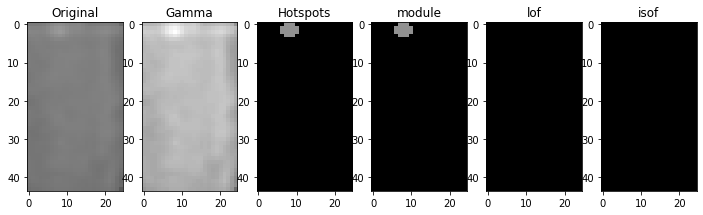

[-0.98756778 -0.97802017 -1.00610861 -1.01969667 -0.99812313 -1.00469654
 -0.98708909 -1.00372693]
[-1.72207615]
[-0.47350286 -0.44899524 -0.47049523 -0.45600962 -0.48956407 -0.47725489
 -0.45839338 -0.47663653]
[-0.64883046]
0.0 0
4126.jpg Normal
[-1.30259922 -0.98355784 -1.21808728 -1.06669198 -1.12774376 -1.36224153
 -1.51350781 -1.00323772]
[-1.70933596]
[-0.56678357 -0.45561657 -0.51910175 -0.52493977 -0.51874284 -0.57870359
 -0.61048547 -0.44868101]
[-0.64373438]
0.0 0
3891.jpg Normal
[-0.96971092 -1.17421436 -1.0184921  -1.01108768 -1.76397104 -0.99820526
 -0.97288162 -0.99804574]
[-1.69492094]
[-0.4351075  -0.48703876 -0.4497961  -0.45113127 -0.58107236 -0.44574283
 -0.41821733 -0.43878477]
[-0.63796838]
0.0 0
2557.jpg Normal
[-0.99242605 -1.0001574  -0.99272169 -0.96320888 -0.96700281 -0.9827549
 -1.00298296 -0.98594115]
[-1.82418808]
[-0.4487093  -0.44310243 -0.46044712 -0.44738885 -0.44277569 -0.44753572
 -0.46102206 -0.44242304]
[-0.68967523]
0.0 0
4132.jpg Normal
[-1.00910

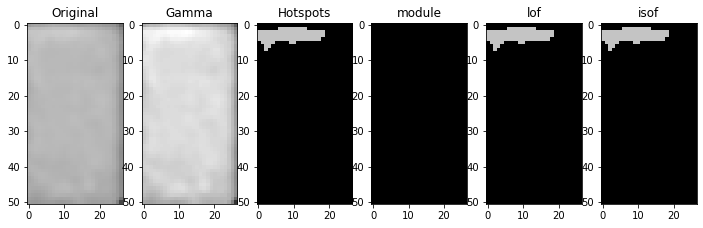

[-0.99264941 -0.98651976 -1.06379603 -0.98478597 -1.50012035 -1.00273768
 -1.01288881 -0.99560883]
[-1.94887669]
[-0.45590366 -0.43869935 -0.49442063 -0.4481392  -0.53995208 -0.45768259
 -0.47196255 -0.44677708]
[-0.73955068]
0.0 0
2594.jpg Normal
[-1.00391571 -1.25603458 -1.75952207 -1.04209169 -1.04363077 -0.9963544
 -1.07969424 -1.02228949]
[-1.72207615]
[-0.46266462 -0.53413984 -0.6040675  -0.47731685 -0.48521573 -0.44738682
 -0.48972644 -0.45934828]
[-0.64883046]
0.0 0
3846.jpg Normal
[-1.00981207 -1.28383539 -0.99874558 -1.00476685 -1.00412253 -2.28334675
 -0.97739019 -1.00981207]
[-1.9128832]
[-0.43296827 -0.47699206 -0.45832024 -0.43404517 -0.44469701 -0.61512924
 -0.42561801 -0.43296827]
[-0.72515328]
0.0 0
2580.jpg Normal
[-1.02246972 -1.00014758 -1.03909894 -0.99482223 -1.26393249 -0.95392833
 -1.00014758 -1.01375782]
[-1.69492094]
[-0.46523376 -0.42842403 -0.45363448 -0.43382908 -0.52595573 -0.42890208
 -0.42842403 -0.45834269]
[-0.63796838]
0.0 0
1089.jpg Normal
[-0.989155

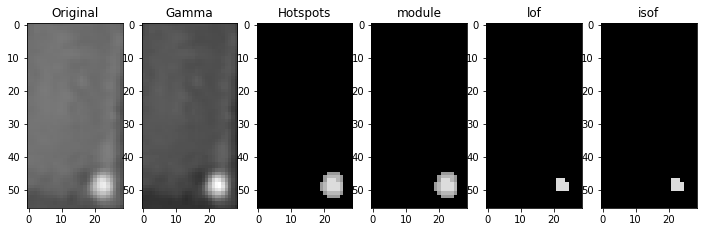

[-1.74023191 -0.97778525 -0.99829418 -1.         -1.11791768 -1.01409628
 -0.97591666 -1.01286749]
[-1.70933596]
[-0.60408597 -0.45997613 -0.46302194 -0.45826592 -0.47710777 -0.45803283
 -0.4469257  -0.44370486]
[-0.64373438]
0.0 0
737.jpg Normal
[-1.0169401  -1.0296415  -0.98202017 -0.97724276 -1.03234087 -1.04956007
 -1.0296415  -1.03915644]
[-1.70933596]
[-0.47422991 -0.44342474 -0.43165985 -0.43781905 -0.45611431 -0.47165717
 -0.44342474 -0.45978453]
[-0.64373438]
0.0 0
2972.jpg Normal
[-1.07722529 -1.32027066 -1.18454738 -1.75127965 -4.39813107 -1.24139654
 -1.03775764 -1.34891145]
[-1.69492094]
[-0.50536435 -0.53996009 -0.50785938 -0.6658652  -0.76392829 -0.52006418
 -0.44432697 -0.54105125]
[-0.63796838]
58.0 62.97056245803833 0.18380728181081615 0.8840958043089292
0.0 0
2966.jpg Normal
[-1.07202531 -0.99405799 -0.9980262  -1.27776658 -1.0178915  -0.9969635
 -1.00791997 -1.02422673]
[-1.70933596]
[-0.46974771 -0.46654363 -0.48849207 -0.50398566 -0.46220583 -0.47219136
 -0.454095

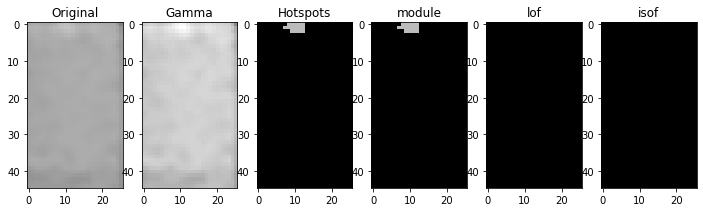

[-1.2681907  -1.84676447 -1.02963267 -1.31879895 -1.02905165 -1.08760271
 -1.47445579 -1.01447585]
[-1.70933596]
[-0.54436871 -0.57722048 -0.45642108 -0.52916182 -0.47959102 -0.50452043
 -0.59046578 -0.44211619]
[-0.64373438]
0.0 0
3338.jpg Normal
[-0.98012088 -0.97119072 -0.96139687 -0.96094098 -1.05340558 -0.977924
 -2.45954011 -1.03108273]
[-1.94887669]
[-0.45458156 -0.44404573 -0.42882066 -0.42722117 -0.45317527 -0.4470668
 -0.656415   -0.46214719]
[-0.73955068]
0.0 0
1249.jpg Normal
[-1.49326376 -1.14955536 -2.13955228 -1.0564194  -1.14955536 -1.27972691
 -1.79811078 -1.27972691]
[-1.88410943]
[-0.53263175 -0.47058036 -0.6442824  -0.42847328 -0.47058036 -0.49077932
 -0.65104599 -0.49077932]
[-0.71364377]
0.0 0
905.jpg Normal
[-1.0015778  -1.0260221  -1.00507616 -1.02664113 -1.01289193 -2.22414405
 -1.02729039 -0.98825554]
[-1.94887669]
[-0.460411   -0.47895425 -0.46603366 -0.46827135 -0.45193497 -0.63216878
 -0.47906583 -0.42728011]
[-0.73955068]
0.0 0
4331.jpg Normal
[-0.99834263

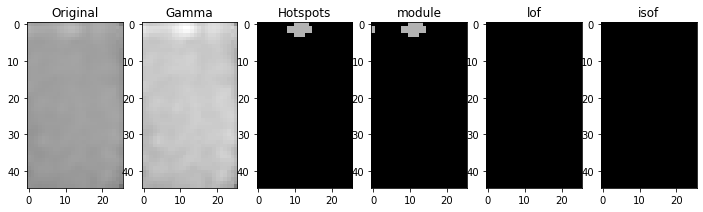

[-1.12313515 -1.00267387 -1.01418774 -1.06226605 -0.99748344 -1.26796636
 -1.04695506 -1.14213537]
[-1.72207615]
[-0.54189648 -0.4777674  -0.45589248 -0.50922081 -0.50049619 -0.58430825
 -0.50174959 -0.54067014]
[-0.64883046]
0.0 0
1936.jpg Normal
[-1.70744125 -1.44629448 -1.70744125 -1.17633789 -1.54986544 -1.11504116
 -1.93677695 -1.33754497]
[-1.94887669]
[-0.63882589 -0.57707847 -0.63882589 -0.49457745 -0.58348986 -0.52763404
 -0.72151996 -0.56668755]
[-0.73955068]
0.0 0
1922.jpg Normal
[-0.96745319 -1.02994885 -1.01183686 -0.97359937 -0.99941976 -0.986896
 -1.11585937 -0.99941976]
[-1.72690247]
[-0.45450053 -0.48403898 -0.47247582 -0.45831969 -0.47119906 -0.47243856
 -0.51254585 -0.47119906]
[-0.65076099]
0.0 0
4682.jpg Normal
[-1.11989128 -1.0001574  -1.05907013 -1.20642558 -1.52393808 -1.00216399
 -0.98667325 -1.11989128]
[-1.82418808]
[-0.49713046 -0.44310243 -0.47165061 -0.52426627 -0.54122269 -0.46403547
 -0.45025876 -0.49713046]
[-0.68967523]
0.0 0
2595.jpg Normal
[-0.983575

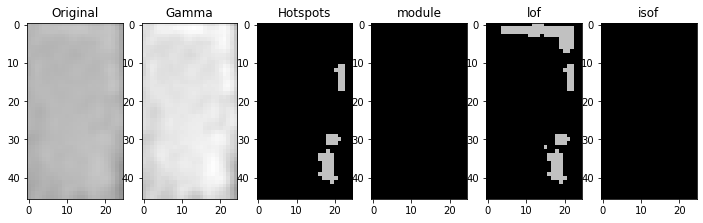

[-1.00612239 -1.39495279 -0.99966298 -0.97927304 -1.03122569 -1.20580938
 -1.00064842 -1.08903477]
[-1.9128832]
[-0.46228466 -0.55791772 -0.4526244  -0.41859856 -0.47569478 -0.5137376
 -0.44256444 -0.48052161]
[-0.72515328]
0.0 0
1711.jpg Normal
[-1.00520271 -0.99213875 -1.01318568 -1.72266016 -1.11056501 -0.99642703
 -0.97930832 -1.01898056]
[-1.85857924]
[-0.44981091 -0.45253739 -0.44786152 -0.57873645 -0.47375658 -0.43974898
 -0.44448966 -0.45896699]
[-0.7034317]
0.0 0
285.jpg Normal
[-0.97356431 -0.97438006 -0.98243338 -0.97973429 -1.07880908 -0.98816806
 -0.97356431 -2.78452908]
[-1.82418808]
[-0.44539333 -0.44389167 -0.46720446 -0.4499235  -0.48495902 -0.46180567
 -0.44539333 -0.71685588]
[-0.68967523]
0.0 0
291.jpg Normal
[-1.59037496 -0.994298   -4.36895057 -1.37691833 -1.11585937 -1.17694129
 -1.02502145 -1.29898062]
[-1.72690247]
[-0.6100114  -0.46024451 -0.79665545 -0.53891606 -0.51254585 -0.51272728
 -0.47932413 -0.53827591]
[-0.65076099]
5.5 9.41421353816986 0.779838125440

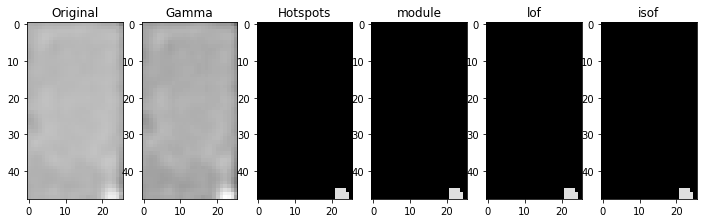

[-1.01368604 -0.96011125 -1.01977355 -1.54877031 -1.0296415  -1.04999909
 -0.97724276 -1.04776936]
[-1.70933596]
[-0.43640966 -0.42945905 -0.48002285 -0.50775764 -0.44342474 -0.45585752
 -0.43781905 -0.45527867]
[-0.64373438]
0.0 0
3112.jpg Normal
[-0.98686787 -0.99950477 -0.98594115 -0.96320888 -0.9827549  -0.98686787
 -1.0001574  -1.75317024]
[-1.82418808]
[-0.43975791 -0.45919324 -0.44242304 -0.44738885 -0.44753572 -0.43975791
 -0.44310243 -0.5923164 ]
[-0.68967523]
0.0 0
3674.jpg Normal
[-0.9674301  -0.99353518 -0.9832106  -0.96757004 -0.96401018 -0.96971146
 -0.99353518 -1.01481148]
[-1.88410943]
[-0.45092971 -0.45926175 -0.47054991 -0.44728372 -0.44952793 -0.45336199
 -0.45926175 -0.4899082 ]
[-0.71364377]
0.0 0
1063.jpg Normal
[-1.04613791 -1.11025716 -1.04206741 -1.0686336  -0.97677165 -1.27750139
 -0.97474468 -2.50471061]
[-1.70933596]
[-0.4550274  -0.45877338 -0.44584998 -0.46021364 -0.44475227 -0.48522249
 -0.42734475 -0.66283979]
[-0.64373438]
0.0 0
468.jpg Normal
[-0.98963

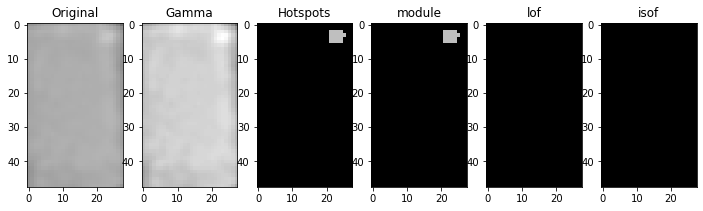

[-0.99205548 -0.98549778 -0.98498166 -0.97811876 -0.97215445 -0.98419085
 -1.00307778 -1.01703183]
[-1.78206358]
[-0.43039942 -0.42022317 -0.43678846 -0.43178886 -0.42431348 -0.43101944
 -0.44173879 -0.44489134]
[-0.67282543]
0.0 0
4090.jpg Normal
[-1.0130658  -1.34983657 -0.97927304 -1.09506215 -1.75481099 -0.9994006
 -5.39203901 -0.96434341]
[-1.9128832]
[-0.45420331 -0.51940333 -0.41859856 -0.46453332 -0.56143928 -0.41368554
 -0.80466879 -0.42247036]
[-0.72515328]
0.0 0
454.jpg Normal
[-1.08238626 -1.03546671 -1.37459758 -1.10542682 -1.05525648 -0.99820526
 -1.03546671 -1.1995357 ]
[-1.69492094]
[-0.45313193 -0.4379882  -0.55937557 -0.45109473 -0.45354133 -0.44574283
 -0.4379882  -0.47787202]
[-0.63796838]
0.0 0
332.jpg Normal
[-0.98887737 -1.09685229 -1.21435739 -0.98997558 -0.98118549 -1.86683548
 -0.99220629 -0.99149429]
[-1.84052542]
[-0.44217046 -0.46801243 -0.52063825 -0.4595748  -0.44541225 -0.59409068
 -0.4706194  -0.45666791]
[-0.69621017]
0.0 0
4906.jpg Normal
[-0.99557773

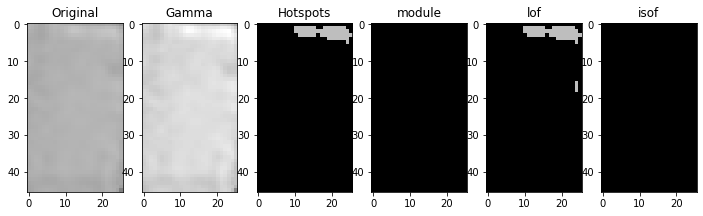

[-0.98058998 -1.10542682 -0.96971092 -1.61164941 -1.00443024 -0.98084085
 -0.96928776 -1.08238626]
[-1.69492094]
[-0.44551127 -0.45109473 -0.4351075  -0.55673344 -0.45832556 -0.43213203
 -0.43055604 -0.45313193]
[-0.63796838]
0.0 0
2344.jpg Normal
[-1.01988293 -1.16359265 -1.08774612 -1.12934061 -0.98047933 -1.18274289
 -1.11220963 -0.96151256]
[-1.94887669]
[-0.46148784 -0.48403507 -0.46774238 -0.48365277 -0.43864397 -0.50606317
 -0.46709733 -0.43943542]
[-0.73955068]
0.0 0
4735.jpg Normal
[-1.12132882 -0.98748463 -1.01894926 -1.30527714 -1.05508393 -0.99795198
 -0.99158574 -0.99559325]
[-1.84052542]
[-0.51200507 -0.46627112 -0.49444568 -0.6308767  -0.48471584 -0.46606016
 -0.44141038 -0.47058858]
[-0.69621017]
0.0 0
1895.jpg Normal
[-0.9944529  -0.99264941 -0.99834263 -0.99754572 -1.45993459 -1.00684129
 -0.9944529  -0.97955942]
[-1.94887669]
[-0.45393414 -0.45590366 -0.45522458 -0.45273152 -0.52689732 -0.46969653
 -0.45393414 -0.43712503]
[-0.73955068]
0.0 0
4053.jpg Normal
[-0.9827

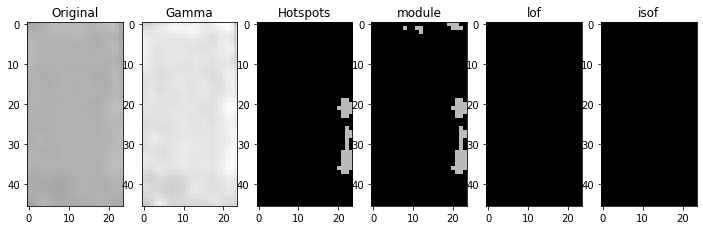

[-1.15988635 -1.12240559 -1.43439241 -1.04375091 -1.13339983 -0.98917436
 -1.39367417 -0.9962377 ]
[-1.94887669]
[-0.53163656 -0.48549601 -0.6082891  -0.4899103  -0.53311896 -0.43222934
 -0.58727967 -0.47082276]
[-0.73955068]
0.0 0
2191.jpg Normal
[-1.46325038 -1.80159269 -1.17570226 -1.40418927 -1.88766624 -1.57358935
 -2.16603177 -1.72055536]
[-1.88410943]
[-0.52516949 -0.56050352 -0.48300434 -0.49574988 -0.57030639 -0.56532631
 -0.7104078  -0.54788766]
[-0.71364377]
280.5 128.66904664039612 0.21290926632353338 0.8035888532434794
0.0 0.0 0 0
0.0 0.0 0 0
0.0 4.828427076339722 0.0 0.9631048527764642
0.0 0
4286.jpg Normal
[-1.02854832 -1.02481646 -0.97848214 -4.16722918 -1.04793288 -1.02604475
 -1.01112096 -0.96878088]
[-1.69492094]
[-0.45147051 -0.45965536 -0.45457018 -0.75162374 -0.46694795 -0.4428223
 -0.433232   -0.42676819]
[-0.63796838]
0.0 2.0 0.0 1.0
15.0 15.656854152679443 0.7689393938672696 1.0
15.0 15.656854152679443 0.7689393938672696 1.0
23.0 0
4292.jpg Junction-Box-Error


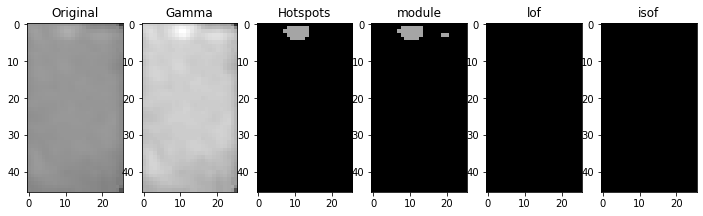

[-0.97207955 -0.99169211 -0.97215445 -1.06534935 -0.98632438 -0.98524851
 -1.6341256  -0.98825079]
[-1.78206358]
[-0.43721819 -0.42426985 -0.42431348 -0.44843267 -0.42297108 -0.43504099
 -0.55194492 -0.43981388]
[-0.67282543]
0.0 0
2185.jpg Normal
[-1.01995511 -0.98448701 -1.37709771 -1.03241873 -0.9790412  -1.15005422
 -0.9790412  -0.98245077]
[-1.94887669]
[-0.46831683 -0.42973107 -0.49838441 -0.46618326 -0.44820475 -0.4863726
 -0.44820475 -0.44119616]
[-0.73955068]
0.0 0
118.jpg Normal
[-0.9960807  -1.38595612 -0.9904323  -1.00200189 -0.99005517 -0.9960807
 -1.08150592 -2.00869852]
[-1.85857924]
[-0.43367661 -0.52612815 -0.44511311 -0.44475729 -0.43518818 -0.43367661
 -0.46835487 -0.59553731]
[-0.7034317]
0.0 0
130.jpg Normal
[-1.04672262 -0.997524   -0.99353851 -1.01702615 -1.00126163 -1.11989128
 -0.97040187 -0.99120599]
[-1.82418808]
[-0.45977644 -0.48010876 -0.4572789  -0.49139277 -0.46453636 -0.49713046
 -0.44969969 -0.45250759]
[-0.68967523]
0.0 0
656.jpg Normal
[-0.98873625 -

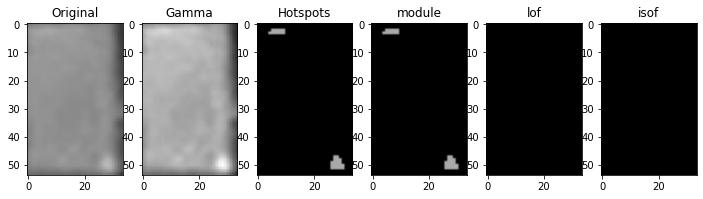

[-1.07399556 -0.98284636 -1.02114571 -1.07399556 -1.20194784 -1.11911883
 -1.00164985 -0.96971146]
[-1.88410943]
[-0.51267747 -0.47472894 -0.47105509 -0.51267747 -0.55009509 -0.52216294
 -0.49583235 -0.45336199]
[-0.71364377]
0.0 0
4523.jpg Normal
[-1.80219196 -1.10156083 -1.62868458 -1.40662368 -1.58727129 -1.34664582
 -1.2176342  -0.98700153]
[-1.70933596]
[-0.65046844 -0.50942158 -0.61886285 -0.55729757 -0.61555434 -0.56048061
 -0.53488955 -0.42736449]
[-0.64373438]
1.5 5.414213538169861 0.6430287075658971 1.0
1.5 10.242640614509583 0.17967069736490698 0.96521492170929
9.0 14.828427076339722 0.5143540952323796 0.9759724309365341
0.0 4.0 0.0 1.0
57.5 72.18376517295837 0.13867515043273412 0.6690965112359134
3.0 8.828427076339722 0.4836870396227584 1.0
12.0 17.313708186149597 0.5030497334464646 0.9654070898885346
2.0 6.828427076339722 0.5390120920947209 1.0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 6.0 0.0 1.0
4.5 8.242640614509583 0.8323186927986581 1.0
0.0 9
2152.jpg Single

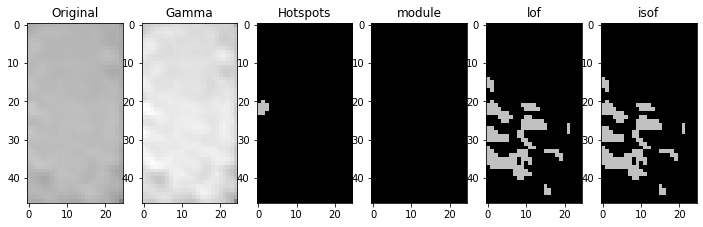

[-1.02069235 -1.54226274 -1.08833461 -0.98737736 -1.17787147 -1.00713233
 -1.20076514 -1.05885238]
[-1.94887669]
[-0.44634631 -0.59810487 -0.46119931 -0.43463258 -0.53443875 -0.44261316
 -0.52957852 -0.46685303]
[-0.73955068]
0.0 0
871.jpg Normal
[-0.99964884 -0.98667325 -1.07084397 -0.96924152 -1.2188863  -1.01241969
 -0.98185265 -0.97040187]
[-1.82418808]
[-0.46117138 -0.45025876 -0.45718226 -0.45597673 -0.46618305 -0.46438473
 -0.45300068 -0.44969969]
[-0.68967523]
0.0 0
31.jpg Normal
[-1.38724926 -0.94970452 -1.08574463 -1.49326376 -1.29814603 -1.05275853
 -1.27542484 -1.02440356]
[-1.88410943]
[-0.50823157 -0.42793543 -0.46123268 -0.53263175 -0.47756505 -0.44506706
 -0.47607098 -0.44071268]
[-0.71364377]
0.0 0
2634.jpg Normal
[-1.00752649 -1.00348322 -0.98659402 -0.99678784 -1.02502145 -1.17305166
 -1.00267492 -0.98854478]
[-1.72690247]
[-0.44092927 -0.46490597 -0.44298944 -0.45747061 -0.47932413 -0.51011187
 -0.43882207 -0.44075994]
[-0.65076099]
0.0 0
4245.jpg Normal
[-1.1293406

[-1.03234087 -1.11940503 -1.04547774 -1.03234087 -1.02905165 -1.03234087
 -1.10156083 -0.99683381]
[-1.70933596]
[-0.45611431 -0.50526634 -0.46566897 -0.45611431 -0.47959102 -0.45611431
 -0.50942158 -0.42667238]
[-0.64373438]
0.0 0
4550.jpg Normal
[-1.02422673 -1.17583879 -1.10006206 -1.44313031 -1.00511281 -1.00969902
 -1.27776658 -1.00325329]
[-1.70933596]
[-0.46605977 -0.50328325 -0.48804183 -0.57800066 -0.44857864 -0.44085861
 -0.50398566 -0.45317273]
[-0.64373438]
0.0 0
2135.jpg Normal
[-0.99678784 -0.99160386 -1.09609257 -0.97814075 -0.99160386 -1.00858073
 -0.98160121 -1.0272508 ]
[-1.72690247]
[-0.45747061 -0.4422106  -0.50025863 -0.44977831 -0.4422106  -0.4706737
 -0.44736171 -0.48591448]
[-0.65076099]
0.0 0
4.jpg Normal
[-0.99159385 -0.97489714 -1.00140202 -0.98153396 -0.98887737 -2.44281909
 -0.99582446 -0.98887737]
[-1.84052542]
[-0.47219222 -0.43884813 -0.47897575 -0.45468053 -0.44217046 -0.64014058
 -0.45885896 -0.44217046]
[-0.69621017]
0.0 0
4544.jpg Normal
[-0.96139687

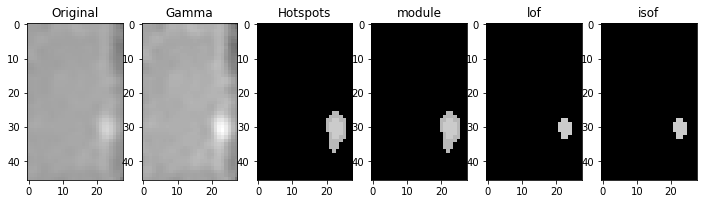

[-0.97487159 -0.97401935 -1.00611706 -0.97474468 -1.46089616 -1.0686336
 -0.97401935 -1.01792571]
[-1.70933596]
[-0.43003384 -0.42751923 -0.43729742 -0.42734475 -0.53595108 -0.46021364
 -0.42751923 -0.43586258]
[-0.64373438]
0.0 0
180.jpg Normal
[-0.97206775 -0.99242605 -2.1248408  -1.02608998 -0.96924152 -0.99075832
 -1.31311885 -0.96279622]
[-1.82418808]
[-0.4348031  -0.4487093  -0.62357358 -0.4555041  -0.45597673 -0.42968438
 -0.49153078 -0.44822848]
[-0.68967523]
0.0 0
1414.jpg Normal
[-0.99239802 -1.24014466 -0.97938803 -0.99158574 -0.97964864 -1.16275723
 -0.98668428 -1.03965568]
[-1.84052542]
[-0.46728504 -0.53015963 -0.43236682 -0.44141038 -0.45281262 -0.49524099
 -0.45319073 -0.48081814]
[-0.69621017]
0.0 0
1400.jpg Normal
[-1.00112465 -1.03125436 -0.98692048 -1.01367334 -1.00798457 -0.99790769
 -1.34653865 -0.99760364]
[-1.72690247]
[-0.45835682 -0.4624761  -0.45248451 -0.44505593 -0.46957027 -0.44091633
 -0.52737918 -0.44974043]
[-0.65076099]
0.0 0
194.jpg Normal
[-0.9863798

[-1.00305085 -1.05399355 -0.99383212 -1.3784951  -0.98250912 -0.98250912
 -1.00520271 -0.99642703]
[-1.85857924]
[-0.44549535 -0.46613097 -0.4405312  -0.50347077 -0.44117863 -0.44117863
 -0.44981091 -0.43974898]
[-0.7034317]
0.0 0
4746.jpg Normal
[-1.01032465 -0.96320888 -1.40193632 -0.99272169 -1.00216399 -0.9857592
 -1.05574732 -2.17029194]
[-1.82418808]
[-0.48994225 -0.44738885 -0.51204006 -0.46044712 -0.46403547 -0.45992416
 -0.45806333 -0.61056956]
[-0.68967523]
0.0 0
3029.jpg Normal
[-1.00412253 -0.99257219 -1.00981207 -1.09506215 -1.04173152 -1.02018269
 -0.99801283 -1.01355833]
[-1.9128832]
[-0.44469701 -0.42707211 -0.43296827 -0.46453332 -0.47956412 -0.44296327
 -0.46139754 -0.44886949]
[-0.72515328]
0.0 0
2337.jpg Normal
[-1.00334336 -0.97918862 -0.98447184 -0.97415512 -1.01389415 -0.98751842
 -0.99546843 -1.01389415]
[-1.82418808]
[-0.46231637 -0.46262329 -0.44866914 -0.44428821 -0.47909182 -0.48073697
 -0.45763919 -0.47909182]
[-0.68967523]
0.0 0
1616.jpg Normal
[-1.1102571

[-1.17540741 -1.02422516 -1.2919828  -1.04956007 -1.01368604 -1.15517996
 -1.04956007 -1.03390274]
[-1.70933596]
[-0.53818832 -0.46283204 -0.54888874 -0.47165717 -0.43640966 -0.51959808
 -0.47165717 -0.45655179]
[-0.64373438]
0.0 0
2257.jpg Normal
[-1.05174299 -0.98690678 -1.37593524 -1.02114571 -1.00847411 -1.10366566
 -0.97903716 -1.02114571]
[-1.88410943]
[-0.54146375 -0.48701587 -0.75983985 -0.47105509 -0.51610619 -0.51333458
 -0.43716367 -0.47105509]
[-0.71364377]
0.0 0
3149.jpg Normal
[-0.9916233  -1.07186311 -1.01115435 -0.99038796 -0.97677165 -1.00325329
 -1.00995191 -2.18991875]
[-1.70933596]
[-0.46822216 -0.45569696 -0.4541219  -0.46604992 -0.44475227 -0.45317273
 -0.46115639 -0.64099848]
[-0.64373438]
0.0 0
4626.jpg Normal
[-0.98651976 -0.99754572 -0.99904727 -1.0001627  -1.00125279 -2.09557965
 -1.00543412 -0.98448701]
[-1.94887669]
[-0.43869935 -0.45273152 -0.45385061 -0.44131806 -0.46087997 -0.62637333
 -0.46490091 -0.42973107]
[-0.73955068]
0.0 0
1986.jpg Normal
[-1.0085

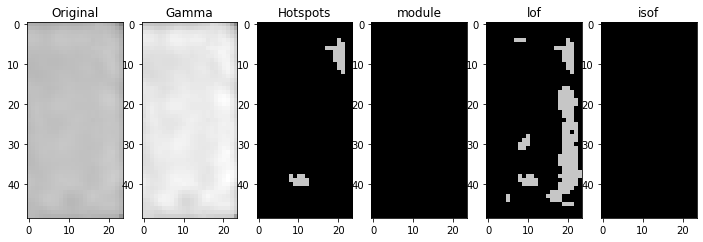

[-0.96401018 -0.97903716 -1.00027806 -0.99353518 -0.9674301  -0.97903716
 -0.96289896 -0.96538125]
[-1.88410943]
[-0.44952793 -0.43960637 -0.45900954 -0.44441657 -0.45092971 -0.43960637
 -0.46840621 -0.46162061]
[-0.71364377]
0.0 0
2243.jpg Normal
[-1.03679682 -1.26508474 -1.043407   -1.17421436 -1.04793288 -1.16503118
 -0.99391609 -0.97288162]
[-1.69492094]
[-0.44770115 -0.52742375 -0.47252792 -0.48703876 -0.46694795 -0.51450506
 -0.43551189 -0.41821733]
[-0.63796838]
0.0 0
4632.jpg Normal
[-0.95335029 -1.05306129 -0.96218969 -0.98788837 -0.9845974  -0.95601968
 -1.19425496 -0.96179844]
[-1.88410943]
[-0.46683015 -0.43497476 -0.43648341 -0.45439532 -0.44011086 -0.4575179
 -0.47111158 -0.43225807]
[-0.71364377]
0.0 0
1762.jpg Normal
[-1.14980431 -0.98692048 -1.38227955 -0.99170275 -1.00674882 -2.20447249
 -1.03538908 -1.04213744]
[-1.72690247]
[-0.51574088 -0.45248451 -0.51849988 -0.47632106 -0.48287323 -0.62578541
 -0.47412866 -0.46200768]
[-0.65076099]
0.0 0
3175.jpg Normal
[-1.65512

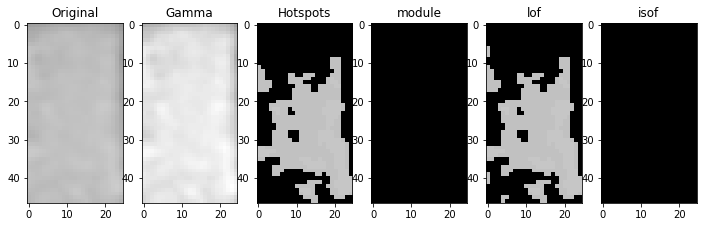

[-0.9994006  -0.9915429  -1.24972301 -0.99874558 -0.96654767 -3.91738626
 -0.9793047  -1.03564319]
[-1.9128832]
[-0.41368554 -0.41832315 -0.47696378 -0.45832024 -0.42780803 -0.73069338
 -0.42135499 -0.43914196]
[-0.72515328]
0.0 0
209.jpg Normal
[-0.97814075 -1.00858073 -0.98915524 -0.97593013 -1.07421615 -1.00102835
 -0.97879293 -0.98659402]
[-1.72690247]
[-0.44977831 -0.4706737  -0.4367827  -0.45048667 -0.4744381  -0.44985768
 -0.44870323 -0.44298944]
[-0.65076099]
0.0 0
1945.jpg Normal
[-0.98185265 -0.99075832 -0.9686882  -1.17640585 -1.00425773 -0.98686787
 -0.96924152 -0.99353851]
[-1.82418808]
[-0.45300068 -0.42968438 -0.45169152 -0.49104565 -0.46292817 -0.43975791
 -0.45597673 -0.4572789 ]
[-0.68967523]
0.0 0
2294.jpg Normal
[-0.96581949 -0.96331808 -0.98824175 -0.96581949 -0.96971146 -0.9631087
 -0.97903716 -1.00628099]
[-1.88410943]
[-0.46126005 -0.42005189 -0.45815319 -0.46126005 -0.44793467 -0.4306532
 -0.43716367 -0.48676028]
[-0.71364377]
0.0 0
3834.jpg Normal
[-1.02729039

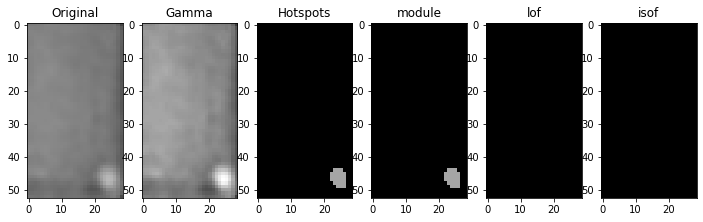

[-1.52489634 -1.33020392 -0.95923655 -1.00956899 -1.48817292 -1.33020392
 -1.15081827 -1.71784003]
[-1.88410943]
[-0.60003716 -0.55976512 -0.42096148 -0.46127751 -0.59389496 -0.55976512
 -0.51415673 -0.68350639]
[-0.71364377]
0.0 0
1548.jpg Normal
[-1.01183686 -1.02810491 -0.98474461 -1.02293595 -1.00972602 -0.98963074
 -1.00348322 -1.02471804]
[-1.72690247]
[-0.47247582 -0.47388908 -0.44474901 -0.44955007 -0.44814926 -0.46413968
 -0.46490597 -0.46028828]
[-0.65076099]
0.0 0
962.jpg Normal
[-1.03538908 -0.98965381 -1.000972   -1.00477791 -1.32460943 -1.01444126
 -1.12070878 -0.99247387]
[-1.72690247]
[-0.47412866 -0.44760465 -0.47899274 -0.46574936 -0.5631341  -0.47192519
 -0.51547717 -0.48817982]
[-0.65076099]
0.0 0
5048.jpg Normal
[-1.06842318 -1.0415177  -1.35124685 -0.97248618 -1.25713523 -0.94836852
 -1.21268972 -1.10243271]
[-1.88410943]
[-0.45629168 -0.44087642 -0.50257854 -0.4371287  -0.48365807 -0.4128611
 -0.48528392 -0.46521252]
[-0.71364377]
0.0 0
2727.jpg Normal
[-1.011120

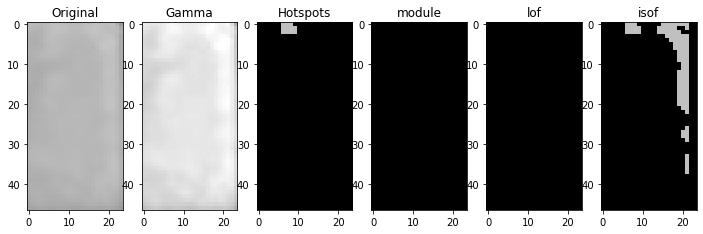

[-0.98357535 -0.99030211 -1.06527274 -0.97233862 -0.98477092 -1.02126019
 -0.98346639 -0.97973429]
[-1.82418808]
[-0.45621254 -0.47633798 -0.46902603 -0.46233409 -0.48713461 -0.46775371
 -0.45507522 -0.4499235 ]
[-0.68967523]
0.0 0
3363.jpg Normal
[-1.04269966 -1.02664113 -1.00724863 -1.0260221  -1.03374322 -1.15988635
 -0.99578824 -1.03888362]
[-1.94887669]
[-0.50467349 -0.46827135 -0.46516601 -0.47895425 -0.4918203  -0.53163656
 -0.43440005 -0.47148628]
[-0.73955068]
0.0 0
5074.jpg Normal
[-1.01682569 -1.24216243 -1.12286774 -0.99038796 -1.10006206 -1.24216243
 -1.04163556 -1.39481391]
[-1.70933596]
[-0.46916466 -0.50275068 -0.50236037 -0.46604992 -0.48804183 -0.50275068
 -0.48374121 -0.54471981]
[-0.64373438]
0.0 0
3405.jpg Normal
[-1.01241969 -1.15546307 -1.05574732 -0.96924152 -1.34111364 -0.97206775
 -1.07084397 -0.98711631]
[-1.82418808]
[-0.46438473 -0.50099897 -0.45806333 -0.45597673 -0.49813441 -0.4348031
 -0.45718226 -0.4359265 ]
[-0.68967523]
0.0 2.0 0.0 1.0
2.0 6.828427076

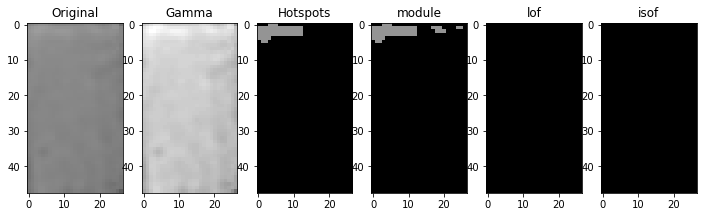

[-0.96971092 -1.03546671 -0.97993043 -0.98058998 -0.98084085 -0.97848214
 -1.1995357  -1.01466159]
[-1.69492094]
[-0.4351075  -0.4379882  -0.43839127 -0.44551127 -0.43213203 -0.45457018
 -0.47787202 -0.4498645 ]
[-0.63796838]
0.0 0
786.jpg Normal
[-0.98250912 -0.99607665 -0.99557773 -1.01318568 -0.99383212 -0.97939261
 -0.99967213 -1.26036872]
[-1.85857924]
[-0.44117863 -0.44699515 -0.44715357 -0.44786152 -0.4405312  -0.44275741
 -0.43569595 -0.51339966]
[-0.7034317]
0.0 0
4381.jpg Normal
[-0.99760364 -0.98241235 -1.01783428 -3.19815356 -1.0619915  -0.98518762
 -0.99760364 -1.00477791]
[-1.72690247]
[-0.44974043 -0.45476927 -0.45797879 -0.76392829 -0.48518492 -0.44417629
 -0.44974043 -0.46574936]
[-0.65076099]
0.0 0
2928.jpg Normal
[-0.95923655 -1.05306129 -1.2688959  -1.78792557 -1.05306129 -1.24250769
 -0.96218969 -0.95908226]
[-1.88410943]
[-0.42096148 -0.43497476 -0.50037099 -0.62919996 -0.43497476 -0.47963213
 -0.43648341 -0.46281099]
[-0.71364377]
0.0 0
2096.jpg Normal
[-0.974627

[-0.45935149 -0.45963875 -0.45476927 -0.49508062 -0.46157991 -0.64946859
 -0.46373863 -0.44417629]
[-0.65076099]
0.0 0
793.jpg Normal
[-0.96947783 -1.01771991 -1.00777792 -1.23885164 -1.00346059 -1.00361163
 -1.01071089 -1.17619175]
[-1.84498598]
[-0.45872502 -0.46535244 -0.46147931 -0.48988278 -0.45055542 -0.45776091
 -0.44173509 -0.5323037 ]
[-0.69799439]
0.0 0
1561.jpg Normal
[-0.99795198 -1.18012509 -1.05508393 -0.98748463 -1.00140202 -0.97938803
 -0.98887737 -1.0409237 ]
[-1.84052542]
[-0.46606016 -0.55436459 -0.48471584 -0.46627112 -0.47897575 -0.43236682
 -0.44217046 -0.52502205]
[-0.69621017]
0.0 0
2068.jpg Normal
[-1.52138137 -1.18754162 -1.39367417 -1.05804029 -1.35758301 -1.73977918
 -1.15988635 -0.99015795]
[-1.94887669]
[-0.62439746 -0.55252691 -0.58727967 -0.49959682 -0.56675452 -0.67977914
 -0.53163656 -0.43367307]
[-0.73955068]
0.0 0
3376.jpg Normal
[-0.95923655 -1.01377477 -1.10934524 -1.24250769 -1.02007487 -1.02314551
 -1.0176156  -0.99415231]
[-1.88410943]
[-0.42096

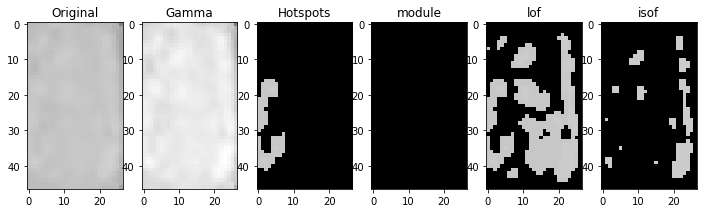

[-0.99128956 -1.000972   -1.03235068 -1.01367334 -0.99544206 -1.00674882
 -0.99170275 -0.97901022]
[-1.72690247]
[-0.46014332 -0.47899274 -0.45764593 -0.44505593 -0.47455179 -0.48287323
 -0.47632106 -0.43811215]
[-0.65076099]
0.0 0
1950.jpg Normal
[-1.13005215 -1.6038154  -1.07366547 -1.16810302 -1.21838133 -1.32770391
 -1.40037941 -0.98788837]
[-1.88410943]
[-0.46533245 -0.57936827 -0.4483661  -0.4805995  -0.48980488 -0.52162118
 -0.52312107 -0.45439532]
[-0.71364377]
0.0 0
1788.jpg Normal
[-1.00555299 -1.0202548  -1.0176156  -1.01305332 -1.00483213 -1.01424904
 -1.01599504 -1.21838133]
[-1.88410943]
[-0.46522919 -0.48494659 -0.46384497 -0.47704496 -0.47487637 -0.48388465
 -0.4628351  -0.48980488]
[-0.71364377]
0.0 0
4828.jpg Normal
[-0.98997558 -0.99795198 -1.02143489 -0.98682771 -1.0267085  -0.99158574
 -0.98887737 -0.98887737]
[-1.84052542]
[-0.4595748  -0.46606016 -0.45935666 -0.45853798 -0.52293616 -0.44141038
 -0.44217046 -0.44217046]
[-0.69621017]
0.0 0
2281.jpg Normal
[-0.9678

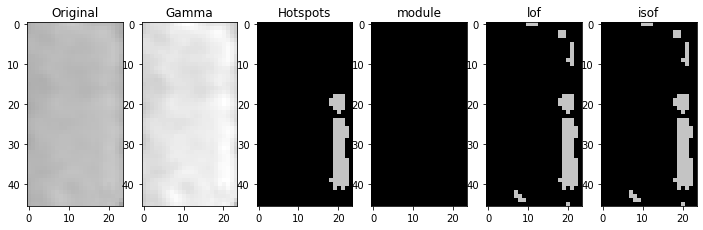

[-1.50275577 -1.08150592 -0.98641786 -1.02886673 -1.29343394 -1.76601075
 -1.16631084 -0.98918443]
[-1.85857924]
[-0.54390967 -0.46835487 -0.4524841  -0.45554817 -0.51816115 -0.58207505
 -0.49359982 -0.45494502]
[-0.7034317]
0.0 0
1011.jpg Normal
[-1.00611706 -1.09302794 -1.04613791 -1.49460005 -0.97487159 -1.01905754
 -0.9854728  -1.23078587]
[-1.70933596]
[-0.43729742 -0.45833722 -0.4550274  -0.53995595 -0.43003384 -0.44869424
 -0.43915377 -0.48614563]
[-0.64373438]
0.0 0
585.jpg Normal
[-1.00959008 -1.25494347 -0.95310947 -0.96772828 -1.10586754 -1.60577279
 -1.0564194  -0.98751177]
[-1.88410943]
[-0.42145796 -0.51822724 -0.42827848 -0.43458807 -0.46490691 -0.58328533
 -0.42847328 -0.43625776]
[-0.71364377]
0.0 0
1777.jpg Normal
[-1.35758301 -1.62225779 -1.0015778  -2.85634895 -1.32302785 -1.00713233
 -1.09111243 -1.25252539]
[-1.94887669]
[-0.56675452 -0.59489894 -0.460411   -0.70797984 -0.57864389 -0.44261316
 -0.52716782 -0.55942493]
[-0.73955068]
0.0 0
3160.jpg Normal
[-0.989907

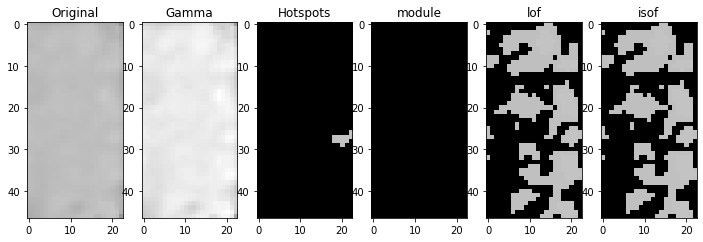

[-1.09299747 -1.15851604 -1.04733907 -0.99394385 -1.06675932 -1.21304531
 -1.03617902 -1.31793201]
[-1.84498598]
[-0.4901179  -0.48717296 -0.46341169 -0.44600098 -0.47919316 -0.48868601
 -0.46193142 -0.53059839]
[-0.69799439]
0.0 0
591.jpg Normal
[-0.99524887 -1.03625577 -0.99902806 -1.64693914 -1.00466337 -0.98576074
 -0.96869628 -1.02119651]
[-1.81122329]
[-0.44970649 -0.48272021 -0.45677456 -0.56082378 -0.47032395 -0.45356221
 -0.45003995 -0.45742101]
[-0.68448931]
0.0 0
1005.jpg Normal
[-1.57042833 -1.57042833 -2.05164385 -1.43439241 -1.79808029 -1.79808029
 -1.32302785 -1.6259532 ]
[-1.94887669]
[-0.64130305 -0.64130305 -0.72651104 -0.6082891  -0.68747759 -0.68747759
 -0.57864389 -0.66078526]
[-0.73955068]
1.0 4.828427076339722 0.5390120952601716 1.0
1.0 6.828427076339722 0.26950604604736045 0.9739111912819676
40.0 41.79898953437805 0.28769895814473834 0.8458344007528414
0.5 3.414213538169861 0.5390120920947209 1.0
11.0 40.485281229019165 0.08433507360876416 0.9495697915764972
0.0

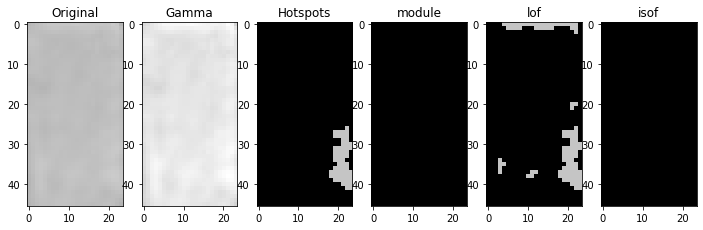

[-1.01377477 -1.00555299 -1.00894218 -1.06320787 -1.00664691 -1.01305332
 -1.00915135 -1.01522028]
[-1.88410943]
[-0.46345788 -0.46522919 -0.45196256 -0.51175837 -0.45595789 -0.47704496
 -0.45365308 -0.47361699]
[-0.71364377]
0.0 0
2524.jpg Normal
[-1.25713523 -1.27972691 -0.9548689  -1.21268972 -0.94912801 -1.48431093
 -0.98657004 -1.05275853]
[-1.88410943]
[-0.48365807 -0.49077932 -0.41341996 -0.48528392 -0.4230321  -0.54358862
 -0.4289243  -0.44506706]
[-0.71364377]
0.0 0
4155.jpg Normal
[-0.98416719 -1.00333683 -0.99724001 -1.25058907 -1.017364   -1.00720243
 -0.99905459 -1.02928413]
[-1.88896714]
[-0.43905967 -0.43198429 -0.45583006 -0.50310848 -0.47244486 -0.45643261
 -0.45709959 -0.43723901]
[-0.71558686]
0.0 0
4633.jpg Normal
[-1.37964791 -1.02604475 -1.07722529 -1.66605583 -1.29162987 -1.10542682
 -1.18454738 -1.4781443 ]
[-1.69492094]
[-0.53627705 -0.4428223  -0.50536435 -0.62313698 -0.5272227  -0.45109473
 -0.50785938 -0.55577206]
[-0.63796838]
0.0 0
2242.jpg Normal
[-1.9246

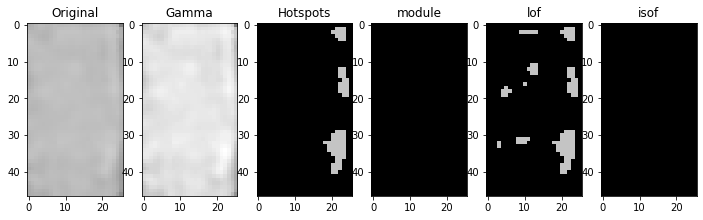

[-1.05399355 -1.41855507 -2.16103289 -1.18715164 -1.69884667 -1.27743572
 -1.53402456 -0.99557773]
[-1.85857924]
[-0.46613097 -0.51019214 -0.63525604 -0.51314387 -0.57265671 -0.51574115
 -0.55063175 -0.44715357]
[-0.7034317]
3.0 7.656854152679443 0.6430287180776717 0.9767338486162336
0.0 2.0 0.0 1.0
56.5 55.55634891986847 0.23003341040879782 0.9391991788832622
0.0 0
1987.jpg Normal
[-0.98641154 -1.09108823 -0.95113614 -0.94834201 -1.85811578 -1.21824877
 -1.08300099 -1.10681115]
[-1.84498598]
[-0.44755789 -0.46420711 -0.43426682 -0.41672327 -0.54360924 -0.47611382
 -0.44413913 -0.50427973]
[-0.69799439]
0.0 0
4627.jpg Normal
[-1.00258501 -1.00511281 -1.00611706 -1.05804562 -0.9916233  -1.01115435
 -0.9969635  -1.10006206]
[-1.70933596]
[-0.44385944 -0.44857864 -0.43729742 -0.47259688 -0.46822216 -0.4541219
 -0.47219136 -0.48804183]
[-0.64373438]
0.0 0
3148.jpg Normal
[-1.24691194 -1.02078183 -0.99439425 -1.06747897 -1.15472308 -0.99653041
 -1.15472308 -0.99653041]
[-1.81122329]
[-0.530

[-0.95113614 -1.08300099 -1.17763778 -0.96071564 -4.10320374 -1.00582684
 -1.00582684 -0.96787348]
[-1.84498598]
[-0.43426682 -0.44413913 -0.44452901 -0.45311224 -0.77224303 -0.4260439
 -0.4260439  -0.41629734]
[-0.69799439]
0.0 0
1171.jpg Normal
[-1.37775759 -1.0580348  -1.00333683 -1.19292875 -1.02596863 -1.81623991
 -1.48735466 -1.37775759]
[-1.88896714]
[-0.57463677 -0.48875799 -0.43198429 -0.51339514 -0.47468165 -0.68465889
 -0.54081775 -0.57463677]
[-0.71558686]
0.0 0
4009.jpg Normal
[-0.99290022 -0.99290022 -0.99316744 -0.99290022 -0.99290022 -0.99290022
 -0.99290022 -0.99290022]
[-1.84498598]
[-0.45020516 -0.43289346 -0.44881279 -0.48958817 -0.42725924 -0.42796784
 -0.43289346 -0.50252438]
[-0.69799439]
0.0 0
3766.jpg Normal
[-0.98084085 -1.03685438 -0.96971092 -1.0184921  -1.01112096 -0.99804574
 -0.98003675 -1.02634172]
[-1.69492094]
[-0.43213203 -0.45754083 -0.4351075  -0.4497961  -0.433232   -0.43878477
 -0.44534382 -0.44423802]
[-0.63796838]
0.0 0
2478.jpg Normal
[-0.98295

[-0.51011187 -0.4367827  -0.46490597 -0.44985768 -0.46490597 -0.44075994
 -0.45676107 -0.4744381 ]
[-0.65076099]
0.0 0
195.jpg Normal
[-1.12286774 -0.99038796 -2.84794275 -1.00511281 -1.02422673 -1.39481391
 -1.00258501 -1.07202531]
[-1.70933596]
[-0.50236037 -0.46604992 -0.74449014 -0.44857864 -0.46605977 -0.54471981
 -0.44385944 -0.46974771]
[-0.64373438]
5.5 9.41421353816986 0.7798381254407765 1.0
5.5 9.41421353816986 0.7798381254407765 1.0
0.0 11
1401.jpg Single-Hotspot


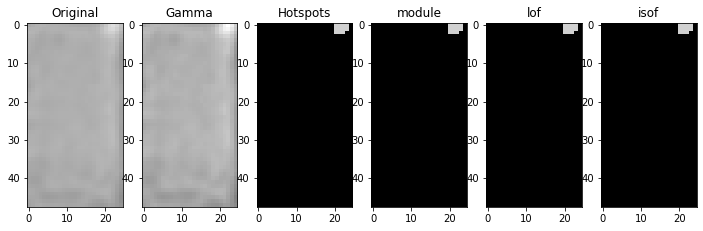

[-0.99800098 -0.97183357 -1.16810302 -1.01910003 -0.95923655 -0.95751834
 -0.98549289 -0.97259818]
[-1.88410943]
[-0.4581054  -0.45730231 -0.4805995  -0.48321089 -0.42096148 -0.44169735
 -0.44253015 -0.45505477]
[-0.71364377]
0.0 0
1367.jpg Normal
[-1.05361727 -1.17213767 -3.22744495 -1.08091943 -1.26269682 -1.02730934
 -1.17213767 -1.13191429]
[-1.88896714]
[-0.48747367 -0.500403   -0.71217464 -0.48743481 -0.55195348 -0.47018928
 -0.500403   -0.49660179]
[-0.71558686]
0.0 0
5101.jpg Normal
[-1.30096755 -0.99549637 -1.03900574 -1.60233732 -1.13651515 -1.09154967
 -0.99549637 -1.00288178]
[-1.81122329]
[-0.6737806  -0.46523177 -0.53240873 -0.80959972 -0.58498832 -0.53824779
 -0.45149045 -0.45598258]
[-0.68448931]
0.0 0
3570.jpg Normal
[-1.02927656 -1.0020339  -0.99311564 -0.97939261 -0.9871217  -1.11056501
 -1.00520271 -1.22720275]
[-1.85857924]
[-0.46017269 -0.4466939  -0.45304877 -0.44275741 -0.43924468 -0.47375658
 -0.44981091 -0.50983987]
[-0.7034317]
0.0 0
5115.jpg Normal
[-1.26682

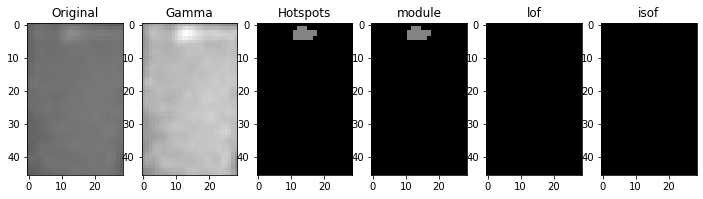

[-1.06842318 -0.94974466 -2.41115348 -0.98657004 -1.17182692 -0.95917454
 -0.96774631 -0.98025758]
[-1.88410943]
[-0.45629168 -0.43574254 -0.71489165 -0.4289243  -0.48384429 -0.42956422
 -0.44576648 -0.43834096]
[-0.71364377]
0.0 0
1373.jpg Normal
[-0.97031426 -2.2982578  -1.58513349 -1.05135036 -1.37185351 -0.98431723
 -0.97973429 -0.97438006]
[-1.82418808]
[-0.47677943 -0.63189771 -0.55392822 -0.48380922 -0.49161705 -0.46092979
 -0.4499235  -0.44389167]
[-0.68967523]
0.0 0
1415.jpg Normal
[-0.96982496 -0.98771196 -1.01367334 -0.97901022 -0.99760364 -1.04213744
 -0.99497299 -1.41843042]
[-1.72690247]
[-0.44680918 -0.46157991 -0.44505593 -0.43811215 -0.44974043 -0.46200768
 -0.44605603 -0.51963765]
[-0.65076099]
0.0 0
181.jpg Normal
[-0.96984377 -0.95877277 -0.94976156 -1.00582684 -0.97689775 -1.33524439
 -0.95877277 -0.9864063 ]
[-1.84498598]
[-0.41942841 -0.40854355 -0.43422314 -0.4260439  -0.44926473 -0.46826203
 -0.40854355 -0.42439792]
[-0.69799439]
0.0 0
3202.jpg Normal
[-0.96363

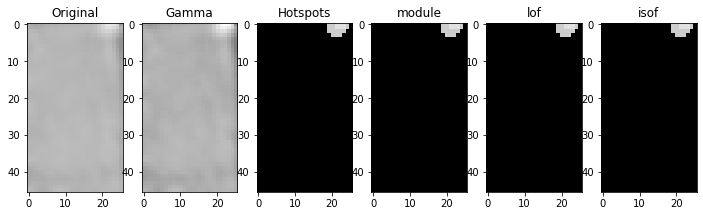

[-1.73160286 -1.15687648 -1.3756474  -1.09643939 -1.56098511 -1.1081411
 -1.01671108 -1.3756474 ]
[-1.84498598]
[-0.61132072 -0.51829611 -0.54107491 -0.51390428 -0.59752721 -0.46808704
 -0.47097484 -0.54107491]
[-0.69799439]
0.0 0
4223.jpg Normal
[-0.99692123 -1.11234666 -0.99692123 -1.50261321 -1.02278419 -0.99692123
 -1.22127489 -2.45944912]
[-1.81122329]
[-0.44121888 -0.54298466 -0.46630753 -0.68965863 -0.49437077 -0.44489208
 -0.64635325 -0.84619376]
[-0.68448931]
0.0 0
817.jpg Normal
[-0.97957668 -0.97593013 -1.33231137 -1.00070394 -1.0158984  -0.98915524
 -0.98915524 -1.00972602]
[-1.72690247]
[-0.43936877 -0.45048667 -0.53178712 -0.43902283 -0.4611371  -0.4367827
 -0.4367827  -0.44814926]
[-0.65076099]
0.0 0
57.jpg Normal
[-0.98423824 -0.98825554 -1.00713233 -1.02069235 -0.99543824 -1.00507616
 -1.10996171 -0.98252232]
[-1.94887669]
[-0.43691144 -0.42728011 -0.44261316 -0.44634631 -0.42984876 -0.46603366
 -0.4700509  -0.42703005]
[-0.73955068]
0.0 0
803.jpg Normal
[-0.96982496 -

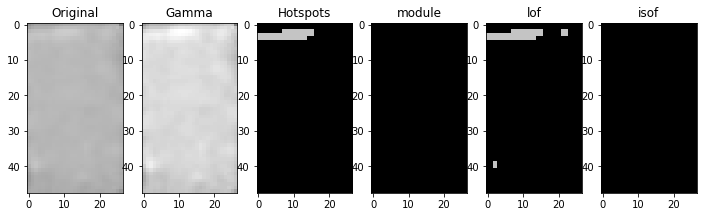

[-0.98013499 -1.0318116  -0.97020246 -1.51439919 -0.97139559 -0.97176398
 -1.08761371 -0.99245447]
[-1.86224249]
[-0.45608321 -0.4743129  -0.45700157 -0.5449433  -0.44864102 -0.43416979
 -0.45102253 -0.44562969]
[-0.704897]
0.0 0
69.jpg Normal
[-1.01253366 -0.98855    -1.05027597 -0.99995578 -1.015222   -0.97199473
 -1.00360976 -1.31446747]
[-1.88896714]
[-0.45539905 -0.4354454  -0.46453127 -0.45874881 -0.46788133 -0.42745804
 -0.4607118  -0.51214367]
[-0.71558686]
0.0 0
1365.jpg Normal
[-0.99067603 -0.97297389 -1.00566055 -1.00288178 -0.97809359 -1.09154967
 -0.99067603 -0.97809359]
[-1.81122329]
[-0.43077977 -0.42410971 -0.46150947 -0.45598258 -0.41104438 -0.53824779
 -0.43077977 -0.42776879]
[-0.68448931]
0.0 0
829.jpg Normal
[-0.97938803 -1.07802913 -1.78435068 -0.98167754 -2.49569396 -1.00091679
 -0.97421207 -1.35950151]
[-1.84052542]
[-0.43236682 -0.47935645 -0.58789133 -0.4570446  -0.65814669 -0.47159812
 -0.44883719 -0.52559999]
[-0.69621017]
1.0 8.828427076339722 0.16122901320

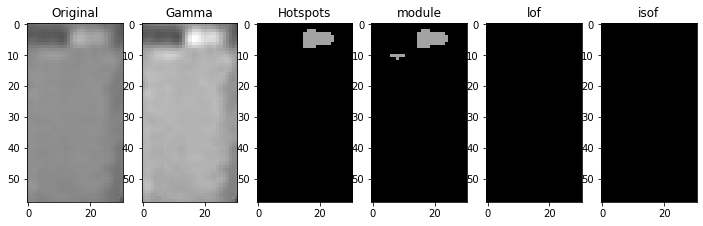

[-0.98309467 -1.02638794 -0.98715188 -1.02844153 -0.98810563 -1.0200628
 -0.98810563 -0.97814083]
[-1.84052542]
[-0.46799186 -0.45835111 -0.47371835 -0.43542687 -0.46265955 -0.46826393
 -0.46265955 -0.46285694]
[-0.69621017]
0.0 0
197.jpg Normal
[-1.0890085  -1.10735056 -1.08106396 -1.09648731 -1.06843757 -1.11724521
 -1.16046713 -1.0644079 ]
[-1.84498598]
[-0.47671423 -0.46730749 -0.47999351 -0.46741913 -0.48424725 -0.48337977
 -0.49641094 -0.47016248]
[-0.69799439]
0.0 0
3214.jpg Normal
[-1.01115435 -1.49460005 -0.96859892 -1.01173518 -0.97487159 -1.0178915
 -1.0686336  -0.9916233 ]
[-1.70933596]
[-0.4541219  -0.53995595 -0.43955997 -0.44734432 -0.43003384 -0.46220583
 -0.46021364 -0.46822216]
[-0.64373438]
0.0 0
3200.jpg Normal
[-0.96773925 -0.98172289 -0.98863835 -0.99902806 -0.99892332 -0.98863835
 -0.97913389 -0.98401088]
[-1.81122329]
[-0.44302877 -0.45785021 -0.45178165 -0.45677456 -0.46141136 -0.45178165
 -0.45786936 -0.44585168]
[-0.68448931]
0.0 0
183.jpg Normal
[-1.90129705

[-0.46775371 -0.46189573 -0.48713461 -0.46231637 -0.49785974 -0.46775371
 -0.44882626 -0.54030874]
[-0.68967523]
9.0 13.656854152679443 0.606388603606561 0.9685080207575992
9.0 13.656854152679443 0.606388603606561 0.9685080207575992
16.0 0
4989.jpg Junction-Box-Error


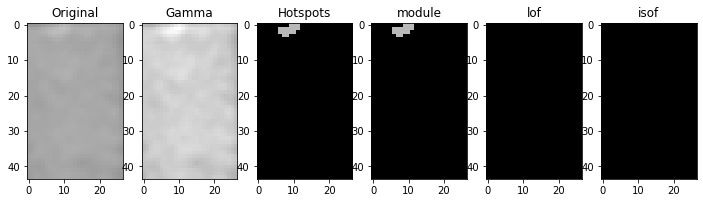

[-0.9864063  -0.95877277 -1.46932342 -0.98641154 -1.1459025  -0.95441439
 -0.95877277 -0.96787348]
[-1.84498598]
[-0.42439792 -0.40854355 -0.51701153 -0.44755789 -0.44594805 -0.42573218
 -0.40854355 -0.41629734]
[-0.69799439]
0.0 0
2320.jpg Normal
[-1.10051948 -1.02886673 -1.10051948 -1.32466291 -1.02886673 -1.05065134
 -1.00429949 -1.12068417]
[-1.85857924]
[-0.46031147 -0.45554817 -0.46031147 -0.52024193 -0.45554817 -0.47267766
 -0.45511403 -0.46777496]
[-0.7034317]
0.0 0
1629.jpg Normal
[-1.02283771 -1.09639274 -1.00025528 -1.08526694 -1.00904383 -1.15768104
 -1.01807402 -1.0449365 ]
[-1.86224249]
[-0.46608658 -0.49614717 -0.43882379 -0.5148904  -0.47322294 -0.5247204
 -0.45044468 -0.4822832 ]
[-0.704897]
0.0 0
4779.jpg Normal
[-0.99830429 -0.9969635  -1.05804562 -0.9916233  -1.34016514 -1.00511281
 -1.00325329 -1.0178915 ]
[-1.70933596]
[-0.45253057 -0.47219136 -0.47259688 -0.46822216 -0.49886925 -0.44857864
 -0.45317273 -0.46220583]
[-0.64373438]
0.0 0
3016.jpg Normal
[-1.56098511

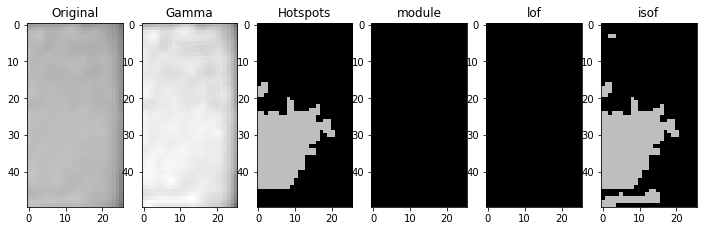

[-0.99263824 -1.00789082 -1.09750169 -1.00278864 -0.98737736 -1.33038364
 -0.99015795 -0.98917436]
[-1.94887669]
[-0.43006309 -0.44625058 -0.45867459 -0.45443974 -0.43463258 -0.52703606
 -0.43367307 -0.43222934]
[-0.73955068]
0.0 0
1167.jpg Normal
[-0.99790769 -1.01153583 -0.98518762 -0.96982496 -1.22863365 -0.98741628
 -0.98084711 -0.99760364]
[-1.72690247]
[-0.44091633 -0.45682208 -0.44417629 -0.44680918 -0.50625982 -0.46981733
 -0.44879869 -0.44974043]
[-0.65076099]
0.0 0
3770.jpg Normal
[-1.02078183 -0.9915581  -1.01028261 -0.96869628 -2.64280569 -0.99057374
 -0.9812166  -0.98510309]
[-1.81122329]
[-0.45119147 -0.44883607 -0.45756188 -0.45003995 -0.71540231 -0.44772005
 -0.44431588 -0.44673836]
[-0.68448931]
0.0 0
3764.jpg Normal
[-1.11196362 -1.02946023 -1.17538324 -1.48735466 -1.0247432  -1.04251769
 -1.07854324 -1.02168237]
[-1.88896714]
[-0.47737705 -0.4470341  -0.51306702 -0.54081775 -0.45843549 -0.49579084
 -0.49224678 -0.45109714]
[-0.71558686]
0.0 0
1173.jpg Normal
[-1.1963

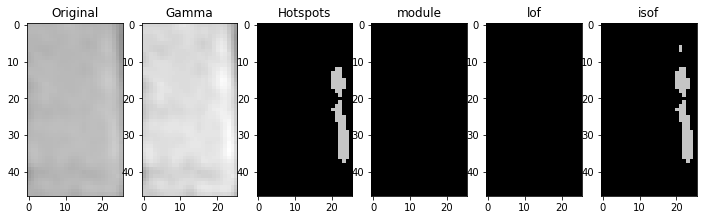

[-1.29802171 -0.95877277 -0.96984377 -1.00582684 -0.96787348 -1.04136127
 -1.17763778 -0.94834201]
[-1.84498598]
[-0.48903685 -0.40854355 -0.41942841 -0.4260439  -0.41629734 -0.44266968
 -0.44452901 -0.41672327]
[-0.69799439]
0.0 0
381.jpg Normal
[-1.1988799  -1.06013282 -1.07884149 -1.24354333 -1.07884149 -1.11110748
 -1.15687648 -1.01671108]
[-1.84498598]
[-0.53023844 -0.47398378 -0.48571377 -0.53492904 -0.48571377 -0.51417304
 -0.51829611 -0.47097484]
[-0.69799439]
0.0 0
3002.jpg Normal
[-1.00674365 -0.982428   -1.05126539 -1.00659501 -0.97923975 -1.0035286
 -0.98511021 -1.00659501]
[-1.82418808]
[-0.48625644 -0.4759778  -0.48688583 -0.47458378 -0.48367095 -0.51144654
 -0.4699244  -0.47458378]
[-0.68967523]
0.0 0
4786.jpg Normal
[-1.00959008 -0.96998952 -1.42729404 -0.95855157 -0.98657004 -1.08805876
 -0.94836852 -0.94912801]
[-1.88410943]
[-0.42145796 -0.42554417 -0.55036703 -0.40905937 -0.4289243  -0.45884075
 -0.4128611  -0.4230321 ]
[-0.71364377]
0.0 0
1826.jpg Normal
[-1.050821

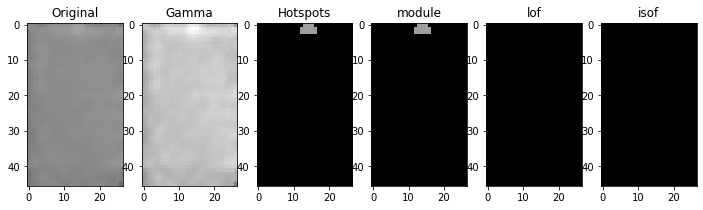

[-0.97401935 -1.04206741 -1.01792571 -1.11025716 -1.00611706 -1.02051321
 -1.16818941 -0.97474468]
[-1.70933596]
[-0.42751923 -0.44584998 -0.43586258 -0.45877338 -0.43729742 -0.45207529
 -0.45735333 -0.42734475]
[-0.64373438]
0.0 0
2532.jpg Normal
[-0.99466291 -0.99466291 -0.98422244 -0.99466291 -0.99090101 -0.98357841
 -0.99466291 -0.9879937 ]
[-1.81122329]
[-0.44141566 -0.44141566 -0.41170651 -0.44110025 -0.43305693 -0.40457915
 -0.44965814 -0.41575196]
[-0.68448931]
0.0 0
2254.jpg Normal
[-0.98186581 -0.97809359 -1.00566055 -0.97416015 -0.97882468 -0.97138762
 -0.97297389 -0.97138762]
[-1.81122329]
[-0.47976421 -0.41783997 -0.46150947 -0.4514674  -0.44621049 -0.44500816
 -0.42410971 -0.42857016]
[-0.68448931]
0.0 0
4625.jpg Normal
[-0.9904323  -0.9993028  -1.00305085 -1.46117927 -1.01906338 -1.00200189
 -0.98165827 -0.99607665]
[-1.85857924]
[-0.44511311 -0.44871757 -0.44549535 -0.55075214 -0.45965826 -0.44475729
 -0.43365211 -0.44699515]
[-0.7034317]
0.0 0
1985.jpg Normal
[-1.01712

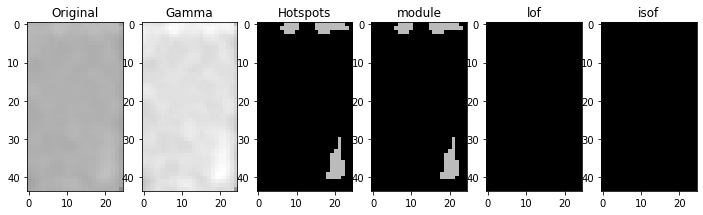

[-1.13607216 -1.13992446 -0.96984377 -1.18713227 -1.10735056 -1.0644079
 -1.08527247 -1.12638973]
[-1.84498598]
[-0.4649618  -0.47659195 -0.41942841 -0.48471674 -0.46730749 -0.47016248
 -0.5133305  -0.46509279]
[-0.69799439]
0.0 0
1952.jpg Normal
[-0.98716422 -1.16245189 -0.98844956 -1.03751072 -0.9691105  -1.19107483
 -1.02118003 -0.98716422]
[-1.82418808]
[-0.43873128 -0.47238255 -0.44562448 -0.46973726 -0.4449171  -0.47849567
 -0.46606952 -0.43873128]
[-0.68967523]
0.0 0
578.jpg Normal
[-0.98700681 -0.99016497 -0.98966354 -0.98309491 -0.98223319 -0.98966354
 -1.0036815  -0.98486338]
[-1.80505583]
[-0.46272669 -0.42188382 -0.44779888 -0.42504192 -0.43716486 -0.46546738
 -0.49086804 -0.45486886]
[-0.68202233]
0.0 0
3823.jpg Normal
[-1.19089544 -1.0173676  -1.09639274 -0.98037549 -1.23257337 -1.07111571
 -1.43754677 -1.28586645]
[-1.86224249]
[-0.50593326 -0.45795169 -0.49614717 -0.4406072  -0.50408625 -0.51040233
 -0.60515067 -0.53070507]
[-0.704897]
0.0 0
4194.jpg Normal
[-1.49379984

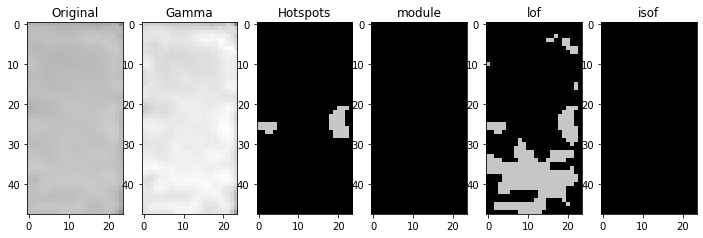

[-0.9845974  -0.99298238 -0.95751834 -0.99794027 -1.00224386 -1.21838133
 -0.97259818 -1.01377477]
[-1.88410943]
[-0.44011086 -0.47302386 -0.44169735 -0.44903102 -0.46551914 -0.48980488
 -0.45505477 -0.46345788]
[-0.71364377]
0.0 0
3189.jpg Normal
[-1.13607216 -1.0644079  -1.12978237 -1.10735056 -1.20259806 -1.12550197
 -1.07918915 -1.00420793]
[-1.84498598]
[-0.4649618  -0.47016248 -0.46200345 -0.46730749 -0.51367223 -0.496078
 -0.46053917 -0.44366577]
[-0.69799439]
0.0 0
2297.jpg Normal
[-1.11377979 -0.97138762 -0.99549637 -0.97138762 -0.99549637 -0.97809359
 -0.97809359 -1.02561714]
[-1.81122329]
[-0.56593412 -0.43063107 -0.46222626 -0.43970136 -0.46523177 -0.41783997
 -0.42776879 -0.52823193]
[-0.68448931]
0.0 0
222.jpg Normal
[-1.01173518 -1.01905754 -1.01682569 -1.01115435 -0.99149433 -1.00912706
 -1.00538612 -1.01792571]
[-1.70933596]
[-0.44734432 -0.44869424 -0.46916466 -0.4541219  -0.46170428 -0.44538227
 -0.46679159 -0.43586258]
[-0.64373438]
0.0 0
4816.jpg Normal
[-0.9761265

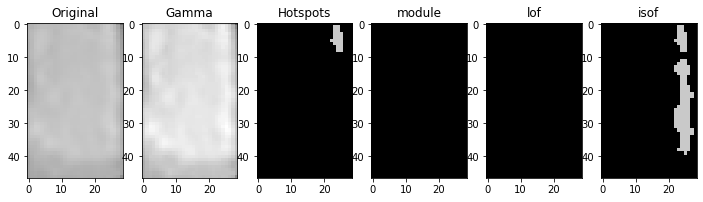

[-1.0580348  -1.288934   -1.15279405 -1.66238646 -1.3469869  -1.01642563
 -1.05364319 -1.17213767]
[-1.88896714]
[-0.48875799 -0.57248134 -0.50780198 -0.64710053 -0.58413507 -0.46020978
 -0.48066476 -0.500403  ]
[-0.71558686]
0.0 0
4427.jpg Normal
[-1.43754677 -1.25921991 -1.23257337 -1.59196006 -1.19089544 -1.07111571
 -1.31456273 -1.343259  ]
[-1.86224249]
[-0.60515067 -0.51571228 -0.50408625 -0.68174209 -0.50593326 -0.51040233
 -0.54363626 -0.55086179]
[-0.704897]
0.0 0
3348.jpg Normal
[-1.06239736 -0.9728211  -0.99349009 -0.99067603 -0.99880493 -0.99880493
 -0.98201378 -0.9728211 ]
[-1.81122329]
[-0.5043828  -0.42247366 -0.44836302 -0.43077977 -0.48288241 -0.46664557
 -0.450385   -0.42247366]
[-0.68448931]
0.0 0
2056.jpg Normal
[-1.01289193 -1.00183695 -0.98917436 -0.98637981 -1.00713233 -1.00507616
 -1.08833461 -0.99963824]
[-1.94887669]
[-0.45193497 -0.44111324 -0.43222934 -0.43832354 -0.44261316 -0.46603366
 -0.46119931 -0.43300462]
[-0.73955068]
0.0 0
2730.jpg Normal
[-0.997320

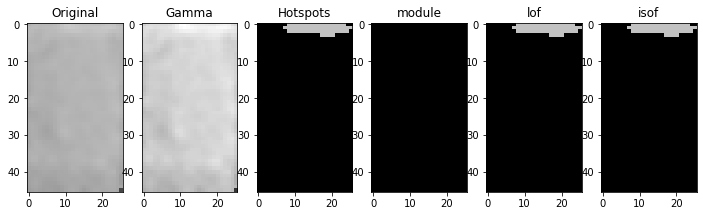

[-2.12850822 -1.0045418  -1.12099199 -0.97544039 -1.02540804 -1.07183753
 -0.97101331 -1.4400414 ]
[-1.84052542]
[-0.61485653 -0.44748785 -0.44590334 -0.42557581 -0.44193753 -0.43961723
 -0.44384197 -0.52535518]
[-0.69621017]
0.0 0
1211.jpg Normal
[-1.00333683 -0.97667215 -1.02903255 -0.97749678 -1.03463855 -0.98096948
 -1.14909114 -0.98416719]
[-1.88896714]
[-0.43198429 -0.41974826 -0.46727154 -0.43670249 -0.46344773 -0.43894533
 -0.51037393 -0.43905967]
[-0.71558686]
0.0 0
785.jpg Normal
[-0.9764956  -0.98549289 -0.95601968 -0.9975068  -0.96218969 -2.53261129
 -0.9845974  -0.96179844]
[-1.88410943]
[-0.45537103 -0.44253015 -0.4575179  -0.45587399 -0.43648341 -0.69197651
 -0.44011086 -0.43225807]
[-0.71364377]
0.0 0
1577.jpg Normal
[-1.30738376 -1.13546058 -1.0578228  -1.30738376 -1.45984089 -1.22561905
 -0.98763744 -1.15472308]
[-1.81122329]
[-0.54772175 -0.51635535 -0.49806912 -0.54772175 -0.61010478 -0.50951428
 -0.46256228 -0.52302626]
[-0.68448931]
0.0 0
3360.jpg Normal
[-1.15122

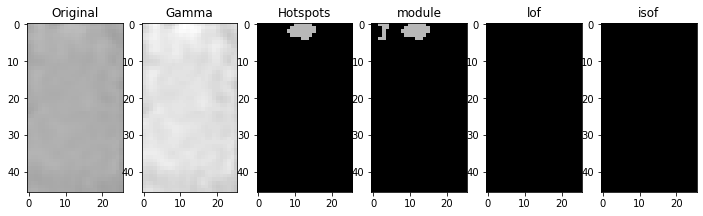

[-1.79073937 -1.23078587 -1.07186311 -1.27750139 -0.97690178 -1.01831313
 -1.09302794 -1.04613791]
[-1.70933596]
[-0.59504591 -0.48614563 -0.45569696 -0.48522249 -0.44614643 -0.43661382
 -0.45833722 -0.4550274 ]
[-0.64373438]
0.0 0
1588.jpg Normal
[-2.11734828 -1.0703373  -1.35758301 -1.52138137 -1.28488547 -1.02729039
 -1.52138137 -1.79808029]
[-1.94887669]
[-0.73094846 -0.51558186 -0.56675452 -0.62439746 -0.57265779 -0.47906583
 -0.62439746 -0.68747759]
[-0.73955068]
1.5 5.414213538169861 0.6430287075658971 1.0
2.0 8.828427076339722 0.3224580264151723 0.951284485472469
66.0 60.14213538169861 0.22929580627035348 0.8897392984611538
0.0 2.0 0.0 1.0
0.0 0.0 0 0
0.0 0
2081.jpg Normal
[-1.01759268 -1.01222447 -1.48227732 -0.97544039 -1.03994515 -0.97544039
 -0.98442375 -1.06491624]
[-1.84052542]
[-0.44139181 -0.43084245 -0.54174971 -0.42557581 -0.44095836 -0.42557581
 -0.43241507 -0.44501264]
[-0.69621017]
0.0 0
2095.jpg Normal
[-0.9879937  -0.98357841 -0.98803051 -0.98422244 -0.98422244 -

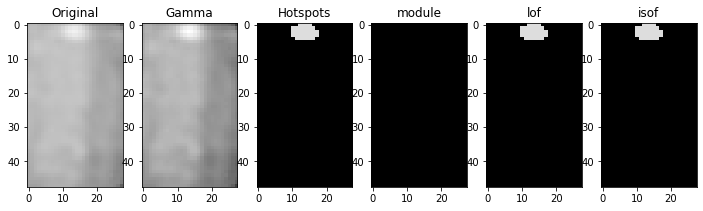

[-1.07850464 -1.01624865 -0.9871217  -0.9801985  -0.99213875 -0.99668291
 -1.00772222 -1.00310915]
[-1.85857924]
[-0.48420787 -0.449144   -0.43924468 -0.44632034 -0.45253739 -0.43243945
 -0.44926336 -0.45795205]
[-0.7034317]
0.0 0
4397.jpg Normal
[-1.23257337 -0.97693989 -1.01902937 -1.01807402 -1.55028214 -1.09639274
 -1.12752538 -1.23257337]
[-1.86224249]
[-0.50408625 -0.44435851 -0.46700485 -0.45044468 -0.65090448 -0.49614717
 -0.49166731 -0.50408625]
[-0.704897]
0.0 0
2080.jpg Normal
[-1.14114464 -1.69907746 -1.32983055 -1.02593585 -1.54018392 -1.54018392
 -0.99885193 -1.32983055]
[-1.84052542]
[-0.48882819 -0.6022974  -0.52688593 -0.44807619 -0.54727451 -0.54727451
 -0.45697402 -0.52688593]
[-0.69621017]
0.0 0
1589.jpg Normal
[-1.2730786  -1.01474931 -1.07741548 -0.99800098 -1.08981925 -1.00227254
 -1.01910003 -1.02383814]
[-1.88410943]
[-0.53016343 -0.47248921 -0.49115714 -0.4581054  -0.49931792 -0.44580999
 -0.48321089 -0.48679679]
[-0.71364377]
0.0 0
1562.jpg Normal
[-0.9967842

[-0.9691105  -1.16245189 -0.98844956 -0.9645765  -3.26375285 -1.03751072
 -0.99461395 -0.97075614]
[-1.82418808]
[-0.4449171  -0.47238255 -0.44562448 -0.46152685 -0.68362785 -0.46973726
 -0.42603057 -0.43463987]
[-0.68967523]
0.0 0
223.jpg Normal
[-0.98700681 -0.98309491 -0.98308133 -0.99316064 -0.98223319 -0.98308133
 -0.98223319 -0.99316064]
[-1.80505583]
[-0.45174113 -0.42504192 -0.45316848 -0.42711372 -0.43716486 -0.44948133
 -0.4406537  -0.42711372]
[-0.68202233]
0.0 0
545.jpg Normal
[-1.02093986 -0.98965381 -0.97974409 -1.01367334 -1.00664585 -1.01367334
 -0.99170275 -1.03235068]
[-1.72690247]
[-0.45958081 -0.44760465 -0.45698119 -0.44505593 -0.46126175 -0.44505593
 -0.47632106 -0.45764593]
[-0.65076099]
0.0 0
4181.jpg Normal
[-1.54018392 -0.98470617 -1.02844153 -1.08497879 -1.08497879 -1.4932381
 -1.75505132 -1.54018392]
[-1.84052542]
[-0.54727451 -0.46487084 -0.43542687 -0.48527788 -0.48527788 -0.54950713
 -0.60456472 -0.54727451]
[-0.69621017]
0.0 0
3836.jpg Normal
[-1.1707738

[-0.45867459 -0.43685149 -0.43463258 -0.45069505 -0.45069505 -0.45193497
 -0.52738954 -0.43277676]
[-0.73955068]
0.0 0
3639.jpg Normal
[-0.9826145  -1.00165167 -0.98712237 -0.98813775 -1.71652954 -1.09644395
 -0.98558533 -0.9826145 ]
[-1.80505583]
[-0.44270264 -0.47510858 -0.44979845 -0.47662412 -0.61812092 -0.48593286
 -0.43555418 -0.44270264]
[-0.68202233]
0.0 0
4156.jpg Normal
[-1.03891085 -2.00091081 -1.01759268 -1.4400414  -1.14346241 -5.29356676
 -1.07183753 -1.01395816]
[-1.84052542]
[-0.44170304 -0.59465042 -0.44139181 -0.52535518 -0.47024944 -0.77067715
 -0.43961723 -0.43918828]
[-0.69621017]
0.0 0
425.jpg Normal
[-0.96398602 -0.98395841 -0.95676183 -0.9745323  -0.9745323  -1.09579574
 -0.96398602 -0.98932344]
[-1.80505583]
[-0.40518859 -0.43545656 -0.43741084 -0.43048512 -0.43264452 -0.53075094
 -0.40518859 -0.43152811]
[-0.68202233]
0.0 0
343.jpg Normal
[-0.98844956 -1.01887732 -0.99461395 -1.03442242 -0.96506575 -0.97758577
 -1.02752913 -0.99565701]
[-1.82418808]
[-0.445624

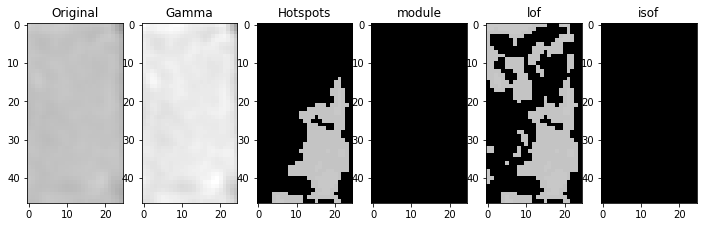

[-1.14980431 -0.99861753 -1.26046412 -1.03538908 -1.20657177 -1.39596544
 -0.96982496 -1.14980431]
[-1.72690247]
[-0.51574088 -0.49385845 -0.54443116 -0.47412866 -0.54671573 -0.55703687
 -0.44680918 -0.51574088]
[-0.65076099]
0.0 0
3003.jpg Normal
[-0.99673078 -0.97891254 -1.0557241  -0.98395841 -0.98932344 -1.00887677
 -1.00609331 -0.9745323 ]
[-1.80505583]
[-0.41109095 -0.45076668 -0.45561187 -0.43545656 -0.4394903  -0.44254098
 -0.47033491 -0.45653365]
[-0.68202233]
0.0 0
380.jpg Normal
[-0.96294239 -0.99214917 -0.94611612 -1.14753518 -0.95869563 -0.97286465
 -0.95324066 -1.03380637]
[-1.80144609]
[-0.42679587 -0.45796601 -0.41189343 -0.48120881 -0.43970348 -0.42520974
 -0.43385603 -0.43733058]
[-0.68057844]
0.0 0
1614.jpg Normal
[-0.98401088 -1.00327459 -1.44641095 -1.05753479 -1.00747303 -0.96773925
 -0.96869628 -0.98172289]
[-1.81122329]
[-0.44585168 -0.49049954 -0.51668403 -0.48094678 -0.47459224 -0.44302877
 -0.45003995 -0.45785021]
[-0.68448931]
0.0 0
1600.jpg Normal
[-1.00438

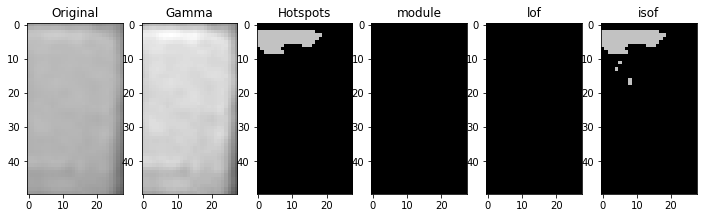

[-0.9691105  -1.07918323 -0.99461395 -0.9645765  -1.0379951  -1.01947882
 -1.24270701 -0.97872846]
[-1.82418808]
[-0.4449171  -0.46973077 -0.42603057 -0.46152685 -0.47864472 -0.43393042
 -0.49870147 -0.44595343]
[-0.68967523]
0.0 0
1166.jpg Normal
[-2.54470703 -1.16060674 -1.13617252 -1.88265046 -1.00305085 -2.22349049
 -4.92228848 -1.41855507]
[-1.85857924]
[-0.7186808  -0.50803306 -0.4726364  -0.59862773 -0.44549535 -0.6635265
 -0.80587145 -0.51019214]
[-0.7034317]
783.5 145.982754945755 0.462004019797051 0.7765393916396844
783.5 145.982754945755 0.462004019797051 0.7765393916396844
165.0 680
4036.jpg Module-Anomaly


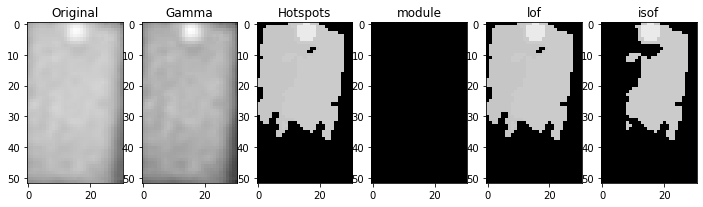

[-1.00052785 -1.02540804 -0.96259852 -1.02593585 -1.31901437 -1.04523401
 -1.02844153 -3.60011072]
[-1.84052542]
[-0.43777785 -0.44193753 -0.42112864 -0.44807619 -0.506854   -0.43961294
 -0.43542687 -0.71918414]
[-0.69621017]
0.0 0
3759.jpg Normal
[-0.98451007 -1.13193284 -1.0247432  -2.34955587 -0.98096948 -1.0275893
 -1.56295539 -1.25058907]
[-1.88896714]
[-0.45258685 -0.49255158 -0.45843549 -0.65258592 -0.43894533 -0.44455884
 -0.56683443 -0.50310848]
[-0.71558686]
0.0 0
2447.jpg Normal
[-0.99800098 -1.01305332 -0.95751834 -1.00224386 -0.99415231 -1.24250769
 -1.0202548  -1.01599504]
[-1.88410943]
[-0.4581054  -0.47704496 -0.44169735 -0.46551914 -0.44871004 -0.47963213
 -0.48494659 -0.4628351 ]
[-0.71364377]
0.0 0
3981.jpg Normal
[-0.98953884 -0.95689068 -0.98953884 -0.97745513 -1.04362699 -0.97157801
 -1.03887654 -1.01480894]
[-1.80505583]
[-0.45168213 -0.44118637 -0.47076696 -0.46970758 -0.44736804 -0.44097176
 -0.46154169 -0.47244385]
[-0.68202233]
0.0 0
1628.jpg Normal
[-0.99128

[-0.4379858  -0.42552358 -0.56644888 -0.43391095 -0.52776915 -0.42402788
 -0.46113603 -0.42088566]
[-0.68057844]
0.0 0
1370.jpg Normal
[-1.01395816 -1.03891085 -0.96259852 -1.01395816 -1.64333191 -1.12099199
 -0.97101331 -0.96444728]
[-1.84052542]
[-0.43918828 -0.44170304 -0.42112864 -0.43918828 -0.55755386 -0.44590334
 -0.44384197 -0.40941569]
[-0.69621017]
0.0 0
828.jpg Normal
[-1.26046412 -0.99247387 -0.98692048 -1.18014236 -1.10876784 -1.02192023
 -1.05945983 -0.99992037]
[-1.72690247]
[-0.54443116 -0.48817982 -0.45248451 -0.54080466 -0.48908941 -0.49465886
 -0.48790662 -0.46521657]
[-0.65076099]
0.0 0
1364.jpg Normal
[-0.99097218 -1.51439919 -1.1339843  -1.04631433 -0.98025127 -0.97689316
 -1.44076682 -0.97020246]
[-1.86224249]
[-0.45378357 -0.5449433  -0.47971664 -0.47785264 -0.43094364 -0.43262548
 -0.54773414 -0.45700157]
[-0.704897]
0.0 0
68.jpg Normal
[-1.01071089 -1.07884149 -1.01170117 -1.1988799  -1.04672473 -1.02305138
 -1.01671108 -1.06013282]
[-1.84498598]
[-0.44173509 

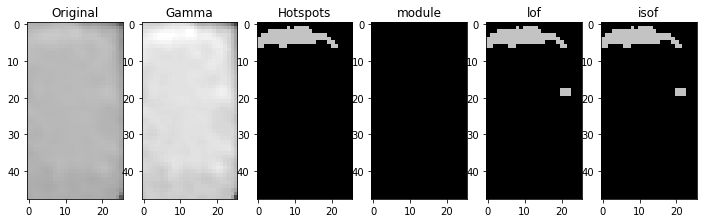

[-1.07896932 -1.25031337 -1.32109017 -1.62955483 -1.17477508 -1.15028098
 -3.07612061 -1.37755298]
[-1.80505583]
[-0.47323048 -0.53999718 -0.54682227 -0.60015813 -0.48036555 -0.49329323
 -0.78276383 -0.55838563]
[-0.68202233]
0.0 0
800.jpg Normal
[-0.99719124 -0.98309491 -1.10349205 -0.98227799 -0.99016497 -0.9873183
 -1.0036815  -1.64074045]
[-1.80505583]
[-0.49520611 -0.42504192 -0.59361348 -0.44690917 -0.42188382 -0.41541661
 -0.51377365 -0.79843934]
[-0.68202233]
0.0 0
40.jpg Normal
[-1.11056501 -1.42355234 -0.99557773 -0.98774897 -2.63384935 -0.9871217
 -1.00429949 -1.00520271]
[-1.85857924]
[-0.47375658 -0.5440146  -0.44715357 -0.44575026 -0.66298001 -0.43924468
 -0.45511403 -0.44981091]
[-0.7034317]
0.0 0
2645.jpg Normal
[-1.02613721 -0.97540046 -0.99481764 -0.99245447 -1.01807402 -0.98013499
 -0.97604192 -0.97020246]
[-1.86224249]
[-0.46341169 -0.43845972 -0.45289804 -0.44562969 -0.45044468 -0.45608321
 -0.44672943 -0.45700157]
[-0.704897]
0.0 0
4234.jpg Normal
[-0.98932344 -1.

[-0.99673078 -0.95689068 -0.96398602 -0.96212568 -0.96132934 -0.97891254
 -1.0337981  -0.9745323 ]
[-1.80505583]
[-0.41109095 -0.44118637 -0.40518859 -0.43185465 -0.47620087 -0.4409349
 -0.48031927 -0.43264452]
[-0.68202233]
0.0 0
810.jpg Normal
[-0.97923975 -1.03446732 -0.98511021 -0.98511021 -1.00950163 -0.97923975
 -1.00674365 -1.05936696]
[-1.82418808]
[-0.48367095 -0.47683515 -0.4699244  -0.4699244  -0.47363668 -0.48367095
 -0.48625644 -0.47523034]
[-0.68967523]
0.0 0
4224.jpg Normal
[-1.02140224 -0.97544039 -0.99475512 -1.03950655 -0.97544039 -1.0045418
 -1.03994515 -1.23581809]
[-1.84052542]
[-0.45720411 -0.42557581 -0.46943894 -0.43816493 -0.42557581 -0.44748785
 -0.44095836 -0.48526668]
[-0.69621017]
0.0 0
2655.jpg Normal
[-0.98076787 -1.00601908 -0.97176398 -0.97139559 -0.97540046 -1.08761371
 -0.98321277 -0.97604192]
[-1.86224249]
[-0.46657971 -0.4714458  -0.43416979 -0.44864102 -0.43845972 -0.45102253
 -0.46549571 -0.44672943]
[-0.704897]
0.0 0
2899.jpg Normal
[-0.96879747 

[-1.00986723 -1.01169705 -1.01771991 -1.81266308 -1.00868716 -1.04672473
 -1.00969754 -1.01170117]
[-1.84498598]
[-0.47124181 -0.45457044 -0.46535244 -0.57275432 -0.46244025 -0.48509497
 -0.48966641 -0.46219023]
[-0.69799439]
0.0 0
4768.jpg Normal
[-0.97749678 -1.00333683 -0.97667215 -1.02730934 -1.02946023 -0.99724001
 -0.99771676 -1.04382244]
[-1.88896714]
[-0.43670249 -0.43198429 -0.41974826 -0.47018928 -0.4470341  -0.45583006
 -0.46402144 -0.49040011]
[-0.71558686]
0.0 0
2319.jpg Normal
[-0.99585912 -1.0151784  -0.97056239 -1.01559141 -1.04363612 -1.00325135
 -0.98973276 -0.9999106 ]
[-1.80144609]
[-0.4479433  -0.47055016 -0.43305291 -0.46503747 -0.47372929 -0.43375661
 -0.43680046 -0.43320919]
[-0.68057844]
0.0 0
3761.jpg Normal
[-0.98442375 -1.08553368 -1.23581809 -1.01759268 -0.96444728 -0.98750228
 -1.01395816 -1.03305585]
[-1.84052542]
[-0.43241507 -0.45205071 -0.48526668 -0.44139181 -0.40941569 -0.4481584
 -0.43918828 -0.43784243]
[-0.69621017]
0.0 0
1176.jpg Normal
[-1.04696

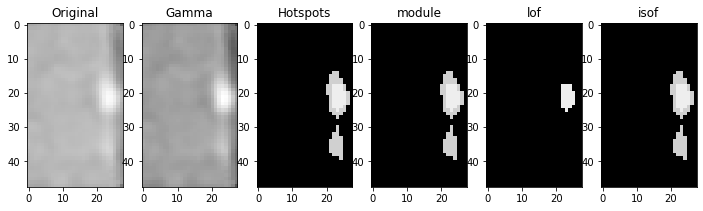

[-0.96756487 -1.16613789 -1.11962515 -1.0730318  -0.97199952 -1.09316657
 -1.16949231 -1.15958062]
[-1.87825281]
[-0.44469531 -0.48651375 -0.45545383 -0.45379851 -0.46867817 -0.49309712
 -0.5059319  -0.49006528]
[-0.71130113]
0.0 0
4740.jpg Normal
[-0.98453266 -1.05424667 -0.98948166 -1.37202466 -0.9942668  -0.98948166
 -0.99821101 -0.99180004]
[-1.80144609]
[-0.43183906 -0.56644888 -0.43391095 -0.76009574 -0.46212944 -0.43391095
 -0.4826175  -0.45789701]
[-0.68057844]
0.0 0
4998.jpg Normal
[-0.99461395 -0.98844956 -1.57203499 -1.05991174 -0.9691105  -1.11079728
 -0.99658029 -0.97872846]
[-1.82418808]
[-0.42603057 -0.44562448 -0.55118674 -0.46050781 -0.4449171  -0.48347616
 -0.45287249 -0.44595343]
[-0.68967523]
0.0 0
2331.jpg Normal
[-0.97540046 -1.00173114 -0.97693989 -0.99245447 -0.97689316 -1.1339843
 -0.97689316 -0.97176398]
[-1.86224249]
[-0.43845972 -0.46978327 -0.44435851 -0.44562969 -0.43262548 -0.47971664
 -0.43262548 -0.43416979]
[-0.704897]
0.0 0
4754.jpg Normal
[-1.5685358

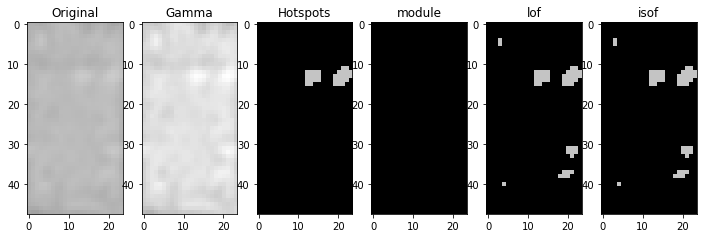

[-0.99005517 -2.06001563 -1.13617252 -0.99242627 -0.9960807  -1.00860987
 -3.13603234 -1.42355234]
[-1.85857924]
[-0.43518818 -0.59628317 -0.4726364  -0.44988735 -0.43367661 -0.46051928
 -0.7346766  -0.5440146 ]
[-0.7034317]
0.0 0
2443.jpg Normal
[-1.32983055 -1.03025191 -1.14114464 -0.98132928 -1.98535963 -1.26202658
 -1.4490007  -0.99885193]
[-1.84052542]
[-0.52688593 -0.46708266 -0.48882819 -0.4555572  -0.65508346 -0.51014779
 -0.54251158 -0.45697402]
[-0.69621017]
29.0 35.65685415267944 0.28663011151656503 0.9797898790688573
29.0 35.65685415267944 0.28663011151656503 0.9797898790688573
33.0 14
3985.jpg Single-Hotspot


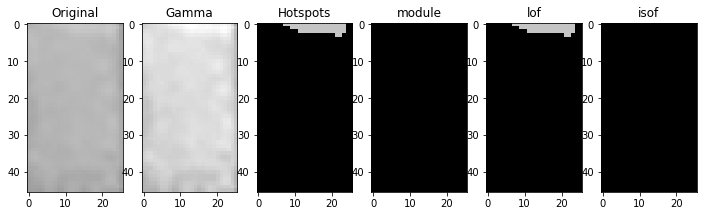

[-0.99439425 -1.23847599 -1.00147612 -1.17786167 -1.48445263 -1.08199039
 -1.31779163 -1.03625577]
[-1.81122329]
[-0.44050895 -0.5179215  -0.4699034  -0.50447679 -0.54290212 -0.47479766
 -0.52464167 -0.48272021]
[-0.68448931]
0.0 0
4032.jpg Normal
[-1.04362699 -0.99824902 -0.98932344 -1.00887677 -0.98932344 -1.07714605
 -1.01317848 -0.99824902]
[-1.80505583]
[-0.44736804 -0.45035777 -0.4394903  -0.44254098 -0.45833957 -0.48944806
 -0.47722045 -0.45035777]
[-0.68202233]
0.0 0
435.jpg Normal
[-1.17039718 -1.00174897 -1.08116586 -1.64567814 -1.08116586 -1.27607533
 -1.49378609 -1.27607533]
[-1.80144609]
[-0.48450749 -0.45051276 -0.47785557 -0.55174464 -0.47785557 -0.52895874
 -0.56180554 -0.52895874]
[-0.68057844]
0.0 0
353.jpg Normal
[-1.00526519 -1.06167682 -1.59571448 -1.0024741  -0.99849453 -1.04449653
 -0.99585912 -1.12192753]
[-1.80144609]
[-0.46682636 -0.48197908 -0.5846185  -0.45064647 -0.4810699  -0.48495418
 -0.4479433  -0.51977825]
[-0.68057844]
0.0 0
4967.jpg Normal
[-1.007440

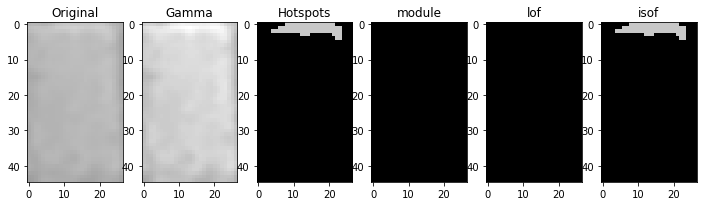

[-1.01783428 -0.98241235 -1.08235395 -0.99497299 -0.99497299 -1.48174299
 -1.03145223 -1.02472068]
[-1.72690247]
[-0.45797879 -0.45476927 -0.47205963 -0.44605603 -0.44605603 -0.54776409
 -0.45963875 -0.46373863]
[-0.65076099]
0.0 0
4783.jpg Normal
[-1.01235498 -1.11714628 -1.00522583 -0.98715188 -1.0045418  -1.01222447
 -1.02638794 -1.0569655 ]
[-1.84052542]
[-0.46699555 -0.49472548 -0.47226456 -0.47371835 -0.44748785 -0.43084245
 -0.45835111 -0.46623538]
[-0.69621017]
0.0 0
1823.jpg Normal
[-1.01824352 -0.97286465 -1.12629685 -0.97286465 -0.95324066 -1.24559587
 -1.00174897 -1.06340421]
[-1.80144609]
[-0.44961458 -0.4310555  -0.48931115 -0.42520974 -0.43385603 -0.51363259
 -0.45051276 -0.48211769]
[-0.68057844]
0.0 0
1837.jpg Normal
[-1.01253366 -0.97667215 -1.13193284 -0.99878197 -1.0043826  -1.01642563
 -1.02168237 -1.25058907]
[-1.88896714]
[-0.45539905 -0.41974826 -0.49255158 -0.46543011 -0.44866686 -0.46020978
 -0.45109714 -0.50310848]
[-0.71558686]
0.0 0
4797.jpg Normal
[-0.9857

[-0.98810563 -0.99125975 -1.02593585 -1.93736807 -0.98309467 -0.98810563
 -1.00052785 -1.02593585]
[-1.84052542]
[-0.46265955 -0.4778349  -0.44807619 -0.59485798 -0.46799186 -0.46265955
 -0.43777785 -0.44807619]
[-0.69621017]
0.0 0
4807.jpg Normal
[-0.9468548  -1.023386   -0.94948781 -1.01824352 -0.95457467 -0.95457467
 -0.96294239 -1.93060667]
[-1.80144609]
[-0.4352177  -0.44156758 -0.4257003  -0.44961458 -0.42084359 -0.42084359
 -0.42679587 -0.60996301]
[-0.68057844]
0.0 0
233.jpg Normal
[-0.9812166  -1.05753479 -0.98949654 -1.28955023 -0.99439425 -1.00827994
 -0.97913389 -0.96773925]
[-1.81122329]
[-0.44431588 -0.48094678 -0.47152925 -0.52139403 -0.44050895 -0.44510602
 -0.45786936 -0.44302877]
[-0.68448931]
0.0 0
555.jpg Normal
[-1.36610099 -1.19271324 -1.21415411 -1.62339686 -1.17477508 -1.468577
 -1.04110887 -1.9470441 ]
[-1.80505583]
[-0.56346889 -0.5252967  -0.52006489 -0.59898855 -0.48036555 -0.56351704
 -0.47787469 -0.73219544]
[-0.68202233]
0.0 0.0 0 0
7.0 11.656854152679443

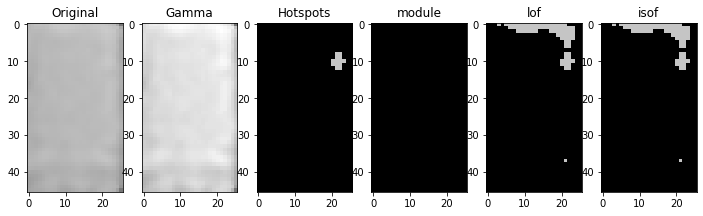

[-1.03450363 -0.99857931 -0.99504241 -1.0016674  -1.00363972 -1.19805624
 -0.98458346 -0.9919385 ]
[-1.80144609]
[-0.4577239  -0.43149241 -0.45064914 -0.44643732 -0.44369572 -0.50927181
 -0.43838955 -0.4316208 ]
[-0.68057844]
0.0 0
4191.jpg Normal
[-1.12752538 -0.97689316 -1.01192024 -1.12752538 -1.01807402 -1.0449365
 -0.99481764 -1.11362453]
[-1.86224249]
[-0.49166731 -0.43262548 -0.49923945 -0.49166731 -0.45044468 -0.4822832
 -0.45289804 -0.50771072]
[-0.704897]
0.0 0
3198.jpg Normal
[-0.97391572 -1.08155712 -0.97141373 -0.98514444 -1.00291749 -0.97201976
 -0.9950248  -0.99394385]
[-1.84498598]
[-0.43313992 -0.48771259 -0.44550697 -0.44877576 -0.43688059 -0.46453234
 -0.47836462 -0.44600098]
[-0.69799439]
0.0 0
2286.jpg Normal
[-0.95869563 -0.97286465 -1.36025682 -0.9468548  -1.03380637 -0.9611185
 -1.03380637 -0.94648416]
[-1.80144609]
[-0.43970348 -0.4310555  -0.51970365 -0.4352177  -0.43733058 -0.43874762
 -0.43733058 -0.42836295]
[-0.68057844]
0.0 0
1957.jpg Normal
[-1.08553368 

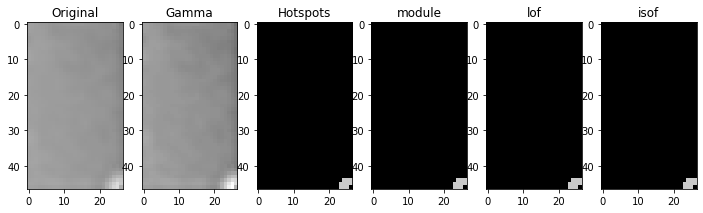

[-1.06971788 -0.98025127 -1.08761371 -0.98025127 -1.37520812 -0.98024413
 -1.31908977 -1.00601908]
[-1.86224249]
[-0.45914439 -0.43094364 -0.45102253 -0.43094364 -0.51369742 -0.46421127
 -0.51309581 -0.4714458 ]
[-0.704897]
0.0 0
780.jpg Normal
[-0.9942668  -0.98545343 -0.98467667 -0.98948166 -0.98545343 -0.99180004
 -0.99821101 -0.98872296]
[-1.80144609]
[-0.46893453 -0.42160086 -0.42088566 -0.43391095 -0.42160086 -0.48122835
 -0.52594619 -0.4379858 ]
[-0.68057844]
0.0 0
794.jpg Normal
[-1.01797522 -0.94655951 -0.97199952 -1.08587109 -0.94664717 -0.97979287
 -0.99901959 -0.95336511]
[-1.87825281]
[-0.47732836 -0.44108734 -0.46867817 -0.47667712 -0.4472996  -0.44624426
 -0.47940981 -0.43907138]
[-0.71130113]
0.0 0
1200.jpg Normal
[-0.98132928 -1.12099199 -1.02593585 -0.98470617 -2.00091081 -0.96444728
 -0.98715188 -1.0569655 ]
[-1.84052542]
[-0.4555572  -0.44590334 -0.44807619 -0.46487084 -0.59465042 -0.40941569
 -0.47371835 -0.46623538]
[-0.69621017]
0.0 0
2709.jpg Normal
[-1.39927668

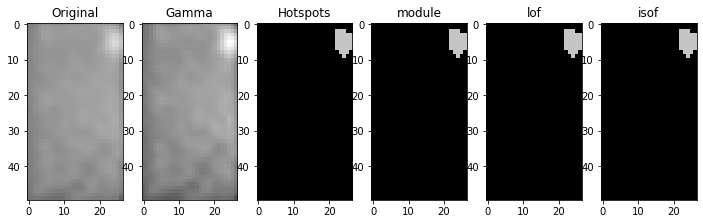

[-1.00247181 -1.01559141 -0.97127344 -0.99849453 -0.98891513 -0.99758258
 -1.0024741  -1.08649472]
[-1.80144609]
[-0.45395359 -0.46503747 -0.43604529 -0.4810699  -0.46306827 -0.47698707
 -0.45064647 -0.50446849]
[-0.68057844]
0.0 0
3359.jpg Normal
[-0.9611185  -1.023386   -0.97286465 -0.94948781 -1.00125142 -1.17738095
 -0.94611612 -0.98328239]
[-1.80144609]
[-0.43874762 -0.44156758 -0.42520974 -0.4257003  -0.44071273 -0.48107341
 -0.41189343 -0.46396268]
[-0.68057844]
0.0 0
4436.jpg Normal
[-1.50617611 -1.01632105 -1.26193715 -1.84751705 -1.30933371 -1.08869393
 -1.39927668 -1.62339686]
[-1.80505583]
[-0.58882616 -0.47306602 -0.51545615 -0.69752563 -0.55029103 -0.51045577
 -0.56295735 -0.59898855]
[-0.68202233]
0.0 2.0 0.0 1.0
0.0 0.0 0 0
105.0 86.76955199241638 0.17525259318195707 0.7497410169277818
0.0 2.0 0.0 1.0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 0
2047.jpg Normal
[-1.03422805 -1.11991967 -0.97979287 -0.98777198 -0.95092829 -0.99045927
 -0.94655951 -0.95071136]
[-1.87825281]
[-0.47256814

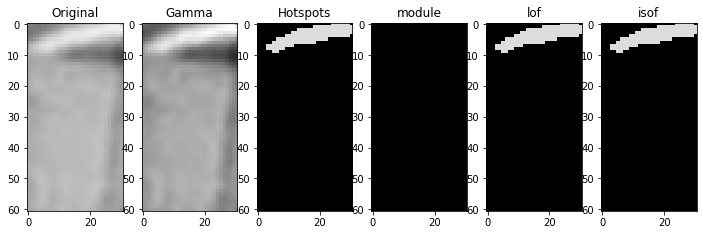

[-1.0003253  -0.98716422 -0.97923975 -1.05991174 -1.03330009 -0.982428
 -1.29946596 -1.00249758]
[-1.82418808]
[-0.49062576 -0.43873128 -0.48367095 -0.46050781 -0.50801061 -0.4759778
 -0.50689353 -0.51215113]
[-0.68967523]
0.0 0
2734.jpg Normal
[-1.12192753 -1.0016674  -0.99585912 -1.20621487 -0.98468207 -1.0307163
 -1.0307163  -1.00325135]
[-1.80144609]
[-0.51977825 -0.44643732 -0.4479433  -0.53836918 -0.44034198 -0.46726219
 -0.46726219 -0.43375661]
[-0.68057844]
0.0 0
2052.jpg Normal
[-1.10963095 -0.9826145  -0.99379334 -1.03107907 -1.04110887 -0.98691287
 -0.98605259 -1.03107907]
[-1.80505583]
[-0.50126642 -0.44270264 -0.4500512  -0.44720102 -0.47787469 -0.45217759
 -0.4490907  -0.44720102]
[-0.68202233]
0.0 0
4423.jpg Normal
[-0.94783225 -0.97654187 -0.95336511 -1.26896657 -1.00871209 -0.94655951
 -0.99045927 -0.95983958]
[-1.87825281]
[-0.45656184 -0.47809241 -0.43907138 -0.48871585 -0.45370591 -0.44108734
 -0.45178183 -0.45442543]
[-0.71130113]
0.0 0
2046.jpg Normal
[-1.017364  

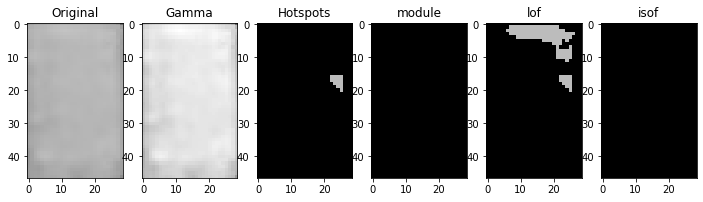

[-1.03380473 -0.97176398 -1.02283771 -1.01902937 -0.97689316 -1.09639274
 -1.00503047 -1.00904383]
[-1.86224249]
[-0.48985744 -0.43416979 -0.46608658 -0.46700485 -0.43262548 -0.49614717
 -0.46391496 -0.47322294]
[-0.704897]
0.0 0
5067.jpg Normal
[-1.4172551  -1.1815145  -1.24691194 -1.06747897 -1.27331513 -1.27331513
 -1.1815145  -1.11860531]
[-1.81122329]
[-0.59425878 -0.53220102 -0.5304909  -0.49071567 -0.53003921 -0.53003921
 -0.53220102 -0.51823132]
[-0.68448931]
0.0 0
2708.jpg Normal
[-1.01004827 -2.09563808 -1.15085521 -3.20671562 -1.51307133 -0.97309086
 -1.05235978 -1.16802771]
[-1.87825281]
[-0.42949965 -0.61637161 -0.4992021  -0.72044318 -0.52581993 -0.42692229
 -0.45510835 -0.47613335]
[-0.71130113]
0.0 0
1201.jpg Normal
[-1.41389531 -1.13193284 -1.17538324 -1.64568577 -1.2800149  -2.34955587
 -1.05785665 -1.22507389]
[-1.88896714]
[-0.54099071 -0.49255158 -0.51306702 -0.59047854 -0.51341059 -0.65258592
 -0.49581486 -0.50829854]
[-0.71558686]
0.0 0
795.jpg Normal
[-1.1747750

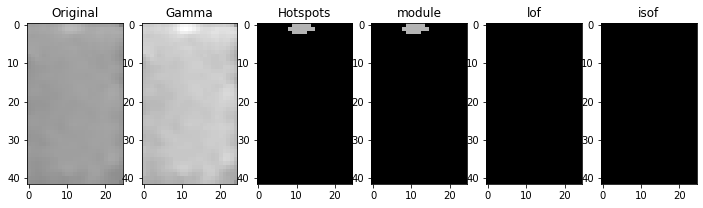

[-1.02752913 -1.16245189 -0.97585368 -2.93207387 -0.96506575 -1.57203499
 -0.97075614 -0.98716422]
[-1.82418808]
[-0.46772573 -0.47238255 -0.46696784 -0.66843959 -0.43874162 -0.55118674
 -0.43463987 -0.43873128]
[-0.68967523]
0.0 0
2250.jpg Normal
[-0.98813775 -1.03968452 -0.98839839 -0.97193409 -0.99097957 -0.9871492
 -0.99437377 -0.9871492 ]
[-1.80505583]
[-0.47662412 -0.51522875 -0.44703468 -0.44230034 -0.45770302 -0.45547974
 -0.4714232  -0.45547974]
[-0.68202233]
0.0 0
2536.jpg Normal
[-1.05628365 -1.01645553 -0.98149249 -1.05792472 -1.06768957 -0.9627109
 -1.05988099 -1.0279157 ]
[-1.87825281]
[-0.460123   -0.4376483  -0.45188778 -0.45670067 -0.47130584 -0.44086839
 -0.47573451 -0.48831694]
[-0.71130113]
0.0 0
4147.jpg Normal
[-1.11762131 -1.00325135 -0.99857931 -0.99493203 -2.55187409 -1.00187059
 -0.99493203 -1.01344183]
[-1.80144609]
[-0.46498747 -0.43375661 -0.43149241 -0.43634689 -0.67645986 -0.44698359
 -0.43634689 -0.46634085]
[-0.68057844]
0.0 0
3628.jpg Normal
[-1.014278

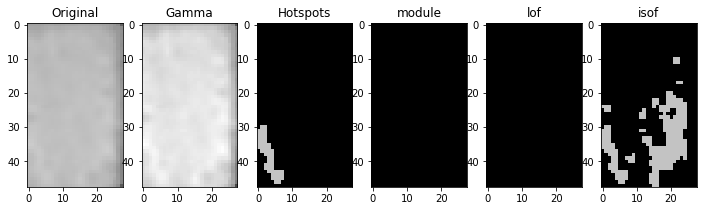

[-1.10963095 -1.04838014 -1.21415411 -1.00332417 -1.07647325 -1.07647325
 -1.03729634 -0.98109242]
[-1.80505583]
[-0.50126642 -0.47841366 -0.52006489 -0.46256593 -0.47869392 -0.47869392
 -0.46536812 -0.47080599]
[-0.68202233]
0.0 0
3166.jpg Normal
[-1.01759268 -0.99057716 -1.0045418  -1.12099199 -1.03994515 -0.98442375
 -0.96363866 -0.96444728]
[-1.84052542]
[-0.44139181 -0.44374243 -0.44748785 -0.44590334 -0.44095836 -0.43241507
 -0.43912133 -0.40941569]
[-0.69621017]
0.0 0
4609.jpg Normal
[-1.23872581 -0.99954421 -1.07854324 -1.11168189 -1.3469869  -0.97788503
 -1.05284417 -1.23872581]
[-1.88896714]
[-0.53144963 -0.45573772 -0.49224678 -0.50265519 -0.58413507 -0.42828229
 -0.48749273 -0.53144963]
[-0.71558686]
0.0 0
2278.jpg Normal
[-1.0730318  -1.11962515 -0.96068129 -1.0673505  -1.16613789 -1.03422805
 -1.10347523 -1.10347523]
[-1.87825281]
[-0.45379851 -0.45545383 -0.4651994  -0.48658915 -0.48651375 -0.47256814
 -0.48261401 -0.48261401]
[-0.71130113]
0.0 0
4796.jpg Normal
[-1.1467

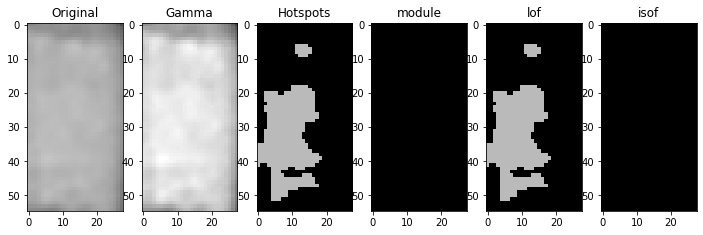

[-1.23257337 -1.12752538 -1.00025528 -1.19089544 -1.01902937 -1.28586645
 -1.09639274 -1.471709  ]
[-1.86224249]
[-0.50408625 -0.49166731 -0.43882379 -0.50593326 -0.46700485 -0.53070507
 -0.49614717 -0.62886268]
[-0.704897]
0.0 0
4755.jpg Normal
[-0.96363866 -1.01222447 -1.0045418  -0.98470617 -0.97544039 -0.96444728
 -1.07183753 -1.03950655]
[-1.84052542]
[-0.43912133 -0.43084245 -0.44748785 -0.46487084 -0.42557581 -0.40941569
 -0.43961723 -0.43816493]
[-0.69621017]
0.5 3.414213538169861 0.5390120920947209 1.0
3.5 14.242640614509583 0.2168187701579564 0.9590394312815931
12.5 15.071067690849304 0.6915631377813788 0.9881796345491949
1.5 5.414213538169861 0.6430287075658971 1.0
0.0 0.0 0 0
0.0 2.0 0.0 1.0
12.5 15.071067690849304 0.6915631377813788 0.9881796345491949
20.0 0
4033.jpg Junction-Box-Error


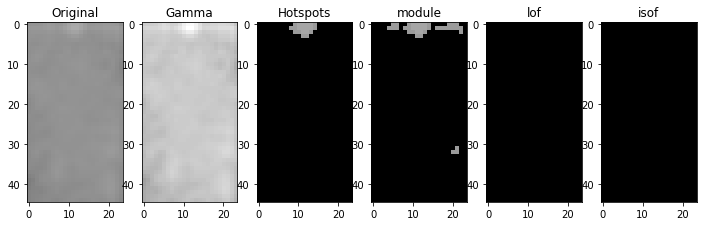

[-1.21641302 -0.98574522 -1.11065904 -1.73727795 -1.31661926 -1.35493388
 -1.07146434 -1.01004827]
[-1.87825281]
[-0.50063821 -0.43274916 -0.48772082 -0.60068105 -0.50396013 -0.50326715
 -0.48092053 -0.42949965]
[-0.71130113]
0.0 0
3984.jpg Normal
[-0.98576074 -1.00827994 -1.02238033 -0.96773925 -0.9812166  -1.00466337
 -0.98576074 -1.00747303]
[-1.81122329]
[-0.45356221 -0.44510602 -0.48119242 -0.44302877 -0.44431588 -0.47032395
 -0.45356221 -0.47459224]
[-0.68448931]
0.0 0
2442.jpg Normal
[-1.00333683 -0.97199473 -0.99724001 -3.10568294 -1.05687944 -1.11196362
 -1.00333683 -0.97749678]
[-1.88896714]
[-0.43198429 -0.42745804 -0.45583006 -0.70610045 -0.47371857 -0.47737705
 -0.43198429 -0.43670249]
[-0.71558686]
0.0 0
3748.jpg Normal
[-0.97193409 -1.00117081 -1.01724404 -0.97193409 -0.98605259 -0.98839839
 -0.98712237 -0.99097957]
[-1.80505583]
[-0.44230034 -0.45936171 -0.47434784 -0.44230034 -0.4490907  -0.44703468
 -0.44979845 -0.45770302]
[-0.68202233]
0.0 0
4027.jpg Normal
[-1.4563

[-1.02946023 -0.99257864 -1.07854324 -0.99954421 -1.02168237 -0.98855
 -1.02168237 -0.98096948]
[-1.88896714]
[-0.4470341  -0.44060083 -0.49224678 -0.45573772 -0.45109714 -0.4354454
 -0.45109714 -0.43894533]
[-0.71558686]
0.0 0
2873.jpg Normal
[-0.97913389 -0.99892332 -0.98763744 -0.98172289 -0.99892332 -1.02238033
 -0.98172289 -1.10852652]
[-1.81122329]
[-0.45786936 -0.46141136 -0.46256228 -0.45785021 -0.46141136 -0.48119242
 -0.45785021 -0.4945026 ]
[-0.68448931]
0.0 0
636.jpg Normal
[-1.00325135 -1.00187059 -0.99493203 -0.99585912 -0.98458346 -1.0024741
 -2.21466935 -1.02898328]
[-1.80144609]
[-0.43375661 -0.44698359 -0.43634689 -0.4479433  -0.43838955 -0.45064647
 -0.63841017 -0.47886452]
[-0.68057844]
0.0 0
805.jpg Normal
[-1.12755081 -0.99107722 -0.99623478 -1.58599991 -1.00231113 -1.01724404
 -0.98109242 -0.99437377]
[-1.80505583]
[-0.50298651 -0.47101539 -0.46670061 -0.59370784 -0.45890586 -0.47434784
 -0.47080599 -0.4714232 ]
[-0.68202233]
0.0 0
45.jpg Normal
[-0.97758577 -1.2

[-1.09353287 -1.46114439 -1.00247181 -1.14674411 -0.98460649 -1.35402763
 -1.00247181 -1.35402763]
[-1.80144609]
[-0.49908258 -0.56271621 -0.45395359 -0.52318435 -0.44050032 -0.53573925
 -0.45395359 -0.53573925]
[-0.68057844]
0.0 0
2118.jpg Normal
[-0.9826145  -0.99623478 -1.47520732 -0.9871492  -1.10933991 -1.10933991
 -1.99797588 -0.97193409]
[-1.80505583]
[-0.44270264 -0.46670061 -0.57388198 -0.45547974 -0.47597171 -0.47597171
 -0.61298691 -0.44230034]
[-0.68202233]
0.0 0
4569.jpg Normal
[-1.03095546 -1.16802771 -0.97309086 -1.47023136 -0.97675203 -1.05235978
 -1.01004827 -1.18817656]
[-1.87825281]
[-0.44842644 -0.47613335 -0.42692229 -0.51864955 -0.44544248 -0.45510835
 -0.42949965 -0.48202026]
[-0.71130113]
0.0 0
3206.jpg Normal
[-0.99045927 -0.95071136 -1.23539602 -0.94664717 -2.30533308 -1.00871209
 -0.97654187 -0.95092829]
[-1.87825281]
[-0.45178183 -0.44275458 -0.5118165  -0.4472996  -0.67177437 -0.45370591
 -0.47809241 -0.42717128]
[-0.71130113]
0.0 0
185.jpg Normal
[-0.99770

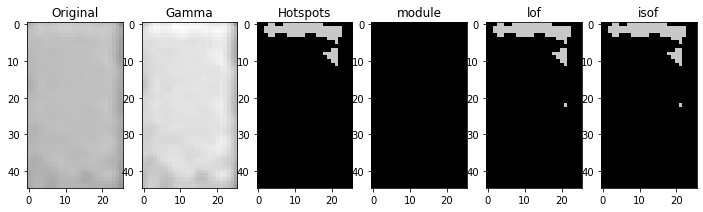

[-1.03557543 -1.08582125 -1.01987468 -1.08582125 -1.15172403 -1.0425727
 -1.03095546 -1.05090953]
[-1.87825281]
[-0.51006262 -0.48773203 -0.48358577 -0.48773203 -0.52939886 -0.47994427
 -0.44842644 -0.46559219]
[-0.71130113]
0.0 0
5111.jpg Normal
[-0.97979287 -1.67673472 -1.06737506 -0.97979287 -1.3824813  -1.06737506
 -1.26896657 -1.72279886]
[-1.87825281]
[-0.44624426 -0.62643719 -0.4562832  -0.44624426 -0.5284351  -0.4562832
 -0.48871585 -0.58790772]
[-0.71130113]
0.0 0
3574.jpg Normal
[-1.03729634 -1.05346926 -0.99836085 -1.02114604 -1.26193715 -0.98712237
 -1.04110887 -1.03107907]
[-1.80505583]
[-0.46536812 -0.48320439 -0.46641    -0.49773275 -0.51545615 -0.44979845
 -0.47787469 -0.44720102]
[-0.68202233]
0.0 0
5105.jpg Normal
[-1.0003516  -1.03391151 -0.98228722 -1.15280351 -0.9809571  -0.95981796
 -0.98147566 -1.33183139]
[-1.84052542]
[-0.44662161 -0.47055108 -0.45317102 -0.4786423  -0.43692709 -0.44789982
 -0.43830409 -0.52758901]
[-0.69621017]
0.0 0
1363.jpg Normal
[-1.096088

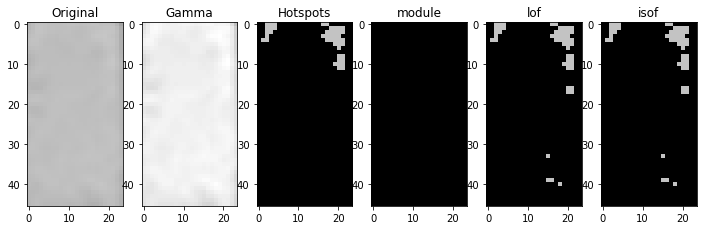

[-1.05541306 -1.0595855  -1.07259373 -0.9901455  -1.0595855  -1.07321331
 -1.05541306 -1.02486078]
[-1.87825281]
[-0.47644385 -0.44283048 -0.46935355 -0.43112254 -0.44283048 -0.44938078
 -0.47644385 -0.46796275]
[-0.71130113]
0.0 0
4555.jpg Normal
[-1.03701026 -0.98439919 -1.05030808 -1.03508047 -1.0317239  -1.04952695
 -1.08035787 -1.03912007]
[-1.62631593]
[-0.45741136 -0.40459449 -0.47697039 -0.46137793 -0.45374615 -0.47107721
 -0.50124531 -0.42883915]
[-0.61052637]
0.0 0
4233.jpg Normal
[-1.06167682 -0.97056239 -0.99585912 -0.9919385  -1.2609664  -1.00259905
 -1.00526519 -1.0307163 ]
[-1.80144609]
[-0.48197908 -0.43305291 -0.4479433  -0.4316208  -0.54342369 -0.44426471
 -0.46682636 -0.46726219]
[-0.68057844]
0.0 0
2642.jpg Normal
[-0.98716422 -1.52901305 -0.97392496 -1.21893408 -1.04619385 -4.43056627
 -0.99461395 -0.96506575]
[-1.82418808]
[-0.43873128 -0.55069155 -0.45255659 -0.48726617 -0.47422473 -0.76651698
 -0.42603057 -0.43874162]
[-0.68967523]
0.0 0
47.jpg Normal
[-1.048109

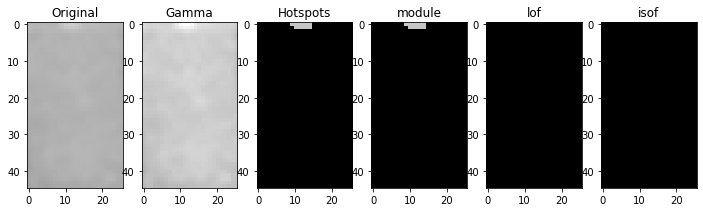

[-1.1546519  -1.00526519 -0.97127344 -1.0307163  -1.20621487 -0.99585912
 -0.98468207 -0.9999106 ]
[-1.80144609]
[-0.48270749 -0.46682636 -0.43604529 -0.46726219 -0.53836918 -0.4479433
 -0.44034198 -0.43320919]
[-0.68057844]
0.0 0
2656.jpg Normal
[-1.1801464  -0.96780336 -1.0425727  -1.23204813 -1.02129622 -1.18817656
 -1.08168394 -1.11596997]
[-1.87825281]
[-0.5419437  -0.41835651 -0.47994427 -0.57113794 -0.48771172 -0.48202026
 -0.46442737 -0.50856148]
[-0.71130113]
0.0 0
2130.jpg Normal
[-0.99236055 -0.99236055 -0.99236055 -0.99186671 -1.01626371 -0.99236055
 -0.99236055 -0.99236055]
[-1.87825281]
[-0.53248468 -0.52552075 -0.51313588 -0.4443809  -0.6527006  -0.54798823
 -0.52862515 -0.52077749]
[-0.71130113]
0.0 0
4541.jpg Normal
[-1.01022547 -1.14133495 -1.04739855 -1.24234678 -1.0303489  -1.17985425
 -1.46373773 -0.98147566]
[-1.84052542]
[-0.46113206 -0.48700224 -0.47285683 -0.50230166 -0.47593555 -0.48900319
 -0.556654   -0.43830409]
[-0.69621017]
0.0 0
1.jpg Normal
[-1.03095546

[-1.64450106 -1.46616101 -1.64450106 -1.54961501 -1.54961501 -1.33199916
 -1.05173958 -1.74624635]
[-1.62631593]
[-0.57795367 -0.5786866  -0.57795367 -0.57246796 -0.57246796 -0.5365094
 -0.47696503 -0.6414939 ]
[-0.61052637]
4.0 10.828427076339722 0.4286858050439314 1.0
632.5 217.58073377609253 0.16789181333004902 0.5878289986411152
0.0 0
3986.jpg Normal
[-0.99650103 -0.99166401 -0.9957003  -1.02128796 -0.98994994 -0.99650103
 -0.99650103 -1.01925048]
[-1.84052542]
[-0.47211551 -0.49202835 -0.47197651 -0.44639991 -0.50445438 -0.47211551
 -0.47211551 -0.47389429]
[-0.69621017]
0.0 0
4031.jpg Normal
[-1.02987063 -1.06666325 -0.98712237 -1.08869393 -1.05346926 -1.03729634
 -1.05346926 -1.01632105]
[-1.80505583]
[-0.46626821 -0.49118556 -0.44979845 -0.51045577 -0.48320439 -0.46536812
 -0.48320439 -0.47306602]
[-0.68202233]
0.0 0
3038.jpg Normal
[-0.96649518 -1.50277074 -1.02502934 -0.99731837 -0.97357628 -0.98127915
 -1.12170309 -1.02678742]
[-1.84052542]
[-0.43316769 -0.57185909 -0.452353

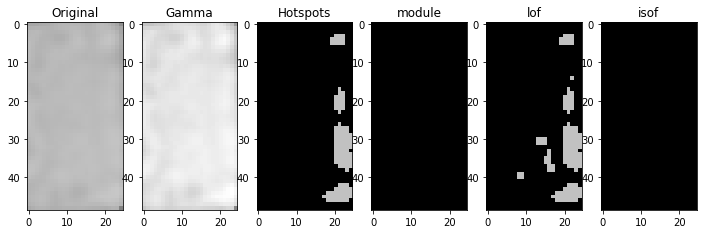

[-1.05435221 -1.39003233 -0.97207946 -1.17017287 -1.05435221 -1.05435221
 -0.96844457 -1.17017287]
[-1.62631593]
[-0.42650205 -0.52438681 -0.45919902 -0.48720475 -0.42650205 -0.42650205
 -0.42882109 -0.48720475]
[-0.61052637]
0.0 0
4743.jpg Normal
[-1.09557566 -1.26146439 -1.64450106 -1.39356746 -1.0656873  -1.31235145
 -1.14526922 -1.21468423]
[-1.62631593]
[-0.48555863 -0.50687325 -0.57795367 -0.55996639 -0.49788543 -0.54296288
 -0.48416699 -0.50888372]
[-0.61052637]
2.0 6.828427076339722 0.5390120920947209 1.0
49.0 53.31370830535889 0.21663476933158732 0.9297400720617099
0.0 0
2332.jpg Normal
[-0.97309086 -1.02486078 -0.98574522 -1.08278462 -1.02486078 -1.4316072
 -1.0548212  -1.05792472]
[-1.87825281]
[-0.42692229 -0.46796275 -0.43274916 -0.46215185 -0.46796275 -0.51660827
 -0.48598386 -0.45670067]
[-0.71130113]
0.0 0
2454.jpg Normal
[-1.0667033  -1.00020465 -0.95718058 -1.01018224 -0.99100846 -0.98382567
 -1.34084355 -0.97418648]
[-1.62631593]
[-0.45736259 -0.44368001 -0.4327473  

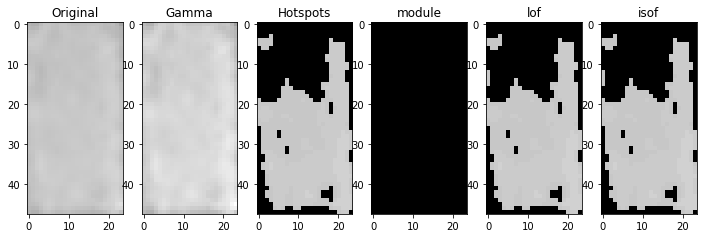

[-1.03310364 -1.31954101 -1.03448077 -1.04767253 -1.03193526 -1.05305236
 -1.04767253 -0.97229843]
[-1.62631593]
[-0.45092418 -0.50026123 -0.43376034 -0.49257365 -0.43976808 -0.44604962
 -0.49257365 -0.40219391]
[-0.61052637]
0.0 0
378.jpg Normal
[-0.99216467 -0.96649518 -1.01995541 -1.01757728 -1.00198802 -0.9921188
 -1.04739855 -0.99175022]
[-1.84052542]
[-0.49735488 -0.43316769 -0.47454048 -0.45451863 -0.48628968 -0.45012836
 -0.47285683 -0.47704238]
[-0.69621017]
0.0 0
4794.jpg Normal
[-0.99236055 -0.99236055 -0.99236055 -0.99236055 -0.99236055 -0.99236055
 -0.99236055 -0.99457003]
[-1.87825281]
[-0.55838406 -0.56899558 -0.54852459 -0.58154879 -0.53248468 -0.52077749
 -0.51313588 -0.43725068]
[-0.71130113]
3.5 7.414213538169861 0.8001063703614795 1.0
9.5 28.242640614509583 0.14966590286237125 0.9776795650918967
0.0 0
4958.jpg Normal
[-0.99303713 -0.96164591 -1.00996041 -0.95718058 -1.11522566 -0.96518809
 -0.95718058 -0.9964587 ]
[-1.62631593]
[-0.44493817 -0.41968687 -0.42399146 -

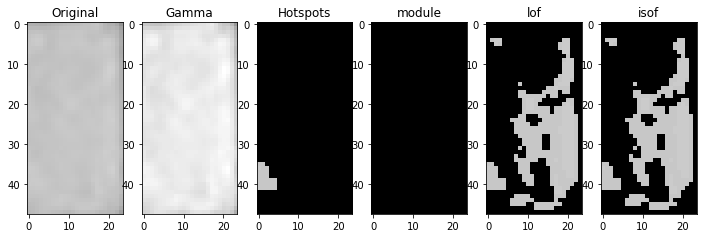

[-0.99092753 -1.16431585 -1.02212398 -0.98204527 -1.03867699 -4.26875791
 -1.0208643  -0.99033449]
[-1.84052542]
[-0.48755595 -0.47186998 -0.45992897 -0.43500057 -0.48906802 -0.769635
 -0.48668395 -0.4938322 ]
[-0.69621017]
0.0 0
3789.jpg Normal
[-0.97850614 -1.04029142 -1.70001978 -0.97418648 -0.9964587  -1.24788538
 -0.97034509 -0.95813392]
[-1.62631593]
[-0.45498792 -0.45935564 -0.52833676 -0.40552252 -0.42391736 -0.48507016
 -0.42227496 -0.43725327]
[-0.61052637]
0.0 0
2497.jpg Normal
[-1.02884421 -0.98779118 -1.10528861 -0.96903272 -1.45169793 -1.02638842
 -0.97415362 -1.05435221]
[-1.62631593]
[-0.42535625 -0.44803194 -0.45045183 -0.44014303 -0.56461459 -0.47250638
 -0.47520357 -0.42650205]
[-0.61052637]
0.0 0
3951.jpg Normal
[-1.07321331 -0.9901455  -1.09660949 -1.51307133 -1.00411783 -1.09660949
 -1.05553915 -1.01004827]
[-1.87825281]
[-0.44938078 -0.43112254 -0.44881463 -0.52581993 -0.42630889 -0.44881463
 -0.4453231  -0.42949965]
[-0.71130113]
0.0 0
3616.jpg Normal
[-0.980085

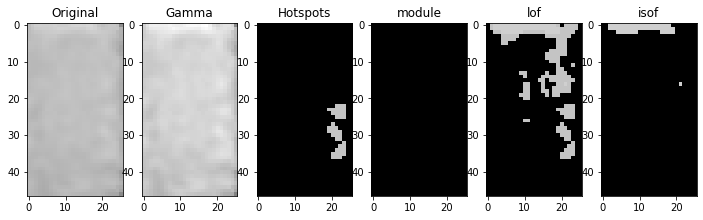

[-0.96844457 -0.96379106 -1.16352455 -0.97924242 -0.96431706 -0.95417387
 -1.62958585 -0.98045379]
[-1.62631593]
[-0.42882109 -0.41720409 -0.48387273 -0.44093035 -0.41868828 -0.44341673
 -0.55019303 -0.45014007]
[-0.61052637]
0.0 0
3170.jpg Normal
[-0.98112925 -1.02379312 -1.15280351 -1.00162312 -1.0003516  -0.97357628
 -0.9809571  -0.99731837]
[-1.84052542]
[-0.4305611  -0.4752527  -0.4786423  -0.45186585 -0.44662161 -0.42466227
 -0.43692709 -0.43262206]
[-0.69621017]
0.0 0
3164.jpg Normal
[-1.00369534 -0.9831519  -1.06379873 -0.95891542 -0.9831519  -1.75217623
 -0.98874735 -1.02051183]
[-1.79976106]
[-0.46153208 -0.44213158 -0.49776702 -0.45349404 -0.44213158 -0.68718881
 -0.44362016 -0.46178713]
[-0.67990442]
0.0 0
1773.jpg Normal
[-1.41803961 -2.10537904 -1.19149655 -1.34845945 -1.48917945 -1.2485904
 -1.66536238 -1.31025607]
[-1.62631593]
[-0.56046968 -0.60582359 -0.47302193 -0.53915648 -0.54602002 -0.47161374
 -0.57039834 -0.47845292]
[-0.61052637]
0.0 0
581.jpg Normal
[-0.978963

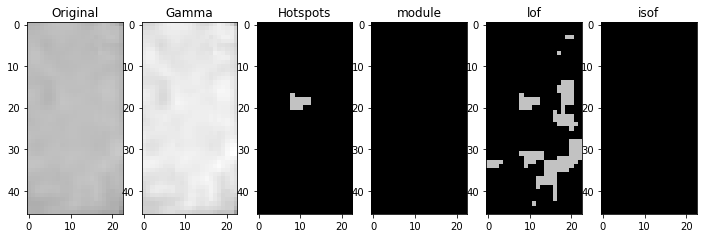

[-1.01018224 -0.98382567 -1.01725493 -1.00197033 -0.96518809 -1.00020465
 -1.00020465 -1.01692456]
[-1.62631593]
[-0.46063359 -0.46511707 -0.45799597 -0.44518229 -0.42826701 -0.44368001
 -0.44368001 -0.43791346]
[-0.61052637]
0.0 0
4838.jpg Normal
[-1.05305236 -1.97547984 -1.47073306 -0.98468495 -2.80652131 -1.20940243
 -1.04372768 -1.18265316]
[-1.62631593]
[-0.44604962 -0.59471698 -0.47947483 -0.41832475 -0.65376838 -0.45772836
 -0.45252794 -0.46781653]
[-0.61052637]
8.5 11.071067690849304 0.8714646546573355 1.0
8.5 11.071067690849304 0.8714646546573355 1.0
14.0 0
2285.jpg Junction-Box-Error


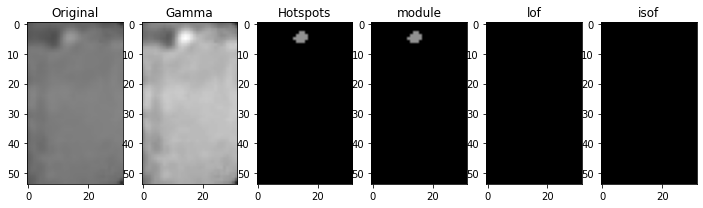

[-0.98213988 -0.97064733 -0.95702597 -0.99199064 -0.97404449 -0.99840076
 -0.97404449 -0.96243892]
[-1.79976106]
[-0.44749382 -0.44701278 -0.41017492 -0.44196035 -0.44444915 -0.44722541
 -0.44444915 -0.436649  ]
[-0.67990442]
0.0 0
218.jpg Normal
[-1.61698593 -1.32596554 -1.41926507 -1.08582125 -1.49464615 -1.25243809
 -1.57497025 -1.38404604]
[-1.87825281]
[-0.69230719 -0.61231093 -0.61401563 -0.48773203 -0.64033645 -0.5746632
 -0.66067723 -0.60157876]
[-0.71130113]
0.0 0
1954.jpg Normal
[-1.96459492 -1.01498432 -1.29482285 -1.75624903 -1.74061311 -2.34322351
 -1.00491053 -2.05274126]
[-1.62631593]
[-0.58492512 -0.45200033 -0.50855756 -0.60745078 -0.56307371 -0.60882852
 -0.4856637  -0.60486613]
[-0.61052637]
748.5 152.66904664039612 0.40355216492906293 0.8175257296317398
748.5 152.66904664039612 0.40355216492906293 0.8175257296317398
149.0 670
3825.jpg Module-Anomaly


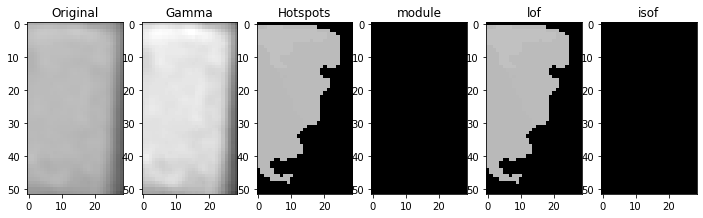

[-1.02502934 -1.02678742 -0.98112925 -2.19645273 -1.02469057 -0.98127915
 -1.01995541 -1.03330017]
[-1.84052542]
[-0.4523538  -0.45265766 -0.4305611  -0.63476884 -0.44019238 -0.43912784
 -0.47454048 -0.49300949]
[-0.69621017]
0.0 0
4192.jpg Normal
[-0.99895027 -0.99745856 -1.03450363 -0.99893212 -0.99504241 -0.99895027
 -0.98468207 -0.98460649]
[-1.80144609]
[-0.43218299 -0.45146826 -0.4577239  -0.43751253 -0.45064914 -0.43218299
 -0.44034198 -0.44050032]
[-0.68057844]
0.0 0
3372.jpg Normal
[-0.97229843 -2.87491127 -0.96330707 -5.11389702 -1.51306402 -1.60016017
 -0.97534715 -1.20940243]
[-1.62631593]
[-0.40219391 -0.65607583 -0.41196494 -0.78754484 -0.49821689 -0.51193557
 -0.41372177 -0.45772836]
[-0.61052637]
0.0 0
1565.jpg Normal
[-0.97418648 -1.43971518 -1.04029142 -1.14223172 -1.31094738 -1.73844894
 -1.04798995 -5.2401186 ]
[-1.62631593]
[-0.40552252 -0.51193077 -0.45935564 -0.47635309 -0.50275348 -0.53358635
 -0.44611256 -0.80587145]
[-0.61052637]
0.0 0
797.jpg Normal
[-0.99014

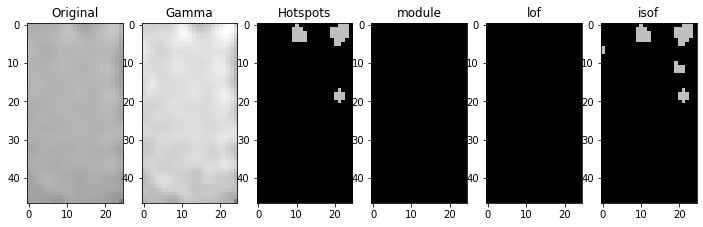

[-1.41757478 -1.10399867 -1.24503708 -1.33199916 -1.05030808 -1.44158209
 -1.61249131 -2.42628349]
[-1.62631593]
[-0.56244589 -0.50250191 -0.51014773 -0.5365094  -0.47697039 -0.57675589
 -0.58064304 -0.64867144]
[-0.61052637]
0.0 0
3366.jpg Normal
[-0.99199064 -0.95280139 -0.97404449 -0.96690239 -1.07273788 -0.95702597
 -1.45708534 -0.95484231]
[-1.79976106]
[-0.48614685 -0.47091932 -0.44444915 -0.44653078 -0.49108973 -0.41017492
 -0.63201525 -0.45675767]
[-0.67990442]
0.0 0
4409.jpg Normal
[-0.98008536 -0.97357628 -1.03391151 -0.98147566 -0.98204527 -0.99731837
 -0.96649518 -1.08144631]
[-1.84052542]
[-0.42547716 -0.42466227 -0.47055108 -0.43830409 -0.43500057 -0.43262206
 -0.43316769 -0.45844156]
[-0.69621017]
0.0 0
2078.jpg Normal
[-1.04449653 -1.00259905 -1.17805377 -1.00526519 -1.11762131 -0.98891513
 -1.35402763 -1.08649472]
[-1.80144609]
[-0.48495418 -0.44426471 -0.5227036  -0.46682636 -0.46498747 -0.46306827
 -0.53573925 -0.50446849]
[-0.68057844]
3.0 7.656854152679443 0.643028

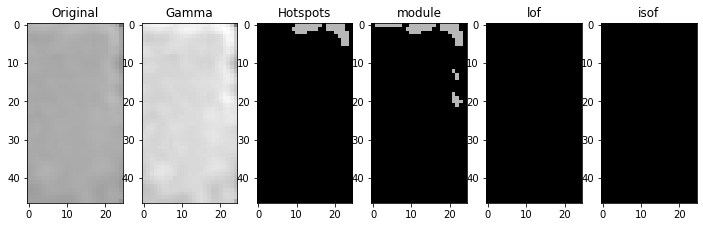

[-1.07355922 -1.00411783 -1.09491596 -1.02161905 -0.98083943 -1.08168394
 -1.04132389 -1.02161905]
[-1.87825281]
[-0.46648285 -0.42630889 -0.47861927 -0.48429163 -0.4209062  -0.46442737
 -0.49351176 -0.48429163]
[-0.71130113]
0.0 0
4421.jpg Normal
[-1.87978746 -2.5488983  -2.1001533  -2.24372499 -1.4910289  -1.87978746
 -0.97220675 -2.24372499]
[-1.62631593]
[-0.58300724 -0.63176092 -0.61069847 -0.58414457 -0.55202437 -0.58300724
 -0.43174045 -0.58414457]
[-0.61052637]
8.0 18.485281229019165 0.29420342659965626 0.9394364048526554
12.0 13.656854152679443 0.8085181381420814 0.9869555956409838
452.5 145.154327750206 0.2698786133226766 0.6586546076069741
4.5 8.242640614509583 0.8323186927986581 1.0
0.0 0.0 0 0
0.0 0.0 0 0
5.0 19.656854152679443 0.1626117178010123 0.9308878030495826
8.0 18.485281229019165 0.29420342659965626 0.9394364048526554
12.0 13.656854152679443 0.8085181381420814 0.9869555956409838
2.5 7.414213538169861 0.5715045502581996 1.0
0.0 0.0 0 0
0.0 4.0 0.0 1.0
32.0 4
2050.jp

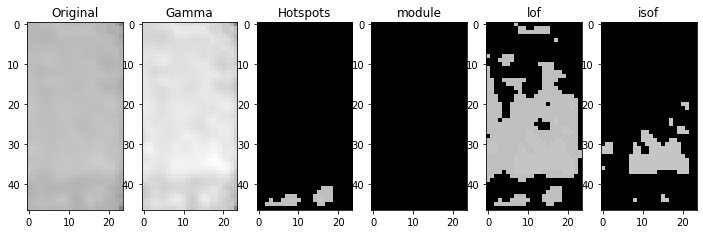

[-1.17068201 -0.97034509 -1.38923465 -1.0508378  -1.2295962  -1.00020465
 -1.12494803 -1.25303518]
[-1.62631593]
[-0.4801498  -0.42227496 -0.53746546 -0.47034024 -0.51534284 -0.44368001
 -0.47857781 -0.55257226]
[-0.61052637]
0.0 0
2736.jpg Normal
[-1.21468423 -1.09557566 -1.24503708 -1.16187275 -1.0656873  -1.1807284
 -1.12147211 -1.14526922]
[-1.62631593]
[-0.50888372 -0.48555863 -0.51014773 -0.48276975 -0.49788543 -0.49844666
 -0.49051222 -0.48416699]
[-0.61052637]
0.0 0
5059.jpg Normal
[-0.95596698 -0.95702597 -0.97009102 -0.97835897 -0.98213988 -0.98874735
 -0.95459661 -0.96144708]
[-1.79976106]
[-0.47068664 -0.41017492 -0.45728692 -0.46682929 -0.46828793 -0.44362016
 -0.43683128 -0.43414476]
[-0.67990442]
0.0 0
4347.jpg Normal
[-1.17985425 -1.54180374 -1.08144631 -1.2674278  -1.39799355 -1.08144631
 -3.58224925 -1.16431585]
[-1.84052542]
[-0.48900319 -0.56063561 -0.45844156 -0.49987887 -0.54945909 -0.45844156
 -0.7324428  -0.47186998]
[-0.69621017]
0.0 0
3428.jpg Normal
[-1.01566

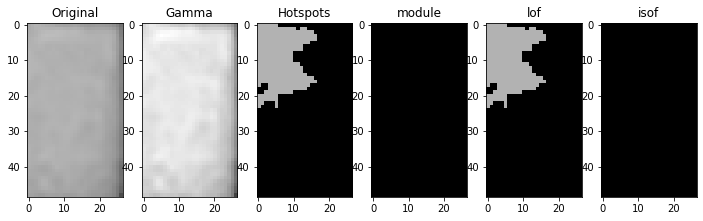

[-1.04667602 -1.00187059 -0.9993772  -1.02898328 -0.99504241 -1.00245907
 -1.1773375  -1.01344183]
[-1.80144609]
[-0.49409201 -0.44698359 -0.43610363 -0.47886452 -0.45064914 -0.4406846
 -0.49189519 -0.46634085]
[-0.68057844]
0.0 0
754.jpg Normal
[-0.97418648 -1.40628413 -0.97850614 -1.08887265 -0.95813392 -1.00996041
 -3.64382083 -0.96164591]
[-1.62631593]
[-0.40552252 -0.48955421 -0.45498792 -0.47556258 -0.43725327 -0.42399146
 -0.70226864 -0.41968687]
[-0.61052637]
0.0 0
740.jpg Normal
[-1.8806224  -0.97229843 -0.98439919 -1.25671741 -1.04376852 -1.07330446
 -1.01539144 -1.0437099 ]
[-1.62631593]
[-0.5741182  -0.40219391 -0.40459449 -0.47753964 -0.47429577 -0.43411123
 -0.41258753 -0.45363296]
[-0.61052637]
0.0 0
998.jpg Normal
[-1.00091776 -0.95981796 -0.9957003  -1.02284627 -0.99650103 -1.0592092
 -1.16508499 -1.12170309]
[-1.84052542]
[-0.47130143 -0.44789982 -0.47197651 -0.47019208 -0.47211551 -0.5195159
 -0.52526787 -0.47149625]
[-0.69621017]
0.0 0
2905.jpg Normal
[-1.10267782 -

[-0.44643732 -0.45064914 -0.447796   -0.43149241 -0.44643732 -0.45395359
 -0.43149241 -0.45064647]
[-0.68057844]
0.0 0
5058.jpg Normal
[-0.99175022 -0.98127915 -1.01757728 -0.99650103 -1.0307096  -1.15280351
 -1.01904736 -0.99216467]
[-1.84052542]
[-0.47704238 -0.43912784 -0.45451863 -0.47211551 -0.47216707 -0.4786423
 -0.49223588 -0.49735488]
[-0.69621017]
0.0 0
2737.jpg Normal
[-1.11985842 -1.19650385 -1.32909411 -1.18248699 -1.10017515 -1.14252399
 -1.21052072 -1.26450594]
[-1.79976106]
[-0.48653665 -0.52299819 -0.569576   -0.4932935  -0.4656037  -0.49530307
 -0.53333139 -0.54981833]
[-0.67990442]
0.0 0
782.jpg Normal
[-0.96340897 -0.96164591 -0.96340897 -0.95718058 -0.98266308 -0.97850614
 -1.47808066 -0.99303713]
[-1.62631593]
[-0.4329008  -0.41968687 -0.4329008  -0.4327473  -0.4283181  -0.45498792
 -0.51583018 -0.44493817]
[-0.61052637]
0.0 0
1216.jpg Normal
[-0.9901455  -1.07321331 -1.05792472 -1.05628365 -3.56477527 -0.96573842
 -1.00411783 -1.05792472]
[-1.87825281]
[-0.431122

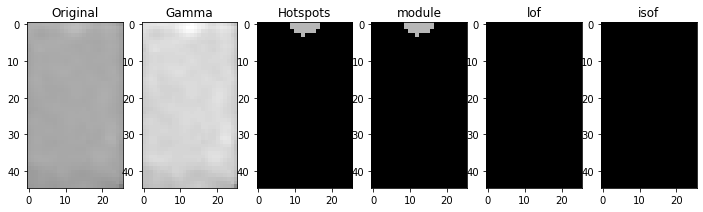

[-0.97418648 -0.97418648 -0.96164591 -0.9964587  -0.95857761 -1.04798995
 -1.16933246 -1.04029142]
[-1.62631593]
[-0.40552252 -0.40552252 -0.41968687 -0.42391736 -0.4407211  -0.44611256
 -0.48088022 -0.45935564]
[-0.61052637]
0.0 0
2079.jpg Normal
[-1.26961971 -1.00491053 -1.39003233 -1.19577534 -1.29482285 -1.09138617
 -1.10528861 -1.56273173]
[-1.62631593]
[-0.49717657 -0.4856637  -0.52438681 -0.5174165  -0.50855756 -0.45419232
 -0.45045183 -0.55301607]
[-0.61052637]
0.0 0
4408.jpg Normal
[-1.2674278  -0.96314029 -1.01941292 -0.98228722 -1.05857865 -0.98147566
 -1.81040938 -0.98204527]
[-1.84052542]
[-0.49987887 -0.44280415 -0.46223624 -0.45317102 -0.46091662 -0.43830409
 -0.61366117 -0.43500057]
[-0.69621017]
0.0 0
3367.jpg Normal
[-0.99745856 -0.99893212 -1.00052202 -0.9993772  -0.98902248 -1.03450363
 -0.97056239 -1.03450363]
[-1.80144609]
[-0.45146826 -0.43751253 -0.46474142 -0.43610363 -0.45234338 -0.4577239
 -0.43305291 -0.4577239 ]
[-0.68057844]
0.0 0
1570.jpg Normal
[-1.03755

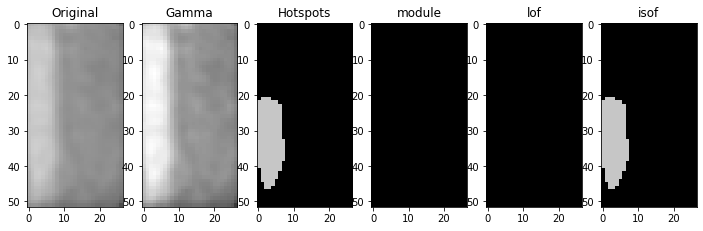

[-0.96770235 -0.99199064 -0.97009102 -0.97404449 -1.01879941 -0.96034609
 -2.47657103 -0.95332389]
[-1.79976106]
[-0.45702714 -0.44196035 -0.45728692 -0.45545232 -0.47918691 -0.4320695
 -0.83217413 -0.46369886]
[-0.67990442]
0.0 0
219.jpg Normal
[-1.00996041 -1.27647416 -1.0508378  -1.40628413 -0.99922932 -1.35819384
 -1.15185346 -1.2295962 ]
[-1.62631593]
[-0.42399146 -0.53313404 -0.47034024 -0.48955421 -0.45195347 -0.52667013
 -0.49967626 -0.51534284]
[-0.61052637]
0.0 0
2284.jpg Normal
[-0.99585912 -0.99493203 -0.9993772  -0.98458346 -1.00226507 -1.0016674
 -1.00104139 -0.97056239]
[-1.80144609]
[-0.4479433  -0.43634689 -0.43610363 -0.43838955 -0.44719765 -0.44643732
 -0.45346022 -0.43305291]
[-0.68057844]
0.0 0
4193.jpg Normal
[-1.07355922 -1.00411783 -1.49464615 -1.0548212  -1.19621122 -1.15172403
 -1.05628365 -1.01987468]
[-1.87825281]
[-0.46648285 -0.42630889 -0.64033645 -0.48598386 -0.56259542 -0.52939886
 -0.460123   -0.48358577]
[-0.71130113]
0.0 0
3824.jpg Normal
[-1.2327477

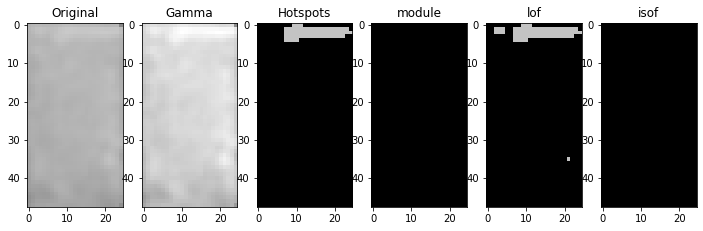

[-1.03701026 -0.98439919 -1.38999221 -1.03310364 -0.98468495 -1.0317239
 -0.97534715 -1.0317239 ]
[-1.62631593]
[-0.45741136 -0.40459449 -0.48880557 -0.45092418 -0.41832475 -0.45374615
 -0.41372177 -0.45374615]
[-0.61052637]
0.0 0
3830.jpg Normal
[-0.96431706 -0.96379106 -1.13519525 -1.02884421 -0.96350001 -0.98779118
 -1.04412786 -0.96350001]
[-1.62631593]
[-0.41868828 -0.41720409 -0.48419307 -0.42535625 -0.44086372 -0.44803194
 -0.46066358 -0.44086372]
[-0.61052637]
0.0 0
4839.jpg Normal
[-0.99731837 -1.24234678 -0.97357628 -0.99731837 -1.17985425 -1.03554818
 -1.10222162 -2.29905549]
[-1.84052542]
[-0.43262206 -0.50230166 -0.42466227 -0.43262206 -0.48900319 -0.46444446
 -0.44727822 -0.64437839]
[-0.69621017]
0.0 0
2290.jpg Normal
[-1.08887265 -4.70930305 -1.40628413 -3.26769277 -1.19554723 -2.19089331
 -1.62475489 -0.99063361]
[-1.62631593]
[-0.47556258 -0.7727657  -0.48955421 -0.66257224 -0.47956597 -0.58342741
 -0.50979727 -0.44038126]
[-0.61052637]
0.0 0
1941.jpg Normal
[-1.35819

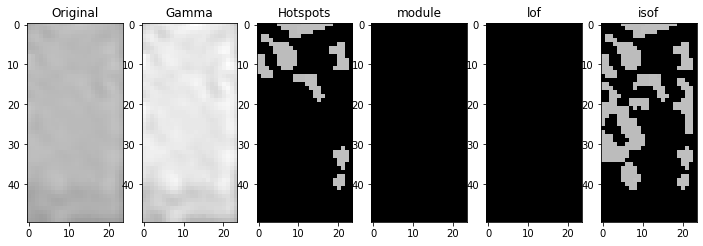

[-0.98973276 -1.11762131 -0.9919385  -1.02898328 -0.99493203 -0.99504241
 -1.00104139 -1.00187059]
[-1.80144609]
[-0.43680046 -0.46498747 -0.4316208  -0.47886452 -0.43634689 -0.45064914
 -0.45346022 -0.44698359]
[-0.68057844]
0.0 0
1028.jpg Normal
[-1.16408158 -1.07321331 -1.0334816  -1.02210337 -1.01645553 -1.07355922
 -1.01987468 -1.07355922]
[-1.87825281]
[-0.52472733 -0.44938078 -0.48720428 -0.4919111  -0.4376483  -0.46648285
 -0.48358577 -0.46648285]
[-0.71130113]
0.0 0
2521.jpg Normal
[-1.35402763 -1.06167682 -1.54399278 -1.32244709 -1.00226507 -1.2609664
 -1.08649472 -1.20621487]
[-1.80144609]
[-0.53573925 -0.48197908 -0.57341305 -0.54358158 -0.44719765 -0.54342369
 -0.50446849 -0.53836918]
[-0.68057844]
0.0 0
4150.jpg Normal
[-0.95454317 -1.31025607 -0.96431706 -2.00413222 -0.96940283 -1.04235092
 -0.95454317 -0.98779118]
[-1.62631593]
[-0.42604983 -0.47845292 -0.41868828 -0.58691996 -0.43896927 -0.44332007
 -0.42604983 -0.44803194]
[-0.61052637]
0.0 0
2535.jpg Normal
[-1.02678

[-0.44639991 -0.47149625 -0.46223624 -0.56063561 -0.46113206 -0.44019238
 -0.44662161 -0.42466227]
[-0.69621017]
0.0 0
3978.jpg Normal
[-0.95869381 -0.96907414 -0.99022234 -1.0593661  -0.96907414 -1.69921195
 -0.99022234 -0.99250133]
[-1.79976106]
[-0.43879952 -0.40694016 -0.4176198  -0.48273862 -0.40694016 -0.75667756
 -0.4176198  -0.42650378]
[-0.67990442]
0.0 0
423.jpg Normal
[-1.0317239  -1.04673103 -0.97896309 -1.03310364 -1.0437099  -1.04272151
 -1.03193526 -0.98468495]
[-1.62631593]
[-0.45374615 -0.4757606  -0.41313307 -0.45092418 -0.45363296 -0.45662581
 -0.43976808 -0.41832475]
[-0.61052637]
0.0 0
345.jpg Normal
[-1.42154244 -1.02682058 -1.17068201 -1.01694633 -1.7205478  -1.20869116
 -1.12494803 -0.95606519]
[-1.62631593]
[-0.58472738 -0.46838002 -0.4801498  -0.46055764 -0.71369491 -0.49791641
 -0.47857781 -0.45024299]
[-0.61052637]
101.0 63.455843448638916 0.31520129683341985 0.9109719192522794
14.0 17.656854152679443 0.5643015462265515 0.973423717725626
101.0 63.45584344863

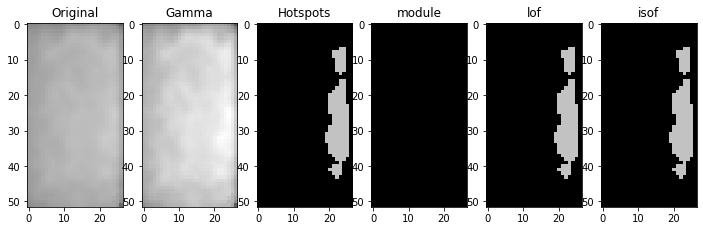

[-1.02212398 -0.98008536 -0.96314029 -1.02322881 -1.24234678 -1.03391151
 -1.0003516  -0.99650103]
[-1.84052542]
[-0.45992897 -0.42547716 -0.44280415 -0.46693858 -0.50230166 -0.47055108
 -0.44662161 -0.47211551]
[-0.69621017]
0.0 0
4971.jpg Normal
[-0.99493203 -0.98460649 -1.00226507 -1.01344183 -0.98458346 -0.9999106
 -0.97127344 -1.55898832]
[-1.80144609]
[-0.43634689 -0.44050032 -0.44719765 -0.46634085 -0.43838955 -0.43320919
 -0.43604529 -0.59338621]
[-0.68057844]
0.0 0
2333.jpg Normal
[-0.99344882 -0.99346469 -0.99346469 -0.99610417 -0.99344882 -0.99346469
 -0.99311431 -0.99346469]
[-1.79976106]
[-0.44409849 -0.41887942 -0.41331301 -0.4954233  -0.47989734 -0.43836855
 -0.4362635  -0.41622472]
[-0.67990442]
0.0 0
4742.jpg Normal
[-1.22055824 -0.98779118 -1.01498432 -1.09138617 -1.39003233 -0.96379106
 -1.1281571  -1.05435221]
[-1.62631593]
[-0.50642134 -0.44803194 -0.45200033 -0.45419232 -0.52438681 -0.41720409
 -0.47638246 -0.42650205]
[-0.61052637]
0.0 0
4024.jpg Normal
[-1.03867

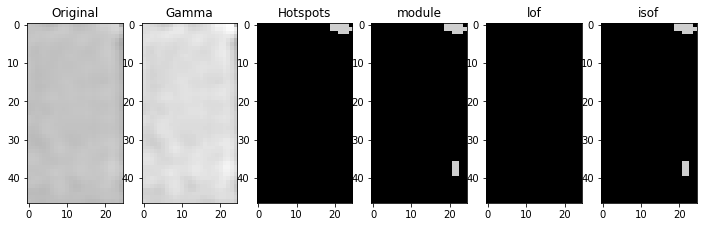

[-1.07400216 -1.00197033 -1.11146343 -1.1890531  -1.02333973 -0.95857761
 -1.06375554 -1.12494803]
[-1.62631593]
[-0.47025001 -0.44518229 -0.49663385 -0.4891949  -0.45366127 -0.4407211
 -0.48010454 -0.47857781]
[-0.61052637]
0.0 0
3987.jpg Normal
[-1.03912007 -0.97229843 -1.03508047 -1.42833682 -0.95725352 -1.00399095
 -0.97896309 -1.03312855]
[-1.62631593]
[-0.42883915 -0.40219391 -0.46137793 -0.4787078  -0.41613701 -0.42603291
 -0.41313307 -0.43120035]
[-0.61052637]
0.0 0
2441.jpg Normal
[-0.99303713 -0.95727956 -0.99063361 -0.96340897 -0.95813392 -0.96518809
 -0.96340897 -1.0667033 ]
[-1.62631593]
[-0.44493817 -0.44095981 -0.44038126 -0.4329008  -0.43725327 -0.42826701
 -0.4329008  -0.45736259]
[-0.61052637]
0.0 0
1148.jpg Normal
[-0.9603414  -1.00051457 -0.96907414 -0.97324594 -1.05605196 -0.95012089
 -0.97324594 -0.99129954]
[-1.79976106]
[-0.47361734 -0.46367762 -0.43964935 -0.4887069  -0.47558308 -0.45469868
 -0.48240729 -0.47651543]
[-0.67990442]
0.0 0
2327.jpg Normal
[-1.01692

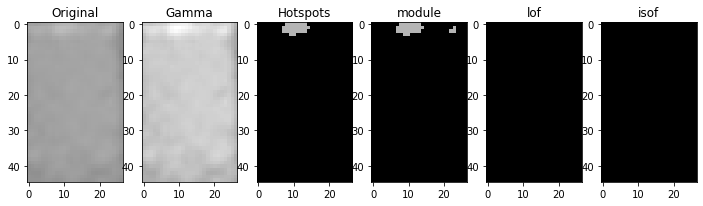

[-0.99471452 -0.99346469 -0.99311431 -0.99610417 -0.99471452 -0.99471452
 -0.99471452 -1.02149626]
[-1.79976106]
[-0.44482892 -0.41622472 -0.44338608 -0.5708359  -0.444909   -0.48017819
 -0.4692818  -0.64308098]
[-0.67990442]
0.0 0
2858.jpg Normal
[-1.02934189 -0.98147566 -1.00198802 -1.04587891 -1.02128796 -0.99092753
 -1.39799355 -1.00091776]
[-1.84052542]
[-0.49859803 -0.43830409 -0.48628968 -0.49360098 -0.44639991 -0.48755595
 -0.54945909 -0.47130143]
[-0.69621017]
0.0 0
2680.jpg Normal
[-1.03448077 -0.95725352 -0.97375706 -1.47073306 -1.03912007 -1.00399095
 -0.97534715 -1.0317239 ]
[-1.62631593]
[-0.43376034 -0.41613701 -0.41560104 -0.47947483 -0.42883915 -0.42603291
 -0.41372177 -0.45374615]
[-0.61052637]
0.0 0
85.jpg Normal
[-0.95808447 -0.96940283 -1.04412786 -1.04235092 -0.95417387 -0.98045379
 -1.22047725 -0.96840407]
[-1.62631593]
[-0.43384433 -0.43896927 -0.46066358 -0.44332007 -0.44341673 -0.45014007
 -0.48580953 -0.4185434 ]
[-0.61052637]
0.0 0
1389.jpg Normal
[-0.994714

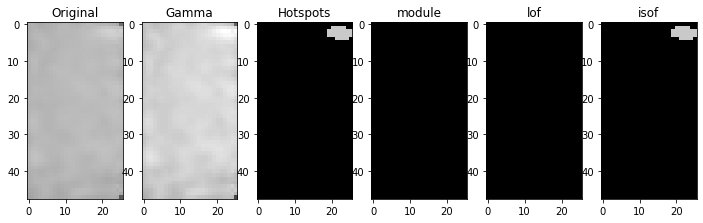

[-0.96937413 -1.00949031 -0.96907414 -0.99129954 -1.00949031 -1.10261361
 -0.95088369 -0.99129954]
[-1.79976106]
[-0.47802593 -0.47261284 -0.43964935 -0.49131801 -0.47261284 -0.49976527
 -0.45280931 -0.47791359]
[-0.67990442]
0.0 0
3213.jpg Normal
[-0.98719631 -0.9827844  -0.99068521 -0.983833   -0.98521796 -1.74267189
 -0.98719631 -0.98292792]
[-1.73581688]
[-0.43412364 -0.431036   -0.49693739 -0.4369923  -0.43260683 -0.79330251
 -0.44042888 -0.43461129]
[-0.65432675]
0.0 0
190.jpg Normal
[-0.99535087 -0.99535087 -0.98906206 -0.99535087 -0.99535087 -0.98411209
 -0.99535087 -1.0144801 ]
[-1.73581688]
[-0.4792638  -0.44566219 -0.42858465 -0.44934081 -0.44934081 -0.43773527
 -0.46936333 -0.53666869]
[-0.65432675]
0.0 0
1404.jpg Normal
[-1.04567376 -0.99022234 -0.99770965 -1.60989838 -0.9504519  -1.12785788
 -0.99770965 -1.15572334]
[-1.79976106]
[-0.48133223 -0.4191654  -0.45907478 -0.72076068 -0.47549248 -0.48953317
 -0.45907478 -0.56681011]
[-0.67990442]
0.0 0
1410.jpg Normal
[-1.01134

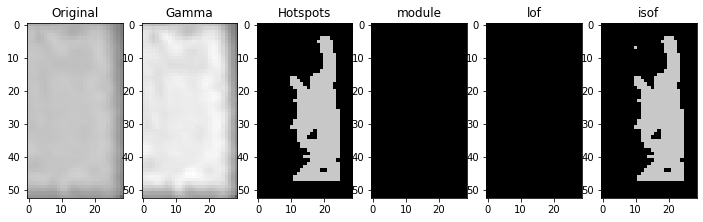

[-0.99535087 -0.99535087 -0.99535087 -0.98411209 -0.99535087 -0.99535087
 -0.99535087 -0.99535087]
[-1.73581688]
[-0.44331608 -0.46429513 -0.44331608 -0.4459277  -0.45295459 -0.46936333
 -0.44566219 -0.48912795]
[-0.65432675]
0.0 0
5110.jpg Normal
[-0.98292792 -0.98411209 -0.98719631 -0.98292792 -0.9827844  -1.00364066
 -0.98906206 -0.9827844 ]
[-1.73581688]
[-0.43461129 -0.46328176 -0.44042888 -0.42253632 -0.431036   -0.48184599
 -0.42858465 -0.44826969]
[-0.65432675]
0.0 0
3561.jpg Normal
[-0.98719631 -0.98906206 -0.9975984  -0.99535087 -0.9827844  -0.99068521
 -0.9827844  -0.99207615]
[-1.73581688]
[-0.44042888 -0.46252544 -0.48534194 -0.44566219 -0.44826969 -0.45402156
 -0.431036   -0.47899273]
[-0.65432675]
0.0 0
1376.jpg Normal


In [45]:
anomaly_modules= {}
os.makedirs(input_dir_path+"/hist/",exist_ok=True)
#for n, k in enumerate(list(thermal_img_files)[:10]):
for n, k in enumerate(list(thermal_img_files)):    
    # -- module label --
    l = module_labels[n]
    if l == -1:
        pass
    else:
        # -- clustering --
        clusters = thermal_data[l].clusters[k]
        # -- gamma correction --
        gamma_temperature_each = utils.gamma_correction(
            thermal_data[l].temperature[k], gamma = 3.0)
        # -- temperature --
        sliced_data = clusters.get_clusters_data(thermal_data[l].temperature[k])    
        clusters_temperature = np.stack([np.uint8(t.mean(axis=0)) for t in sliced_data])
        #print(clusters_temperature)
        # -- scaled temperature --
        sliced_data = clusters.get_clusters_data(
            preprocessing.RobustScaler().fit_transform(gamma_temperature_each)
        )
        scaled_clusters_temperature = np.stack([t.mean(axis=0) for t in sliced_data ])        
        # -- anomaly detection --    
        #hot_pixels_group, _ = anomaly_detection.get_hotspots_by_zscore(
        #    clusters_temperature, thermal_img_files[k], clusters, threshold=3.0, log=False)          
        hot_pixels_module, _ = anomaly_detection.get_hotspots_by_zscore(
            scaled_clusters_temperature, thermal_img_files[k], clusters, threshold=3.0, log=False)   
        hot_pixels_lof, _ = anomaly_detection.get_hotspots_by_models(
            clusters_temperature, scaled_clusters_temperature,
            thermal_img_files[k], clusters, anomodels.lof[l], log=False)        
        hot_pixels_isof, _ = anomaly_detection.get_hotspots_by_models(
            clusters_temperature, scaled_clusters_temperature,
            thermal_img_files[k], clusters, anomodels.isof[l], log=False)  
        hot_pixels = (hot_pixels_module | hot_pixels_lof | hot_pixels_isof)
        hot_pixels = anomaly_detection.remove_useless_clusters(
            anomaly_detection.remove_useless_clusters(hot_pixels))
        module_type = anomaly_detection.detect_module_type(hot_pixels, clusters)
        # -- save anomaly modules --
        if module_type not in anomaly_modules:
            anomaly_modules[module_type] = [k]
        else:
            anomaly_modules[module_type].append(k)        
        # -- display -- 
        img_clustered = clusters_temperature[clusters.labels].reshape(thermal_img_files[k].shape)
        img_hotspots = img_clustered * hot_pixels
        img_hotspots_module = img_clustered * hot_pixels_module
        img_hotspots_lof = img_clustered * hot_pixels_lof
        img_hotspots_isof = img_clustered * hot_pixels_isof
        print(k, module_type)
        if module_type not in ["Normal"]:
            anomaly_detection.show_modules({
                "Original": thermal_img_files[k], 
                "Gamma": utils.gamma_correction(thermal_img_files[k], gamma=anomodels.gamma), 
                "Hotspots": img_hotspots,
                "module": img_hotspots_module,
                "lof": img_hotspots_lof,
                "isof": img_hotspots_isof,
            })

In [46]:
list_anomaly_modules = [
    "172.jpg", 
    "300.jpg",                 
    "717.jpg",         
    "877.jpg",     
    "900.jpg",         
    "1248.jpg",             
    "1397.jpg",                 
    "1531.jpg",         
    "1638.jpg",     
    "1705.jpg",         
    "1955.jpg",     
    "3237.jpg",             
    "4036.jpg",         
    "4517.jpg",             
    "4908.jpg",             
]

[-0.9967983  -1.30111939 -0.98742787 -1.02082224 -1.00088075 -2.08356305
 -0.99511398 -0.97001811]
[-1.73581688]
[-0.44829399 -0.50941875 -0.44288384 -0.46949888 -0.46355419 -0.65486646
 -0.45684867 -0.45019006]
[-0.65432675]
0.0 0
49.jpg Normal


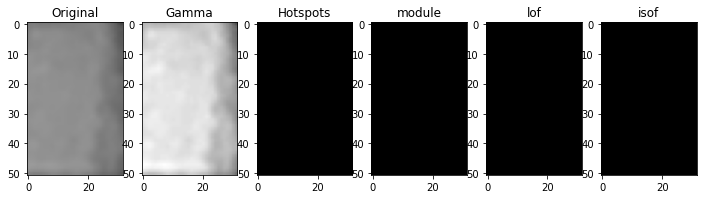

[-1.128066   -0.96279187 -1.01841405 -1.53208782 -0.97163092 -0.97127752
 -0.98583157 -1.2363099 ]
[-1.85143439]
[-0.47601321 -0.42215199 -0.46467878 -0.5476922  -0.43345917 -0.45161151
 -0.44238462 -0.49581538]
[-0.70057376]
0.0 0
64.jpg Normal


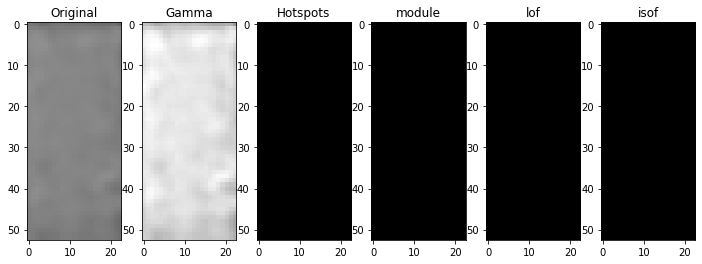

[-0.99831091 -0.97607224 -1.07105897 -0.98137623 -1.00016574 -0.99310611
 -0.97314827 -1.26770061]
[-1.73581688]
[-0.44869726 -0.45235933 -0.48938552 -0.46153829 -0.45824357 -0.44435523
 -0.44446041 -0.51708567]
[-0.65432675]
0.0 0
58.jpg Normal


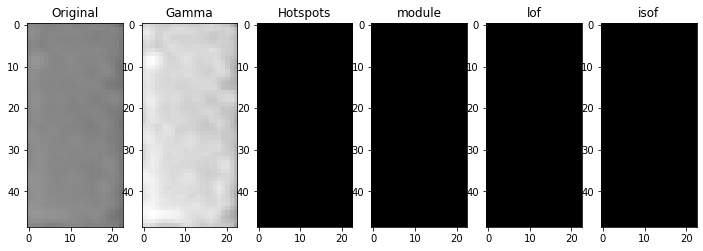

[-0.98917436 -0.98737736 -1.00783842 -0.99963824 -0.99263824 -1.00789082
 -0.98318753 -1.04702428]
[-1.94887669]
[-0.43222934 -0.43463258 -0.43685149 -0.43300462 -0.43006309 -0.44625058
 -0.45872176 -0.4655513 ]
[-0.73955068]
0.0 0
41.jpg Normal


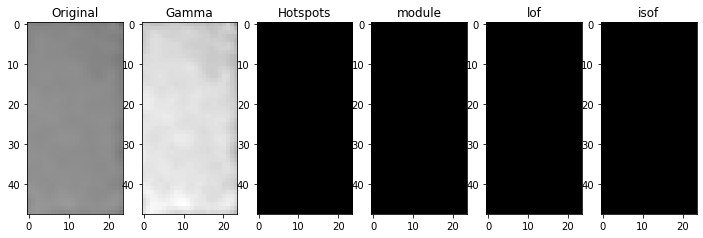

[-0.9812166  -1.05753479 -0.99892332 -1.26153577 -0.98863835 -0.98763744
 -1.52249431 -0.9812166 ]
[-1.81122329]
[-0.44431588 -0.48094678 -0.46141136 -0.51647703 -0.45178165 -0.46256228
 -0.55010576 -0.44431588]
[-0.68448931]
0.0 0
54.jpg Normal


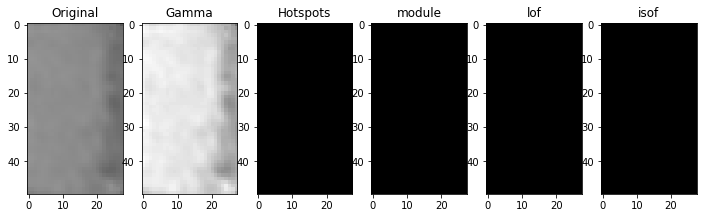

In [47]:
for n, k in enumerate(list(thermal_img_files)):    
    # -- module label --
    l = module_labels[n]
    if l == -1:
        pass
    #elif k in list_anomaly_modules:
    elif k in ["41.jpg", "49.jpg", "54.jpg", "58.jpg", "64.jpg"]:
        # -- clustering --
        clusters = thermal_data[l].clusters[k]
        # -- gamma correction --
        gamma_temperature = utils.gamma_correction(
            thermal_data[l].temperature[k], gamma = 3.0)
        # -- temperature --
        sliced_data = clusters.get_clusters_data(thermal_data[l].temperature[k])    
        clusters_temperature = np.stack([np.uint8(t.mean(axis=0)) for t in sliced_data])
        # -- scaled temperature --
        sliced_data = clusters.get_clusters_data(
            preprocessing.RobustScaler().fit_transform(gamma_temperature)
        )
        scaled_clusters_temperature = np.stack([t.mean(axis=0) for t in sliced_data ])        
        # -- anomaly detection --    
        #hot_pixels_group, _ = anomaly_detection.get_hotspots_by_zscore(
        #    clusters_temperature, thermal_img_files[k], clusters, threshold=3.0, log=False)       
        hot_pixels_module, _ = anomaly_detection.get_hotspots_by_zscore(
            scaled_clusters_temperature, thermal_img_files[k], clusters, threshold=3.0, log=False)
        hot_pixels_lof, _ = anomaly_detection.get_hotspots_by_models(
            clusters_temperature, scaled_clusters_temperature,
            thermal_img_files[k], clusters, anomodels.lof[l], log=False)        
        hot_pixels_isof, _ = anomaly_detection.get_hotspots_by_models(
            clusters_temperature, scaled_clusters_temperature,
            thermal_img_files[k], clusters, anomodels.isof[l], log=False)        
        hot_pixels = (hot_pixels_module | hot_pixels_lof | hot_pixels_isof)
        hot_pixels = anomaly_detection.remove_useless_clusters(
            anomaly_detection.remove_useless_clusters(hot_pixels))
        module_type = anomaly_detection.detect_module_type(hot_pixels, clusters)
        # -- save anomaly modules --
        if module_type not in anomaly_modules:
            anomaly_modules[module_type] = [k]
        else:
            anomaly_modules[module_type].append(k)        
        # -- display -- 
        img_clustered = clusters_temperature[clusters.labels].reshape(thermal_img_files[k].shape)
        img_hotspots = img_clustered * hot_pixels
        img_hotspots_module = img_clustered * hot_pixels_module
        img_hotspots_lof = img_clustered * hot_pixels_lof
        img_hotspots_isof = img_clustered * hot_pixels_isof
        print(k, module_type)
        anomaly_detection.show_modules({
            "Original": thermal_img_files[k], 
            "Gamma": utils.gamma_correction(thermal_img_files[k], gamma=anomodels.gamma), 
            "Hotspots": img_hotspots,
            "module": img_hotspots_module,
            "lof": img_hotspots_lof,
            "isof": img_hotspots_isof,
        })

In [48]:
clusters_temperature = thermal_data[0].clusters_temperature
min_threshold = np.quantile(clusters_temperature,0.2)

In [49]:
clusters_temperature

array([[142, 142, 142],
       [132, 132, 132],
       [139, 139, 139],
       [144, 144, 144],
       [137, 137, 137],
       [147, 147, 147],
       [121, 121, 121],
       [134, 134, 134],
       [164, 164, 164],
       [157, 157, 157],
       [146, 146, 146],
       [161, 161, 161],
       [168, 168, 168],
       [151, 151, 151],
       [159, 159, 159],
       [152, 152, 152],
       [174, 174, 174],
       [144, 144, 144],
       [174, 174, 174],
       [159, 159, 159],
       [184, 184, 184],
       [167, 167, 167],
       [ 98,  98,  98],
       [178, 178, 178],
       [122, 122, 122],
       [106, 106, 106],
       [120, 120, 120],
       [128, 128, 128],
       [117, 117, 117],
       [107, 107, 107],
       [131, 131, 131],
       [139, 139, 139],
       [106, 106, 106],
       [135, 135, 135],
       [137, 137, 137],
       [141, 141, 141],
       [121, 121, 121],
       [ 89,  89,  89],
       [129, 129, 129],
       [144, 144, 144],
       [169, 169, 169],
       [170, 170

In [50]:
(clusters_temperature > min_threshold)[:,0]

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False, False, False,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [51]:
min_threshold

131.0

In [52]:
clusters_temperature[clusters_temperature > min_threshold].reshape(-1,3)

array([[142, 142, 142],
       [132, 132, 132],
       [139, 139, 139],
       [144, 144, 144],
       [137, 137, 137],
       [147, 147, 147],
       [134, 134, 134],
       [164, 164, 164],
       [157, 157, 157],
       [146, 146, 146],
       [161, 161, 161],
       [168, 168, 168],
       [151, 151, 151],
       [159, 159, 159],
       [152, 152, 152],
       [174, 174, 174],
       [144, 144, 144],
       [174, 174, 174],
       [159, 159, 159],
       [184, 184, 184],
       [167, 167, 167],
       [178, 178, 178],
       [139, 139, 139],
       [135, 135, 135],
       [137, 137, 137],
       [141, 141, 141],
       [144, 144, 144],
       [169, 169, 169],
       [170, 170, 170],
       [153, 153, 153],
       [173, 173, 173],
       [160, 160, 160],
       [184, 184, 184],
       [165, 165, 165],
       [168, 168, 168],
       [165, 165, 165],
       [179, 179, 179],
       [151, 151, 151],
       [173, 173, 173],
       [135, 135, 135],
       [172, 172, 172],
       [159, 159

In [53]:
clusters_temperature[clusters_temperature > min_threshold].shape

(582,)

異常モジュール可視化

In [60]:
modules = Modules(module_contours)
anomaly_contours = modules.get_anomaly_contours(anomaly_modules)

In [61]:
if "Module-Anomaly" in anomaly_modules:
    string_anomaly_labels = modules.get_dbscan_labels(anomaly_contours["Module-Anomaly"])
    string_anomaly_modules = np.array(anomaly_modules["Module-Anomaly"])[string_anomaly_labels > 0]
    anomaly_modules["String-Anomaly"] = list(string_anomaly_modules )
    anomaly_contours = modules.get_anomaly_contours(anomaly_modules)

In [74]:
img_con = cv2.drawContours(np.zeros_like(img_org), module_contours, -1, 255, -1)
img_mask = cv2.bitwise_and(img_org, img_con)
img_mask_index = modules.add_index(img_mask)

In [76]:
#plt.imshow(img_mask_index)

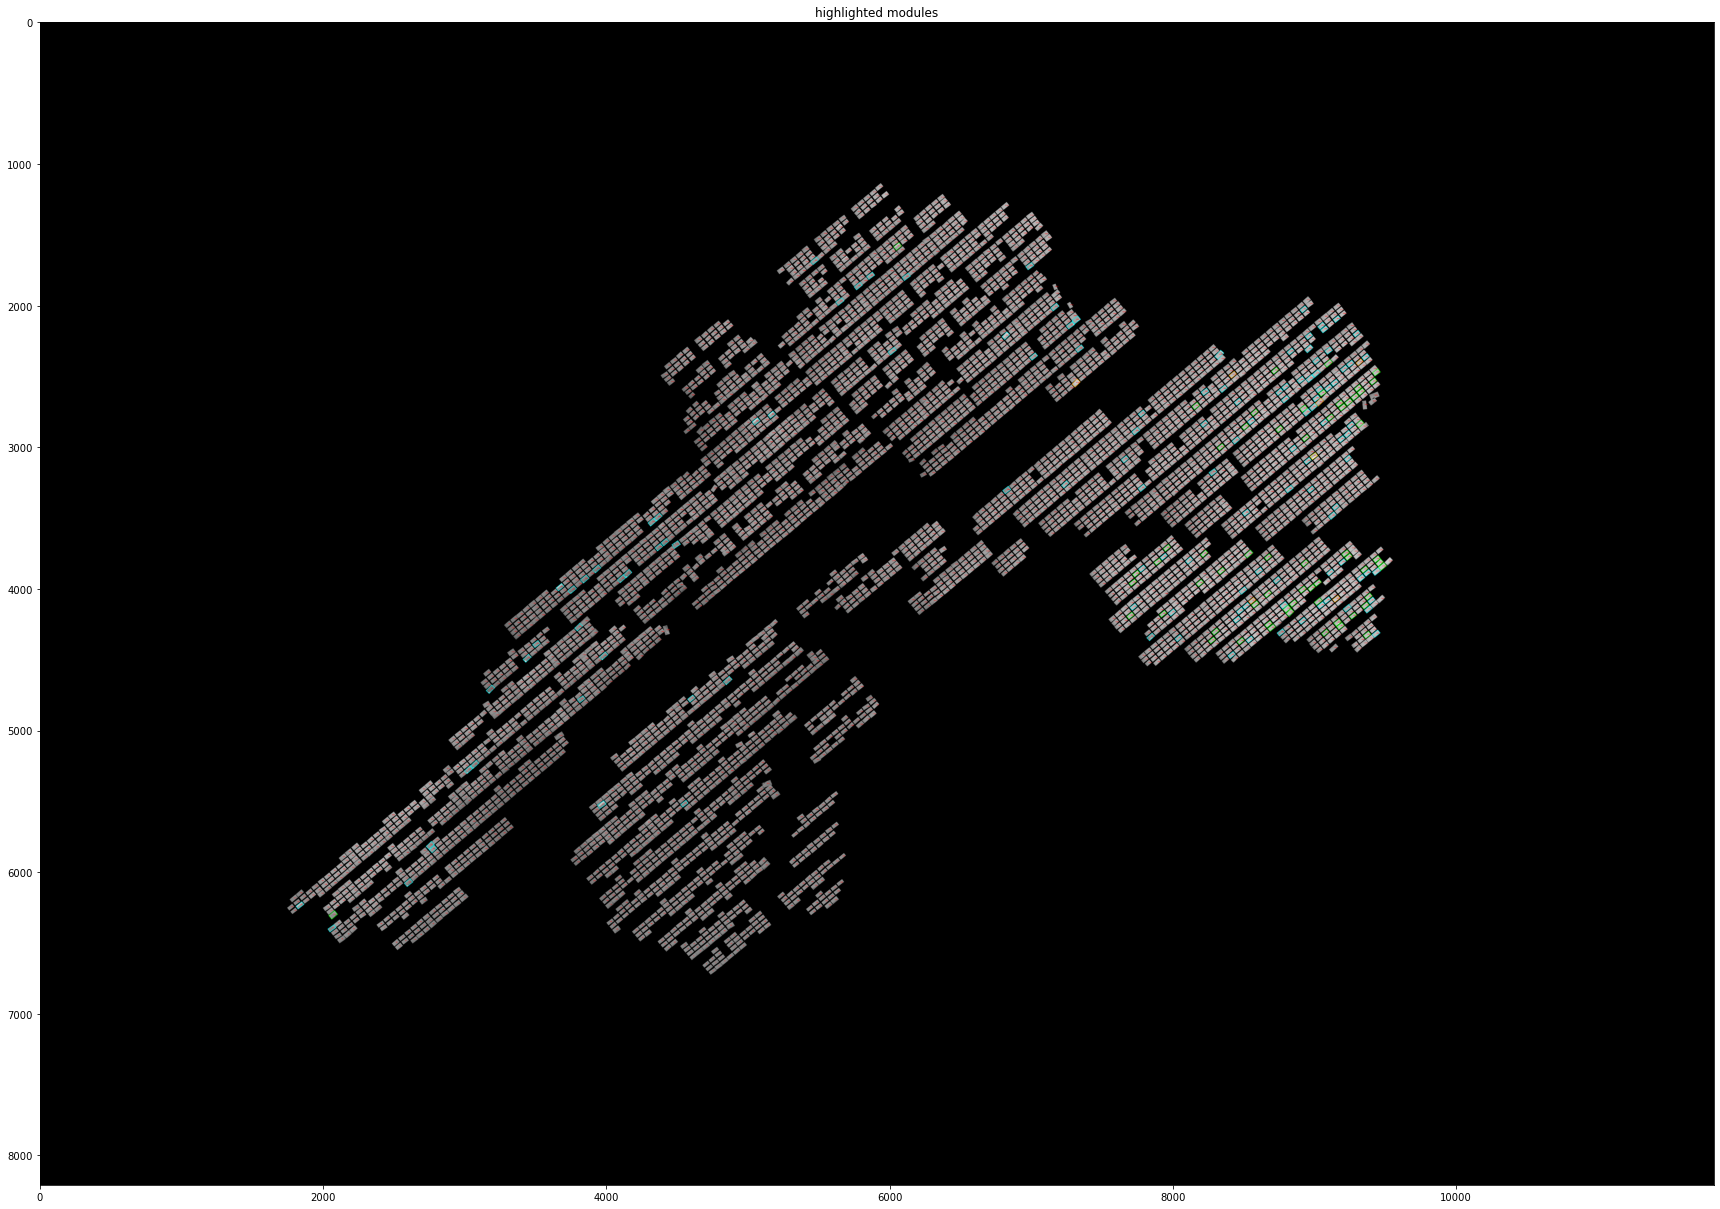

In [77]:
import copy
color_list = {
    "Single-Hotspot": (0,255,255), # aqua
    "Multi-Hotspots": (0,255,0), # green
    "Cluster-Anomaly": (255,255,0), # yellow
    "Module-Anomaly": (255,165,0), # orange
    "String-Anomaly": (238,130,238) # violet
}
img_target_index = copy.deepcopy(img_mask_index)
for k, v in anomaly_contours.items():
    if k in  ["Normal", "Junction-Box-Error"]:
        continue
    else:
        img_target_index = modules.get_img_target_contours(
            img_target_index, v, index=True, color=color_list[k])
module_extraction.show_img(
    {"highlighted modules":img_target_index}, cmap="gray", figsize=(30,30)
)

In [78]:
img_write = cv2.cvtColor(img_target_index, cv2.COLOR_BGR2RGB)
cv2.imwrite(input_dir_path+'/img_target_index.png',img_write)

True

異常モジュールデータの保存

In [79]:
with open(input_dir_path+"/anomaly_modules.json", "w") as f:
    json.dump(anomaly_modules, f, indent=4, sort_keys=True, separators=(',', ': '))

NameError: name 'json' is not defined